In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

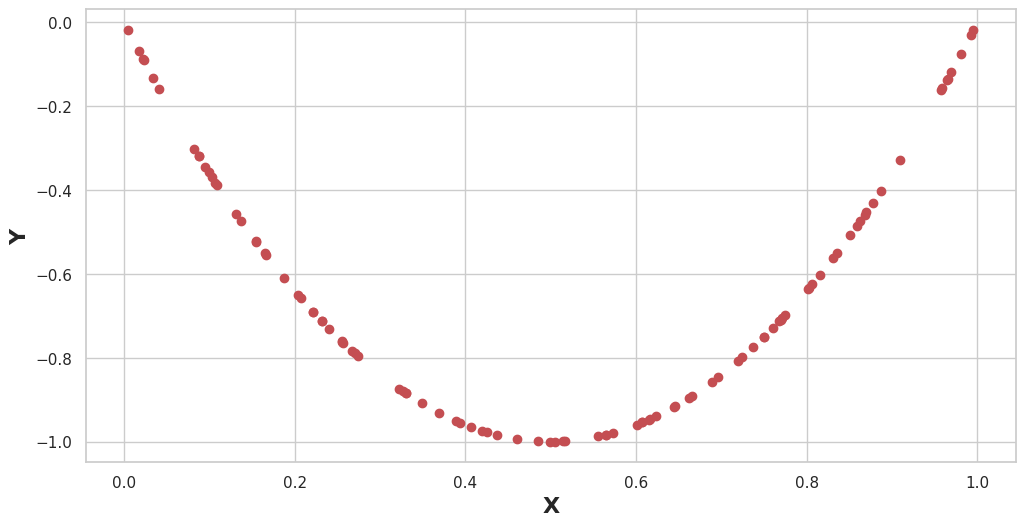

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 0.2261 - mean_squared_error: 0.2261 - val_loss: 0.2567 - val_mean_squared_error: 0.2567


Epoch 2/200
 - 0s - loss: 0.2238 - mean_squared_error: 0.2238 - val_loss: 0.2408 - val_mean_squared_error: 0.2408


Epoch 3/200
 - 0s - loss: 0.2175 - mean_squared_error: 0.2175 - val_loss: 0.2363 - val_mean_squared_error: 0.2363


Epoch 4/200
 - 0s - loss: 0.2145 - mean_squared_error: 0.2145 - val_loss: 0.2360 - val_mean_squared_error: 0.2360


Epoch 5/200
 - 0s - loss: 0.2122 - mean_squared_error: 0.2122 - val_loss: 0.2303 - val_mean_squared_error: 0.2303


Epoch 6/200
 - 0s - loss: 0.2090 - mean_squared_error: 0.2090 - val_loss: 0.2169 - val_mean_squared_error: 0.2169


Epoch 7/200
 - 0s - loss: 0.2040 - mean_squared_error: 0.2040 - val_loss: 0.2111 - val_mean_squared_error: 0.2111


Epoch 8/200
 - 0s - loss: 0.2007 - mean_squared_error: 0.2007 - val_loss: 0.2068 - val_mean_squared_error: 0.2068


Epoch 9/200
 - 0s - loss: 0.1978 - mean_squared_error: 0.1978 - val_loss: 0.2091 - val_mean_squared_error: 0.2091


Epoch 10/200
 - 0s - loss: 0.1965 - mean_squared_error: 0.1965 - val_loss: 0.1976 - val_mean_squared_error: 0.1976


Epoch 11/200
 - 0s - loss: 0.1921 - mean_squared_error: 0.1921 - val_loss: 0.1913 - val_mean_squared_error: 0.1913


Epoch 12/200
 - 0s - loss: 0.1889 - mean_squared_error: 0.1889 - val_loss: 0.1900 - val_mean_squared_error: 0.1900


Epoch 13/200
 - 0s - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 0.1855 - val_mean_squared_error: 0.1855


Epoch 14/200
 - 0s - loss: 0.1846 - mean_squared_error: 0.1846 - val_loss: 0.1874 - val_mean_squared_error: 0.1874


Epoch 15/200
 - 0s - loss: 0.1827 - mean_squared_error: 0.1827 - val_loss: 0.1889 - val_mean_squared_error: 0.1889


Epoch 16/200
 - 0s - loss: 0.1810 - mean_squared_error: 0.1810 - val_loss: 0.1905 - val_mean_squared_error: 0.1905


Epoch 17/200
 - 0s - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 0.1916 - val_mean_squared_error: 0.1916


Epoch 18/200
 - 0s - loss: 0.1781 - mean_squared_error: 0.1781 - val_loss: 0.1841 - val_mean_squared_error: 0.1841


Epoch 19/200
 - 0s - loss: 0.1752 - mean_squared_error: 0.1752 - val_loss: 0.1862 - val_mean_squared_error: 0.1862


Epoch 20/200
 - 0s - loss: 0.1739 - mean_squared_error: 0.1739 - val_loss: 0.1857 - val_mean_squared_error: 0.1857


Epoch 21/200
 - 0s - loss: 0.1727 - mean_squared_error: 0.1727 - val_loss: 0.1881 - val_mean_squared_error: 0.1881


Epoch 22/200
 - 0s - loss: 0.1718 - mean_squared_error: 0.1718 - val_loss: 0.1793 - val_mean_squared_error: 0.1793


Epoch 23/200
 - 0s - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.1756 - val_mean_squared_error: 0.1756


Epoch 24/200
 - 0s - loss: 0.1666 - mean_squared_error: 0.1666 - val_loss: 0.1723 - val_mean_squared_error: 0.1723


Epoch 25/200
 - 0s - loss: 0.1650 - mean_squared_error: 0.1650 - val_loss: 0.1690 - val_mean_squared_error: 0.1690


Epoch 26/200
 - 0s - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.1695 - val_mean_squared_error: 0.1695


Epoch 27/200
 - 0s - loss: 0.1619 - mean_squared_error: 0.1619 - val_loss: 0.1623 - val_mean_squared_error: 0.1623


Epoch 28/200
 - 0s - loss: 0.1596 - mean_squared_error: 0.1596 - val_loss: 0.1599 - val_mean_squared_error: 0.1599


Epoch 29/200
 - 0s - loss: 0.1587 - mean_squared_error: 0.1587 - val_loss: 0.1616 - val_mean_squared_error: 0.1616


Epoch 30/200
 - 0s - loss: 0.1572 - mean_squared_error: 0.1572 - val_loss: 0.1629 - val_mean_squared_error: 0.1629


Epoch 31/200
 - 0s - loss: 0.1563 - mean_squared_error: 0.1563 - val_loss: 0.1614 - val_mean_squared_error: 0.1614


Epoch 32/200
 - 0s - loss: 0.1554 - mean_squared_error: 0.1554 - val_loss: 0.1611 - val_mean_squared_error: 0.1611


Epoch 33/200
 - 0s - loss: 0.1542 - mean_squared_error: 0.1542 - val_loss: 0.1564 - val_mean_squared_error: 0.1564


Epoch 34/200
 - 0s - loss: 0.1524 - mean_squared_error: 0.1524 - val_loss: 0.1525 - val_mean_squared_error: 0.1525


Epoch 35/200
 - 0s - loss: 0.1508 - mean_squared_error: 0.1508 - val_loss: 0.1538 - val_mean_squared_error: 0.1538


Epoch 36/200
 - 0s - loss: 0.1500 - mean_squared_error: 0.1500 - val_loss: 0.1520 - val_mean_squared_error: 0.1520


Epoch 37/200
 - 0s - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.1462 - val_mean_squared_error: 0.1462


Epoch 38/200
 - 0s - loss: 0.1467 - mean_squared_error: 0.1467 - val_loss: 0.1467 - val_mean_squared_error: 0.1467


Epoch 39/200
 - 0s - loss: 0.1462 - mean_squared_error: 0.1462 - val_loss: 0.1474 - val_mean_squared_error: 0.1474


Epoch 40/200
 - 0s - loss: 0.1450 - mean_squared_error: 0.1450 - val_loss: 0.1481 - val_mean_squared_error: 0.1481


Epoch 41/200
 - 0s - loss: 0.1443 - mean_squared_error: 0.1443 - val_loss: 0.1478 - val_mean_squared_error: 0.1478


Epoch 42/200
 - 0s - loss: 0.1437 - mean_squared_error: 0.1437 - val_loss: 0.1434 - val_mean_squared_error: 0.1434


Epoch 43/200
 - 0s - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 0.1449 - val_mean_squared_error: 0.1449


Epoch 44/200
 - 0s - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.1434 - val_mean_squared_error: 0.1434


Epoch 45/200
 - 0s - loss: 0.1404 - mean_squared_error: 0.1404 - val_loss: 0.1392 - val_mean_squared_error: 0.1392


Epoch 46/200
 - 0s - loss: 0.1384 - mean_squared_error: 0.1384 - val_loss: 0.1414 - val_mean_squared_error: 0.1414


Epoch 47/200
 - 0s - loss: 0.1379 - mean_squared_error: 0.1379 - val_loss: 0.1416 - val_mean_squared_error: 0.1416


Epoch 48/200


 - 0s - loss: 0.1373 - mean_squared_error: 0.1373 - val_loss: 0.1394 - val_mean_squared_error: 0.1394


Epoch 49/200


 - 0s - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.1369 - val_mean_squared_error: 0.1369


Epoch 50/200


 - 0s - loss: 0.1352 - mean_squared_error: 0.1352 - val_loss: 0.1395 - val_mean_squared_error: 0.1395


Epoch 51/200


 - 0s - loss: 0.1347 - mean_squared_error: 0.1347 - val_loss: 0.1359 - val_mean_squared_error: 0.1359


Epoch 52/200


 - 0s - loss: 0.1339 - mean_squared_error: 0.1339 - val_loss: 0.1328 - val_mean_squared_error: 0.1328


Epoch 53/200


 - 0s - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1339 - val_mean_squared_error: 0.1339


Epoch 54/200
 - 0s - loss: 0.1319 - mean_squared_error: 0.1319 - val_loss: 0.1352 - val_mean_squared_error: 0.1352


Epoch 55/200


 - 0s - loss: 0.1313 - mean_squared_error: 0.1313 - val_loss: 0.1354 - val_mean_squared_error: 0.1354


Epoch 56/200
 - 0s - loss: 0.1309 - mean_squared_error: 0.1309 - val_loss: 0.1375 - val_mean_squared_error: 0.1375


Epoch 57/200


 - 0s - loss: 0.1305 - mean_squared_error: 0.1305 - val_loss: 0.1387 - val_mean_squared_error: 0.1387


Epoch 58/200


 - 0s - loss: 0.1304 - mean_squared_error: 0.1304 - val_loss: 0.1398 - val_mean_squared_error: 0.1398


Epoch 59/200


 - 0s - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.1421 - val_mean_squared_error: 0.1421


Epoch 60/200
 - 0s - loss: 0.1303 - mean_squared_error: 0.1303 - val_loss: 0.1428 - val_mean_squared_error: 0.1428


Epoch 61/200
 - 0s - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.1428 - val_mean_squared_error: 0.1428


Epoch 62/200


 - 0s - loss: 0.1296 - mean_squared_error: 0.1296 - val_loss: 0.1430 - val_mean_squared_error: 0.1430


Epoch 63/200


 - 0s - loss: 0.1292 - mean_squared_error: 0.1292 - val_loss: 0.1356 - val_mean_squared_error: 0.1356


Epoch 64/200


 - 0s - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1336 - val_mean_squared_error: 0.1336


Epoch 65/200


 - 0s - loss: 0.1257 - mean_squared_error: 0.1257 - val_loss: 0.1309 - val_mean_squared_error: 0.1309


Epoch 66/200
 - 0s - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.1317 - val_mean_squared_error: 0.1317


Epoch 67/200
 - 0s - loss: 0.1246 - mean_squared_error: 0.1246 - val_loss: 0.1315 - val_mean_squared_error: 0.1315


Epoch 68/200


 - 0s - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1269 - val_mean_squared_error: 0.1269


Epoch 69/200
 - 0s - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.1275 - val_mean_squared_error: 0.1275


Epoch 70/200


 - 0s - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 71/200


 - 0s - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.1155 - val_mean_squared_error: 0.1155


Epoch 72/200


 - 0s - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.1166 - val_mean_squared_error: 0.1166


Epoch 73/200
 - 0s - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.1177 - val_mean_squared_error: 0.1177


Epoch 74/200
 - 0s - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.1193 - val_mean_squared_error: 0.1193


Epoch 75/200
 - 0s - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.1189 - val_mean_squared_error: 0.1189


Epoch 76/200
 - 0s - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.1164 - val_mean_squared_error: 0.1164


Epoch 77/200


 - 0s - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.1177 - val_mean_squared_error: 0.1177


Epoch 78/200


 - 0s - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.1170 - val_mean_squared_error: 0.1170


Epoch 79/200


 - 0s - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.1158 - val_mean_squared_error: 0.1158


Epoch 80/200


 - 0s - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.1138 - val_mean_squared_error: 0.1138


Epoch 81/200


 - 0s - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.1117 - val_mean_squared_error: 0.1117


Epoch 82/200


 - 0s - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.1091 - val_mean_squared_error: 0.1091


Epoch 83/200
 - 0s - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.1111 - val_mean_squared_error: 0.1111


Epoch 84/200
 - 0s - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1132 - val_mean_squared_error: 0.1132


Epoch 85/200
 - 0s - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.1126 - val_mean_squared_error: 0.1126


Epoch 86/200
 - 0s - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.1134 - val_mean_squared_error: 0.1134


Epoch 87/200
 - 0s - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.1132 - val_mean_squared_error: 0.1132


Epoch 88/200
 - 0s - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.1122 - val_mean_squared_error: 0.1122


Epoch 89/200


 - 0s - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.1113 - val_mean_squared_error: 0.1113


Epoch 90/200


 - 0s - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.1133 - val_mean_squared_error: 0.1133


Epoch 91/200


 - 0s - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.1098 - val_mean_squared_error: 0.1098


Epoch 92/200


 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.1110 - val_mean_squared_error: 0.1110


Epoch 93/200


 - 0s - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.1124 - val_mean_squared_error: 0.1124


Epoch 94/200


 - 0s - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.1122 - val_mean_squared_error: 0.1122


Epoch 95/200


 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1129 - val_mean_squared_error: 0.1129


Epoch 96/200


 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1133 - val_mean_squared_error: 0.1133


Epoch 97/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.1143 - val_mean_squared_error: 0.1143


Epoch 98/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.1162 - val_mean_squared_error: 0.1162


Epoch 99/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.1175 - val_mean_squared_error: 0.1175


Epoch 100/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.1151 - val_mean_squared_error: 0.1151


Epoch 101/200


 - 0s - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.1112 - val_mean_squared_error: 0.1112


Epoch 102/200


 - 0s - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.1118 - val_mean_squared_error: 0.1118


Epoch 103/200


 - 0s - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.1112 - val_mean_squared_error: 0.1112


Epoch 104/200


 - 0s - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.1115 - val_mean_squared_error: 0.1115


Epoch 105/200


 - 0s - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.1089 - val_mean_squared_error: 0.1089


Epoch 106/200


 - 0s - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.1064 - val_mean_squared_error: 0.1064


Epoch 107/200
 - 0s - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.1066 - val_mean_squared_error: 0.1066


Epoch 108/200


 - 0s - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.1048 - val_mean_squared_error: 0.1048


Epoch 109/200


 - 0s - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.1039 - val_mean_squared_error: 0.1039


Epoch 110/200


 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 111/200


 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 112/200


 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 113/200
 - 0s - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 114/200


 - 0s - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 115/200


 - 0s - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 116/200


 - 0s - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 117/200


 - 0s - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 118/200


 - 0s - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 119/200


 - 0s - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 120/200


 - 0s - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 121/200


 - 0s - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 122/200


 - 0s - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 123/200


 - 0s - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 124/200


 - 0s - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 125/200
 - 0s - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0956 - val_mean_squared_error: 0.0956


Epoch 126/200
 - 0s - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 127/200
 - 0s - loss: 0.1006 - mean_squared_error: 0.1006 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 128/200


 - 0s - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 129/200


 - 0s - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 130/200


 - 0s - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 131/200


 - 0s - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 132/200


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 133/200

 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 134/200


 - 0s - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 135/200


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.1042 - val_mean_squared_error: 0.1042


Epoch 136/200


 - 0s - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 137/200


 - 0s - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 138/200


 - 0s - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 139/200


 - 0s - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 140/200


 - 0s - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 141/200


 - 0s - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 142/200


 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 143/200
 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 144/200


 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 145/200


 - 0s - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 146/200


 - 0s - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 147/200


 - 0s - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 148/200


 - 0s - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 149/200
 - 0s - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 150/200


 - 0s - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 151/200


 - 0s - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 152/200


 - 0s - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 153/200


 - 0s - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 154/200
 - 0s - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 155/200


 - 0s - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 156/200


 - 0s - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 157/200
 - 0s - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 158/200


 - 0s - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0960 - val_mean_squared_error: 0.0960


Epoch 159/200


 - 0s - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 160/200


 - 0s - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 161/200


 - 0s - loss: 0.0944 - mean_squared_error: 0.0944 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 162/200


 - 0s - loss: 0.0946 - mean_squared_error: 0.0946 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 163/200


 - 0s - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 164/200


 - 0s - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 165/200
 - 0s - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 166/200


 - 0s - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 167/200
 - 0s - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 168/200


 - 0s - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 169/200


 - 0s - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 170/200


 - 0s - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 171/200


 - 0s - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 172/200


 - 0s - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 173/200


 - 0s - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 174/200


 - 0s - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.0955 - val_mean_squared_error: 0.0955


Epoch 175/200


 - 0s - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0940 - val_mean_squared_error: 0.0940


Epoch 176/200


 - 0s - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.0958 - val_mean_squared_error: 0.0958


Epoch 177/200


 - 0s - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.0949 - val_mean_squared_error: 0.0949


Epoch 178/200
 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0954 - val_mean_squared_error: 0.0954


Epoch 179/200


 - 0s - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 180/200


 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 181/200


 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 182/200


 - 0s - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 183/200


 - 0s - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 184/200


 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 185/200


 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 186/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 187/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 188/200


 - 0s - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 189/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 190/200


 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 191/200


 - 0s - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 192/200


 - 0s - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 193/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 194/200


 - 0s - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 195/200


 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 196/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 197/200


 - 0s - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 198/200


 - 0s - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 199/200


 - 0s - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.1028 - val_mean_squared_error: 0.1028


Epoch 200/200


 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

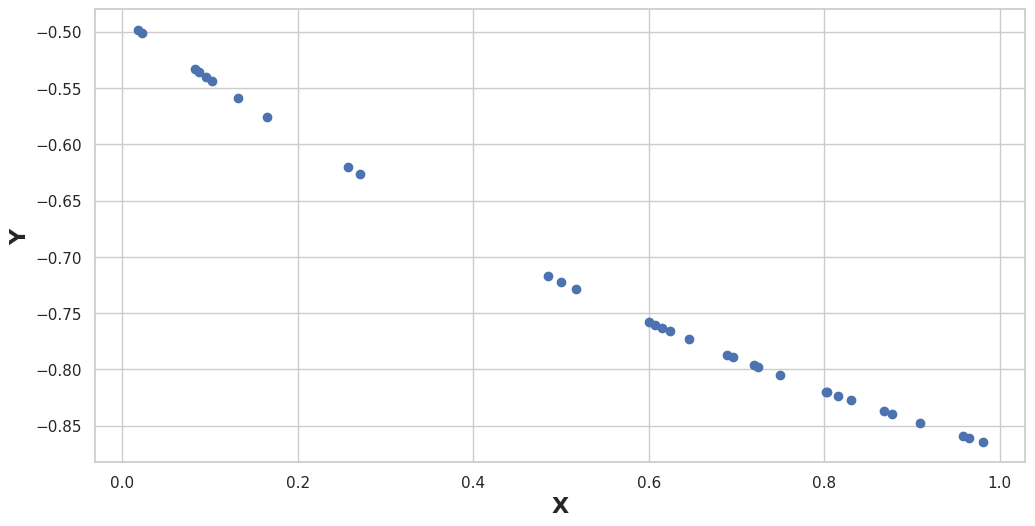

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [0.25673442175894073,
  0.24077071565570254,
  0.23630420366923013,
  0.23597591212301544,
  0.2302874760194258,
  0.216916358832157,
  0.21111792145353375,
  0.20676839712894324,
  0.20912696014751087,
  0.19759079904267282,
  0.19133255337223862,
  0.18999207019805908,
  0.1855176795612682,
  0.18738680536096747,
  0.1889056581439394,
  0.1905366326823379,
  0.191641294594967,
  0.18409898786833792,
  0.18617807373856055,
  0.1857100905794086,
  0.188082344604261,
  0.17934227350986365,
  0.17556275020946155,
  0.17229831399339618,
  0.16902646512696237,
  0.1694664792581038,
  0.16232754425569015,
  0.1598984870043668,
  0.1616219011220065,
  0.16286846001942953,
  0.1613649274363662,
  0.16108916745041357,
  0.15642844366304803,
  0.15254814155174024,
  0.15382039005106146,
  0.1519805590311686,
  0.14615381847728381,
  0.14668482542037964,
  0.14744597312175867,
  0.14814422166708743,
  0.14781700481068005,
  0.14338421099113696,
  0.14491475531549164,
  0.14343706224

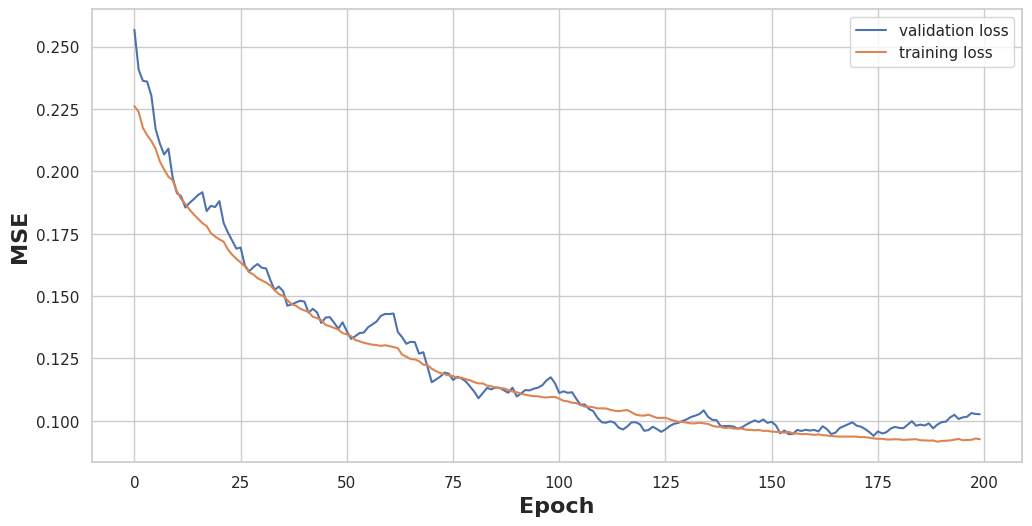

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 0.3504 - mean_squared_error: 0.3504 - val_loss: 0.0856 - val_mean_squared_error: 0.0856


Epoch 2/500
 - 0s - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.1406 - val_mean_squared_error: 0.1406


Epoch 3/500
 - 0s - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 4/500
 - 0s - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0894 - val_mean_squared_error: 0.0894


Epoch 5/500
 - 0s - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0882 - val_mean_squared_error: 0.0882


Epoch 6/500
 - 0s - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0797 - val_mean_squared_error: 0.0797


Epoch 7/500
 - 0s - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.1364 - val_mean_squared_error: 0.1364


Epoch 8/500
 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0849 - val_mean_squared_error: 0.0849


Epoch 9/500
 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0742 - val_mean_squared_error: 0.0742


Epoch 10/500
 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0796 - val_mean_squared_error: 0.0796


Epoch 11/500
 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0733 - val_mean_squared_error: 0.0733


Epoch 12/500
 - 0s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0781 - val_mean_squared_error: 0.0781


Epoch 13/500
 - 0s - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.1141 - val_mean_squared_error: 0.1141


Epoch 14/500
 - 0s - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 15/500
 - 0s - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.1155 - val_mean_squared_error: 0.1155


Epoch 16/500
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.1290 - val_mean_squared_error: 0.1290


Epoch 17/500
 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1130 - val_mean_squared_error: 0.1130


Epoch 18/500
 - 0s - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.1696 - val_mean_squared_error: 0.1696


Epoch 19/500
 - 0s - loss: 0.1335 - mean_squared_error: 0.1335 - val_loss: 0.0751 - val_mean_squared_error: 0.0751


Epoch 20/500
 - 0s - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0810 - val_mean_squared_error: 0.0810


Epoch 21/500
 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0681 - val_mean_squared_error: 0.0681


Epoch 22/500
 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0892 - val_mean_squared_error: 0.0892


Epoch 23/500
 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0672 - val_mean_squared_error: 0.0672


Epoch 24/500
 - 0s - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.1370 - val_mean_squared_error: 0.1370


Epoch 25/500
 - 0s - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0692 - val_mean_squared_error: 0.0692


Epoch 26/500
 - 0s - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0874 - val_mean_squared_error: 0.0874


Epoch 27/500
 - 0s - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 28/500
 - 0s - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0898 - val_mean_squared_error: 0.0898


Epoch 29/500
 - 0s - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0664 - val_mean_squared_error: 0.0664


Epoch 30/500
 - 0s - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0667 - val_mean_squared_error: 0.0667


Epoch 31/500
 - 0s - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0668 - val_mean_squared_error: 0.0668


Epoch 32/500
 - 0s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0662 - val_mean_squared_error: 0.0662


Epoch 33/500
 - 0s - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0701 - val_mean_squared_error: 0.0701


Epoch 34/500
 - 0s - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0906 - val_mean_squared_error: 0.0906


Epoch 35/500


 - 0s - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0676 - val_mean_squared_error: 0.0676


Epoch 36/500
 - 0s - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.0823 - val_mean_squared_error: 0.0823


Epoch 37/500
 - 0s - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0637 - val_mean_squared_error: 0.0637


Epoch 38/500
 - 0s - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0884 - val_mean_squared_error: 0.0884


Epoch 39/500
 - 0s - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0628 - val_mean_squared_error: 0.0628


Epoch 40/500
 - 0s - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 41/500
 - 0s - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0911 - val_mean_squared_error: 0.0911


Epoch 42/500
 - 0s - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.1051 - val_mean_squared_error: 0.1051


Epoch 43/500
 - 0s - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.1144 - val_mean_squared_error: 0.1144


Epoch 44/500
 - 0s - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.0951 - val_mean_squared_error: 0.0951


Epoch 45/500
 - 0s - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 46/500
 - 0s - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0583 - val_mean_squared_error: 0.0583


Epoch 47/500


 - 0s - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0756 - val_mean_squared_error: 0.0756


Epoch 48/500


 - 0s - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0580 - val_mean_squared_error: 0.0580


Epoch 49/500
 - 0s - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0626 - val_mean_squared_error: 0.0626


Epoch 50/500
 - 0s - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0749 - val_mean_squared_error: 0.0749


Epoch 51/500


 - 0s - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 52/500


 - 0s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.1061 - val_mean_squared_error: 0.1061


Epoch 53/500


 - 0s - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0578 - val_mean_squared_error: 0.0578


Epoch 54/500


 - 0s - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0841 - val_mean_squared_error: 0.0841


Epoch 55/500
 - 0s - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0561 - val_mean_squared_error: 0.0561


Epoch 56/500
 - 0s - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0606 - val_mean_squared_error: 0.0606


Epoch 57/500


 - 0s - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0672 - val_mean_squared_error: 0.0672


Epoch 58/500
 - 0s - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.0748 - val_mean_squared_error: 0.0748


Epoch 59/500
 - 0s - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.0535 - val_mean_squared_error: 0.0535


Epoch 60/500
 - 0s - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 61/500
 - 0s - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0887 - val_mean_squared_error: 0.0887


Epoch 62/500
 - 0s - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.0523 - val_mean_squared_error: 0.0523


Epoch 63/500
 - 0s - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.0734 - val_mean_squared_error: 0.0734


Epoch 64/500


 - 0s - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0526 - val_mean_squared_error: 0.0526


Epoch 65/500


 - 0s - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0646 - val_mean_squared_error: 0.0646


Epoch 66/500


 - 0s - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.0521 - val_mean_squared_error: 0.0521


Epoch 67/500


 - 0s - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0509 - val_mean_squared_error: 0.0509


Epoch 68/500
 - 0s - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0557 - val_mean_squared_error: 0.0557


Epoch 69/500


 - 0s - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0925 - val_mean_squared_error: 0.0925


Epoch 70/500


 - 0s - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0546 - val_mean_squared_error: 0.0546


Epoch 71/500


 - 0s - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0841 - val_mean_squared_error: 0.0841


Epoch 72/500


 - 0s - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 73/500


 - 0s - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.0534 - val_mean_squared_error: 0.0534


Epoch 74/500


 - 0s - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.0546 - val_mean_squared_error: 0.0546


Epoch 75/500
 - 0s - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0540 - val_mean_squared_error: 0.0540


Epoch 76/500
 - 0s - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0688 - val_mean_squared_error: 0.0688


Epoch 77/500


 - 0s - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0502 - val_mean_squared_error: 0.0502


Epoch 78/500
 - 0s - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0651 - val_mean_squared_error: 0.0651


Epoch 79/500
 - 0s - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0694 - val_mean_squared_error: 0.0694


Epoch 80/500


 - 0s - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0736 - val_mean_squared_error: 0.0736


Epoch 81/500


 - 0s - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.0475 - val_mean_squared_error: 0.0475


Epoch 82/500
 - 0s - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0666 - val_mean_squared_error: 0.0666


Epoch 83/500


 - 0s - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0516 - val_mean_squared_error: 0.0516


Epoch 84/500


 - 0s - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0440 - val_mean_squared_error: 0.0440


Epoch 85/500
 - 0s - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0503 - val_mean_squared_error: 0.0503


Epoch 86/500
 - 0s - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0527 - val_mean_squared_error: 0.0527


Epoch 87/500
 - 0s - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 88/500
 - 0s - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0522 - val_mean_squared_error: 0.0522


Epoch 89/500
 - 0s - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 90/500


 - 0s - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0453 - val_mean_squared_error: 0.0453


Epoch 91/500
 - 0s - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0423 - val_mean_squared_error: 0.0423


Epoch 92/500


 - 0s - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0448 - val_mean_squared_error: 0.0448


Epoch 93/500
 - 0s - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0715 - val_mean_squared_error: 0.0715


Epoch 94/500
 - 0s - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0478 - val_mean_squared_error: 0.0478


Epoch 95/500


 - 0s - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0411 - val_mean_squared_error: 0.0411


Epoch 96/500
 - 0s - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0429 - val_mean_squared_error: 0.0429


Epoch 97/500


 - 0s - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.0723 - val_mean_squared_error: 0.0723


Epoch 98/500


 - 0s - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0490 - val_mean_squared_error: 0.0490


Epoch 99/500


 - 0s - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0549 - val_mean_squared_error: 0.0549


Epoch 100/500


 - 0s - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0456 - val_mean_squared_error: 0.0456


Epoch 101/500


 - 0s - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0379 - val_mean_squared_error: 0.0379


Epoch 102/500


 - 0s - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0425 - val_mean_squared_error: 0.0425


Epoch 103/500


 - 0s - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0390 - val_mean_squared_error: 0.0390


Epoch 104/500


 - 0s - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0385 - val_mean_squared_error: 0.0385


Epoch 105/500


 - 0s - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0361 - val_mean_squared_error: 0.0361


Epoch 106/500


 - 0s - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0507 - val_mean_squared_error: 0.0507


Epoch 107/500
 - 0s - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0474 - val_mean_squared_error: 0.0474


Epoch 108/500


 - 0s - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0356 - val_mean_squared_error: 0.0356


Epoch 109/500


 - 0s - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0724 - val_mean_squared_error: 0.0724


Epoch 110/500


 - 0s - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0406 - val_mean_squared_error: 0.0406


Epoch 111/500


 - 0s - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0352 - val_mean_squared_error: 0.0352


Epoch 112/500


 - 0s - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0393 - val_mean_squared_error: 0.0393


Epoch 113/500


 - 0s - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0371 - val_mean_squared_error: 0.0371


Epoch 114/500


 - 0s - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0396 - val_mean_squared_error: 0.0396


Epoch 115/500


 - 0s - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0625 - val_mean_squared_error: 0.0625


Epoch 116/500


 - 0s - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.0449 - val_mean_squared_error: 0.0449


Epoch 117/500


 - 0s - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0583 - val_mean_squared_error: 0.0583


Epoch 118/500


 - 0s - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0324 - val_mean_squared_error: 0.0324


Epoch 119/500


 - 0s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 120/500


 - 0s - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0345 - val_mean_squared_error: 0.0345


Epoch 121/500


 - 0s - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0492 - val_mean_squared_error: 0.0492


Epoch 122/500


 - 0s - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0488 - val_mean_squared_error: 0.0488


Epoch 123/500


 - 0s - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0383 - val_mean_squared_error: 0.0383


Epoch 124/500

 - 0s - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0383 - val_mean_squared_error: 0.0383


Epoch 125/500
 - 0s - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0424 - val_mean_squared_error: 0.0424


Epoch 126/500
 - 0s - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0331 - val_mean_squared_error: 0.0331


Epoch 127/500


 - 0s - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0320 - val_mean_squared_error: 0.0320


Epoch 128/500


 - 0s - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0365 - val_mean_squared_error: 0.0365


Epoch 129/500
 - 0s - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0327 - val_mean_squared_error: 0.0327


Epoch 130/500


 - 0s - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0282 - val_mean_squared_error: 0.0282


Epoch 131/500
 - 0s - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0294 - val_mean_squared_error: 0.0294


Epoch 132/500
 - 0s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0263 - val_mean_squared_error: 0.0263


Epoch 133/500


 - 0s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0265 - val_mean_squared_error: 0.0265


Epoch 134/500
 - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0360 - val_mean_squared_error: 0.0360


Epoch 135/500


 - 0s - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0255 - val_mean_squared_error: 0.0255


Epoch 136/500


 - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0251 - val_mean_squared_error: 0.0251


Epoch 137/500


 - 0s - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0456 - val_mean_squared_error: 0.0456


Epoch 138/500


 - 0s - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0250 - val_mean_squared_error: 0.0250


Epoch 139/500


 - 0s - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0292 - val_mean_squared_error: 0.0292


Epoch 140/500


 - 0s - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0438 - val_mean_squared_error: 0.0438


Epoch 141/500


 - 0s - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0322 - val_mean_squared_error: 0.0322


Epoch 142/500


 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0238 - val_mean_squared_error: 0.0238


Epoch 143/500


 - 0s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0262 - val_mean_squared_error: 0.0262


Epoch 144/500


 - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0228 - val_mean_squared_error: 0.0228


Epoch 145/500


 - 0s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0225 - val_mean_squared_error: 0.0225


Epoch 146/500


 - 0s - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0224 - val_mean_squared_error: 0.0224


Epoch 147/500


 - 0s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0272 - val_mean_squared_error: 0.0272


Epoch 148/500


 - 0s - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0294 - val_mean_squared_error: 0.0294


Epoch 149/500


 - 0s - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0233 - val_mean_squared_error: 0.0233


Epoch 150/500


 - 0s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0253 - val_mean_squared_error: 0.0253


Epoch 151/500


 - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0297 - val_mean_squared_error: 0.0297


Epoch 152/500


 - 0s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0249 - val_mean_squared_error: 0.0249


Epoch 153/500


 - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0237 - val_mean_squared_error: 0.0237


Epoch 154/500


 - 0s - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0213 - val_mean_squared_error: 0.0213


Epoch 155/500


 - 0s - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


Epoch 156/500


 - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0251 - val_mean_squared_error: 0.0251


Epoch 157/500


 - 0s - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0207 - val_mean_squared_error: 0.0207


Epoch 158/500


 - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0194 - val_mean_squared_error: 0.0194


Epoch 159/500


 - 0s - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0193 - val_mean_squared_error: 0.0193


Epoch 160/500


 - 0s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0256 - val_mean_squared_error: 0.0256


Epoch 161/500


 - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0189 - val_mean_squared_error: 0.0189


Epoch 162/500


 - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0201 - val_mean_squared_error: 0.0201


Epoch 163/500

 - 0s - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0247 - val_mean_squared_error: 0.0247


Epoch 164/500


 - 0s - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


Epoch 165/500


 - 0s - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0235 - val_mean_squared_error: 0.0235


Epoch 166/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0241 - val_mean_squared_error: 0.0241


Epoch 167/500


 - 0s - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0188 - val_mean_squared_error: 0.0188


Epoch 168/500


 - 0s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0299 - val_mean_squared_error: 0.0299


Epoch 169/500


 - 0s - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0208 - val_mean_squared_error: 0.0208


Epoch 170/500


 - 0s - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0214 - val_mean_squared_error: 0.0214


Epoch 171/500


 - 0s - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0233 - val_mean_squared_error: 0.0233


Epoch 172/500


 - 0s - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0166 - val_mean_squared_error: 0.0166


Epoch 173/500


 - 0s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0193 - val_mean_squared_error: 0.0193


Epoch 174/500


 - 0s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0231 - val_mean_squared_error: 0.0231


Epoch 175/500
 - 0s - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0191 - val_mean_squared_error: 0.0191


Epoch 176/500


 - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0209 - val_mean_squared_error: 0.0209


Epoch 177/500


 - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0157 - val_mean_squared_error: 0.0157


Epoch 178/500
 - 0s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0197 - val_mean_squared_error: 0.0197


Epoch 179/500
 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0177 - val_mean_squared_error: 0.0177


Epoch 180/500


 - 0s - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0152 - val_mean_squared_error: 0.0152


Epoch 181/500


 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0248 - val_mean_squared_error: 0.0248


Epoch 182/500


 - 0s - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0153 - val_mean_squared_error: 0.0153


Epoch 183/500


 - 0s - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0181 - val_mean_squared_error: 0.0181


Epoch 184/500


 - 0s - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


Epoch 185/500


 - 0s - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0135 - val_mean_squared_error: 0.0135


Epoch 186/500


 - 0s - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0133 - val_mean_squared_error: 0.0133


Epoch 187/500


 - 0s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0163 - val_mean_squared_error: 0.0163


Epoch 188/500


 - 0s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0129 - val_mean_squared_error: 0.0129


Epoch 189/500


 - 0s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0170 - val_mean_squared_error: 0.0170


Epoch 190/500


 - 0s - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0142 - val_mean_squared_error: 0.0142


Epoch 191/500


 - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0170 - val_mean_squared_error: 0.0170


Epoch 192/500


 - 0s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0129 - val_mean_squared_error: 0.0129


Epoch 193/500


 - 0s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0197 - val_mean_squared_error: 0.0197


Epoch 194/500


 - 0s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0129 - val_mean_squared_error: 0.0129


Epoch 195/500


 - 0s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0135 - val_mean_squared_error: 0.0135


Epoch 196/500


 - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0121 - val_mean_squared_error: 0.0121


Epoch 197/500


 - 0s - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0132 - val_mean_squared_error: 0.0132


Epoch 198/500


 - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0118 - val_mean_squared_error: 0.0118


Epoch 199/500


 - 0s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0115 - val_mean_squared_error: 0.0115


Epoch 200/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0114 - val_mean_squared_error: 0.0114


Epoch 201/500


 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0133 - val_mean_squared_error: 0.0133


Epoch 202/500


 - 0s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0208 - val_mean_squared_error: 0.0208


Epoch 203/500


 - 0s - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 204/500


 - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0114 - val_mean_squared_error: 0.0114


Epoch 205/500


 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0104 - val_mean_squared_error: 0.0104


Epoch 206/500


 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0122 - val_mean_squared_error: 0.0122


Epoch 207/500


 - 0s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0101 - val_mean_squared_error: 0.0101


Epoch 208/500


 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0109 - val_mean_squared_error: 0.0109


Epoch 209/500


 - 0s - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0098 - val_mean_squared_error: 0.0098


Epoch 210/500


 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 211/500


 - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0102 - val_mean_squared_error: 0.0102


Epoch 212/500


 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0103 - val_mean_squared_error: 0.0103


Epoch 213/500


 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0105 - val_mean_squared_error: 0.0105


Epoch 214/500


 - 0s - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


Epoch 215/500


 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0106 - val_mean_squared_error: 0.0106


Epoch 216/500


 - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0127 - val_mean_squared_error: 0.0127


Epoch 217/500


 - 0s - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0100 - val_mean_squared_error: 0.0100


Epoch 218/500


 - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0129 - val_mean_squared_error: 0.0129


Epoch 219/500


 - 0s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0086 - val_mean_squared_error: 0.0086


Epoch 220/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0090 - val_mean_squared_error: 0.0090


Epoch 221/500


 - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0128 - val_mean_squared_error: 0.0128


Epoch 222/500


 - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0139 - val_mean_squared_error: 0.0139


Epoch 223/500


 - 0s - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


Epoch 224/500


 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0109 - val_mean_squared_error: 0.0109


Epoch 225/500


 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0082 - val_mean_squared_error: 0.0082


Epoch 226/500


 - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0080 - val_mean_squared_error: 0.0080


Epoch 227/500
 - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


Epoch 228/500


 - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0126 - val_mean_squared_error: 0.0126


Epoch 229/500


 - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0092 - val_mean_squared_error: 0.0092


Epoch 230/500


 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


Epoch 231/500


 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0076 - val_mean_squared_error: 0.0076


Epoch 232/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0076 - val_mean_squared_error: 0.0076


Epoch 233/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0086 - val_mean_squared_error: 0.0086


Epoch 234/500


 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0445 - val_mean_squared_error: 0.0445


Epoch 235/500


 - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0220 - val_mean_squared_error: 0.0220


Epoch 236/500


 - 0s - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 237/500


 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


Epoch 238/500


 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0097 - val_mean_squared_error: 0.0097


Epoch 239/500


 - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0310 - val_mean_squared_error: 0.0310


Epoch 240/500


 - 0s - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0069 - val_mean_squared_error: 0.0069


Epoch 241/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0079 - val_mean_squared_error: 0.0079


Epoch 242/500


 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 243/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0070 - val_mean_squared_error: 0.0070


Epoch 244/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


Epoch 245/500


 - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 246/500


 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


Epoch 247/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 248/500


 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0070 - val_mean_squared_error: 0.0070


Epoch 249/500


 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 250/500


 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0059 - val_mean_squared_error: 0.0059


Epoch 251/500


 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 252/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 253/500


 - 0s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0066 - val_mean_squared_error: 0.0066


Epoch 254/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 255/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0078 - val_mean_squared_error: 0.0078


Epoch 256/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


Epoch 257/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 258/500


 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 259/500
 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_squared_error: 0.0054


Epoch 260/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 261/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0107 - val_mean_squared_error: 0.0107


Epoch 262/500


 - 0s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 263/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 264/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


Epoch 265/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0068 - val_mean_squared_error: 0.0068


Epoch 266/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 267/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0121 - val_mean_squared_error: 0.0121


Epoch 268/500


 - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 269/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 270/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 271/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 272/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 273/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0143 - val_mean_squared_error: 0.0143


Epoch 274/500


 - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 275/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 276/500


 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 277/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0123 - val_mean_squared_error: 0.0123


Epoch 278/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 279/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0059 - val_mean_squared_error: 0.0059


Epoch 280/500
 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 281/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0098 - val_mean_squared_error: 0.0098


Epoch 282/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


Epoch 283/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 284/500


 - 0s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 285/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 286/500

 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 287/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0142 - val_mean_squared_error: 0.0142


Epoch 288/500


 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 289/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 290/500


 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0064 - val_mean_squared_error: 0.0064


Epoch 291/500


 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 292/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0141 - val_mean_squared_error: 0.0141


Epoch 293/500


 - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 294/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 295/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0054 - val_mean_squared_error: 0.0054


Epoch 296/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 297/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 298/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 299/500
 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 300/500


 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 301/500
 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0141 - val_mean_squared_error: 0.0141


Epoch 302/500


 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 303/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 304/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 305/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 306/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 307/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0051 - val_mean_squared_error: 0.0051


Epoch 308/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Epoch 309/500
 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 310/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 311/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 312/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 313/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 314/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 315/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 316/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 317/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


Epoch 318/500


 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 319/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 320/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Epoch 321/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 322/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 323/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 324/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0071 - val_mean_squared_error: 0.0071


Epoch 325/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 326/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 327/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 328/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 329/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 330/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 331/500
 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 332/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0127 - val_mean_squared_error: 0.0127


Epoch 333/500
 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 334/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 335/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0095 - val_mean_squared_error: 0.0095


Epoch 336/500


 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 337/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0068 - val_mean_squared_error: 0.0068


Epoch 338/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 339/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 340/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 341/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 342/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 343/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 344/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 345/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 346/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0081 - val_mean_squared_error: 0.0081


Epoch 347/500


 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 348/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 349/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 350/500

 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 351/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 352/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 353/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 354/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 355/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 356/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


Epoch 357/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 358/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Epoch 359/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 360/500
 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 361/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 362/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 363/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 364/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 365/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 366/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 367/500

 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 368/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 369/500

 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0136 - val_mean_squared_error: 0.0136


Epoch 370/500


 - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 371/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0138 - val_mean_squared_error: 0.0138


Epoch 372/500


 - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 373/500
 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 374/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0095 - val_mean_squared_error: 0.0095


Epoch 375/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 376/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 377/500
 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 378/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 379/500
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0080 - val_mean_squared_error: 0.0080


Epoch 380/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 381/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0045 - val_mean_squared_error: 0.0045


Epoch 382/500
 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 383/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 384/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 385/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 386/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 387/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 388/500
 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 389/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 390/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 391/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 392/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0187 - val_mean_squared_error: 0.0187


Epoch 393/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 394/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 395/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 396/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 397/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0045 - val_mean_squared_error: 0.0045


Epoch 398/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 399/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 400/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 401/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 402/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 403/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 404/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 405/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 406/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 407/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0190 - val_mean_squared_error: 0.0190


Epoch 408/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 409/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 410/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 411/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 412/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 413/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0073 - val_mean_squared_error: 0.0073


Epoch 414/500


 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 415/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 416/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 417/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 418/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 419/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 420/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 421/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 422/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 423/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 424/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 425/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 426/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 427/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 428/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0069 - val_mean_squared_error: 0.0069


Epoch 429/500


 - 0s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 430/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 431/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 432/500
 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0067 - val_mean_squared_error: 0.0067


Epoch 433/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 434/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 435/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0092 - val_mean_squared_error: 0.0092


Epoch 436/500


 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 437/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 438/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 439/500
 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 440/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 441/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 442/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 443/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 444/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 445/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 446/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 447/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 448/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 449/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 450/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 451/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 452/500
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 453/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 454/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 455/500
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 456/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Epoch 457/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 458/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 459/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 460/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 461/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 462/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 463/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 464/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 465/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 466/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 467/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 468/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 469/500
 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 470/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 471/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 472/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 473/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 474/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0043 - val_mean_squared_error: 0.0043


Epoch 475/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 476/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 477/500
 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 478/500

 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 479/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 480/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 481/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 482/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 483/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 484/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 485/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 486/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 487/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 488/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 489/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0068 - val_mean_squared_error: 0.0068


Epoch 490/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 491/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 492/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 493/500
 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 494/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0101 - val_mean_squared_error: 0.0101


Epoch 495/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 496/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 497/500
 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 498/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 499/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 500/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Text(0, 0.5, 'Y')

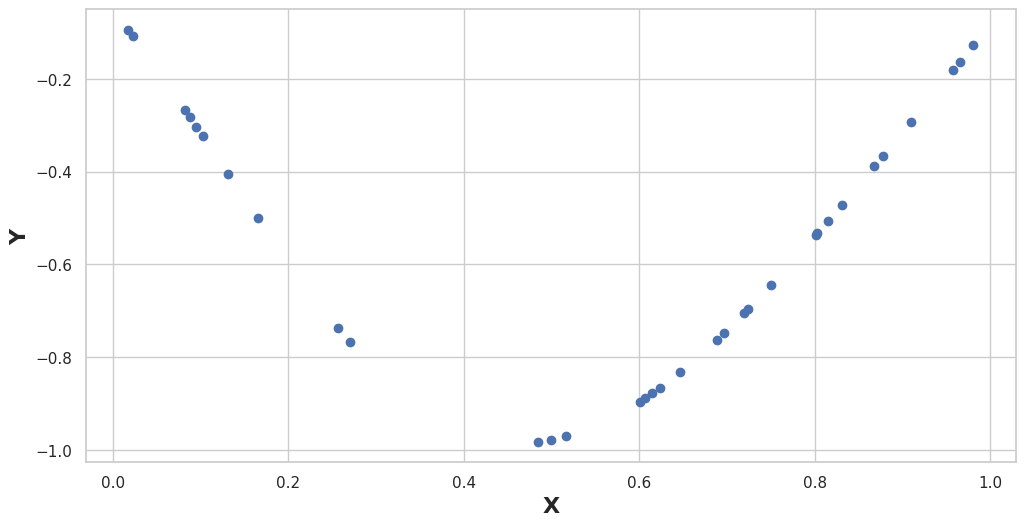

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

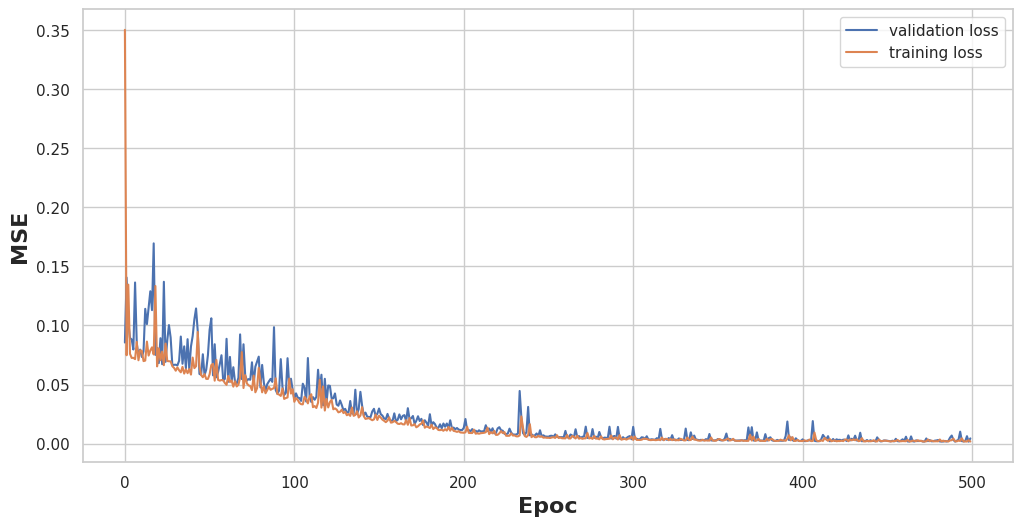

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

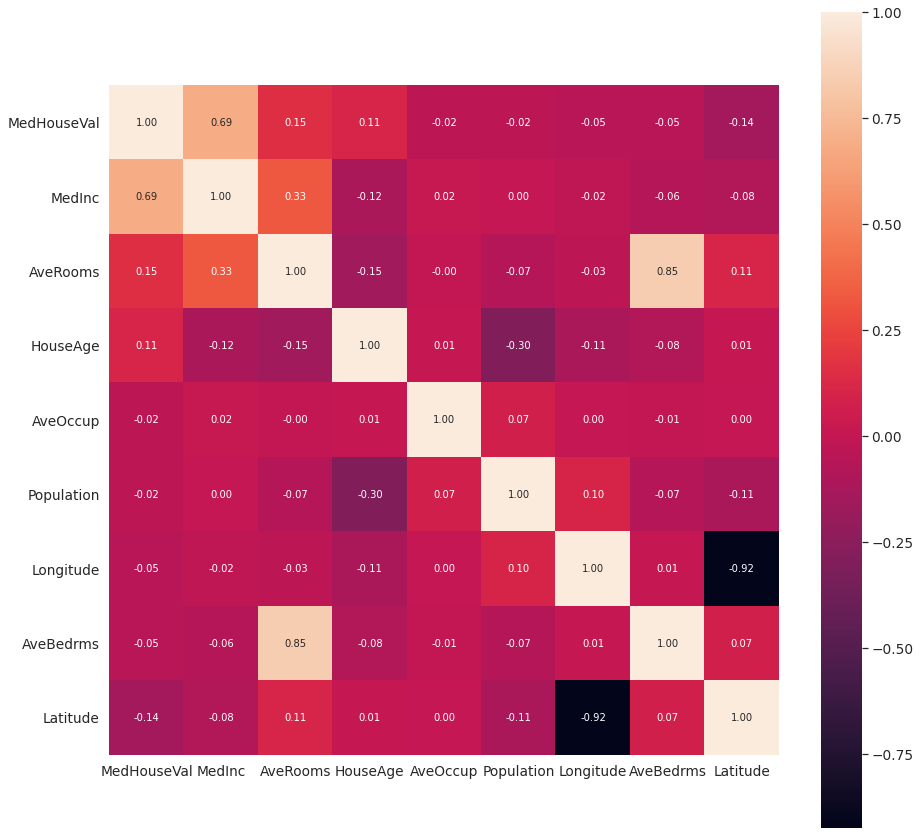

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

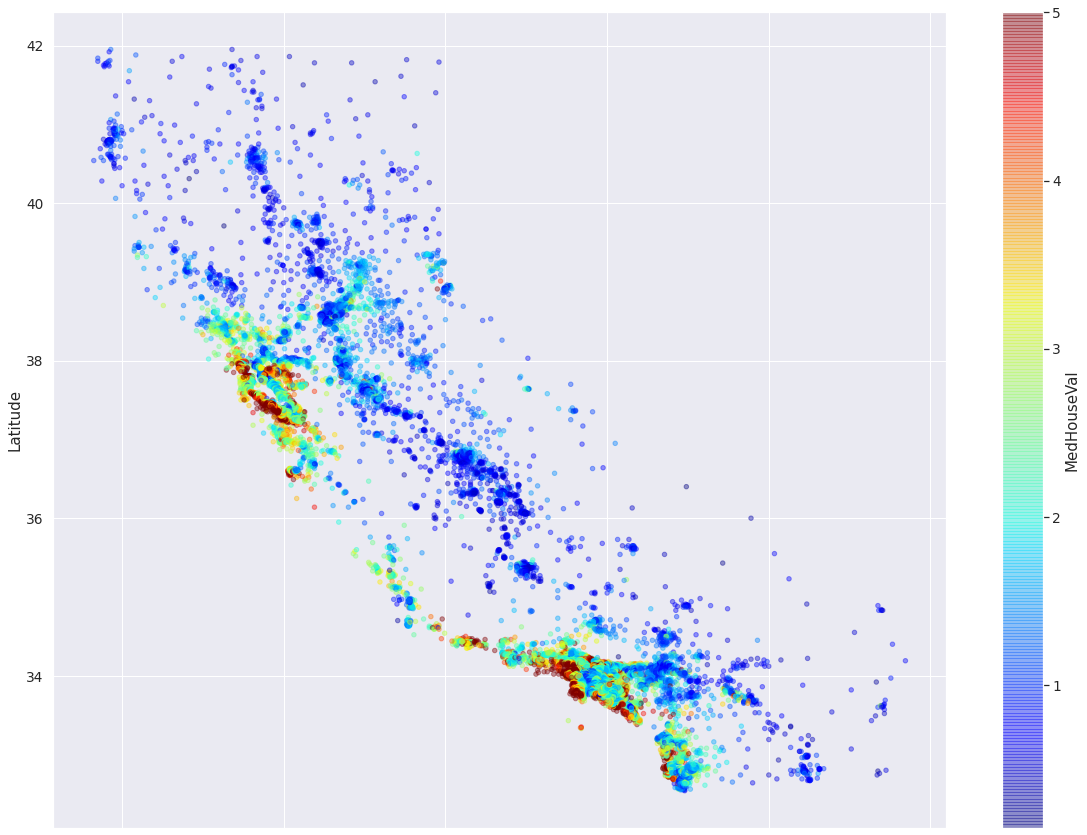

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

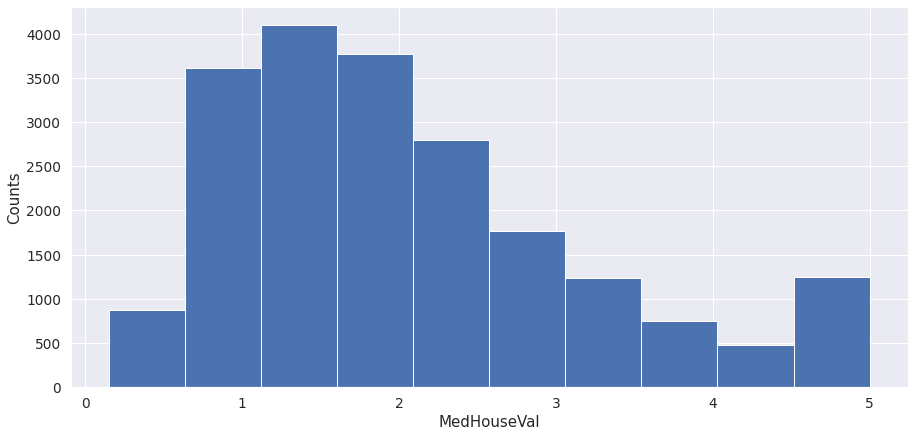

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

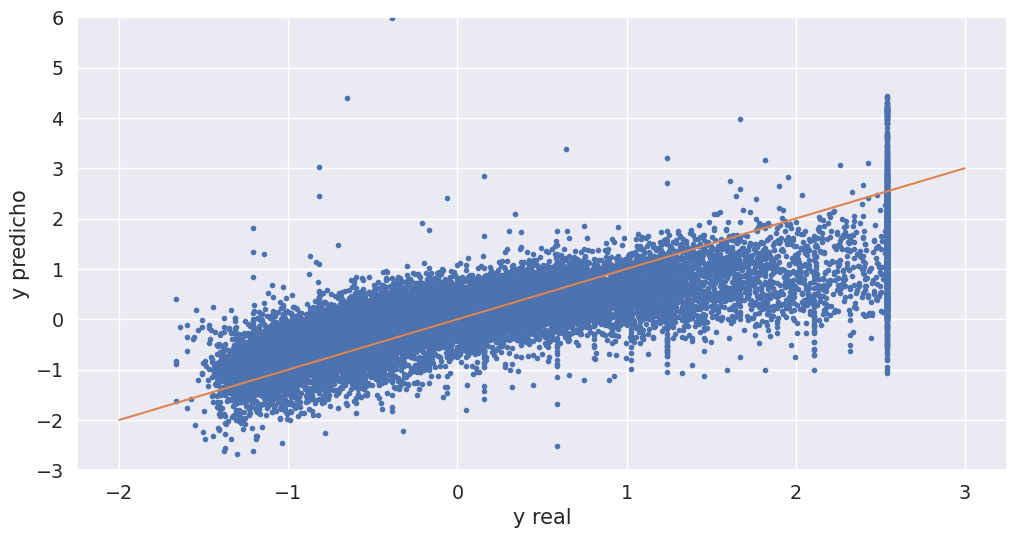

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 13s - loss: 0.6318

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.4779 

 5472/12384 [============>.................] - ETA: 0s - loss: 0.4247

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.3987

10912/12384 [=========================>....] - ETA: 0s - loss: 0.3887

12384/12384 [==============================] - 0s 31us/step - loss: 0.3794 - val_loss: 0.3332


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2818

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.3186

 5536/12384 [============>.................] - ETA: 0s - loss: 0.3178

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.3211

11008/12384 [=========================>....] - ETA: 0s - loss: 0.3192

12384/12384 [==============================] - 0s 27us/step - loss: 0.3215 - val_loss: 0.3145


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1443

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2908

 5504/12384 [============>.................] - ETA: 0s - loss: 0.3102

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.3057

10944/12384 [=========================>....] - ETA: 0s - loss: 0.3102

12384/12384 [==============================] - 0s 27us/step - loss: 0.3051 - val_loss: 0.3047


Epoch 4/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1715

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.3122

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.3013

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.3017

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2974

12384/12384 [==============================] - 0s 28us/step - loss: 0.2970 - val_loss: 0.3039


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1988

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2875

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2917

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2980

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2966

12384/12384 [==============================] - 0s 28us/step - loss: 0.2937 - val_loss: 0.3155


Epoch 6/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1296

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.3023

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2988

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2899

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2870

12384/12384 [==============================] - 0s 27us/step - loss: 0.2893 - val_loss: 0.3093


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2023

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2895

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2878

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2842

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2879

12384/12384 [==============================] - 0s 27us/step - loss: 0.2863 - val_loss: 0.2950


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6118

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2933

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2806

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2872

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2819

12384/12384 [==============================] - 0s 28us/step - loss: 0.2828 - val_loss: 0.2908


Epoch 9/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2185

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2975

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2909

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2849

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2826

12384/12384 [==============================] - 0s 29us/step - loss: 0.2820 - val_loss: 0.2859


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1684

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2852

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2705

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2802

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2781

12384/12384 [==============================] - 0s 28us/step - loss: 0.2792 - val_loss: 0.2854


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1981

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2793

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2765

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2805

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2783

12384/12384 [==============================] - 0s 28us/step - loss: 0.2773 - val_loss: 0.2902


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3517

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2821

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2830

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2807

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2799

12384/12384 [==============================] - 0s 27us/step - loss: 0.2768 - val_loss: 0.2827


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2195

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2725

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2760

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2714

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2748

12384/12384 [==============================] - 0s 28us/step - loss: 0.2764 - val_loss: 0.2824


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4662

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2702

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2693

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2754

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2744

12384/12384 [==============================] - 0s 27us/step - loss: 0.2741 - val_loss: 0.2931


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5415

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2701

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2708

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2693

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2725

12384/12384 [==============================] - 0s 28us/step - loss: 0.2732 - val_loss: 0.2940


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3255

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2674

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2813

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2800

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2690

12384/12384 [==============================] - 0s 28us/step - loss: 0.2724 - val_loss: 0.2881


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6014

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2663

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2710

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2761

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2719

12384/12384 [==============================] - 0s 27us/step - loss: 0.2706 - val_loss: 0.2818


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1479

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2454

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2700

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2678

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2705

12384/12384 [==============================] - 0s 28us/step - loss: 0.2702 - val_loss: 0.2747


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1712

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2464

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2663

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2655

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2690

12384/12384 [==============================] - 0s 27us/step - loss: 0.2696 - val_loss: 0.2875


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5125

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2834

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2797

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2737

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2675

12384/12384 [==============================] - 0s 27us/step - loss: 0.2673 - val_loss: 0.2796


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2575

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2640

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2749

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2756

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2692

12384/12384 [==============================] - 0s 28us/step - loss: 0.2656 - val_loss: 0.2813


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3411

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2644

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2671

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2615

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2622

12384/12384 [==============================] - 0s 27us/step - loss: 0.2644 - val_loss: 0.2833


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1686

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2675

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2727

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2724

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2663

12384/12384 [==============================] - 0s 28us/step - loss: 0.2661 - val_loss: 0.2802


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1590

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2681

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2718

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2722

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2684

12384/12384 [==============================] - 0s 28us/step - loss: 0.2657 - val_loss: 0.2798


Epoch 25/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4144

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2679

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2728

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2741

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2660

12384/12384 [==============================] - 0s 27us/step - loss: 0.2652 - val_loss: 0.2758


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3014

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2562

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2667

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2591

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2593

12384/12384 [==============================] - 0s 27us/step - loss: 0.2636 - val_loss: 0.2778


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1796

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2689

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2701

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2696

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2659

12384/12384 [==============================] - 0s 28us/step - loss: 0.2643 - val_loss: 0.2795


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1442

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2563

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2649

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2676

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2626

12384/12384 [==============================] - 0s 28us/step - loss: 0.2628 - val_loss: 0.2712


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2276

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2559

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2625

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2581

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2588

12384/12384 [==============================] - 0s 28us/step - loss: 0.2630 - val_loss: 0.2734


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2206

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2540

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2665

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2631

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2590

12384/12384 [==============================] - 0s 28us/step - loss: 0.2607 - val_loss: 0.2756


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3827

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2367

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2486

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2615

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2639

12384/12384 [==============================] - 0s 28us/step - loss: 0.2606 - val_loss: 0.3443


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2460

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2535

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2522

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2590

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2615

12384/12384 [==============================] - 0s 28us/step - loss: 0.2603 - val_loss: 0.2854


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3882

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2831

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2657

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2635

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2590

12384/12384 [==============================] - 0s 28us/step - loss: 0.2598 - val_loss: 0.2717


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1323

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2470

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2567

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2565

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2580

12384/12384 [==============================] - 0s 28us/step - loss: 0.2591 - val_loss: 0.2679


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2363

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2608

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2617

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2541

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2577

12384/12384 [==============================] - 0s 28us/step - loss: 0.2588 - val_loss: 0.2668


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3045

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2557

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2525

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2576

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2593

12384/12384 [==============================] - 0s 28us/step - loss: 0.2577 - val_loss: 0.2662


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1886

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2722

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2699

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2605

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2611

12384/12384 [==============================] - 0s 28us/step - loss: 0.2631 - val_loss: 0.2682


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1479

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2698

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2641

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2636

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2568

12384/12384 [==============================] - 0s 28us/step - loss: 0.2584 - val_loss: 0.2729


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1914

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2353

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2491

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2525

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2560

12384/12384 [==============================] - 0s 28us/step - loss: 0.2569 - val_loss: 0.2667


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2066

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2580

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2553

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2552

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2553

12384/12384 [==============================] - 0s 28us/step - loss: 0.2543 - val_loss: 0.2621


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2104

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2642

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2642

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2582

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2555

12384/12384 [==============================] - 0s 28us/step - loss: 0.2543 - val_loss: 0.2632


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1697

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2589

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2409

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2538

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2556

12384/12384 [==============================] - 0s 28us/step - loss: 0.2542 - val_loss: 0.2669


Epoch 43/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1789

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2438

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2442

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2438

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 28us/step - loss: 0.2522 - val_loss: 0.2647


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1721

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2572

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2566

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2538

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2545

12384/12384 [==============================] - 0s 28us/step - loss: 0.2537 - val_loss: 0.2884


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5391

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2624

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2496

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2469

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2501

12384/12384 [==============================] - 0s 27us/step - loss: 0.2513 - val_loss: 0.2602


Epoch 46/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3191

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2517

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2569

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2523

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2502

12384/12384 [==============================] - 0s 28us/step - loss: 0.2522 - val_loss: 0.2624


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2295

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2544

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2507

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2485

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2524

12384/12384 [==============================] - 0s 28us/step - loss: 0.2513 - val_loss: 0.2631


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1554

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2426

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2532

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2480

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2502

12384/12384 [==============================] - 0s 28us/step - loss: 0.2509 - val_loss: 0.2604


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2679

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2599

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2542

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2490

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2500

12384/12384 [==============================] - 0s 28us/step - loss: 0.2511 - val_loss: 0.2649


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1702

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2656

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2652

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2523

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2487

12384/12384 [==============================] - 0s 28us/step - loss: 0.2497 - val_loss: 0.2538


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1951

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2629

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2558

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2515

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2509

12384/12384 [==============================] - 0s 28us/step - loss: 0.2493 - val_loss: 0.2552


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1823

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2673

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2461

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2468

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2486

12384/12384 [==============================] - 0s 27us/step - loss: 0.2503 - val_loss: 0.2575


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2316

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2467

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2559

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2515

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 28us/step - loss: 0.2505 - val_loss: 0.2647


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2459

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2549

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2511

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2498

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2501

12384/12384 [==============================] - 0s 28us/step - loss: 0.2498 - val_loss: 0.2542


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4250

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2326

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2506

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2514

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 27us/step - loss: 0.2493 - val_loss: 0.2583


Epoch 56/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1294

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2561

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2505

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2552

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2518

12384/12384 [==============================] - 0s 28us/step - loss: 0.2485 - val_loss: 0.2551


Epoch 57/100


   32/12384 [..............................] - ETA: 1s - loss: 0.3351

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2402

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2454

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2475

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2484

12384/12384 [==============================] - 0s 28us/step - loss: 0.2477 - val_loss: 0.2700


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1580

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2629

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2496

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2464

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 28us/step - loss: 0.2477 - val_loss: 0.2580


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4078

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2583

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2577

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2542

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 28us/step - loss: 0.2476 - val_loss: 0.2584


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3769

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2422

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2473

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2413

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 28us/step - loss: 0.2483 - val_loss: 0.2576


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1601

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2498

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2526

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2512

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2513

12384/12384 [==============================] - 0s 28us/step - loss: 0.2485 - val_loss: 0.2646


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3009

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2569

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2525

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 28us/step - loss: 0.2473 - val_loss: 0.2560


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1405

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2407

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2432

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2433

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 28us/step - loss: 0.2469 - val_loss: 0.2571


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2619

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2605

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2497

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2488

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 28us/step - loss: 0.2452 - val_loss: 0.2522


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2311

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2615

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2455

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2446

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 28us/step - loss: 0.2444 - val_loss: 0.2557


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3235

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2488

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2409

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2431

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 28us/step - loss: 0.2456 - val_loss: 0.2731


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.7482

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2750

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2552

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2508

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 28us/step - loss: 0.2464 - val_loss: 0.2531


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1185

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2370

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2335

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2441

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 28us/step - loss: 0.2462 - val_loss: 0.2781


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2021

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2432

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2453

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2458

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2498

12384/12384 [==============================] - 0s 27us/step - loss: 0.2463 - val_loss: 0.2526


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2294

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2298

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2350

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2434

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 27us/step - loss: 0.2450 - val_loss: 0.2765


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1481

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2434

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2444

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2414

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 28us/step - loss: 0.2447 - val_loss: 0.3005


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2988

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2291

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2455

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2471

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 28us/step - loss: 0.2438 - val_loss: 0.2726


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1867

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2393

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2393

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 28us/step - loss: 0.2433 - val_loss: 0.2492


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1545

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2485

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2413

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2409

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 27us/step - loss: 0.2446 - val_loss: 0.2621


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3765

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2459

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2418

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2414

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 28us/step - loss: 0.2444 - val_loss: 0.2520


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4296

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2481

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2450

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2405

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 28us/step - loss: 0.2430 - val_loss: 0.2540


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2993

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2576

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2557

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2522

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 28us/step - loss: 0.2444 - val_loss: 0.2629


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1284

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2637

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2480

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2466

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 28us/step - loss: 0.2436 - val_loss: 0.2574


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1444

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2504

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2445

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 28us/step - loss: 0.2453 - val_loss: 0.2519


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1718

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2414

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2380

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 28us/step - loss: 0.2468 - val_loss: 0.2758


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1417

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2732

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2695

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2620

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2577

12384/12384 [==============================] - 0s 28us/step - loss: 0.2537 - val_loss: 0.2658


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2977

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2555

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2464

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2452

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 28us/step - loss: 0.2465 - val_loss: 0.2566


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3636

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2597

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2567

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2469

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 27us/step - loss: 0.2436 - val_loss: 0.2742


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2002

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2281

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2249

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2366

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 28us/step - loss: 0.2452 - val_loss: 0.2551


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1525

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2323

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2455

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2434

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 28us/step - loss: 0.2447 - val_loss: 0.2621


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3238

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2547

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2411

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2391

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 27us/step - loss: 0.2422 - val_loss: 0.2521


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1688

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2489

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2572

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2417

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 28us/step - loss: 0.2427 - val_loss: 0.2603


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2487

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2373

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2529

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2435

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 28us/step - loss: 0.2421 - val_loss: 0.2488


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2202

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2385

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2288

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2357

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 27us/step - loss: 0.2408 - val_loss: 0.2586


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1610

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2344

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2377

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 27us/step - loss: 0.2423 - val_loss: 0.2819


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2657

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2372

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2398

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2477

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 28us/step - loss: 0.2420 - val_loss: 0.2621


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1740

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2593

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2474

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2428

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 27us/step - loss: 0.2420 - val_loss: 0.2532


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3655

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2584

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2524

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2488

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 28us/step - loss: 0.2435 - val_loss: 0.2569


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4494

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2457

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2393

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2403

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 28us/step - loss: 0.2419 - val_loss: 0.2498


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1452

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2526

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2433

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2432

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 28us/step - loss: 0.2407 - val_loss: 0.2483


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1492

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2333

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2514

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2491

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2507

12384/12384 [==============================] - 0s 27us/step - loss: 0.2503 - val_loss: 0.2633


Epoch 97/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3225

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2407

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2523

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2446

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 28us/step - loss: 0.2460 - val_loss: 0.2565


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2044

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2470

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2401

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2467

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 27us/step - loss: 0.2467 - val_loss: 0.2608


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3223

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2460

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2507

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2482

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 28us/step - loss: 0.2454 - val_loss: 0.2662


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3237

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2274

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2360

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2399

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 28us/step - loss: 0.2431 - val_loss: 0.2596


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

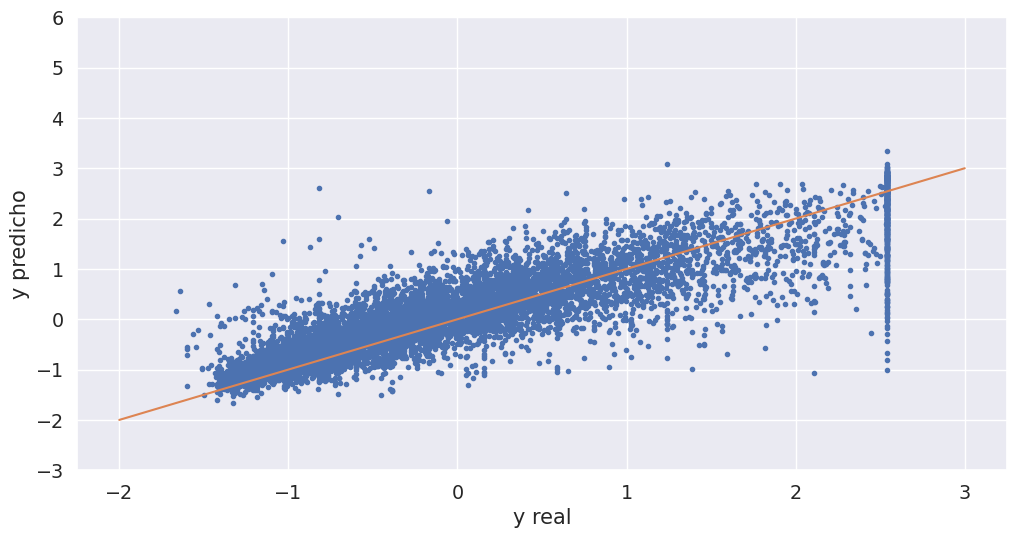

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

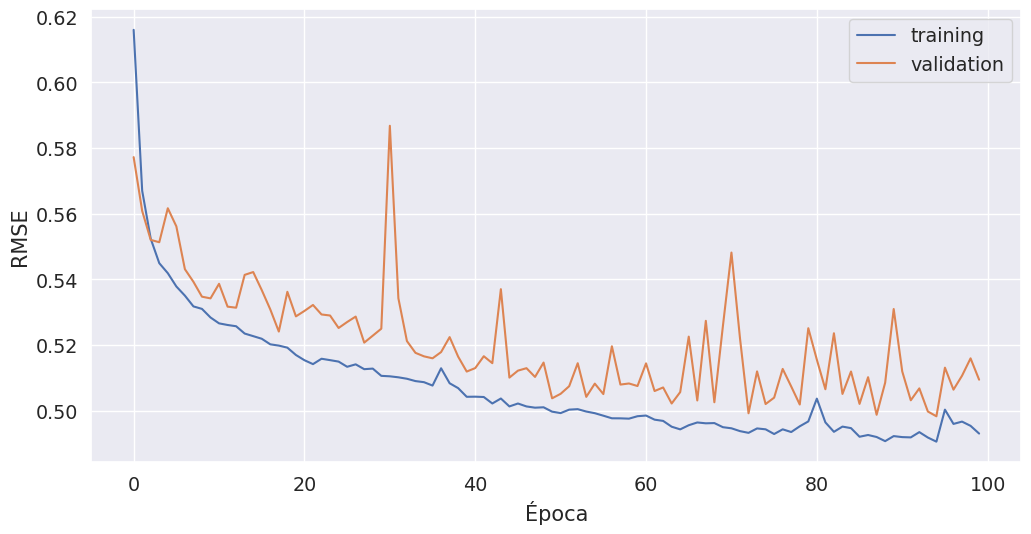

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 13s - loss: 0.6679

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.4269 

 5408/12384 [============>.................] - ETA: 0s - loss: 0.4164

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.3982

10912/12384 [=========================>....] - ETA: 0s - loss: 0.3864

12384/12384 [==============================] - 0s 32us/step - loss: 0.3807 - val_loss: 0.3536


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3617

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.3163

 5568/12384 [============>.................] - ETA: 0s - loss: 0.3201

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.3229

11136/12384 [=========================>....] - ETA: 0s - loss: 0.3236

12384/12384 [==============================] - 0s 28us/step - loss: 0.3261 - val_loss: 0.3310


Epoch 3/200


   32/12384 [..............................] - ETA: 0s - loss: 0.3697



 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2997

 5440/12384 [============>.................] - ETA: 0s - loss: 0.3068

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.3098

10912/12384 [=========================>....] - ETA: 0s - loss: 0.3133

12384/12384 [==============================] - 0s 29us/step - loss: 0.3122 - val_loss: 0.3294


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4314

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2967

 5472/12384 [============>.................] - ETA: 0s - loss: 0.3104

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.3068

11008/12384 [=========================>....] - ETA: 0s - loss: 0.3046

12384/12384 [==============================] - 0s 28us/step - loss: 0.3047 - val_loss: 0.3202


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4332



 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2921

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2927

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2992

11008/12384 [=========================>....] - ETA: 0s - loss: 0.3008

12384/12384 [==============================] - 0s 28us/step - loss: 0.3017 - val_loss: 0.3050


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3369

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2968

 5536/12384 [============>.................] - ETA: 0s - loss: 0.3020

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2995

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2969

12384/12384 [==============================] - 0s 29us/step - loss: 0.2985 - val_loss: 0.3092


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4828

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2834

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2838

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2922

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2948

12384/12384 [==============================] - 0s 28us/step - loss: 0.2963 - val_loss: 0.3020


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2753

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.3016

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2980

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2987

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2974

12384/12384 [==============================] - 0s 28us/step - loss: 0.2945 - val_loss: 0.2962


Epoch 9/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3677

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3103

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2924

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2950

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2924

12384/12384 [==============================] - 0s 28us/step - loss: 0.2903 - val_loss: 0.3031


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2025

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2870

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2895

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2802

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2851

12384/12384 [==============================] - 0s 28us/step - loss: 0.2874 - val_loss: 0.2974


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3807

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2919

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2903

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2858

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2825

12384/12384 [==============================] - 0s 28us/step - loss: 0.2844 - val_loss: 0.2892


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2525

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2950

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2848

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2802

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2826

12384/12384 [==============================] - 0s 28us/step - loss: 0.2811 - val_loss: 0.2906


Epoch 13/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2275

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2546

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2742

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2805

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2797

12384/12384 [==============================] - 0s 28us/step - loss: 0.2793 - val_loss: 0.2929


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1890

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2731

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2752

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2806

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2783

12384/12384 [==============================] - 0s 28us/step - loss: 0.2766 - val_loss: 0.2860


Epoch 15/200


   32/12384 [..............................] - ETA: 0s - loss: 0.4700

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2808

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2713

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2688

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2717

12384/12384 [==============================] - 0s 28us/step - loss: 0.2741 - val_loss: 0.2919


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2602



 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2747

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2701

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2676



10880/12384 [=========================>....] - ETA: 0s - loss: 0.2681

12384/12384 [==============================] - 0s 29us/step - loss: 0.2724 - val_loss: 0.2953


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3137

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2536

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2719

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2720

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2719

12384/12384 [==============================] - 0s 29us/step - loss: 0.2712 - val_loss: 0.2827


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2318

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2773

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2686

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2647

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2708

12384/12384 [==============================] - 0s 29us/step - loss: 0.2716 - val_loss: 0.2796


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2070

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2665

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2706

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2682

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2701

12384/12384 [==============================] - 0s 28us/step - loss: 0.2698 - val_loss: 0.2833


Epoch 20/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2231

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2578

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2608

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2698

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2709

12384/12384 [==============================] - 0s 28us/step - loss: 0.2681 - val_loss: 0.2916


Epoch 21/200


   32/12384 [..............................] - ETA: 0s - loss: 0.5720

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2848

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2634

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2610



10752/12384 [=========================>....] - ETA: 0s - loss: 0.2633

12384/12384 [==============================] - 0s 29us/step - loss: 0.2662 - val_loss: 0.2791


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4104

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2807

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2648

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2680

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2619

12384/12384 [==============================] - 0s 29us/step - loss: 0.2652 - val_loss: 0.2828


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3017

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2661

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2637

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2632

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2650

12384/12384 [==============================] - 0s 29us/step - loss: 0.2641 - val_loss: 0.2764


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3220

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2448

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2592

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2527

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2622

12384/12384 [==============================] - 0s 28us/step - loss: 0.2629 - val_loss: 0.2786


Epoch 25/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2759

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2793

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2605

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2586

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2600

12384/12384 [==============================] - 0s 29us/step - loss: 0.2618 - val_loss: 0.2721


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3561

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2603

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2619

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2596

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2616

12384/12384 [==============================] - 0s 29us/step - loss: 0.2609 - val_loss: 0.2696


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2072

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2520

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2464

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2526

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2550

12384/12384 [==============================] - 0s 28us/step - loss: 0.2595 - val_loss: 0.2706


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3884

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2608

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2611

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2669

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2596

12384/12384 [==============================] - 0s 28us/step - loss: 0.2597 - val_loss: 0.2685


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1157



 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2678

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2639

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2580

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2591

12384/12384 [==============================] - 0s 29us/step - loss: 0.2579 - val_loss: 0.2692


Epoch 30/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1982

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2439

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2500

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2509

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2563

12384/12384 [==============================] - 0s 28us/step - loss: 0.2575 - val_loss: 0.2664


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2165

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2600

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2613

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2568

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2565

12384/12384 [==============================] - 0s 29us/step - loss: 0.2568 - val_loss: 0.2663


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1431

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2468

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2508

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2575

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2558

12384/12384 [==============================] - 0s 29us/step - loss: 0.2550 - val_loss: 0.2722


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2055

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2600

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2657

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2613



10848/12384 [=========================>....] - ETA: 0s - loss: 0.2556

12384/12384 [==============================] - 0s 29us/step - loss: 0.2551 - val_loss: 0.2692


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5387

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2511

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2511

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2560

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2557

12384/12384 [==============================] - 0s 28us/step - loss: 0.2554 - val_loss: 0.2648


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1497

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2686

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2569

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2606

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2550

12384/12384 [==============================] - 0s 28us/step - loss: 0.2531 - val_loss: 0.2758


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2186

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2369

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2434

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2481

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2524

12384/12384 [==============================] - 0s 29us/step - loss: 0.2522 - val_loss: 0.2752


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2441

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2545

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2584

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2538

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2523

12384/12384 [==============================] - 0s 28us/step - loss: 0.2516 - val_loss: 0.2618


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3093

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2558

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2539

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2481

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2494

12384/12384 [==============================] - 0s 29us/step - loss: 0.2511 - val_loss: 0.2630


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1411

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2533

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2498

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2534

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2539

12384/12384 [==============================] - 0s 29us/step - loss: 0.2508 - val_loss: 0.2624


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1715

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2504

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2495

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2477

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 29us/step - loss: 0.2494 - val_loss: 0.2656


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1970

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2338

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2414

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2420

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 28us/step - loss: 0.2489 - val_loss: 0.2672


Epoch 42/200


   32/12384 [..............................] - ETA: 0s - loss: 0.3364

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2642

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2460

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2472

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 28us/step - loss: 0.2492 - val_loss: 0.2594


Epoch 43/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2982

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2480

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2433

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2493

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 29us/step - loss: 0.2485 - val_loss: 0.2637


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5318

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2392

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2384

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2443

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 28us/step - loss: 0.2483 - val_loss: 0.2598


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2188

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2422

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2497

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2450

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 29us/step - loss: 0.2473 - val_loss: 0.2604


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1910

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2361

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2387

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2428



10912/12384 [=========================>....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 29us/step - loss: 0.2473 - val_loss: 0.2585


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1711

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2420

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2462

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2484

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 28us/step - loss: 0.2477 - val_loss: 0.2637


Epoch 48/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2904

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2473

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2413

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2433

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 29us/step - loss: 0.2472 - val_loss: 0.2666


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3308

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2579

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2499

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2513

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2507

12384/12384 [==============================] - 0s 29us/step - loss: 0.2466 - val_loss: 0.2700


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1238

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2518

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2430

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2518

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2482

12384/12384 [==============================] - 0s 28us/step - loss: 0.2466 - val_loss: 0.2564


Epoch 51/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1624

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2431

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2482

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2478

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 29us/step - loss: 0.2453 - val_loss: 0.2721


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2481

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2457

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2430

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2486

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 28us/step - loss: 0.2456 - val_loss: 0.2564


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3436

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2428

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2418

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2469



10912/12384 [=========================>....] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 29us/step - loss: 0.2453 - val_loss: 0.2608


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3909

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2302

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2455

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2450

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 28us/step - loss: 0.2448 - val_loss: 0.2583


Epoch 55/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2595

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2490

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2389

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2450

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2454

12384/12384 [==============================] - 0s 29us/step - loss: 0.2449 - val_loss: 0.2637


Epoch 56/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0943

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2393

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2427

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2448

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 28us/step - loss: 0.2443 - val_loss: 0.2616


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1402

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2354

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2424

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2433



10752/12384 [=========================>....] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 29us/step - loss: 0.2440 - val_loss: 0.2605


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1994

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2682

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2499

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2472

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 28us/step - loss: 0.2439 - val_loss: 0.2576


Epoch 59/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2084

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2425

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2447

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2490

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 29us/step - loss: 0.2440 - val_loss: 0.2593


Epoch 60/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1575

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2318

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2465

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2438

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 28us/step - loss: 0.2427 - val_loss: 0.2684


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1765

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2433

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2372

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2400

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 29us/step - loss: 0.2436 - val_loss: 0.2610


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1747

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2460

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2519

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2479

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 28us/step - loss: 0.2466 - val_loss: 0.2591


Epoch 63/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2109

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2488

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2353

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2399

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 28us/step - loss: 0.2424 - val_loss: 0.2593


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2869



 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2437

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2354

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2430

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 29us/step - loss: 0.2418 - val_loss: 0.2596


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3141

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2401

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2480

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2499

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 29us/step - loss: 0.2427 - val_loss: 0.2562


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3171

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2574

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2579

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2526

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 29us/step - loss: 0.2438 - val_loss: 0.2541


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4096

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2414

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2442

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2394



10848/12384 [=========================>....] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 29us/step - loss: 0.2425 - val_loss: 0.2708


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1287

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2501

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2438

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2454

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 28us/step - loss: 0.2413 - val_loss: 0.2607


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1857

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2382

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2363

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 28us/step - loss: 0.2419 - val_loss: 0.2548


Epoch 70/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1014

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2390

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2304

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2378

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 28us/step - loss: 0.2421 - val_loss: 0.2570


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2090

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2350

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2431



11040/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 28us/step - loss: 0.2416 - val_loss: 0.2535


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1560

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2364

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2427

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2418

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2402



12384/12384 [==============================] - 0s 28us/step - loss: 0.2408 - val_loss: 0.2539


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1606

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2258

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2460

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2399

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 28us/step - loss: 0.2393 - val_loss: 0.2544


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1604

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2533

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2507

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2454

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 29us/step - loss: 0.2402 - val_loss: 0.2542


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2293

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2598

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2460

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2411



11040/12384 [=========================>....] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 28us/step - loss: 0.2420 - val_loss: 0.2554


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1828

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2488

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2445

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2398

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2404



12384/12384 [==============================] - 0s 28us/step - loss: 0.2395 - val_loss: 0.2573


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3618

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2330

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2432

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2397

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 28us/step - loss: 0.2405 - val_loss: 0.2553


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2234

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2234

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2343



10784/12384 [=========================>....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 29us/step - loss: 0.2384 - val_loss: 0.2558


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1948

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2391

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2376

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2358

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 29us/step - loss: 0.2388 - val_loss: 0.2556


Epoch 80/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2814

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2306

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2370

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2404

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 0s 29us/step - loss: 0.2390 - val_loss: 0.2546


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1737

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2539

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2463

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2412

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 29us/step - loss: 0.2376 - val_loss: 0.2636


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1407

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2527

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2489

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2424

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 29us/step - loss: 0.2388 - val_loss: 0.2516


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4248

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2246

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2393

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2432

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 29us/step - loss: 0.2386 - val_loss: 0.2554


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1647

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2425

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2385

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2376

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 28us/step - loss: 0.2373 - val_loss: 0.2521


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2074

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2287

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2414

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2357



10784/12384 [=========================>....] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 29us/step - loss: 0.2364 - val_loss: 0.2530


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2095

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2265

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2299

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2339

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 29us/step - loss: 0.2360 - val_loss: 0.2564


Epoch 87/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1995

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2206

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2278

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2332

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 29us/step - loss: 0.2401 - val_loss: 0.2598


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1616

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2371

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2396

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2407

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 28us/step - loss: 0.2357 - val_loss: 0.2489


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5159

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2450

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2440

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2385

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 29us/step - loss: 0.2356 - val_loss: 0.2572


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0943

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2400

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2321

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2299

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 29us/step - loss: 0.2350 - val_loss: 0.2510


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2410

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2247

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2401

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2363

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 29us/step - loss: 0.2361 - val_loss: 0.2495


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0961

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2312

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2370

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2411

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 28us/step - loss: 0.2352 - val_loss: 0.2473


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2579

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2300

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2286

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2253

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2322



12384/12384 [==============================] - 0s 28us/step - loss: 0.2348 - val_loss: 0.2487


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1618

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2315

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2359

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2314

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 29us/step - loss: 0.2334 - val_loss: 0.2485


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0766

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2160

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2258

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2324

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 29us/step - loss: 0.2339 - val_loss: 0.2546


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2222

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2275

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2347

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2326

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 29us/step - loss: 0.2346 - val_loss: 0.2491


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2088

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2468

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2389

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2328

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 28us/step - loss: 0.2347 - val_loss: 0.2607


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2003

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2323

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2343

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2319

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 28us/step - loss: 0.2339 - val_loss: 0.2460


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4349



 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2539

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2369

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2357

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 29us/step - loss: 0.2346 - val_loss: 0.2446


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1037

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2239

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2328

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2295



10976/12384 [=========================>....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 28us/step - loss: 0.2336 - val_loss: 0.2458


Epoch 101/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1890

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2461

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2404

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 29us/step - loss: 0.2339 - val_loss: 0.2477


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2497

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2384

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2364

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2341

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 29us/step - loss: 0.2325 - val_loss: 0.2557


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2268

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2542

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2417

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2355

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 28us/step - loss: 0.2330 - val_loss: 0.2455


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5012

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2375

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2322

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2359



10976/12384 [=========================>....] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 28us/step - loss: 0.2331 - val_loss: 0.2470


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2925

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2279

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2310

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2383

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 28us/step - loss: 0.2322 - val_loss: 0.2466


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2519



 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2562

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2329

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2356

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 29us/step - loss: 0.2319 - val_loss: 0.2557


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1455

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2213

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2219

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2297

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 28us/step - loss: 0.2329 - val_loss: 0.2472


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1684



 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2377

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2318

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2293

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 29us/step - loss: 0.2324 - val_loss: 0.2467


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2920

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2380

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2363

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2355

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2351



12384/12384 [==============================] - 0s 28us/step - loss: 0.2331 - val_loss: 0.2447


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2116

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2172

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2267

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2309

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 28us/step - loss: 0.2326 - val_loss: 0.2503


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2037

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2381

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2318

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2340

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 29us/step - loss: 0.2323 - val_loss: 0.2437


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2637

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2296

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2308

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2313

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 28us/step - loss: 0.2322 - val_loss: 0.2482


Epoch 113/200


   32/12384 [..............................] - ETA: 0s - loss: 0.4081



 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2297

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2344

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2272

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 29us/step - loss: 0.2321 - val_loss: 0.2484


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2206

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2234

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2271

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2309

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 29us/step - loss: 0.2322 - val_loss: 0.2534


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2018

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2278

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2309

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2298

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 28us/step - loss: 0.2333 - val_loss: 0.2469


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2994

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2407

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2320

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2371

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 29us/step - loss: 0.2315 - val_loss: 0.2631


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2680

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2387

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2382

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2310

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 29us/step - loss: 0.2313 - val_loss: 0.2463


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1689

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2212

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2286

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2277

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 29us/step - loss: 0.2311 - val_loss: 0.2562


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3416

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2225

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2310

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2288



10912/12384 [=========================>....] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 28us/step - loss: 0.2309 - val_loss: 0.2441


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1734

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2485

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2357

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 29us/step - loss: 0.2310 - val_loss: 0.2447


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2080

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2409

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2401

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2379

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 28us/step - loss: 0.2319 - val_loss: 0.2585


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3989

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2306

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2190

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2263

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 28us/step - loss: 0.2306 - val_loss: 0.2505


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1218



 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2297

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2313

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2318

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 29us/step - loss: 0.2311 - val_loss: 0.2455


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1762

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2353

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2335

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2383

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 28us/step - loss: 0.2311 - val_loss: 0.2477


Epoch 125/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1485

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2218

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2253

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2275

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 29us/step - loss: 0.2304 - val_loss: 0.2508


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1114

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2300

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2319

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2302



10976/12384 [=========================>....] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 28us/step - loss: 0.2308 - val_loss: 0.2438


Epoch 127/200


   32/12384 [..............................] - ETA: 0s - loss: 0.3514

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2387

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2317

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2278

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2255

12384/12384 [==============================] - 0s 29us/step - loss: 0.2303 - val_loss: 0.2553


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1647

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2199

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2239

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2276

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 28us/step - loss: 0.2303 - val_loss: 0.2471


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2395

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2328

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2260

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2212



10848/12384 [=========================>....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 29us/step - loss: 0.2292 - val_loss: 0.2411


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2461

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2277

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2262

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2312

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 29us/step - loss: 0.2301 - val_loss: 0.2459


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1873

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2329

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2263

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2279

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 28us/step - loss: 0.2299 - val_loss: 0.2478


Epoch 132/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2734

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2304

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2211

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2281

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2300



12384/12384 [==============================] - 0s 28us/step - loss: 0.2296 - val_loss: 0.2436


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2717

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2313

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2273

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2243

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2271

12384/12384 [==============================] - 0s 29us/step - loss: 0.2309 - val_loss: 0.2476


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1942

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2322

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2336

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2336

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2338



12384/12384 [==============================] - 0s 28us/step - loss: 0.2307 - val_loss: 0.2420


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1587

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2444

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2344

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2350

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 28us/step - loss: 0.2294 - val_loss: 0.2480


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0967

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2294

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2246

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2252

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2284

12384/12384 [==============================] - 0s 28us/step - loss: 0.2288 - val_loss: 0.2444


Epoch 137/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2003

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2315

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2325

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 28us/step - loss: 0.2297 - val_loss: 0.2486


Epoch 138/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2593

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2193

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2236

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2286

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 29us/step - loss: 0.2296 - val_loss: 0.2487


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1170

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2241

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2225

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2251

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2272

12384/12384 [==============================] - 0s 29us/step - loss: 0.2299 - val_loss: 0.2437


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1864

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2259

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2209

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2217

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 28us/step - loss: 0.2292 - val_loss: 0.2426


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3867

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2254

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2294

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2303

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 28us/step - loss: 0.2288 - val_loss: 0.2533


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3864

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2423

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2344

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2284

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 28us/step - loss: 0.2289 - val_loss: 0.2434


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5811

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2290

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2313

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2282



10912/12384 [=========================>....] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 28us/step - loss: 0.2285 - val_loss: 0.2516


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2058

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2295

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2281

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2335

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 29us/step - loss: 0.2292 - val_loss: 0.2408


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2386

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2316

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2385

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2332

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 29us/step - loss: 0.2279 - val_loss: 0.2493


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4537

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2181

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2325

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2275

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2309



12384/12384 [==============================] - 0s 28us/step - loss: 0.2284 - val_loss: 0.2489


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2197

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2170

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2208

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2180

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 0s 28us/step - loss: 0.2277 - val_loss: 0.2490


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1511

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2283

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2269

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2279



10944/12384 [=========================>....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 28us/step - loss: 0.2289 - val_loss: 0.2514


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3558

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2134

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2275

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2273

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 28us/step - loss: 0.2287 - val_loss: 0.2432


Epoch 150/200


   32/12384 [..............................] - ETA: 0s - loss: 0.4689

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2230

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2220

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2181

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 29us/step - loss: 0.2278 - val_loss: 0.2423


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2133

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2302

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2296

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2269

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 29us/step - loss: 0.2290 - val_loss: 0.2422


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2527

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2302

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2224

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2221

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 29us/step - loss: 0.2288 - val_loss: 0.2459


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1252

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2332

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2225

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2254

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 29us/step - loss: 0.2287 - val_loss: 0.2505


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1772

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2164

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2232

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2236

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2241



12384/12384 [==============================] - 0s 28us/step - loss: 0.2275 - val_loss: 0.2452


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1288

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2342

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2280

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2309

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 28us/step - loss: 0.2279 - val_loss: 0.2488


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2227

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2501

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2344

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2286

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2282

12384/12384 [==============================] - 0s 28us/step - loss: 0.2293 - val_loss: 0.2414


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1478

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2286

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2237

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2297

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 27us/step - loss: 0.2287 - val_loss: 0.2422


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1703

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2356

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2200

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2215

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 27us/step - loss: 0.2293 - val_loss: 0.2431


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0924

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2098

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2234

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2252

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 27us/step - loss: 0.2295 - val_loss: 0.2549


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2729

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2153

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2220

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2294

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 27us/step - loss: 0.2292 - val_loss: 0.2455


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2419

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2222

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2190

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2303

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 27us/step - loss: 0.2294 - val_loss: 0.2674


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3669

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2222

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2278

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2303

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 27us/step - loss: 0.2287 - val_loss: 0.2415


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3381

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2349

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2269

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2301

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2251

12384/12384 [==============================] - 0s 27us/step - loss: 0.2276 - val_loss: 0.2470


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1914

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2323

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2247

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2238

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 28us/step - loss: 0.2280 - val_loss: 0.2442


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2613

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2297

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2310

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2241

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 28us/step - loss: 0.2272 - val_loss: 0.2404


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1939

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2184

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2304

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2286

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 27us/step - loss: 0.2308 - val_loss: 0.2404


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1662

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2288

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2288

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2305

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 27us/step - loss: 0.2271 - val_loss: 0.2569


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1081

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2203

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2179

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2286

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 28us/step - loss: 0.2272 - val_loss: 0.2441


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0718

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2320

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2242

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2246

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 27us/step - loss: 0.2268 - val_loss: 0.2403


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0803

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2058

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2173

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2255

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2253

12384/12384 [==============================] - 0s 28us/step - loss: 0.2280 - val_loss: 0.2398


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2590

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2274

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2271

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2322

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 27us/step - loss: 0.2283 - val_loss: 0.2410


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1238

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2139

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2186

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2276

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 27us/step - loss: 0.2275 - val_loss: 0.2422


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2612

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2358

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2340

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 28us/step - loss: 0.2266 - val_loss: 0.2479


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2351

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2330

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2311

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2294

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 27us/step - loss: 0.2271 - val_loss: 0.2410


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1065

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2217

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2222

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2204

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2251

12384/12384 [==============================] - 0s 27us/step - loss: 0.2278 - val_loss: 0.2414


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1271

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2407

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2374

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2340

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 28us/step - loss: 0.2275 - val_loss: 0.2420


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2252

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2368

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2311

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2284

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 27us/step - loss: 0.2269 - val_loss: 0.2459


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1678

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2305

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2274

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2216

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 27us/step - loss: 0.2262 - val_loss: 0.2441


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1434

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2420

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2293

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2300

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2257

12384/12384 [==============================] - 0s 27us/step - loss: 0.2264 - val_loss: 0.2435


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1890

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2332

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2200

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2275

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 27us/step - loss: 0.2269 - val_loss: 0.2491


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3524

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2282

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2293

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 27us/step - loss: 0.2274 - val_loss: 0.2483


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1564

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2097

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2222

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2245

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 27us/step - loss: 0.2276 - val_loss: 0.2452


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1324

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2414

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2293

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2245

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 0s 27us/step - loss: 0.2276 - val_loss: 0.2428


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2246

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2131

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2130

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2220

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 27us/step - loss: 0.2268 - val_loss: 0.2445


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2504

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2350

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2312

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2289

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 27us/step - loss: 0.2262 - val_loss: 0.2430


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2133

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2389

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2328

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2290

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 28us/step - loss: 0.2260 - val_loss: 0.2490


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1094

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2340

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2286

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2288

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 27us/step - loss: 0.2258 - val_loss: 0.2441


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1385

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2345

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2310

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2289

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 27us/step - loss: 0.2269 - val_loss: 0.2397


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1941

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2190

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2180

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2235

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2267

12384/12384 [==============================] - 0s 27us/step - loss: 0.2272 - val_loss: 0.2419


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2560

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2165

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2157

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2209

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 0s 27us/step - loss: 0.2268 - val_loss: 0.2572


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1782

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2275

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2357

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2278

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 0s 27us/step - loss: 0.2249 - val_loss: 0.2422


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3334

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2229

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2223

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2207

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2227

12384/12384 [==============================] - 0s 28us/step - loss: 0.2258 - val_loss: 0.2404


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1178

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2391

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2404

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2348

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 27us/step - loss: 0.2271 - val_loss: 0.2459


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2297

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2039

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2214

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2251

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 27us/step - loss: 0.2247 - val_loss: 0.2404


Epoch 195/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2758

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2308

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2322

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2261

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 27us/step - loss: 0.2253 - val_loss: 0.2402


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1195

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2241

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2196

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2203

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2206

12384/12384 [==============================] - 0s 27us/step - loss: 0.2256 - val_loss: 0.2423


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3406

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2300

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2310

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2322

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2258

12384/12384 [==============================] - 0s 27us/step - loss: 0.2253 - val_loss: 0.2402


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1965

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2359

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2291

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2296

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 27us/step - loss: 0.2275 - val_loss: 0.2396


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1111

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2280

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2288

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2281

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 27us/step - loss: 0.2265 - val_loss: 0.2407


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0855

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2506

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2387

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2308

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 28us/step - loss: 0.2261 - val_loss: 0.2405


Text(0.5, 0, 'Época')

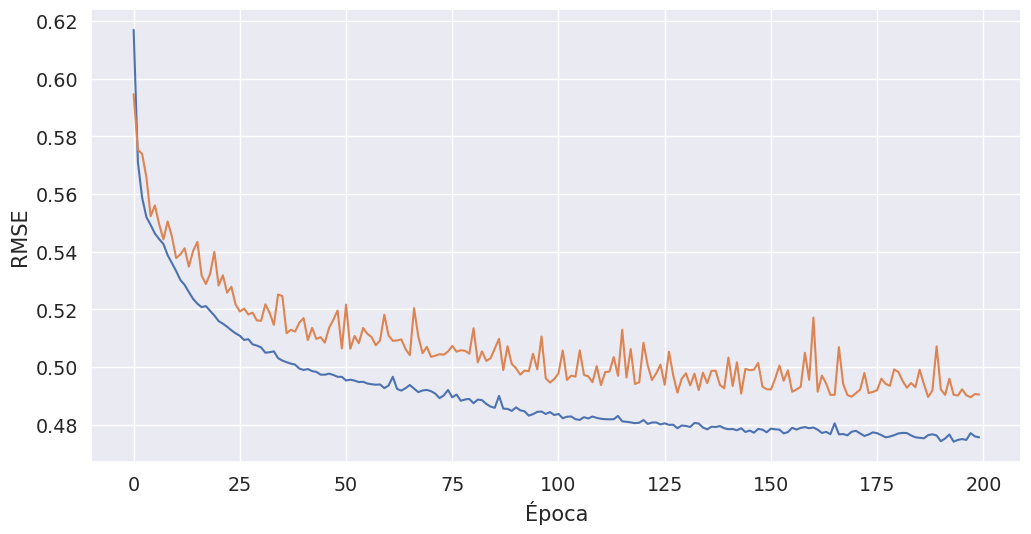

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 22s - loss: 2.0531

 2304/12384 [====>.........................] - ETA: 0s - loss: 1.7044 

 4704/12384 [==========>...................] - ETA: 0s - loss: 1.4323

 7136/12384 [================>.............] - ETA: 0s - loss: 1.2318

 9600/12384 [======================>.......] - ETA: 0s - loss: 1.0992

11968/12384 [===========================>..] - ETA: 0s - loss: 1.0035

12384/12384 [==============================] - 0s 37us/step - loss: 0.9873 - val_loss: 0.5455


Epoch 2/200


   32/12384 [..............................] - ETA: 0s - loss: 0.3622

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.5338

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.4867

 7296/12384 [================>.............] - ETA: 0s - loss: 0.4752

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.4514

12224/12384 [============================>.] - ETA: 0s - loss: 0.4410

12384/12384 [==============================] - 0s 30us/step - loss: 0.4395 - val_loss: 0.3781


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.9416

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3762

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.3634

 7296/12384 [================>.............] - ETA: 0s - loss: 0.3472

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.3445

12160/12384 [============================>.] - ETA: 0s - loss: 0.3457

12384/12384 [==============================] - 0s 30us/step - loss: 0.3460 - val_loss: 0.3391


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5431

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3281

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3232

 7424/12384 [================>.............] - ETA: 0s - loss: 0.3302

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.3218

12288/12384 [============================>.] - ETA: 0s - loss: 0.3218

12384/12384 [==============================] - 0s 30us/step - loss: 0.3214 - val_loss: 0.3258


Epoch 5/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2674

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3445

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3272

 7328/12384 [================>.............] - ETA: 0s - loss: 0.3207

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.3216

12160/12384 [============================>.] - ETA: 0s - loss: 0.3110

12384/12384 [==============================] - 0s 30us/step - loss: 0.3103 - val_loss: 0.3187


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1947

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3092

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3023

 7424/12384 [================>.............] - ETA: 0s - loss: 0.3044

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.3085

12384/12384 [==============================] - 0s 29us/step - loss: 0.3039 - val_loss: 0.3126


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2252

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.3078

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2914

 7456/12384 [=================>............] - ETA: 0s - loss: 0.3031

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2978

12320/12384 [============================>.] - ETA: 0s - loss: 0.2991

12384/12384 [==============================] - 0s 30us/step - loss: 0.2992 - val_loss: 0.3096


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1408

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3036

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2892

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2987

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2960



12224/12384 [============================>.] - ETA: 0s - loss: 0.2953

12384/12384 [==============================] - 0s 30us/step - loss: 0.2946 - val_loss: 0.3064


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1629

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2915

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2975

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2851

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2864

12192/12384 [============================>.] - ETA: 0s - loss: 0.2929

12384/12384 [==============================] - 0s 30us/step - loss: 0.2917 - val_loss: 0.3027


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4451

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2686

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2789

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2833

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2901

12352/12384 [============================>.] - ETA: 0s - loss: 0.2894

12384/12384 [==============================] - 0s 30us/step - loss: 0.2890 - val_loss: 0.3002


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2554

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2917

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2890

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2872

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2850

12256/12384 [============================>.] - ETA: 0s - loss: 0.2864

12384/12384 [==============================] - 0s 29us/step - loss: 0.2864 - val_loss: 0.2982


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1506

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2818

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2869

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2887

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2850

12384/12384 [==============================] - 0s 29us/step - loss: 0.2840 - val_loss: 0.2951


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4783

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2768

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2929

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2964

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2882

12256/12384 [============================>.] - ETA: 0s - loss: 0.2837

12384/12384 [==============================] - 0s 30us/step - loss: 0.2821 - val_loss: 0.2936


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2184

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2738

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2860

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2795

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2807

12256/12384 [============================>.] - ETA: 0s - loss: 0.2801

12384/12384 [==============================] - 0s 30us/step - loss: 0.2801 - val_loss: 0.2922


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2886

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2712

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2658

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2699

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2710

12384/12384 [==============================] - 0s 29us/step - loss: 0.2781 - val_loss: 0.2903


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2154

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2687

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2820

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2755

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2766



12192/12384 [============================>.] - ETA: 0s - loss: 0.2761

12384/12384 [==============================] - 0s 30us/step - loss: 0.2772 - val_loss: 0.2895


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1810

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2643

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2804

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2764

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2732

12064/12384 [============================>.] - ETA: 0s - loss: 0.2762

12384/12384 [==============================] - 0s 30us/step - loss: 0.2749 - val_loss: 0.2886


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2919

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2712

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2685

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2688

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2690

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2723

12384/12384 [==============================] - 0s 30us/step - loss: 0.2737 - val_loss: 0.2872


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2757

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2694

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2701

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2718

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2705

12224/12384 [============================>.] - ETA: 0s - loss: 0.2728

12384/12384 [==============================] - 0s 30us/step - loss: 0.2729 - val_loss: 0.2855


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3295

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2470

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2601

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2603

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2649

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2701

12384/12384 [==============================] - 0s 31us/step - loss: 0.2713 - val_loss: 0.2839


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1889

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2680

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2677

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2724

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2665



12128/12384 [============================>.] - ETA: 0s - loss: 0.2706

12384/12384 [==============================] - 0s 30us/step - loss: 0.2706 - val_loss: 0.2829


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1233

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2657

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2756

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2727

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2712

12320/12384 [============================>.] - ETA: 0s - loss: 0.2700

12384/12384 [==============================] - 0s 29us/step - loss: 0.2694 - val_loss: 0.2821


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2096

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2723

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2771

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2712

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2731

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2692

12384/12384 [==============================] - 0s 30us/step - loss: 0.2685 - val_loss: 0.2832


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2308

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2620

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2604

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2620

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2607

12256/12384 [============================>.] - ETA: 0s - loss: 0.2671

12384/12384 [==============================] - 0s 30us/step - loss: 0.2677 - val_loss: 0.2809


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2047

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2660

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2677

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2718

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2680



12128/12384 [============================>.] - ETA: 0s - loss: 0.2678

12384/12384 [==============================] - 0s 30us/step - loss: 0.2672 - val_loss: 0.2799


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2986

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2717

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2704

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2649

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2700

12192/12384 [============================>.] - ETA: 0s - loss: 0.2670

12384/12384 [==============================] - 0s 30us/step - loss: 0.2667 - val_loss: 0.2801


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2297

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2426

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2596

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2648

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2610

12256/12384 [============================>.] - ETA: 0s - loss: 0.2666

12384/12384 [==============================] - 0s 30us/step - loss: 0.2660 - val_loss: 0.2788


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1329

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2628

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2714

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2684

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2650

12192/12384 [============================>.] - ETA: 0s - loss: 0.2650

12384/12384 [==============================] - 0s 30us/step - loss: 0.2646 - val_loss: 0.2781


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2511

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2504

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2519

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2514

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2611

12384/12384 [==============================] - 0s 29us/step - loss: 0.2642 - val_loss: 0.2805


Epoch 30/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2496

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2705

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2734

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2660

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2654

12384/12384 [==============================] - 0s 29us/step - loss: 0.2643 - val_loss: 0.2796


Epoch 31/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5006

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2526

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2673

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2663

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2649

12224/12384 [============================>.] - ETA: 0s - loss: 0.2640

12384/12384 [==============================] - 0s 30us/step - loss: 0.2636 - val_loss: 0.2791


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4158

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2493

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2531

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2619

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2634

12160/12384 [============================>.] - ETA: 0s - loss: 0.2634

12384/12384 [==============================] - 0s 30us/step - loss: 0.2629 - val_loss: 0.2756


Epoch 33/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2261

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2680

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2629

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2649

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2667

12320/12384 [============================>.] - ETA: 0s - loss: 0.2629

12384/12384 [==============================] - 0s 30us/step - loss: 0.2625 - val_loss: 0.2758


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2046

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2588

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2650

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2644

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2633

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 30us/step - loss: 0.2623 - val_loss: 0.2751


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1790

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2617

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2744

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2633

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2628



12096/12384 [============================>.] - ETA: 0s - loss: 0.2621

12384/12384 [==============================] - 0s 30us/step - loss: 0.2619 - val_loss: 0.2752


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3659

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2622

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2555

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2623

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2624

12288/12384 [============================>.] - ETA: 0s - loss: 0.2622

12384/12384 [==============================] - 0s 29us/step - loss: 0.2612 - val_loss: 0.2733


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1269

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2485

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2619

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2647

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2631

12256/12384 [============================>.] - ETA: 0s - loss: 0.2597

12384/12384 [==============================] - 0s 30us/step - loss: 0.2604 - val_loss: 0.2735


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3300

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2796

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2592

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2581

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2549

12288/12384 [============================>.] - ETA: 0s - loss: 0.2599

12384/12384 [==============================] - 0s 29us/step - loss: 0.2598 - val_loss: 0.2753


Epoch 39/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5270

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2556

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2719

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2625

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2603

12288/12384 [============================>.] - ETA: 0s - loss: 0.2599

12384/12384 [==============================] - 0s 29us/step - loss: 0.2598 - val_loss: 0.2731


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2483

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2513

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2539

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2532

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2572

12256/12384 [============================>.] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 30us/step - loss: 0.2595 - val_loss: 0.2718


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0853

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2608

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2592

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2624

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2625

12352/12384 [============================>.] - ETA: 0s - loss: 0.2589

12384/12384 [==============================] - 0s 30us/step - loss: 0.2589 - val_loss: 0.2709


Epoch 42/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2704

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2689

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2665

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2641

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2586

12256/12384 [============================>.] - ETA: 0s - loss: 0.2578

12384/12384 [==============================] - 0s 30us/step - loss: 0.2581 - val_loss: 0.2708


Epoch 43/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3850

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2626

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2636

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2656

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2600

12128/12384 [============================>.] - ETA: 0s - loss: 0.2577

12384/12384 [==============================] - 0s 30us/step - loss: 0.2572 - val_loss: 0.2713


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2586

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2833

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2788

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2671

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2601

12224/12384 [============================>.] - ETA: 0s - loss: 0.2567

12384/12384 [==============================] - 0s 30us/step - loss: 0.2572 - val_loss: 0.2701


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1534

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2562

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2571

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2565

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2546

12288/12384 [============================>.] - ETA: 0s - loss: 0.2558

12384/12384 [==============================] - 0s 30us/step - loss: 0.2560 - val_loss: 0.2708


Epoch 46/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2626

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2681

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2622

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2558

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2557

12192/12384 [============================>.] - ETA: 0s - loss: 0.2553

12384/12384 [==============================] - 0s 30us/step - loss: 0.2556 - val_loss: 0.2673


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2660

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2663

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2610

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2622

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2578

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2531

12384/12384 [==============================] - 0s 31us/step - loss: 0.2541 - val_loss: 0.2665


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1519

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2463

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2482

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2513

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2553

12160/12384 [============================>.] - ETA: 0s - loss: 0.2540

12384/12384 [==============================] - 0s 30us/step - loss: 0.2536 - val_loss: 0.2652


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2519

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2489

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2520

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2554

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2536

12160/12384 [============================>.] - ETA: 0s - loss: 0.2526

12384/12384 [==============================] - 0s 30us/step - loss: 0.2528 - val_loss: 0.2653


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1919

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2366

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2565

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2554

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2529

12256/12384 [============================>.] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 30us/step - loss: 0.2515 - val_loss: 0.2633


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5167

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2767

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2562

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2565

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2550

12192/12384 [============================>.] - ETA: 0s - loss: 0.2513

12384/12384 [==============================] - 0s 30us/step - loss: 0.2508 - val_loss: 0.2629


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1509

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2539

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2557

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2548

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2530



12192/12384 [============================>.] - ETA: 0s - loss: 0.2503

12384/12384 [==============================] - 0s 30us/step - loss: 0.2499 - val_loss: 0.2616


Epoch 53/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0952

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2378

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2426

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2507

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2517

12320/12384 [============================>.] - ETA: 0s - loss: 0.2487

12384/12384 [==============================] - 0s 30us/step - loss: 0.2487 - val_loss: 0.2600


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3528

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2626

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2413

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2441

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2469

12256/12384 [============================>.] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 30us/step - loss: 0.2478 - val_loss: 0.2600


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1798

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2475

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2503

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2443

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2482

12288/12384 [============================>.] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 30us/step - loss: 0.2466 - val_loss: 0.2610


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1561

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2509

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2462

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2488

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2453

12320/12384 [============================>.] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 30us/step - loss: 0.2457 - val_loss: 0.2579


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2575

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2386

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2409

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2434

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2451



12064/12384 [============================>.] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 30us/step - loss: 0.2448 - val_loss: 0.2568


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2784

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2413

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2389

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2436

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2435

12192/12384 [============================>.] - ETA: 0s - loss: 0.2452

12384/12384 [==============================] - 0s 30us/step - loss: 0.2441 - val_loss: 0.2560


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1304

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2318

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2368

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2388

12288/12384 [============================>.] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 30us/step - loss: 0.2428 - val_loss: 0.2563


Epoch 60/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4555

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2316

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2406

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2424

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2403

12192/12384 [============================>.] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 30us/step - loss: 0.2426 - val_loss: 0.2542


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2918

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2401

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2358

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2374

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2410

12032/12384 [============================>.] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 30us/step - loss: 0.2416 - val_loss: 0.2550


Epoch 62/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2688

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2617

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2488

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2452

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2426

12256/12384 [============================>.] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 30us/step - loss: 0.2411 - val_loss: 0.2548


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2573

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2587

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2462

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2452

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2429

12224/12384 [============================>.] - ETA: 0s - loss: 0.2411

12384/12384 [==============================] - 0s 30us/step - loss: 0.2410 - val_loss: 0.2526


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0999

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2334

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2424

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2424

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2419

12256/12384 [============================>.] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 30us/step - loss: 0.2402 - val_loss: 0.2521


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2104

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2343

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2396

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2463

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2424

12224/12384 [============================>.] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 30us/step - loss: 0.2398 - val_loss: 0.2524


Epoch 66/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1495

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2434

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2421

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2421

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2404



12192/12384 [============================>.] - ETA: 0s - loss: 0.2396

12384/12384 [==============================] - 0s 30us/step - loss: 0.2394 - val_loss: 0.2506


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4878

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2644

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2515

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2514

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2441

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 30us/step - loss: 0.2386 - val_loss: 0.2508


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1795

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2297

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2268

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2327

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2327

12064/12384 [============================>.] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 30us/step - loss: 0.2381 - val_loss: 0.2511


Epoch 69/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4214

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2275

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2301

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2325

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2358

12192/12384 [============================>.] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 30us/step - loss: 0.2383 - val_loss: 0.2503


Epoch 70/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1718

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2483

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2429

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2341

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2352

12064/12384 [============================>.] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 30us/step - loss: 0.2377 - val_loss: 0.2504


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2670

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2250

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2325

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2377

12096/12384 [============================>.] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 30us/step - loss: 0.2375 - val_loss: 0.2497


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2251

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2463

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2445

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2369

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2391



12160/12384 [============================>.] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 30us/step - loss: 0.2377 - val_loss: 0.2493


Epoch 73/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2141

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2379

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2314

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2334

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2342



12256/12384 [============================>.] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 30us/step - loss: 0.2372 - val_loss: 0.2494


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1239

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2319

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2348

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2365

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2354

12064/12384 [============================>.] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 30us/step - loss: 0.2366 - val_loss: 0.2501


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2416

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2282

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2368

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2352

12320/12384 [============================>.] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 29us/step - loss: 0.2364 - val_loss: 0.2489


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1790

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2519

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2386

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2360

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2367

12160/12384 [============================>.] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 30us/step - loss: 0.2364 - val_loss: 0.2478


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2419

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2366

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2222

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2305

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2340

12160/12384 [============================>.] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 30us/step - loss: 0.2361 - val_loss: 0.2476


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3814

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2517

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2455

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2407

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2359

12256/12384 [============================>.] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 29us/step - loss: 0.2357 - val_loss: 0.2484


Epoch 79/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2567

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2215

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2255

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2339

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2360

12128/12384 [============================>.] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 30us/step - loss: 0.2363 - val_loss: 0.2476


Epoch 80/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2931

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2187

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2298

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2300

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2337

12256/12384 [============================>.] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 29us/step - loss: 0.2361 - val_loss: 0.2477


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4829

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2212

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2291

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2239

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2336



12224/12384 [============================>.] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 30us/step - loss: 0.2357 - val_loss: 0.2475


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1881

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2379

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2372

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2333

12192/12384 [============================>.] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 30us/step - loss: 0.2356 - val_loss: 0.2471


Epoch 83/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3091

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2539

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2420

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2360

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2364

12160/12384 [============================>.] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 30us/step - loss: 0.2351 - val_loss: 0.2474


Epoch 84/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1582

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2129

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2204

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2300

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2375

12128/12384 [============================>.] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 30us/step - loss: 0.2349 - val_loss: 0.2474


Epoch 85/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0886

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2249

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2357

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2414

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2368

12320/12384 [============================>.] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 30us/step - loss: 0.2348 - val_loss: 0.2472


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3097

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2298

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2372

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2432

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2367

12256/12384 [============================>.] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 30us/step - loss: 0.2349 - val_loss: 0.2464


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4203

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2298

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2341

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2375

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2362

12224/12384 [============================>.] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 30us/step - loss: 0.2346 - val_loss: 0.2469


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1572

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2294

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2362

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2371

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2339

12128/12384 [============================>.] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 30us/step - loss: 0.2347 - val_loss: 0.2465


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2909

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2354

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2329

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2304



11968/12384 [===========================>..] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 30us/step - loss: 0.2340 - val_loss: 0.2477


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3036

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2383

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2309

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2344

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2334



12256/12384 [============================>.] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 30us/step - loss: 0.2343 - val_loss: 0.2461


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1682

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2373

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2369

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2407

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2338

12320/12384 [============================>.] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 30us/step - loss: 0.2342 - val_loss: 0.2460


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2182

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2297

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2318

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2323

12000/12384 [============================>.] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 30us/step - loss: 0.2344 - val_loss: 0.2458


Epoch 93/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1560

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2417

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2313

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2305

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2273

12096/12384 [============================>.] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 30us/step - loss: 0.2334 - val_loss: 0.2459


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1464

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2273

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2274

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2299

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2330

12096/12384 [============================>.] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 30us/step - loss: 0.2337 - val_loss: 0.2466


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1495

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2306

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2337

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2343

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 30us/step - loss: 0.2336 - val_loss: 0.2454


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1264

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2359

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2354

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2368

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2358

12256/12384 [============================>.] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 30us/step - loss: 0.2334 - val_loss: 0.2490


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2753

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2364

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2340

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2370

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2337

12224/12384 [============================>.] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 30us/step - loss: 0.2335 - val_loss: 0.2458


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1343

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2435

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2315

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2324

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2351

12160/12384 [============================>.] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 30us/step - loss: 0.2335 - val_loss: 0.2455


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3169

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2622

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2457

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2353

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2334



12192/12384 [============================>.] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 30us/step - loss: 0.2327 - val_loss: 0.2476


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3050

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2481

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2437

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2381

12160/12384 [============================>.] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 30us/step - loss: 0.2333 - val_loss: 0.2467


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2753

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2325

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2366

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2328

12192/12384 [============================>.] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 30us/step - loss: 0.2329 - val_loss: 0.2465


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3367

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2548

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2402

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2384

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2344

12128/12384 [============================>.] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 30us/step - loss: 0.2329 - val_loss: 0.2447


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1175

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2303

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2360

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2357

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2328

12160/12384 [============================>.] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 30us/step - loss: 0.2327 - val_loss: 0.2465


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1488

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2194

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2181

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2244

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 29us/step - loss: 0.2328 - val_loss: 0.2453


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1677

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2334

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2417

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2397

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2339

12096/12384 [============================>.] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 30us/step - loss: 0.2330 - val_loss: 0.2446


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2996

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2462

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2418

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2417

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2338

12160/12384 [============================>.] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 30us/step - loss: 0.2326 - val_loss: 0.2447


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2722

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2478

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2354

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2340

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2296

12160/12384 [============================>.] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 30us/step - loss: 0.2323 - val_loss: 0.2443


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1315

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2412

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2329

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2299

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2286

12096/12384 [============================>.] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 30us/step - loss: 0.2325 - val_loss: 0.2449


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1896

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2265

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2301

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2379

12192/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 30us/step - loss: 0.2318 - val_loss: 0.2454


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2152

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2298

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2160

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2255

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2258

12192/12384 [============================>.] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 30us/step - loss: 0.2319 - val_loss: 0.2444


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0775

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2396

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2379

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2301

12128/12384 [============================>.] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 30us/step - loss: 0.2318 - val_loss: 0.2448


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1375

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2289

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2351

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2334

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2313

12128/12384 [============================>.] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 30us/step - loss: 0.2321 - val_loss: 0.2438


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1727

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2275

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2285

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2245

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2254

12064/12384 [============================>.] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2436


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2853

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2387

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2372

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2307

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2323

12288/12384 [============================>.] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 30us/step - loss: 0.2316 - val_loss: 0.2445


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1570

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2226

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2285

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2282

12000/12384 [============================>.] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2434


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1605

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2439

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2357

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2351

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2369

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 30us/step - loss: 0.2313 - val_loss: 0.2438


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3131

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2141

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2261

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2317

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2302

12256/12384 [============================>.] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2434


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1731

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2419

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2303

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2222

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2275

12192/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 30us/step - loss: 0.2306 - val_loss: 0.2450


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2481

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2381

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2238

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2241

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2293



12032/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 30us/step - loss: 0.2314 - val_loss: 0.2455


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3430

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2395

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2356

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2295

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2307

12160/12384 [============================>.] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 30us/step - loss: 0.2311 - val_loss: 0.2437


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2230

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2335

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2333

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2262

12128/12384 [============================>.] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 30us/step - loss: 0.2310 - val_loss: 0.2442


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2124

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2362

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2324

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2297

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2279

12192/12384 [============================>.] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 30us/step - loss: 0.2313 - val_loss: 0.2429


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3944

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2371

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2340

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2313

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2318

12224/12384 [============================>.] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 30us/step - loss: 0.2305 - val_loss: 0.2433


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2285

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2279

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2299

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2324

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2326

12320/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 29us/step - loss: 0.2309 - val_loss: 0.2426


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1334

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2320

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2320

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2305



12160/12384 [============================>.] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 30us/step - loss: 0.2305 - val_loss: 0.2434


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1167

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2440

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2300

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2322

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2341

12224/12384 [============================>.] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 30us/step - loss: 0.2303 - val_loss: 0.2447


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1476

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2252

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2327

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2330

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2299



12224/12384 [============================>.] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 30us/step - loss: 0.2305 - val_loss: 0.2425


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1840

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2163

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2220

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2236

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2310

12224/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 30us/step - loss: 0.2306 - val_loss: 0.2445


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2283

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2332

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2410

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2410

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2338

12160/12384 [============================>.] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 30us/step - loss: 0.2306 - val_loss: 0.2431


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3442

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2286

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2304

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2306

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2294

12288/12384 [============================>.] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 30us/step - loss: 0.2302 - val_loss: 0.2437


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1294

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2328

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2266

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2304

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2326

12352/12384 [============================>.] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 29us/step - loss: 0.2300 - val_loss: 0.2420


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0998

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2473

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2312

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2315

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2295



11936/12384 [===========================>..] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 30us/step - loss: 0.2299 - val_loss: 0.2433


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2720

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2245

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2240

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2297

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2271

12128/12384 [============================>.] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 30us/step - loss: 0.2303 - val_loss: 0.2422


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3400

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2374

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2372

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2377

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2326

12000/12384 [============================>.] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 30us/step - loss: 0.2300 - val_loss: 0.2425


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0958

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2360

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2283

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2312

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2254

12192/12384 [============================>.] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 30us/step - loss: 0.2301 - val_loss: 0.2425


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2682

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2233

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2284

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2266

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2278

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 30us/step - loss: 0.2302 - val_loss: 0.2431


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0985

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2269

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2247

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2284

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 29us/step - loss: 0.2296 - val_loss: 0.2419


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2056

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2073

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2320

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2336

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2332

12192/12384 [============================>.] - ETA: 0s - loss: 0.2295

12384/12384 [==============================] - 0s 30us/step - loss: 0.2295 - val_loss: 0.2424


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1117

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2413

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2378

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2295

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2296

12256/12384 [============================>.] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 30us/step - loss: 0.2295 - val_loss: 0.2431


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3099

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2225

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2323

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2297

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2274

12256/12384 [============================>.] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 30us/step - loss: 0.2298 - val_loss: 0.2412


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2126

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2396

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2308

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2301

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2303

12224/12384 [============================>.] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 30us/step - loss: 0.2302 - val_loss: 0.2412


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1190

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2069

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2279

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2303

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2314

12160/12384 [============================>.] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 30us/step - loss: 0.2295 - val_loss: 0.2411


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1772

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2310

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2281

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2294

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2288

12320/12384 [============================>.] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 29us/step - loss: 0.2296 - val_loss: 0.2428


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1202

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2330

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2341

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2302

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2285

12192/12384 [============================>.] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 30us/step - loss: 0.2296 - val_loss: 0.2410


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1185

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2256

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2289

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2329

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2308

12320/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 30us/step - loss: 0.2289 - val_loss: 0.2418


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0717

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2369

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2372

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2358

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2299

12352/12384 [============================>.] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 29us/step - loss: 0.2293 - val_loss: 0.2460


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2493

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2215

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2242

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2322

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2298

12032/12384 [============================>.] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 30us/step - loss: 0.2291 - val_loss: 0.2421


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1587

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2338

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2253

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2266

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2237

12192/12384 [============================>.] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 30us/step - loss: 0.2290 - val_loss: 0.2409


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2025

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2355

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2315

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2311

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2275

12160/12384 [============================>.] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 30us/step - loss: 0.2289 - val_loss: 0.2423


Epoch 150/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2300

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2384

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2332

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2292

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2313

12064/12384 [============================>.] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 30us/step - loss: 0.2295 - val_loss: 0.2405


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3482

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2236

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2309

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2268

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2280

12256/12384 [============================>.] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 30us/step - loss: 0.2289 - val_loss: 0.2411


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1883

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2244

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2299

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2293

12192/12384 [============================>.] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 30us/step - loss: 0.2287 - val_loss: 0.2421


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2475

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2209

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2258

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2307

12032/12384 [============================>.] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 30us/step - loss: 0.2291 - val_loss: 0.2417


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2130

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2305

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2294

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2318

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2356

12096/12384 [============================>.] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 30us/step - loss: 0.2288 - val_loss: 0.2408


Epoch 155/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2872

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2397

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2274

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2292

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2310

12128/12384 [============================>.] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 30us/step - loss: 0.2287 - val_loss: 0.2405


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1765

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2147

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2199

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2253

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2247

12256/12384 [============================>.] - ETA: 0s - loss: 0.2284

12384/12384 [==============================] - 0s 29us/step - loss: 0.2283 - val_loss: 0.2404


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1205

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2189

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2309

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2236

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2275

12288/12384 [============================>.] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 29us/step - loss: 0.2282 - val_loss: 0.2406


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2286

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2301

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2325

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2322

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2318

12256/12384 [============================>.] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 30us/step - loss: 0.2287 - val_loss: 0.2410


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1967

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2253

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2275

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2250

12256/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 30us/step - loss: 0.2284 - val_loss: 0.2401


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5574

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2281

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2248

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2294

12192/12384 [============================>.] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 29us/step - loss: 0.2287 - val_loss: 0.2401


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1628

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2321

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2328

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2314

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2257

12224/12384 [============================>.] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 30us/step - loss: 0.2287 - val_loss: 0.2395


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2208

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2234

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2257

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2281

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 29us/step - loss: 0.2287 - val_loss: 0.2418


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2211

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2304

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2310

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2304



12064/12384 [============================>.] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 30us/step - loss: 0.2286 - val_loss: 0.2395


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3752

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2385

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2401

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2358

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2310

12192/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 30us/step - loss: 0.2282 - val_loss: 0.2402


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1264

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2393

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2272

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2304

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2312

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2295

12384/12384 [==============================] - 0s 30us/step - loss: 0.2283 - val_loss: 0.2404


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1751

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2449

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2254

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2242

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2322

12256/12384 [============================>.] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 29us/step - loss: 0.2284 - val_loss: 0.2403


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1878

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2217

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2247

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2330

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2259

12384/12384 [==============================] - 0s 29us/step - loss: 0.2284 - val_loss: 0.2415


Epoch 168/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2868

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2367

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2305

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2286

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2299

12096/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 30us/step - loss: 0.2281 - val_loss: 0.2398


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2140

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2184

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2227

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2274

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2304

12224/12384 [============================>.] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 30us/step - loss: 0.2280 - val_loss: 0.2409


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2452

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2130

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2342

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2296

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2284

12288/12384 [============================>.] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 30us/step - loss: 0.2283 - val_loss: 0.2406


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4924

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2448

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2320

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2307

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2274

12320/12384 [============================>.] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 29us/step - loss: 0.2277 - val_loss: 0.2391


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3306

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2226

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2355

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2231

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2298

12320/12384 [============================>.] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 30us/step - loss: 0.2283 - val_loss: 0.2391


Epoch 173/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2349

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2370

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2329

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2325

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 29us/step - loss: 0.2282 - val_loss: 0.2391


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1437

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2069

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2161

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2235

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2238

12288/12384 [============================>.] - ETA: 0s - loss: 0.2284

12384/12384 [==============================] - 0s 30us/step - loss: 0.2279 - val_loss: 0.2394


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3975

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2324

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2238

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2213

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2279

12320/12384 [============================>.] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 29us/step - loss: 0.2278 - val_loss: 0.2393


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1552

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2252

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2256

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2258

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2255

12224/12384 [============================>.] - ETA: 0s - loss: 0.2282

12384/12384 [==============================] - 0s 30us/step - loss: 0.2274 - val_loss: 0.2399


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2984

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2301

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2360

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2333

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2288

12064/12384 [============================>.] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 0s 30us/step - loss: 0.2279 - val_loss: 0.2418


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2943

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2248

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2251

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2255

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2265

12352/12384 [============================>.] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 29us/step - loss: 0.2279 - val_loss: 0.2392


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2933

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2153

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2149

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2230

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2250

12288/12384 [============================>.] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 30us/step - loss: 0.2284 - val_loss: 0.2399


Epoch 180/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4792

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2273

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2283

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2234

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2263

12320/12384 [============================>.] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 30us/step - loss: 0.2283 - val_loss: 0.2387


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1975

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2244

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2242

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2349

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2305

12256/12384 [============================>.] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 30us/step - loss: 0.2274 - val_loss: 0.2400


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2404

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2298

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2217

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2205

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2247

12032/12384 [============================>.] - ETA: 0s - loss: 0.2267

12384/12384 [==============================] - 0s 30us/step - loss: 0.2274 - val_loss: 0.2402


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2928

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2121

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2230

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2259

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2262

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 30us/step - loss: 0.2275 - val_loss: 0.2406


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1705

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2174

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2291

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2283

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2301

12352/12384 [============================>.] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 29us/step - loss: 0.2274 - val_loss: 0.2391


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3979

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2265

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2223

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2223

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2218

12160/12384 [============================>.] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 30us/step - loss: 0.2273 - val_loss: 0.2398


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2050

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2283

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2128

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2204

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2251

12384/12384 [==============================] - 0s 29us/step - loss: 0.2273 - val_loss: 0.2389


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1670

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2285

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2334

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2301

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 29us/step - loss: 0.2285 - val_loss: 0.2392


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0873

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2258

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2163

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2220

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2236



12224/12384 [============================>.] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 30us/step - loss: 0.2272 - val_loss: 0.2389


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1921

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2208

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2345

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2322

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2317

12224/12384 [============================>.] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 29us/step - loss: 0.2273 - val_loss: 0.2392


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2658

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2374

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2264

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2239

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2226

12288/12384 [============================>.] - ETA: 0s - loss: 0.2272

12384/12384 [==============================] - 0s 30us/step - loss: 0.2270 - val_loss: 0.2391


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3002

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2417

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2302

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2307

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2290



12352/12384 [============================>.] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 29us/step - loss: 0.2277 - val_loss: 0.2390


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1843

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2203

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2295

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2320

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2326

12192/12384 [============================>.] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 0s 30us/step - loss: 0.2278 - val_loss: 0.2388


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2753

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2252

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2280

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2294

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2245



12256/12384 [============================>.] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 30us/step - loss: 0.2273 - val_loss: 0.2383


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2631

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2127

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2261

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2286

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2275

12320/12384 [============================>.] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 29us/step - loss: 0.2274 - val_loss: 0.2395


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2243

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2200

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2199

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2217

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 29us/step - loss: 0.2274 - val_loss: 0.2384


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3618

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2232

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2223

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2293

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2294

12288/12384 [============================>.] - ETA: 0s - loss: 0.2262

12384/12384 [==============================] - 0s 29us/step - loss: 0.2268 - val_loss: 0.2394


Epoch 197/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1727

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2350

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2370

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2284

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2229

12224/12384 [============================>.] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 30us/step - loss: 0.2274 - val_loss: 0.2395


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3916

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2484

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2322

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2351

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2283

12128/12384 [============================>.] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 30us/step - loss: 0.2271 - val_loss: 0.2391


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1305

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2231

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2331

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2291

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2300

12256/12384 [============================>.] - ETA: 0s - loss: 0.2271

12384/12384 [==============================] - 0s 30us/step - loss: 0.2269 - val_loss: 0.2406


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2605

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2280

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2279

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2221

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2277

12288/12384 [============================>.] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 30us/step - loss: 0.2275 - val_loss: 0.2386


No handles with labels found to put in legend.


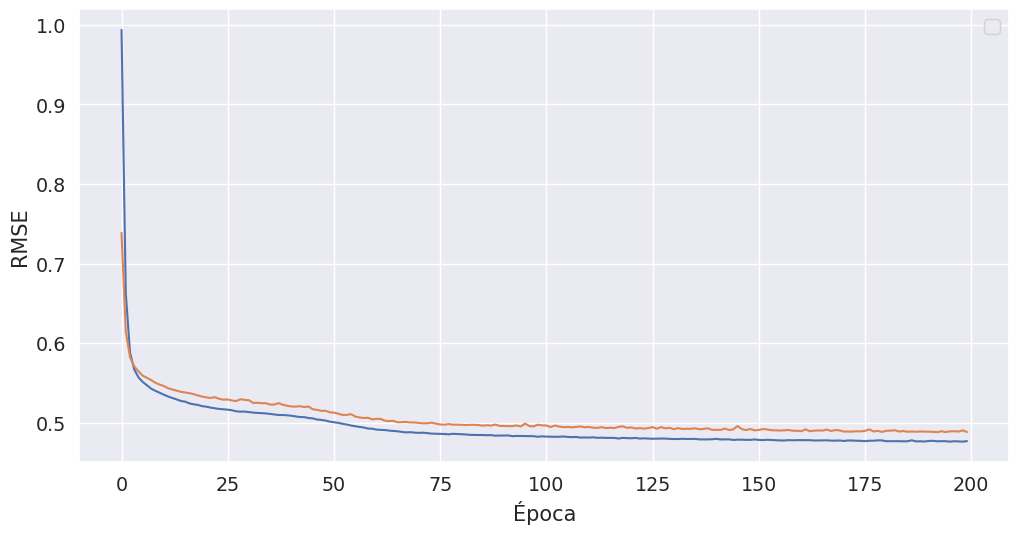

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 28s - loss: 0.9382

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.7814 

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.6397

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.5721

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.5219

10848/12384 [=========================>....] - ETA: 0s - loss: 0.4860

12384/12384 [==============================] - 1s 40us/step - loss: 0.4693 - val_loss: 0.3552


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1813

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.3453

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.3383

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.3340

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.3361

11264/12384 [==========================>...] - ETA: 0s - loss: 0.3332

12384/12384 [==============================] - 0s 33us/step - loss: 0.3348 - val_loss: 0.3348


Epoch 3/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3199

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.3340

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.3316

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.3273

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.3211

11072/12384 [=========================>....] - ETA: 0s - loss: 0.3200

12384/12384 [==============================] - 0s 33us/step - loss: 0.3200 - val_loss: 0.3197


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6281

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3017

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.3092

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.3131

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.3097

11168/12384 [==========================>...] - ETA: 0s - loss: 0.3091

12384/12384 [==============================] - 0s 32us/step - loss: 0.3074 - val_loss: 0.3108


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3827

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3083

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2900

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2895

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2946

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2971

12384/12384 [==============================] - 0s 32us/step - loss: 0.2969 - val_loss: 0.3067


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1087

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.3036

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.3007

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2953

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2940

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2886

12384/12384 [==============================] - 0s 32us/step - loss: 0.2877 - val_loss: 0.2928


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3015

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2801

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2804

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2894

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2809

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2794

12384/12384 [==============================] - 0s 32us/step - loss: 0.2807 - val_loss: 0.2891


Epoch 8/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1432

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3014

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2879

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2827

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2794

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2785

12384/12384 [==============================] - 0s 32us/step - loss: 0.2756 - val_loss: 0.2877


Epoch 9/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1905

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2849

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2768

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2758

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2748

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2714

12384/12384 [==============================] - 0s 32us/step - loss: 0.2727 - val_loss: 0.2820


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1524

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2673

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2669

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2725

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2685

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2699

12384/12384 [==============================] - 0s 31us/step - loss: 0.2691 - val_loss: 0.2795


Epoch 11/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2384

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2526

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2605

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2664

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2692



11200/12384 [==========================>...] - ETA: 0s - loss: 0.2696

12384/12384 [==============================] - 0s 32us/step - loss: 0.2665 - val_loss: 0.2782


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2253

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2588

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2743

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2681

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2639

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2620

12384/12384 [==============================] - 0s 32us/step - loss: 0.2638 - val_loss: 0.2787


Epoch 13/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1222

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2608

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2529

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2611

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2642

12384/12384 [==============================] - 0s 32us/step - loss: 0.2625 - val_loss: 0.2735


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1949

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2402

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2539

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2552

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2569

12384/12384 [==============================] - 0s 32us/step - loss: 0.2607 - val_loss: 0.2731


Epoch 15/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1336

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2568

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2598

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2599

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2599

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2574

12384/12384 [==============================] - 0s 32us/step - loss: 0.2585 - val_loss: 0.2715


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3488

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2738

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2604

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2605

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2591

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2558

12384/12384 [==============================] - 0s 32us/step - loss: 0.2568 - val_loss: 0.2696


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2446

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2516

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2594

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2595

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2564

12384/12384 [==============================] - 0s 31us/step - loss: 0.2561 - val_loss: 0.2694


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2540

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2752

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2634

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2564

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2548

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2523

12384/12384 [==============================] - 0s 31us/step - loss: 0.2551 - val_loss: 0.2674


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1812

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2526

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2475

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2471

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2514

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 31us/step - loss: 0.2544 - val_loss: 0.2675


Epoch 20/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3896

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2624

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2636

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2546

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2535

12384/12384 [==============================] - 0s 32us/step - loss: 0.2534 - val_loss: 0.2676


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2585

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2605

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2571

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2571

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2534

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2549

12384/12384 [==============================] - 0s 31us/step - loss: 0.2526 - val_loss: 0.2653


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1061

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2780

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2563

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2539

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2550

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2535

12384/12384 [==============================] - 0s 32us/step - loss: 0.2520 - val_loss: 0.2681


Epoch 23/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0782

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2327

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2452

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2518

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2481

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 32us/step - loss: 0.2520 - val_loss: 0.2659


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2709

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2426

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2576

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2580

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2546



11040/12384 [=========================>....] - ETA: 0s - loss: 0.2516

12384/12384 [==============================] - 0s 32us/step - loss: 0.2507 - val_loss: 0.2684


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5037

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2538

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2453

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2494

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2533

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 32us/step - loss: 0.2509 - val_loss: 0.2636


Epoch 26/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1837

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2609

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2588

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2622

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2567

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2526

12384/12384 [==============================] - 0s 31us/step - loss: 0.2503 - val_loss: 0.2628


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1851

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2553

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2590

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2508

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2535

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2505

12384/12384 [==============================] - 0s 32us/step - loss: 0.2499 - val_loss: 0.2638


Epoch 28/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1776

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2477

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2501

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2551

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 32us/step - loss: 0.2495 - val_loss: 0.2638


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1457

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2402

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2503

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2463

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2483

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2525

12384/12384 [==============================] - 0s 31us/step - loss: 0.2487 - val_loss: 0.2643


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3453

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2452

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2472

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2476

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2459

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 31us/step - loss: 0.2486 - val_loss: 0.2640


Epoch 31/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2308

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2428

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2544

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2536

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2564

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2496

12384/12384 [==============================] - 0s 32us/step - loss: 0.2490 - val_loss: 0.2619


Epoch 32/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1145

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2563

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2509

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2504

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 31us/step - loss: 0.2475 - val_loss: 0.2623


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1099

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2565

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2589

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2604

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2523

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2501

12384/12384 [==============================] - 0s 31us/step - loss: 0.2475 - val_loss: 0.2617


Epoch 34/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1139

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2435

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2592

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2502

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2496

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2485

12384/12384 [==============================] - 0s 32us/step - loss: 0.2482 - val_loss: 0.2604


Epoch 35/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2204

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2600

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2596

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2492

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2461



11104/12384 [=========================>....] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 32us/step - loss: 0.2469 - val_loss: 0.2612


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3413

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2453

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2497

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2484

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2447

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 32us/step - loss: 0.2464 - val_loss: 0.2619


Epoch 37/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2647

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2492

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2401

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2415

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2419

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2465

12384/12384 [==============================] - 0s 31us/step - loss: 0.2462 - val_loss: 0.2598


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3563

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2338

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2483

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2413

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2487

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 32us/step - loss: 0.2459 - val_loss: 0.2599


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4300

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2526

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2464

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2493

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2483



11200/12384 [==========================>...] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 32us/step - loss: 0.2460 - val_loss: 0.2587


Epoch 40/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3207

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2319

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2371

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2400

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 32us/step - loss: 0.2458 - val_loss: 0.2596


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2683

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2462

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2572

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2555

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2547

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2452

12384/12384 [==============================] - 0s 31us/step - loss: 0.2448 - val_loss: 0.2580


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0675

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2437

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2488

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2461

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2484

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 32us/step - loss: 0.2441 - val_loss: 0.2599


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2061

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2266

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2368

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2358

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2446

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 32us/step - loss: 0.2435 - val_loss: 0.2592


Epoch 44/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3258

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2528

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2391

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2402

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2441

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 32us/step - loss: 0.2437 - val_loss: 0.2571


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1964

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2435

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2479

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2463

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 32us/step - loss: 0.2429 - val_loss: 0.2574


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3320

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2465

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2388

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2354

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2379

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 32us/step - loss: 0.2431 - val_loss: 0.2562


Epoch 47/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3811

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2558

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2486

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2452

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2496

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2430

12384/12384 [==============================] - 0s 31us/step - loss: 0.2422 - val_loss: 0.2585


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1756

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2364

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2356

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2421

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2401

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 31us/step - loss: 0.2422 - val_loss: 0.2596


Epoch 49/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3094

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2442

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2401

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2373

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2399

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 32us/step - loss: 0.2409 - val_loss: 0.2622


Epoch 50/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2672

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2457

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2414

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2384

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2342



11232/12384 [==========================>...] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 32us/step - loss: 0.2411 - val_loss: 0.2538


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1428

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2422

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2409

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2366

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2416

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 32us/step - loss: 0.2399 - val_loss: 0.2533


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2186

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2585

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2519

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2437

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2418

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 32us/step - loss: 0.2394 - val_loss: 0.2542


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1992

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2270

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2389

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2417

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2415

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 32us/step - loss: 0.2396 - val_loss: 0.2564


Epoch 54/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3570

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2388

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2399

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2428

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 32us/step - loss: 0.2392 - val_loss: 0.2534


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2345

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2264

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2278

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2382

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 31us/step - loss: 0.2383 - val_loss: 0.2535


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1666

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2418

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2401

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2370

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2381

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 31us/step - loss: 0.2381 - val_loss: 0.2515


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2386

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2237

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2370

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2314

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2304

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 31us/step - loss: 0.2373 - val_loss: 0.2510


Epoch 58/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2334

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2196

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2346

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2371

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2390

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 32us/step - loss: 0.2370 - val_loss: 0.2515


Epoch 59/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3012

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2306

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2390

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2362

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2387

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 32us/step - loss: 0.2363 - val_loss: 0.2512


Epoch 60/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3762

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2394

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2391

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2381

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 32us/step - loss: 0.2360 - val_loss: 0.2500


Epoch 61/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4243

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2640

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2403

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2416

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2377

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 31us/step - loss: 0.2351 - val_loss: 0.2493


Epoch 62/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1177

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2414

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2302

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2315

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2344

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 32us/step - loss: 0.2349 - val_loss: 0.2492


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2116

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2386

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2315

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2300

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 32us/step - loss: 0.2340 - val_loss: 0.2496


Epoch 64/100
   32/12384 [..............................] - ETA: 1s - loss: 0.7492

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2524

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2410

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2344

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2339

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 31us/step - loss: 0.2338 - val_loss: 0.2488


Epoch 65/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2200

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2254

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2379

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2389

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2341

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 31us/step - loss: 0.2331 - val_loss: 0.2493


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2765

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2147

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2325

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2274

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2249

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 32us/step - loss: 0.2323 - val_loss: 0.2477


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1196

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2329

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2300

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2277

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 32us/step - loss: 0.2321 - val_loss: 0.2478


Epoch 68/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1464

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2370

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2331

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2358

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 32us/step - loss: 0.2318 - val_loss: 0.2517


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3764

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2385

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2309

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2267

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2336

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 32us/step - loss: 0.2321 - val_loss: 0.2454


Epoch 70/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1993

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2067

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2244

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2245

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2314

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 32us/step - loss: 0.2309 - val_loss: 0.2470


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1212

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2308

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2293

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2339

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 32us/step - loss: 0.2295 - val_loss: 0.2457


Epoch 72/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2370

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2161

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2181

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2261

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2266

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 32us/step - loss: 0.2304 - val_loss: 0.2434


Epoch 73/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2617

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2164

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2224

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2265

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2316



10848/12384 [=========================>....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 32us/step - loss: 0.2297 - val_loss: 0.2446


Epoch 74/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2393

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2278

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2289

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2280



 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2262

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 32us/step - loss: 0.2296 - val_loss: 0.2442


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3897

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2259

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2232

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2260

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2279

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 32us/step - loss: 0.2288 - val_loss: 0.2441


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1653

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2478

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2419

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2365

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2270

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 32us/step - loss: 0.2289 - val_loss: 0.2440


Epoch 77/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0734

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2141

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2171

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2249

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2277

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 32us/step - loss: 0.2282 - val_loss: 0.2437


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2856

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2124

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2209

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2221

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2255

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 32us/step - loss: 0.2274 - val_loss: 0.2432


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1875

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2355

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2287

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2309

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2264

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 32us/step - loss: 0.2273 - val_loss: 0.2438


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2320

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2389

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2334

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2232

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2259

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2271

12384/12384 [==============================] - 0s 32us/step - loss: 0.2268 - val_loss: 0.2411


Epoch 81/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1467

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2184

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2227

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2199

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2198

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2220

12384/12384 [==============================] - 0s 32us/step - loss: 0.2267 - val_loss: 0.2443


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4351

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2255

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2265

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2294

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2239

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2246

12384/12384 [==============================] - 0s 31us/step - loss: 0.2266 - val_loss: 0.2416


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1881

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2027

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2221

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2192

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2249

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2258

12384/12384 [==============================] - 0s 32us/step - loss: 0.2259 - val_loss: 0.2403


Epoch 84/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1673

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2410

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2231

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2249

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 32us/step - loss: 0.2261 - val_loss: 0.2414


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1489

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2394

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2322

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2257

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2239

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2221

12384/12384 [==============================] - 0s 32us/step - loss: 0.2249 - val_loss: 0.2418


Epoch 86/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1298

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2026

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2189

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2188

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2255

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2241

12384/12384 [==============================] - 0s 31us/step - loss: 0.2248 - val_loss: 0.2408


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1439

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2301

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2194

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2269

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2232

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2240

12384/12384 [==============================] - 0s 31us/step - loss: 0.2250 - val_loss: 0.2405


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0944

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2073

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2184

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2203

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2227

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2243

12384/12384 [==============================] - 0s 32us/step - loss: 0.2245 - val_loss: 0.2407


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3179

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2326

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2263

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2220

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2226

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2232

12384/12384 [==============================] - 0s 32us/step - loss: 0.2242 - val_loss: 0.2406


Epoch 90/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1503

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2307

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2257

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2216

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2232

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2213

12384/12384 [==============================] - 0s 32us/step - loss: 0.2232 - val_loss: 0.2442


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2733

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2501

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2369

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2230

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2273

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2255

12384/12384 [==============================] - 0s 32us/step - loss: 0.2231 - val_loss: 0.2405


Epoch 92/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1703

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2239

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2348

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2339

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2259

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2234

12384/12384 [==============================] - 0s 32us/step - loss: 0.2229 - val_loss: 0.2394


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2829

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2403

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2259

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2268

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2248

12384/12384 [==============================] - 0s 32us/step - loss: 0.2225 - val_loss: 0.2390


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1888

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2249

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2265

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2275

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2240

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 31us/step - loss: 0.2225 - val_loss: 0.2392


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2002

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2282

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2221

12384/12384 [==============================] - 0s 31us/step - loss: 0.2218 - val_loss: 0.2378


Epoch 96/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1322

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2143

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2084

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2155

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2170

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2207

12384/12384 [==============================] - 0s 32us/step - loss: 0.2218 - val_loss: 0.2382


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1780

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2078

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2184

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2197

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2192

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2221

12384/12384 [==============================] - 0s 31us/step - loss: 0.2210 - val_loss: 0.2381


Epoch 98/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1882

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2166

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2199

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2151

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2170

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2199

12384/12384 [==============================] - 0s 31us/step - loss: 0.2210 - val_loss: 0.2374


Epoch 99/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1656

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2203

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2181

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2161

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2177

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2217

12384/12384 [==============================] - 0s 32us/step - loss: 0.2211 - val_loss: 0.2372


Epoch 100/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3234

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2189

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2154

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2178

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2232

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2204

12384/12384 [==============================] - 0s 32us/step - loss: 0.2202 - val_loss: 0.2368


No handles with labels found to put in legend.


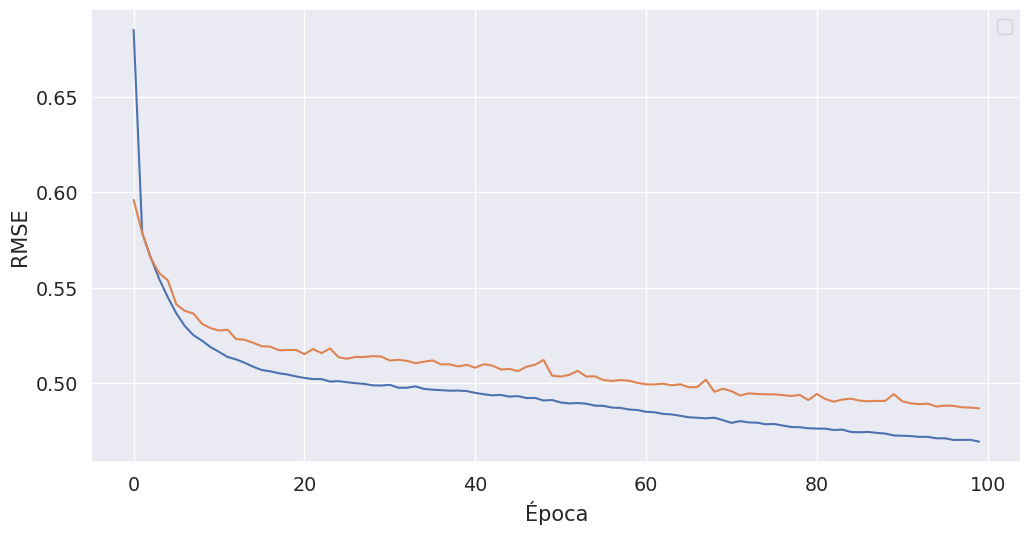

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 13s - loss: 1.3374

2016/6000 [=========>....................] - ETA: 0s - loss: 0.5378 

4096/6000 [===================>..........] - ETA: 0s - loss: 0.4464

6000/6000 [==============================] - 0s 49us/step - loss: 0.4228 - val_loss: 0.3460


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3959

2272/6000 [==========>...................] - ETA: 0s - loss: 0.3749

4512/6000 [=====================>........] - ETA: 0s - loss: 0.3506

6000/6000 [==============================] - 0s 33us/step - loss: 0.3376 - val_loss: 0.3158


Epoch 3/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2243

2240/6000 [==========>...................] - ETA: 0s - loss: 0.3193

4512/6000 [=====================>........] - ETA: 0s - loss: 0.3220

6000/6000 [==============================] - 0s 33us/step - loss: 0.3197 - val_loss: 0.2953


Epoch 4/500


  32/6000 [..............................] - ETA: 0s - loss: 1.3394



2336/6000 [==========>...................] - ETA: 0s - loss: 0.2979

4640/6000 [======================>.......] - ETA: 0s - loss: 0.3021

6000/6000 [==============================] - 0s 33us/step - loss: 0.3027 - val_loss: 0.2861


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2519

2368/6000 [==========>...................] - ETA: 0s - loss: 0.3009

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2958

6000/6000 [==============================] - 0s 32us/step - loss: 0.2911 - val_loss: 0.2710


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3328

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2744

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2759

6000/6000 [==============================] - 0s 32us/step - loss: 0.2762 - val_loss: 0.2704


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2674

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2708

6000/6000 [==============================] - 0s 32us/step - loss: 0.2656 - val_loss: 0.2545


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1996

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2794

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2561

6000/6000 [==============================] - 0s 32us/step - loss: 0.2552 - val_loss: 0.2530


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3152

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2528

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2479

6000/6000 [==============================] - 0s 32us/step - loss: 0.2485 - val_loss: 0.2402


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2331

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2458

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 33us/step - loss: 0.2415 - val_loss: 0.2364


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2517

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 32us/step - loss: 0.2344 - val_loss: 0.2325


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1196

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2321

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 33us/step - loss: 0.2325 - val_loss: 0.2324


Epoch 13/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2466

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2153

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 33us/step - loss: 0.2236 - val_loss: 0.2335


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1934

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2448

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 32us/step - loss: 0.2206 - val_loss: 0.2350


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2262

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 32us/step - loss: 0.2171 - val_loss: 0.2228


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2071

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 32us/step - loss: 0.2147 - val_loss: 0.2170


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2029

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 32us/step - loss: 0.2128 - val_loss: 0.2203


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1862

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1974

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2007

6000/6000 [==============================] - 0s 33us/step - loss: 0.2107 - val_loss: 0.2267


Epoch 19/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1324

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2098

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2040

6000/6000 [==============================] - 0s 32us/step - loss: 0.2092 - val_loss: 0.2170


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3695

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2058

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2065

6000/6000 [==============================] - 0s 32us/step - loss: 0.2071 - val_loss: 0.2154


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1877

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2138

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 33us/step - loss: 0.2070 - val_loss: 0.2198


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3375

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2103

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2038

6000/6000 [==============================] - 0s 33us/step - loss: 0.2054 - val_loss: 0.2120


Epoch 23/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1376

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1963

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1964

6000/6000 [==============================] - 0s 33us/step - loss: 0.2028 - val_loss: 0.2173


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1663

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2030

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2016

6000/6000 [==============================] - 0s 32us/step - loss: 0.2017 - val_loss: 0.2114


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1941

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 32us/step - loss: 0.2018 - val_loss: 0.2071


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3284

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1995

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1999

6000/6000 [==============================] - 0s 32us/step - loss: 0.2014 - val_loss: 0.2092


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2328

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1977

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 32us/step - loss: 0.2018 - val_loss: 0.2121


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3238

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2021

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 33us/step - loss: 0.1977 - val_loss: 0.2069


Epoch 29/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2094

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1901

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 33us/step - loss: 0.1980 - val_loss: 0.2289


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2445

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1997

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1924

6000/6000 [==============================] - 0s 33us/step - loss: 0.1967 - val_loss: 0.2175


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2377

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2062

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 32us/step - loss: 0.1966 - val_loss: 0.2069


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1994

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1940

6000/6000 [==============================] - 0s 32us/step - loss: 0.1954 - val_loss: 0.2101


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

2368/6000 [==========>...................] - ETA: 0s - loss: 0.2179

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2035

6000/6000 [==============================] - 0s 32us/step - loss: 0.1951 - val_loss: 0.2073


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1922

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 32us/step - loss: 0.1933 - val_loss: 0.2158


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1893

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 34us/step - loss: 0.1936 - val_loss: 0.2109


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2142

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1928

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1942

6000/6000 [==============================] - 0s 32us/step - loss: 0.1932 - val_loss: 0.2067


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1830

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 32us/step - loss: 0.1910 - val_loss: 0.2085


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2533

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1905

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 32us/step - loss: 0.1919 - val_loss: 0.2042


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2133

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1746

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 33us/step - loss: 0.1909 - val_loss: 0.2048


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1852

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 32us/step - loss: 0.1910 - val_loss: 0.2082


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1907

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1892

6000/6000 [==============================] - 0s 33us/step - loss: 0.1915 - val_loss: 0.2156


Epoch 42/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0795

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1902

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 32us/step - loss: 0.1894 - val_loss: 0.2020


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1828

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 32us/step - loss: 0.1907 - val_loss: 0.2053


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1124

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1968

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 33us/step - loss: 0.1894 - val_loss: 0.2049


Epoch 45/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2234

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1876

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 32us/step - loss: 0.1890 - val_loss: 0.2104


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1976

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1823

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 32us/step - loss: 0.1882 - val_loss: 0.2075


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1090

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1911

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 32us/step - loss: 0.1882 - val_loss: 0.2026


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2098

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 32us/step - loss: 0.1855 - val_loss: 0.2073


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1874

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 32us/step - loss: 0.1868 - val_loss: 0.2043


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2027

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1876

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1847

6000/6000 [==============================] - 0s 32us/step - loss: 0.1862 - val_loss: 0.2025


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2218

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1696

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 33us/step - loss: 0.1853 - val_loss: 0.2090


Epoch 52/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1508

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1877

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 32us/step - loss: 0.1842 - val_loss: 0.2060


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1954

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1931

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 32us/step - loss: 0.1838 - val_loss: 0.2090


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0679

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1795

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 33us/step - loss: 0.1862 - val_loss: 0.2024


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1818

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 32us/step - loss: 0.1850 - val_loss: 0.2000


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0794

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1903

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 33us/step - loss: 0.1847 - val_loss: 0.2102


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1902

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 31us/step - loss: 0.1839 - val_loss: 0.2012


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2022

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 34us/step - loss: 0.1848 - val_loss: 0.2008


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1741

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 33us/step - loss: 0.1829 - val_loss: 0.2044


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1723

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 32us/step - loss: 0.1840 - val_loss: 0.2067


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1791

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1690

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 32us/step - loss: 0.1833 - val_loss: 0.2059


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1958

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 32us/step - loss: 0.1817 - val_loss: 0.2061


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1941

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1850

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1776



6000/6000 [==============================] - 0s 33us/step - loss: 0.1820 - val_loss: 0.2065


Epoch 64/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1767

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1676

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 33us/step - loss: 0.1832 - val_loss: 0.2091


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1040

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1829

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1894

6000/6000 [==============================] - 0s 32us/step - loss: 0.1820 - val_loss: 0.2032


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3105

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1793

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 35us/step - loss: 0.1812 - val_loss: 0.2023


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1787

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 32us/step - loss: 0.1802 - val_loss: 0.2024


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1804

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 33us/step - loss: 0.1807 - val_loss: 0.2001


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0643

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1782

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 32us/step - loss: 0.1786 - val_loss: 0.2029


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1808

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 32us/step - loss: 0.1799 - val_loss: 0.2022


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1712

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 32us/step - loss: 0.1796 - val_loss: 0.2001


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1797

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1796

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 31us/step - loss: 0.1779 - val_loss: 0.1992


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1825

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 33us/step - loss: 0.1801 - val_loss: 0.1992


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1961

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 31us/step - loss: 0.1777 - val_loss: 0.2002


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2583

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1766

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 32us/step - loss: 0.1775 - val_loss: 0.2058


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2679

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1803

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 33us/step - loss: 0.1772 - val_loss: 0.2039


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1252

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1756

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 33us/step - loss: 0.1797 - val_loss: 0.2021


Epoch 78/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0701

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1683

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 32us/step - loss: 0.1760 - val_loss: 0.2035


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2849

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1847

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 32us/step - loss: 0.1782 - val_loss: 0.1985


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1791

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 33us/step - loss: 0.1759 - val_loss: 0.2017


Epoch 81/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1492

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1736

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 32us/step - loss: 0.1755 - val_loss: 0.2056


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0763

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1632

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 32us/step - loss: 0.1765 - val_loss: 0.2013


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3185

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1904

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 32us/step - loss: 0.1766 - val_loss: 0.1996


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1670

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 32us/step - loss: 0.1750 - val_loss: 0.2044


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1707

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1832

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 33us/step - loss: 0.1754 - val_loss: 0.2019


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1773

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 32us/step - loss: 0.1754 - val_loss: 0.2035


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3428

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1776

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 32us/step - loss: 0.1754 - val_loss: 0.2014


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1715

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 32us/step - loss: 0.1747 - val_loss: 0.2062


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2583

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1706

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 32us/step - loss: 0.1747 - val_loss: 0.2036


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1766

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 32us/step - loss: 0.1732 - val_loss: 0.2006


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3378

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1788

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 33us/step - loss: 0.1747 - val_loss: 0.2001


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1850

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 32us/step - loss: 0.1731 - val_loss: 0.2020


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1754

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1714

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 32us/step - loss: 0.1746 - val_loss: 0.2056


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3186

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1644

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 32us/step - loss: 0.1741 - val_loss: 0.2002


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0458

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1788

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 33us/step - loss: 0.1738 - val_loss: 0.2024


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1841

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 32us/step - loss: 0.1737 - val_loss: 0.1984


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1721

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 33us/step - loss: 0.1724 - val_loss: 0.2002


Epoch 98/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3764

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1747

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 32us/step - loss: 0.1732 - val_loss: 0.2050


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1794

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 32us/step - loss: 0.1723 - val_loss: 0.2002


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2600

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1668

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 33us/step - loss: 0.1731 - val_loss: 0.1990


Epoch 101/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2774

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1706

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 33us/step - loss: 0.1718 - val_loss: 0.2062


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1744

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 33us/step - loss: 0.1722 - val_loss: 0.2000


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2734

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1667

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 32us/step - loss: 0.1717 - val_loss: 0.2080


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2027

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1828

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 32us/step - loss: 0.1723 - val_loss: 0.2028


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1429

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1634

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 32us/step - loss: 0.1731 - val_loss: 0.2083


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1500

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1803

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 32us/step - loss: 0.1700 - val_loss: 0.2048


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1571

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1785

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 33us/step - loss: 0.1694 - val_loss: 0.1988


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1530

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1638

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 32us/step - loss: 0.1731 - val_loss: 0.1998


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2231

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1826

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 32us/step - loss: 0.1719 - val_loss: 0.2006


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1787

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 32us/step - loss: 0.1704 - val_loss: 0.2077


Epoch 111/500
  32/6000 [..............................]

 - ETA: 0s - loss: 0.0978

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1676

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1646

6000/6000 [==============================] - 0s 34us/step - loss: 0.1699 - val_loss: 0.2035


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2395

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1682

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 32us/step - loss: 0.1694 - val_loss: 0.2007


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1589

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 32us/step - loss: 0.1697 - val_loss: 0.2037


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1102

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1561

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 33us/step - loss: 0.1690 - val_loss: 0.2020


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1770

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 32us/step - loss: 0.1700 - val_loss: 0.1991


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2023

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1693

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 32us/step - loss: 0.1684 - val_loss: 0.2044


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1555

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 32us/step - loss: 0.1700 - val_loss: 0.1998


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1647

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 34us/step - loss: 0.1697 - val_loss: 0.2002


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1643

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1621

6000/6000 [==============================] - 0s 33us/step - loss: 0.1681 - val_loss: 0.2018


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4478

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1636

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 33us/step - loss: 0.1693 - val_loss: 0.1982


Epoch 121/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0893



2368/6000 [==========>...................] - ETA: 0s - loss: 0.1740

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 32us/step - loss: 0.1686 - val_loss: 0.1987


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1675

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1642

6000/6000 [==============================] - 0s 32us/step - loss: 0.1673 - val_loss: 0.2024


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1051

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1631

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 33us/step - loss: 0.1685 - val_loss: 0.2058


Epoch 124/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0854

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1745

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 33us/step - loss: 0.1691 - val_loss: 0.2051


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0733

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1755

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1654

6000/6000 [==============================] - 0s 32us/step - loss: 0.1689 - val_loss: 0.1988


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1850

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1793

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 32us/step - loss: 0.1684 - val_loss: 0.2038


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1671

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 32us/step - loss: 0.1684 - val_loss: 0.2013


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2058

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1719

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 34us/step - loss: 0.1675 - val_loss: 0.1983


Epoch 129/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1414

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1722

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 32us/step - loss: 0.1671 - val_loss: 0.2030


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0866

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1631

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1639

6000/6000 [==============================] - 0s 32us/step - loss: 0.1677 - val_loss: 0.2020


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1767

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 32us/step - loss: 0.1671 - val_loss: 0.1991


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2655

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1736

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 33us/step - loss: 0.1676 - val_loss: 0.2023


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1651

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 33us/step - loss: 0.1682 - val_loss: 0.1988


Epoch 134/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1216

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1685

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 32us/step - loss: 0.1683 - val_loss: 0.2062


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1639

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 33us/step - loss: 0.1666 - val_loss: 0.2006


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1702

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1646

6000/6000 [==============================] - 0s 32us/step - loss: 0.1659 - val_loss: 0.1984


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1668

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 32us/step - loss: 0.1658 - val_loss: 0.1969


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1721

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1629

6000/6000 [==============================] - 0s 33us/step - loss: 0.1668 - val_loss: 0.2044


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1724

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1685

6000/6000 [==============================] - 0s 32us/step - loss: 0.1652 - val_loss: 0.2031


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1692

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1717

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1649

6000/6000 [==============================] - 0s 32us/step - loss: 0.1655 - val_loss: 0.2053


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0947

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1629

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 32us/step - loss: 0.1662 - val_loss: 0.1989


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1179

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1720

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 32us/step - loss: 0.1671 - val_loss: 0.2054


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1734

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1643

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1625

6000/6000 [==============================] - 0s 32us/step - loss: 0.1646 - val_loss: 0.2117


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1583

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 32us/step - loss: 0.1663 - val_loss: 0.2081


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1733

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1647

6000/6000 [==============================] - 0s 33us/step - loss: 0.1654 - val_loss: 0.2030


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1663

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 33us/step - loss: 0.1651 - val_loss: 0.2036


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1506

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1656

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 32us/step - loss: 0.1644 - val_loss: 0.2046


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1685

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 33us/step - loss: 0.1634 - val_loss: 0.2048


Epoch 149/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0537

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1650

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1637

6000/6000 [==============================] - 0s 32us/step - loss: 0.1648 - val_loss: 0.1990


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0733

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1547

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1625

6000/6000 [==============================] - 0s 33us/step - loss: 0.1640 - val_loss: 0.2003


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1665

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1635

6000/6000 [==============================] - 0s 32us/step - loss: 0.1659 - val_loss: 0.1992


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1743

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1529

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 32us/step - loss: 0.1630 - val_loss: 0.2045


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1944

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1584

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 34us/step - loss: 0.1647 - val_loss: 0.2083


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1692

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1621

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1628

6000/6000 [==============================] - 0s 32us/step - loss: 0.1665 - val_loss: 0.2057


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1626

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 31us/step - loss: 0.1641 - val_loss: 0.1988


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1541

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 32us/step - loss: 0.1638 - val_loss: 0.1965


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3109

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1656

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1619

6000/6000 [==============================] - 0s 33us/step - loss: 0.1641 - val_loss: 0.2002


Epoch 158/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1972

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1569

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1619

6000/6000 [==============================] - 0s 33us/step - loss: 0.1642 - val_loss: 0.1980


Epoch 159/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1976

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1537

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1653

6000/6000 [==============================] - 0s 34us/step - loss: 0.1641 - val_loss: 0.1996


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0986

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1764

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 32us/step - loss: 0.1625 - val_loss: 0.1985


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0866

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1653

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 32us/step - loss: 0.1634 - val_loss: 0.1993


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1718

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 32us/step - loss: 0.1629 - val_loss: 0.2029


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1534

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 34us/step - loss: 0.1618 - val_loss: 0.2060


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2054

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1593

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1621

6000/6000 [==============================] - 0s 33us/step - loss: 0.1624 - val_loss: 0.1974


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0534

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1489

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1579

6000/6000 [==============================] - 0s 32us/step - loss: 0.1623 - val_loss: 0.2003


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1680

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1616

6000/6000 [==============================] - 0s 33us/step - loss: 0.1633 - val_loss: 0.2124


Epoch 167/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0905

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1692

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1656

6000/6000 [==============================] - 0s 32us/step - loss: 0.1621 - val_loss: 0.1965


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1828

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1656

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1632

6000/6000 [==============================] - 0s 32us/step - loss: 0.1632 - val_loss: 0.1989


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1581

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1652

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 33us/step - loss: 0.1625 - val_loss: 0.2000


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1536

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 32us/step - loss: 0.1620 - val_loss: 0.1986


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2312

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1622

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1582

6000/6000 [==============================] - 0s 33us/step - loss: 0.1613 - val_loss: 0.2040


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2449

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1654

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1593

6000/6000 [==============================] - 0s 32us/step - loss: 0.1632 - val_loss: 0.2001


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1618

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1572

6000/6000 [==============================] - 0s 32us/step - loss: 0.1620 - val_loss: 0.2017


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2666

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1706

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1637

6000/6000 [==============================] - 0s 32us/step - loss: 0.1615 - val_loss: 0.1997


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0939

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1625

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1638

6000/6000 [==============================] - 0s 32us/step - loss: 0.1629 - val_loss: 0.1994


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1876

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1606

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1632

6000/6000 [==============================] - 0s 32us/step - loss: 0.1618 - val_loss: 0.2021


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2393

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1639

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 32us/step - loss: 0.1615 - val_loss: 0.2008


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1556

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1557

6000/6000 [==============================] - 0s 33us/step - loss: 0.1611 - val_loss: 0.2041


Epoch 179/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0684

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1598

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 32us/step - loss: 0.1626 - val_loss: 0.2022


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1652

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1590

6000/6000 [==============================] - 0s 33us/step - loss: 0.1615 - val_loss: 0.2012


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1372

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1579

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1573

6000/6000 [==============================] - 0s 33us/step - loss: 0.1609 - val_loss: 0.1973


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1593

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1590

6000/6000 [==============================] - 0s 33us/step - loss: 0.1612 - val_loss: 0.2015


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1644

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1564

6000/6000 [==============================] - 0s 32us/step - loss: 0.1612 - val_loss: 0.2077


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0999

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1589

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1623

6000/6000 [==============================] - 0s 32us/step - loss: 0.1608 - val_loss: 0.1987


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1449

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 32us/step - loss: 0.1593 - val_loss: 0.2068


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2345

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1565

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1613

6000/6000 [==============================] - 0s 32us/step - loss: 0.1600 - val_loss: 0.2025


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0760

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1566

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 32us/step - loss: 0.1601 - val_loss: 0.1971


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1572

6000/6000 [==============================] - 0s 32us/step - loss: 0.1598 - val_loss: 0.2011


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1541

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1582

6000/6000 [==============================] - 0s 32us/step - loss: 0.1602 - val_loss: 0.2078


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1185

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1634

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 33us/step - loss: 0.1604 - val_loss: 0.1962


Epoch 191/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2504

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1549

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 32us/step - loss: 0.1596 - val_loss: 0.2015


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1545

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 32us/step - loss: 0.1598 - val_loss: 0.1971


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0627

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1604

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1632

6000/6000 [==============================] - 0s 32us/step - loss: 0.1598 - val_loss: 0.1985


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1552

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1655

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 32us/step - loss: 0.1590 - val_loss: 0.2009


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1613

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1608

6000/6000 [==============================] - 0s 32us/step - loss: 0.1595 - val_loss: 0.1970


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1616

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 32us/step - loss: 0.1589 - val_loss: 0.2005


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0947

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1566

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 32us/step - loss: 0.1589 - val_loss: 0.1987


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2903

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1670

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1628

6000/6000 [==============================] - 0s 32us/step - loss: 0.1587 - val_loss: 0.1993


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1642

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1599

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1567

6000/6000 [==============================] - 0s 32us/step - loss: 0.1582 - val_loss: 0.2024


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1517

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1591

6000/6000 [==============================] - 0s 33us/step - loss: 0.1595 - val_loss: 0.2005


Epoch 201/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2561

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1670

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 32us/step - loss: 0.1593 - val_loss: 0.1996


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1533

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1496

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 32us/step - loss: 0.1582 - val_loss: 0.2039


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2337

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1597

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 32us/step - loss: 0.1592 - val_loss: 0.2016


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0892

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1524

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 32us/step - loss: 0.1583 - val_loss: 0.2014


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0608

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1652

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1529

6000/6000 [==============================] - 0s 32us/step - loss: 0.1580 - val_loss: 0.2060


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1226

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1484

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1579

6000/6000 [==============================] - 0s 32us/step - loss: 0.1576 - val_loss: 0.1983


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1605

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1605

6000/6000 [==============================] - 0s 32us/step - loss: 0.1583 - val_loss: 0.1961


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1661

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1608

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1556

6000/6000 [==============================] - 0s 33us/step - loss: 0.1577 - val_loss: 0.1962


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1567

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 32us/step - loss: 0.1582 - val_loss: 0.1999


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2407

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1584

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 33us/step - loss: 0.1585 - val_loss: 0.1984


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1552

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1456

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 32us/step - loss: 0.1576 - val_loss: 0.2020


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2026

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1502

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 32us/step - loss: 0.1601 - val_loss: 0.2011


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1494

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1597

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1560

6000/6000 [==============================] - 0s 32us/step - loss: 0.1565 - val_loss: 0.1981


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1134

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1580

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 32us/step - loss: 0.1563 - val_loss: 0.1979


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0904

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1536

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1535

6000/6000 [==============================] - 0s 32us/step - loss: 0.1564 - val_loss: 0.2134


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1448

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 33us/step - loss: 0.1566 - val_loss: 0.1997


Epoch 217/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1188

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1499

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1540

6000/6000 [==============================] - 0s 32us/step - loss: 0.1580 - val_loss: 0.1966


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1399

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 32us/step - loss: 0.1556 - val_loss: 0.2018


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1566

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 32us/step - loss: 0.1565 - val_loss: 0.1973


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1514

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1518

6000/6000 [==============================] - 0s 32us/step - loss: 0.1552 - val_loss: 0.2031


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1529

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 34us/step - loss: 0.1565 - val_loss: 0.1975


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2580

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1620

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1613

6000/6000 [==============================] - 0s 32us/step - loss: 0.1561 - val_loss: 0.1976


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0646

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1696

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1599

6000/6000 [==============================] - 0s 32us/step - loss: 0.1567 - val_loss: 0.1963


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2555

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1453

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 31us/step - loss: 0.1556 - val_loss: 0.2080


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1455

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1544

6000/6000 [==============================] - 0s 33us/step - loss: 0.1562 - val_loss: 0.1996


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1488

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1525

6000/6000 [==============================] - 0s 32us/step - loss: 0.1556 - val_loss: 0.1992


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1451

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 32us/step - loss: 0.1574 - val_loss: 0.2023


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1130

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1665

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 33us/step - loss: 0.1545 - val_loss: 0.1970


Epoch 229/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1948

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1449

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1544

6000/6000 [==============================] - 0s 32us/step - loss: 0.1547 - val_loss: 0.2029


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1606

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 33us/step - loss: 0.1548 - val_loss: 0.1972


Epoch 231/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1387

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1511

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1564

6000/6000 [==============================] - 0s 33us/step - loss: 0.1550 - val_loss: 0.1992


Epoch 232/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1032

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1489

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1521

6000/6000 [==============================] - 0s 32us/step - loss: 0.1554 - val_loss: 0.2015


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1779

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1534

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 32us/step - loss: 0.1537 - val_loss: 0.1973


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1509

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1507

6000/6000 [==============================] - 0s 32us/step - loss: 0.1554 - val_loss: 0.2045


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1410

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1617

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1605

6000/6000 [==============================] - 0s 32us/step - loss: 0.1562 - val_loss: 0.2074


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2134

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1502

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 33us/step - loss: 0.1538 - val_loss: 0.1982


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1558

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 32us/step - loss: 0.1552 - val_loss: 0.2001


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1465

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1538

6000/6000 [==============================] - 0s 33us/step - loss: 0.1550 - val_loss: 0.1951


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1610

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 32us/step - loss: 0.1549 - val_loss: 0.1968


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1970

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1607

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1507

6000/6000 [==============================] - 0s 32us/step - loss: 0.1543 - val_loss: 0.1977


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1928

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1483

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 32us/step - loss: 0.1526 - val_loss: 0.2006


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1443

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1532

6000/6000 [==============================] - 0s 31us/step - loss: 0.1531 - val_loss: 0.1994


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1490

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1542

6000/6000 [==============================] - 0s 32us/step - loss: 0.1537 - val_loss: 0.1960


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1484

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 32us/step - loss: 0.1536 - val_loss: 0.1954


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3153

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1675

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1558

6000/6000 [==============================] - 0s 32us/step - loss: 0.1542 - val_loss: 0.1979


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1530

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 31us/step - loss: 0.1538 - val_loss: 0.1969


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1512

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 33us/step - loss: 0.1524 - val_loss: 0.2017


Epoch 248/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1013

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1572

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1521

6000/6000 [==============================] - 0s 32us/step - loss: 0.1535 - val_loss: 0.2021


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1627

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1557

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1570

6000/6000 [==============================] - 0s 32us/step - loss: 0.1540 - val_loss: 0.2075


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 31us/step - loss: 0.1529 - val_loss: 0.2015


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1569

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1408

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 32us/step - loss: 0.1528 - val_loss: 0.2004


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1556

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 33us/step - loss: 0.1515 - val_loss: 0.2045


Epoch 253/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2215

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1432

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 32us/step - loss: 0.1523 - val_loss: 0.1974


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2155

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1519

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1513

6000/6000 [==============================] - 0s 32us/step - loss: 0.1523 - val_loss: 0.2008


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1527

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 32us/step - loss: 0.1515 - val_loss: 0.1998


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2111

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1496

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 32us/step - loss: 0.1519 - val_loss: 0.1981


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0838

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1504

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 33us/step - loss: 0.1510 - val_loss: 0.2025


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1241

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1445

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 32us/step - loss: 0.1518 - val_loss: 0.2065


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1458

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1525

6000/6000 [==============================] - 0s 32us/step - loss: 0.1513 - val_loss: 0.1969


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1513

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1502

6000/6000 [==============================] - 0s 32us/step - loss: 0.1516 - val_loss: 0.2033


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1583

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 32us/step - loss: 0.1511 - val_loss: 0.1955


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0884

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1436

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1538

6000/6000 [==============================] - 0s 32us/step - loss: 0.1521 - val_loss: 0.2022


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1671

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1577

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1528

6000/6000 [==============================] - 0s 32us/step - loss: 0.1517 - val_loss: 0.2048


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0693

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1481

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1525

6000/6000 [==============================] - 0s 32us/step - loss: 0.1518 - val_loss: 0.1965


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1521

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1442

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 32us/step - loss: 0.1504 - val_loss: 0.2100


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1482

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 32us/step - loss: 0.1505 - val_loss: 0.1988


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1999

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1543

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1540

6000/6000 [==============================] - 0s 32us/step - loss: 0.1503 - val_loss: 0.2040


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1387

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1429

6000/6000 [==============================] - 0s 33us/step - loss: 0.1505 - val_loss: 0.1956


Epoch 269/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1669

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1462

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1486

6000/6000 [==============================] - 0s 31us/step - loss: 0.1501 - val_loss: 0.2013


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1612

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 31us/step - loss: 0.1500 - val_loss: 0.2040


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2137

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1394

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 31us/step - loss: 0.1497 - val_loss: 0.2038


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1534

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 32us/step - loss: 0.1493 - val_loss: 0.1978


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1553

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1527

6000/6000 [==============================] - 0s 32us/step - loss: 0.1490 - val_loss: 0.1964


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1791

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1478

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 31us/step - loss: 0.1498 - val_loss: 0.1997


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1547

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 31us/step - loss: 0.1499 - val_loss: 0.1997


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2288

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1573

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 31us/step - loss: 0.1493 - val_loss: 0.1978


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1450

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 31us/step - loss: 0.1485 - val_loss: 0.1961


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0955

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1496

6000/6000 [==============================] - 0s 32us/step - loss: 0.1492 - val_loss: 0.2013


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1556

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 31us/step - loss: 0.1493 - val_loss: 0.2000


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1468

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 32us/step - loss: 0.1489 - val_loss: 0.2067


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1444

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 32us/step - loss: 0.1504 - val_loss: 0.1969


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2688

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1394

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1477

6000/6000 [==============================] - 0s 31us/step - loss: 0.1492 - val_loss: 0.2006


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1780

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1365

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1486

6000/6000 [==============================] - 0s 32us/step - loss: 0.1493 - val_loss: 0.1967


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2915

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1498

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 32us/step - loss: 0.1477 - val_loss: 0.1960


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0794

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1426

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1555

6000/6000 [==============================] - 0s 31us/step - loss: 0.1492 - val_loss: 0.1965


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 32us/step - loss: 0.1480 - val_loss: 0.2003


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1541

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 31us/step - loss: 0.1501 - val_loss: 0.1996


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1484

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1473

6000/6000 [==============================] - 0s 31us/step - loss: 0.1494 - val_loss: 0.2014


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0584

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1455

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 31us/step - loss: 0.1484 - val_loss: 0.1951


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3136

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1413

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 31us/step - loss: 0.1484 - val_loss: 0.1955


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 32us/step - loss: 0.1470 - val_loss: 0.1987


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1967

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1455

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1490

6000/6000 [==============================] - 0s 32us/step - loss: 0.1481 - val_loss: 0.1939


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1401

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 32us/step - loss: 0.1473 - val_loss: 0.1974


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2615

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1399

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 32us/step - loss: 0.1479 - val_loss: 0.1970


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3046

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1480

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 31us/step - loss: 0.1467 - val_loss: 0.2001


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1451

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 31us/step - loss: 0.1466 - val_loss: 0.1984


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1482

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1532

6000/6000 [==============================] - 0s 31us/step - loss: 0.1472 - val_loss: 0.1945


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1418

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 31us/step - loss: 0.1458 - val_loss: 0.1961


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0876

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 31us/step - loss: 0.1474 - val_loss: 0.1977


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0811

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1437

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 31us/step - loss: 0.1466 - val_loss: 0.2032


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1550

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 32us/step - loss: 0.1470 - val_loss: 0.1948


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2442

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1448

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 31us/step - loss: 0.1470 - val_loss: 0.1944


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2827

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1451

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 31us/step - loss: 0.1461 - val_loss: 0.1979


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1914

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1525

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1473

6000/6000 [==============================] - 0s 32us/step - loss: 0.1465 - val_loss: 0.2018


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2697

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1485

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 31us/step - loss: 0.1470 - val_loss: 0.1978


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2830

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1398

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 32us/step - loss: 0.1456 - val_loss: 0.1954


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1375

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1465

6000/6000 [==============================] - 0s 32us/step - loss: 0.1455 - val_loss: 0.2025


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1182

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1503

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 31us/step - loss: 0.1454 - val_loss: 0.2023


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1542

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 31us/step - loss: 0.1481 - val_loss: 0.1964


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1517

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 31us/step - loss: 0.1463 - val_loss: 0.1983


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0923

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1419

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 31us/step - loss: 0.1449 - val_loss: 0.1976


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1436

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1458

6000/6000 [==============================] - 0s 31us/step - loss: 0.1470 - val_loss: 0.1983


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0906

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1425

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 31us/step - loss: 0.1463 - val_loss: 0.1968


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1444

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1458

6000/6000 [==============================] - 0s 32us/step - loss: 0.1456 - val_loss: 0.1978


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2093

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1377

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 33us/step - loss: 0.1454 - val_loss: 0.2003


Epoch 316/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0850

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1476

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 32us/step - loss: 0.1449 - val_loss: 0.2019


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2121

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1391

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 32us/step - loss: 0.1469 - val_loss: 0.2000


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1417

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 32us/step - loss: 0.1458 - val_loss: 0.1971


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2201

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1479

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 31us/step - loss: 0.1436 - val_loss: 0.2046


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1445

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 31us/step - loss: 0.1455 - val_loss: 0.1991


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1808

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 32us/step - loss: 0.1435 - val_loss: 0.1972


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2605

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1446

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 33us/step - loss: 0.1445 - val_loss: 0.1962


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1468

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 31us/step - loss: 0.1441 - val_loss: 0.1984


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1402

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 31us/step - loss: 0.1447 - val_loss: 0.1954


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1448

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 31us/step - loss: 0.1450 - val_loss: 0.1970


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1477

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 31us/step - loss: 0.1444 - val_loss: 0.1985


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0966

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 31us/step - loss: 0.1454 - val_loss: 0.1968


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1321

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 31us/step - loss: 0.1433 - val_loss: 0.1950


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1377

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 32us/step - loss: 0.1442 - val_loss: 0.1973


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1014

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 32us/step - loss: 0.1443 - val_loss: 0.2034


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1585

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 31us/step - loss: 0.1438 - val_loss: 0.2005


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0483

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1419

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 31us/step - loss: 0.1442 - val_loss: 0.2042


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1413

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1434

6000/6000 [==============================] - 0s 31us/step - loss: 0.1428 - val_loss: 0.1966


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1418

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 31us/step - loss: 0.1436 - val_loss: 0.1995


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1536

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1434

6000/6000 [==============================] - 0s 32us/step - loss: 0.1433 - val_loss: 0.1982


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3747

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1413

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 32us/step - loss: 0.1423 - val_loss: 0.2012


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1303

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1378

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 31us/step - loss: 0.1426 - val_loss: 0.1989


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1523

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 32us/step - loss: 0.1427 - val_loss: 0.1985


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0617

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1420

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1445

6000/6000 [==============================] - 0s 31us/step - loss: 0.1437 - val_loss: 0.2016


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1510

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1425

6000/6000 [==============================] - 0s 31us/step - loss: 0.1426 - val_loss: 0.1977


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1445

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 31us/step - loss: 0.1434 - val_loss: 0.1988


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1299

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 31us/step - loss: 0.1434 - val_loss: 0.1965


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1308

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1287

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 31us/step - loss: 0.1414 - val_loss: 0.1962


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0447

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1323

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 31us/step - loss: 0.1415 - val_loss: 0.2034


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0629

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1350

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 31us/step - loss: 0.1424 - val_loss: 0.1966


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1292

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 31us/step - loss: 0.1416 - val_loss: 0.1981


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2574

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1326

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 32us/step - loss: 0.1421 - val_loss: 0.1969


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1420

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 32us/step - loss: 0.1413 - val_loss: 0.1987


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1159

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1416

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 32us/step - loss: 0.1418 - val_loss: 0.1989


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1013

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1393

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 32us/step - loss: 0.1405 - val_loss: 0.1978


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1426

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 31us/step - loss: 0.1418 - val_loss: 0.1972


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1721

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1449

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 32us/step - loss: 0.1412 - val_loss: 0.1976


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1516

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1387

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 32us/step - loss: 0.1411 - val_loss: 0.1983


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1492

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 31us/step - loss: 0.1421 - val_loss: 0.1979


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1627

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1429

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 31us/step - loss: 0.1422 - val_loss: 0.1983


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0825

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1446

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 32us/step - loss: 0.1408 - val_loss: 0.1955


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1347

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 32us/step - loss: 0.1403 - val_loss: 0.1956


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0992

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1378

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 31us/step - loss: 0.1408 - val_loss: 0.1963


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1384

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1409

6000/6000 [==============================] - 0s 31us/step - loss: 0.1408 - val_loss: 0.1980


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1392

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 32us/step - loss: 0.1417 - val_loss: 0.1955


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1479

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 32us/step - loss: 0.1403 - val_loss: 0.1962


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3010

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1410

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 31us/step - loss: 0.1394 - val_loss: 0.1945


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1362

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1401

6000/6000 [==============================] - 0s 31us/step - loss: 0.1394 - val_loss: 0.2043


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1401

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 31us/step - loss: 0.1404 - val_loss: 0.1970


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1357

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1428

6000/6000 [==============================] - 0s 31us/step - loss: 0.1401 - val_loss: 0.1972


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1089

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1339

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 32us/step - loss: 0.1409 - val_loss: 0.2004


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1988

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1538

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 32us/step - loss: 0.1396 - val_loss: 0.1936


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1181

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1431

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 31us/step - loss: 0.1390 - val_loss: 0.1947


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1472

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 31us/step - loss: 0.1411 - val_loss: 0.1955


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0680

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1411

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 32us/step - loss: 0.1394 - val_loss: 0.2015


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1419

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1425

6000/6000 [==============================] - 0s 31us/step - loss: 0.1397 - val_loss: 0.1950


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1374

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 31us/step - loss: 0.1399 - val_loss: 0.2000


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0875

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1339

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 32us/step - loss: 0.1392 - val_loss: 0.1964


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0816

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1346

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 32us/step - loss: 0.1395 - val_loss: 0.1994


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1310

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 32us/step - loss: 0.1395 - val_loss: 0.1957


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0928

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1403

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 32us/step - loss: 0.1392 - val_loss: 0.1991


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1398

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 34us/step - loss: 0.1395 - val_loss: 0.1934


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1393

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1396

6000/6000 [==============================] - 0s 31us/step - loss: 0.1385 - val_loss: 0.1989


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1290

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 32us/step - loss: 0.1396 - val_loss: 0.1967


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1391

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1342

6000/6000 [==============================] - 0s 30us/step - loss: 0.1376 - val_loss: 0.1975


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2030

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1339

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 31us/step - loss: 0.1393 - val_loss: 0.1947


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1411

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 31us/step - loss: 0.1395 - val_loss: 0.1955


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1511

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1302

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 31us/step - loss: 0.1378 - val_loss: 0.2045


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1353

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 30us/step - loss: 0.1389 - val_loss: 0.1963


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0684

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1364

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1400

6000/6000 [==============================] - 0s 31us/step - loss: 0.1385 - val_loss: 0.2012


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3526

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1387

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 31us/step - loss: 0.1372 - val_loss: 0.1984


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 31us/step - loss: 0.1379 - val_loss: 0.1989


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1322

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 31us/step - loss: 0.1372 - val_loss: 0.1953


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 31us/step - loss: 0.1388 - val_loss: 0.1991


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1004

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1331

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 31us/step - loss: 0.1390 - val_loss: 0.1921


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1346

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 31us/step - loss: 0.1378 - val_loss: 0.1954


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1394

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 31us/step - loss: 0.1377 - val_loss: 0.1978


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1355

6000/6000 [==============================] - 0s 31us/step - loss: 0.1380 - val_loss: 0.1954


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1792

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1370

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 30us/step - loss: 0.1377 - val_loss: 0.1954


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1890

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1343

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 31us/step - loss: 0.1383 - val_loss: 0.1931


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2301

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1227

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 31us/step - loss: 0.1376 - val_loss: 0.1929


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1321

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1362

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 31us/step - loss: 0.1363 - val_loss: 0.1986


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0740

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1416

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 31us/step - loss: 0.1374 - val_loss: 0.1949


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1453

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1411

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1355

6000/6000 [==============================] - 0s 31us/step - loss: 0.1357 - val_loss: 0.1949


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1387

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 31us/step - loss: 0.1379 - val_loss: 0.1958


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2362

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1379

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 31us/step - loss: 0.1363 - val_loss: 0.1950


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1671

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1254

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 31us/step - loss: 0.1368 - val_loss: 0.1928


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1285

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 31us/step - loss: 0.1361 - val_loss: 0.1972


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1463

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 31us/step - loss: 0.1360 - val_loss: 0.1952


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0877

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 31us/step - loss: 0.1368 - val_loss: 0.1943


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1282

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 31us/step - loss: 0.1364 - val_loss: 0.1954


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1422

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1432

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 30us/step - loss: 0.1355 - val_loss: 0.1934


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1400

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1401

6000/6000 [==============================] - 0s 31us/step - loss: 0.1366 - val_loss: 0.1972


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1422

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1323

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 31us/step - loss: 0.1355 - val_loss: 0.1929


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1369

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 31us/step - loss: 0.1353 - val_loss: 0.1968


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1899

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1390

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 31us/step - loss: 0.1352 - val_loss: 0.1962


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1357

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 30us/step - loss: 0.1363 - val_loss: 0.1966


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1726

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1388

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 31us/step - loss: 0.1343 - val_loss: 0.1972


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0803

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1419

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 31us/step - loss: 0.1359 - val_loss: 0.1945


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1275

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 30us/step - loss: 0.1351 - val_loss: 0.2008


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1382

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 31us/step - loss: 0.1365 - val_loss: 0.1934


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0811

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1371

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 31us/step - loss: 0.1352 - val_loss: 0.1953


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2078

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1334

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 31us/step - loss: 0.1350 - val_loss: 0.1936


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1053

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1317

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 31us/step - loss: 0.1349 - val_loss: 0.1924


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0483

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1363

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 31us/step - loss: 0.1354 - val_loss: 0.1960


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1426

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 31us/step - loss: 0.1361 - val_loss: 0.1965


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1424

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1326

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 31us/step - loss: 0.1345 - val_loss: 0.1918


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0625

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1283

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 31us/step - loss: 0.1343 - val_loss: 0.1924


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1286

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 31us/step - loss: 0.1346 - val_loss: 0.1956


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1267

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 32us/step - loss: 0.1359 - val_loss: 0.2014


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0711

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1240

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 30us/step - loss: 0.1352 - val_loss: 0.1981


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0625

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1248

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 31us/step - loss: 0.1342 - val_loss: 0.1967


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0572

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1249

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 31us/step - loss: 0.1358 - val_loss: 0.1910


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1145

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1375

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 31us/step - loss: 0.1354 - val_loss: 0.1955


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1421

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 32us/step - loss: 0.1342 - val_loss: 0.1930


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1453

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1371

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1330



6000/6000 [==============================] - 0s 33us/step - loss: 0.1345 - val_loss: 0.1931


Epoch 432/500


  32/6000 [..............................] - ETA: 1s - loss: 0.1811

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1378

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 32us/step - loss: 0.1334 - val_loss: 0.1926


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1238

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 31us/step - loss: 0.1327 - val_loss: 0.1958


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1378

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1415

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 31us/step - loss: 0.1342 - val_loss: 0.1948


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2340

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1367

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1337

6000/6000 [==============================] - 0s 31us/step - loss: 0.1339 - val_loss: 0.1932


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1296

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 30us/step - loss: 0.1336 - val_loss: 0.1954


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0548

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1383

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 31us/step - loss: 0.1325 - val_loss: 0.1919


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1626

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1418

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 31us/step - loss: 0.1340 - val_loss: 0.1945


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0928

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1327

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 30us/step - loss: 0.1344 - val_loss: 0.1937


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0721

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1421

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 31us/step - loss: 0.1334 - val_loss: 0.1926


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1837

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1396

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 31us/step - loss: 0.1338 - val_loss: 0.1946


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1281

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 31us/step - loss: 0.1325 - val_loss: 0.1958


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1308

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 31us/step - loss: 0.1336 - val_loss: 0.1935


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1304

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 32us/step - loss: 0.1323 - val_loss: 0.1936


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1422

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 31us/step - loss: 0.1340 - val_loss: 0.1926


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1342

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 31us/step - loss: 0.1333 - val_loss: 0.1926


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2269

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 31us/step - loss: 0.1318 - val_loss: 0.1961


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1400

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 31us/step - loss: 0.1322 - val_loss: 0.1923


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1275

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 30us/step - loss: 0.1332 - val_loss: 0.1971


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1399

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1335

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1322

6000/6000 [==============================] - 0s 31us/step - loss: 0.1326 - val_loss: 0.1910


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1229

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 31us/step - loss: 0.1318 - val_loss: 0.1929


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0527

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1174

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 31us/step - loss: 0.1317 - val_loss: 0.1906


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1210

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 31us/step - loss: 0.1323 - val_loss: 0.1958


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1192

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1258

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 31us/step - loss: 0.1320 - val_loss: 0.1935


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1376

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 31us/step - loss: 0.1318 - val_loss: 0.1927


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0442

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1283

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 31us/step - loss: 0.1320 - val_loss: 0.1930


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0682

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1319

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 31us/step - loss: 0.1318 - val_loss: 0.1918


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0494

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1210

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 31us/step - loss: 0.1329 - val_loss: 0.1923


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1290

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1298

6000/6000 [==============================] - 0s 31us/step - loss: 0.1305 - val_loss: 0.1973


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0567

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1321

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 31us/step - loss: 0.1311 - val_loss: 0.1946


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1978

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1413

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 31us/step - loss: 0.1342 - val_loss: 0.1920


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1030

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1414

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 31us/step - loss: 0.1311 - val_loss: 0.1982


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1025

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1154

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 30us/step - loss: 0.1316 - val_loss: 0.1934


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1325

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 31us/step - loss: 0.1304 - val_loss: 0.1967


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1494

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1268

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 31us/step - loss: 0.1310 - val_loss: 0.1923


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1322

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 31us/step - loss: 0.1307 - val_loss: 0.1924


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0738

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1287

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 31us/step - loss: 0.1310 - val_loss: 0.1942


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1255

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 30us/step - loss: 0.1311 - val_loss: 0.1942


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1275

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1337

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 30us/step - loss: 0.1318 - val_loss: 0.1951


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0897

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1246

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1284

6000/6000 [==============================] - 0s 31us/step - loss: 0.1309 - val_loss: 0.1982


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1265

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 31us/step - loss: 0.1312 - val_loss: 0.2031


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1271

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 31us/step - loss: 0.1306 - val_loss: 0.1960


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1816

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1283

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 32us/step - loss: 0.1310 - val_loss: 0.1935


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1273

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 31us/step - loss: 0.1317 - val_loss: 0.1922


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1385

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 31us/step - loss: 0.1298 - val_loss: 0.1929


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1310

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1333



6000/6000 [==============================] - 0s 33us/step - loss: 0.1303 - val_loss: 0.1924


Epoch 477/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1736

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1281

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 31us/step - loss: 0.1309 - val_loss: 0.1959


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1406

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 31us/step - loss: 0.1323 - val_loss: 0.1969


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1235

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1298

6000/6000 [==============================] - 0s 31us/step - loss: 0.1301 - val_loss: 0.1899


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1311

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 31us/step - loss: 0.1304 - val_loss: 0.1920


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1240

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 31us/step - loss: 0.1301 - val_loss: 0.1919


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1239

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 31us/step - loss: 0.1287 - val_loss: 0.1946


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0802

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1279

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 31us/step - loss: 0.1288 - val_loss: 0.1952


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2043

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1296

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 31us/step - loss: 0.1294 - val_loss: 0.1962


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0664

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1380

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 31us/step - loss: 0.1302 - val_loss: 0.1978


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1242

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 32us/step - loss: 0.1300 - val_loss: 0.1944


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1304

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 31us/step - loss: 0.1297 - val_loss: 0.1931


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1315

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 30us/step - loss: 0.1297 - val_loss: 0.1917


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1262

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1296

6000/6000 [==============================] - 0s 31us/step - loss: 0.1292 - val_loss: 0.1939


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1041

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1292

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 31us/step - loss: 0.1297 - val_loss: 0.1958


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1239

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 30us/step - loss: 0.1277 - val_loss: 0.1962


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1297

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 31us/step - loss: 0.1288 - val_loss: 0.1954


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0592

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1303

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1282

6000/6000 [==============================] - 0s 31us/step - loss: 0.1298 - val_loss: 0.1991


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1555

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1332

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 31us/step - loss: 0.1292 - val_loss: 0.1917


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0973

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1165

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 31us/step - loss: 0.1287 - val_loss: 0.1923


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0973

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1305

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 31us/step - loss: 0.1294 - val_loss: 0.1912


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0874

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1306

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 31us/step - loss: 0.1291 - val_loss: 0.1906


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1070

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1314

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1253

6000/6000 [==============================] - 0s 31us/step - loss: 0.1280 - val_loss: 0.1996


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0843

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 31us/step - loss: 0.1279 - val_loss: 0.1943


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0829

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1294

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1234

6000/6000 [==============================] - 0s 30us/step - loss: 0.1289 - val_loss: 0.1916


Text(0, 0.5, 'y pred')

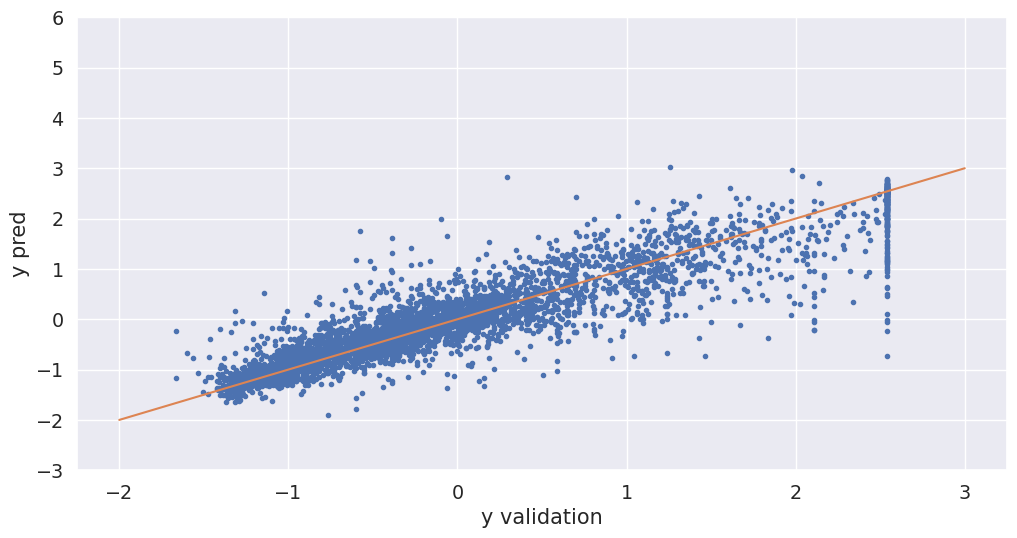

In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


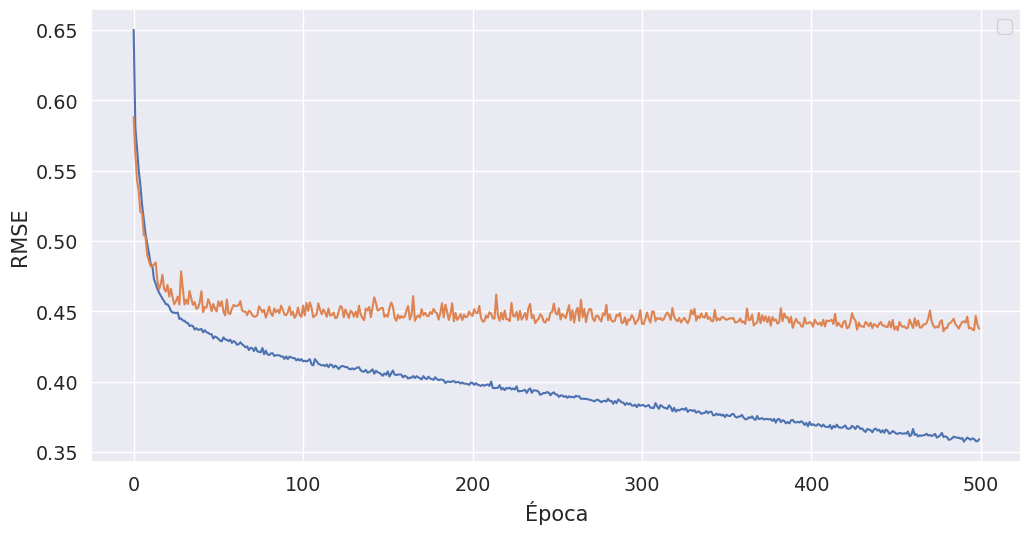

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 13s - loss: 0.8428

2016/6000 [=========>....................] - ETA: 0s - loss: 0.5888 

4096/6000 [===================>..........] - ETA: 0s - loss: 0.5086

6000/6000 [==============================] - 0s 48us/step - loss: 0.5714 - val_loss: 0.3430


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2433

2176/6000 [=========>....................] - ETA: 0s - loss: 0.3572

4288/6000 [====================>.........] - ETA: 0s - loss: 0.3365

6000/6000 [==============================] - 0s 34us/step - loss: 0.3365 - val_loss: 0.3086


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 4.2668

2208/6000 [==========>...................] - ETA: 0s - loss: 0.3672

4352/6000 [====================>.........] - ETA: 0s - loss: 0.3175

6000/6000 [==============================] - 0s 34us/step - loss: 0.3093 - val_loss: 0.2666


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1695

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2917

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2652

6000/6000 [==============================] - 0s 34us/step - loss: 0.2588 - val_loss: 0.2603


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2425

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2499

6000/6000 [==============================] - 0s 33us/step - loss: 0.2576 - val_loss: 0.2684


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2046

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2820

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2516



6000/6000 [==============================] - 0s 33us/step - loss: 0.2555 - val_loss: 0.2312


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2302

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2850

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2823

6000/6000 [==============================] - 0s 33us/step - loss: 0.2627 - val_loss: 0.2259


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2394

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 34us/step - loss: 0.2245 - val_loss: 0.2266


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0761

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2497

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2361

6000/6000 [==============================] - 0s 33us/step - loss: 0.2288 - val_loss: 0.2305


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5117



2176/6000 [=========>....................] - ETA: 0s - loss: 0.2013



4256/6000 [====================>.........] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 34us/step - loss: 0.2149 - val_loss: 0.2274


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2237

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 34us/step - loss: 0.2142 - val_loss: 0.2200


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2266

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 34us/step - loss: 0.2279 - val_loss: 0.2195


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1958

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 34us/step - loss: 0.2173 - val_loss: 0.2350


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2290

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2071

6000/6000 [==============================] - 0s 34us/step - loss: 0.2087 - val_loss: 0.2179


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2121

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2005

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 34us/step - loss: 0.2168 - val_loss: 0.2161


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2198

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 34us/step - loss: 0.2044 - val_loss: 0.2087


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2226

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2126

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2037

6000/6000 [==============================] - 0s 34us/step - loss: 0.2026 - val_loss: 0.2150


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2088

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1911

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1933

6000/6000 [==============================] - 0s 34us/step - loss: 0.2011 - val_loss: 0.2096


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1915

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2009

6000/6000 [==============================] - 0s 34us/step - loss: 0.1993 - val_loss: 0.2061


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1408

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1952

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 35us/step - loss: 0.2025 - val_loss: 0.2086


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1599

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2298

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2105

6000/6000 [==============================] - 0s 34us/step - loss: 0.2108 - val_loss: 0.2097


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2107

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2147

6000/6000 [==============================] - 0s 34us/step - loss: 0.2040 - val_loss: 0.2098


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1610

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2017

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 34us/step - loss: 0.1911 - val_loss: 0.2055


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2013

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1914

6000/6000 [==============================] - 0s 34us/step - loss: 0.1889 - val_loss: 0.2046


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2002

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1954



6000/6000 [==============================] - 0s 34us/step - loss: 0.1930 - val_loss: 0.2072


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1850

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2022

6000/6000 [==============================] - 0s 33us/step - loss: 0.1978 - val_loss: 0.2060


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1728

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 33us/step - loss: 0.1867 - val_loss: 0.1998


Epoch 28/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2222

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1745

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 34us/step - loss: 0.1821 - val_loss: 0.2059


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1039

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1912

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 34us/step - loss: 0.1848 - val_loss: 0.2049


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3628

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1995

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 33us/step - loss: 0.1846 - val_loss: 0.2000


Epoch 31/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3132

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1791

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 34us/step - loss: 0.1822 - val_loss: 0.2028


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4102

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1906

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 34us/step - loss: 0.1829 - val_loss: 0.1998


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1800

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 35us/step - loss: 0.1816 - val_loss: 0.2054


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1452

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1636

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 34us/step - loss: 0.1854 - val_loss: 0.2015


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1768

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 34us/step - loss: 0.1871 - val_loss: 0.2033


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1357

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1974

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 34us/step - loss: 0.1820 - val_loss: 0.1928


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1813

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1735

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 34us/step - loss: 0.1776 - val_loss: 0.2010


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1735

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 33us/step - loss: 0.1744 - val_loss: 0.2030


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2379



2144/6000 [=========>....................] - ETA: 0s - loss: 0.1731

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 34us/step - loss: 0.1737 - val_loss: 0.2044


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2201

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1887

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 34us/step - loss: 0.1733 - val_loss: 0.2004


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3111

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1961

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 34us/step - loss: 0.1785 - val_loss: 0.1964


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1809

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 33us/step - loss: 0.1752 - val_loss: 0.1970


Epoch 43/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3479

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1758

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 34us/step - loss: 0.1709 - val_loss: 0.1990


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2235

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1751

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 34us/step - loss: 0.1710 - val_loss: 0.1940


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1630

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1668

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 34us/step - loss: 0.1730 - val_loss: 0.1992


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2472

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1632

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 34us/step - loss: 0.1697 - val_loss: 0.1949


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2738

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1729

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 33us/step - loss: 0.1704 - val_loss: 0.1966


Epoch 48/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1628

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1662



4192/6000 [===================>..........] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 34us/step - loss: 0.1717 - val_loss: 0.2161


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2324

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1782

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 33us/step - loss: 0.1745 - val_loss: 0.1908


Epoch 50/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1596

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1607

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 33us/step - loss: 0.1688 - val_loss: 0.1981


Epoch 51/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0961

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1670

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 34us/step - loss: 0.1662 - val_loss: 0.1875


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2163

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1676

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1632

6000/6000 [==============================] - 0s 34us/step - loss: 0.1639 - val_loss: 0.2067


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1431

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1556

6000/6000 [==============================] - 0s 34us/step - loss: 0.1643 - val_loss: 0.1966


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1636

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 34us/step - loss: 0.1634 - val_loss: 0.2038


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0606

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1602

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 34us/step - loss: 0.1680 - val_loss: 0.2090


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2219

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1622

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 33us/step - loss: 0.1664 - val_loss: 0.1951


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1786

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1641



6000/6000 [==============================] - 0s 33us/step - loss: 0.1652 - val_loss: 0.1914


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2935



2176/6000 [=========>....................] - ETA: 0s - loss: 0.1555



4192/6000 [===================>..........] - ETA: 0s - loss: 0.1633

6000/6000 [==============================] - 0s 34us/step - loss: 0.1605 - val_loss: 0.2077


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0842

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1589

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1658

6000/6000 [==============================] - 0s 33us/step - loss: 0.1630 - val_loss: 0.1923


Epoch 60/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1050

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1552

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1622

6000/6000 [==============================] - 0s 33us/step - loss: 0.1621 - val_loss: 0.1917


Epoch 61/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3280

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1648

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 33us/step - loss: 0.1620 - val_loss: 0.1892


Epoch 62/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1657

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1556

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1625

6000/6000 [==============================] - 0s 33us/step - loss: 0.1592 - val_loss: 0.1877


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0521

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1391

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1538

6000/6000 [==============================] - 0s 34us/step - loss: 0.1572 - val_loss: 0.1925


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1594

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1612

6000/6000 [==============================] - 0s 34us/step - loss: 0.1594 - val_loss: 0.1888


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1282

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1549

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 34us/step - loss: 0.1560 - val_loss: 0.1872


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1513

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1485

6000/6000 [==============================] - 0s 34us/step - loss: 0.1568 - val_loss: 0.1912


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1546

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1589

6000/6000 [==============================] - 0s 34us/step - loss: 0.1574 - val_loss: 0.1961


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1207

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1603

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 34us/step - loss: 0.1558 - val_loss: 0.1860


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3183

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1602

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1561

6000/6000 [==============================] - 0s 34us/step - loss: 0.1548 - val_loss: 0.1872


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1471

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1559

6000/6000 [==============================] - 0s 33us/step - loss: 0.1532 - val_loss: 0.1994


Epoch 71/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2345



2176/6000 [=========>....................] - ETA: 0s - loss: 0.1453

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1539

6000/6000 [==============================] - 0s 34us/step - loss: 0.1545 - val_loss: 0.1983


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1574

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 34us/step - loss: 0.1564 - val_loss: 0.1868


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027



2144/6000 [=========>....................] - ETA: 0s - loss: 0.1563



4224/6000 [====================>.........] - ETA: 0s - loss: 0.1533

6000/6000 [==============================] - 0s 34us/step - loss: 0.1527 - val_loss: 0.1900


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1961

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1377

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 33us/step - loss: 0.1513 - val_loss: 0.1893


Epoch 75/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1789

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1354

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 34us/step - loss: 0.1499 - val_loss: 0.2104


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1395

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1471

6000/6000 [==============================] - 0s 34us/step - loss: 0.1522 - val_loss: 0.1914


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1507

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1502

6000/6000 [==============================] - 0s 34us/step - loss: 0.1522 - val_loss: 0.1853


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1745

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1508

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1550

6000/6000 [==============================] - 0s 34us/step - loss: 0.1525 - val_loss: 0.1885


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1447

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 33us/step - loss: 0.1486 - val_loss: 0.1817


Epoch 80/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1295

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1467

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 34us/step - loss: 0.1494 - val_loss: 0.1858


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0809

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1488

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1505

6000/6000 [==============================] - 0s 34us/step - loss: 0.1486 - val_loss: 0.1864


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1519

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 34us/step - loss: 0.1475 - val_loss: 0.1876


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1432

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 34us/step - loss: 0.1487 - val_loss: 0.1895


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1821

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1343

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 34us/step - loss: 0.1518 - val_loss: 0.1837


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3261

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1418

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 35us/step - loss: 0.1467 - val_loss: 0.1865


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2367

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1576

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1577

6000/6000 [==============================] - 0s 34us/step - loss: 0.1516 - val_loss: 0.1976


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1722

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1529

6000/6000 [==============================] - 0s 34us/step - loss: 0.1511 - val_loss: 0.1860


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1214

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1372

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 33us/step - loss: 0.1454 - val_loss: 0.1845


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5485

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1439

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 33us/step - loss: 0.1454 - val_loss: 0.2006


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2584

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1453

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 33us/step - loss: 0.1453 - val_loss: 0.1999


Epoch 91/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3037

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1532

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 34us/step - loss: 0.1446 - val_loss: 0.1934


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1673

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1380

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1430



6000/6000 [==============================] - 0s 34us/step - loss: 0.1429 - val_loss: 0.1862


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2380

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1388

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 34us/step - loss: 0.1424 - val_loss: 0.1924


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2250

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1380

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1374

6000/6000 [==============================] - 0s 33us/step - loss: 0.1406 - val_loss: 0.1873


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1179

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1504

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1465

6000/6000 [==============================] - 0s 34us/step - loss: 0.1419 - val_loss: 0.1840


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1373

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1431



6000/6000 [==============================] - 0s 33us/step - loss: 0.1414 - val_loss: 0.1894


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1204

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1417

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 34us/step - loss: 0.1420 - val_loss: 0.1853


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2570

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1442

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 33us/step - loss: 0.1431 - val_loss: 0.1847


Epoch 99/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2467

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1390

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 34us/step - loss: 0.1398 - val_loss: 0.1891


Epoch 100/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1092

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1453

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 34us/step - loss: 0.1412 - val_loss: 0.1860


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2574

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1396

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 33us/step - loss: 0.1396 - val_loss: 0.1845


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0941

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1398

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 33us/step - loss: 0.1377 - val_loss: 0.1828


Epoch 103/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0892

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1384

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 34us/step - loss: 0.1365 - val_loss: 0.1954


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1406

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 33us/step - loss: 0.1384 - val_loss: 0.1804


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0945

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1335

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 33us/step - loss: 0.1358 - val_loss: 0.1890


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1256

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 34us/step - loss: 0.1371 - val_loss: 0.1835


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1831

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1399

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 34us/step - loss: 0.1355 - val_loss: 0.1946


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1344

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 34us/step - loss: 0.1397 - val_loss: 0.1855


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1127

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1342

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 34us/step - loss: 0.1364 - val_loss: 0.1990


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2519

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1500

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 33us/step - loss: 0.1390 - val_loss: 0.1945


Epoch 111/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1489

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1357

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 33us/step - loss: 0.1378 - val_loss: 0.2087


Epoch 112/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2002

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1353

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 34us/step - loss: 0.1441 - val_loss: 0.1906


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2462

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1323

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1400

6000/6000 [==============================] - 0s 33us/step - loss: 0.1364 - val_loss: 0.1879


Epoch 114/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1720

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1364

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 33us/step - loss: 0.1356 - val_loss: 0.1875


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1363

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1355

6000/6000 [==============================] - 0s 33us/step - loss: 0.1339 - val_loss: 0.1874


Epoch 116/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1376

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1340

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 34us/step - loss: 0.1349 - val_loss: 0.1842


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1294

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 33us/step - loss: 0.1378 - val_loss: 0.1882


Epoch 118/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1163

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 33us/step - loss: 0.1347 - val_loss: 0.1947


Epoch 119/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2637

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1370

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1347



6000/6000 [==============================] - 0s 33us/step - loss: 0.1432 - val_loss: 0.1833


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1369

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 34us/step - loss: 0.1355 - val_loss: 0.1914


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1336

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 34us/step - loss: 0.1329 - val_loss: 0.1850


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3495

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1246

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 34us/step - loss: 0.1322 - val_loss: 0.1830


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0954

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1375

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 33us/step - loss: 0.1313 - val_loss: 0.2145


Epoch 124/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2355

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1327

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 33us/step - loss: 0.1320 - val_loss: 0.1867


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1364

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 33us/step - loss: 0.1297 - val_loss: 0.1878


Epoch 126/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1785

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1291

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 33us/step - loss: 0.1292 - val_loss: 0.1896


Epoch 127/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1417

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1276

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 33us/step - loss: 0.1289 - val_loss: 0.1867


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0791

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1263

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 34us/step - loss: 0.1285 - val_loss: 0.1880


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1313

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 34us/step - loss: 0.1311 - val_loss: 0.1866


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1115

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 33us/step - loss: 0.1312 - val_loss: 0.1823


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1292

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 34us/step - loss: 0.1313 - val_loss: 0.1908


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1440

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1277

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1257

6000/6000 [==============================] - 0s 33us/step - loss: 0.1284 - val_loss: 0.1878


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1110

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1257

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 34us/step - loss: 0.1288 - val_loss: 0.1883


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1351

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 34us/step - loss: 0.1316 - val_loss: 0.1935


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1359

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 34us/step - loss: 0.1269 - val_loss: 0.1882


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1528

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1259

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 34us/step - loss: 0.1261 - val_loss: 0.1818


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1293

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1343

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1257

6000/6000 [==============================] - 0s 33us/step - loss: 0.1266 - val_loss: 0.1911


Epoch 138/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0897

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1218



4384/6000 [====================>.........] - ETA: 0s - loss: 0.1243

6000/6000 [==============================] - 0s 34us/step - loss: 0.1251 - val_loss: 0.1910


Epoch 139/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1150

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1225

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1253

6000/6000 [==============================] - 0s 34us/step - loss: 0.1274 - val_loss: 0.1937


Epoch 140/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1339

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1292

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 33us/step - loss: 0.1291 - val_loss: 0.1981


Epoch 141/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1349

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1219

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 33us/step - loss: 0.1246 - val_loss: 0.1920


Epoch 142/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0893

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1217

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1288



6000/6000 [==============================] - 0s 33us/step - loss: 0.1259 - val_loss: 0.1907


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1267

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1325

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 34us/step - loss: 0.1257 - val_loss: 0.1913


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0578

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1275

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 34us/step - loss: 0.1268 - val_loss: 0.1901


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1139

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1122

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1267

6000/6000 [==============================] - 0s 33us/step - loss: 0.1260 - val_loss: 0.1852


Epoch 146/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0965

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1240

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 34us/step - loss: 0.1244 - val_loss: 0.2006


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1199

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 34us/step - loss: 0.1228 - val_loss: 0.1931


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0676

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1193

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1231



6000/6000 [==============================] - 0s 33us/step - loss: 0.1222 - val_loss: 0.1849


Epoch 149/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0783

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1240

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1245



6000/6000 [==============================] - 0s 33us/step - loss: 0.1228 - val_loss: 0.2134


Epoch 150/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1728

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1398

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 33us/step - loss: 0.1245 - val_loss: 0.1904


Epoch 151/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0738

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1137

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 34us/step - loss: 0.1222 - val_loss: 0.1867


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0707

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1174

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1208

6000/6000 [==============================] - 0s 34us/step - loss: 0.1229 - val_loss: 0.1915


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3031

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1184

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 34us/step - loss: 0.1217 - val_loss: 0.1965


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1224

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1181

6000/6000 [==============================] - 0s 34us/step - loss: 0.1213 - val_loss: 0.1967


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1226

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1225

6000/6000 [==============================] - 0s 33us/step - loss: 0.1219 - val_loss: 0.1929


Epoch 156/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0640

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1141

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1186

6000/6000 [==============================] - 0s 34us/step - loss: 0.1214 - val_loss: 0.1889


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1151

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1147

6000/6000 [==============================] - 0s 33us/step - loss: 0.1206 - val_loss: 0.1928


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0548

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1228

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1181

6000/6000 [==============================] - 0s 34us/step - loss: 0.1196 - val_loss: 0.2012


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1689

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1196

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1211

6000/6000 [==============================] - 0s 33us/step - loss: 0.1222 - val_loss: 0.1876


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1260

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1235

6000/6000 [==============================] - 0s 33us/step - loss: 0.1196 - val_loss: 0.1933


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1164

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1185



6000/6000 [==============================] - 0s 33us/step - loss: 0.1209 - val_loss: 0.1915


Epoch 162/500

  32/6000 [..............................] - ETA: 0s - loss: 0.1045

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1181

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1158

6000/6000 [==============================] - 0s 33us/step - loss: 0.1191 - val_loss: 0.1893


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1102

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1209

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 34us/step - loss: 0.1189 - val_loss: 0.1881


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1239

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 34us/step - loss: 0.1209 - val_loss: 0.1862


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0671

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1158

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1157



6000/6000 [==============================] - 0s 33us/step - loss: 0.1185 - val_loss: 0.1952


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2854

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1202

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1163

6000/6000 [==============================] - 0s 33us/step - loss: 0.1172 - val_loss: 0.1925


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146



2176/6000 [=========>....................] - ETA: 0s - loss: 0.1254

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1193

6000/6000 [==============================] - 0s 34us/step - loss: 0.1163 - val_loss: 0.2018


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0979

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1194

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1179

6000/6000 [==============================] - 0s 34us/step - loss: 0.1176 - val_loss: 0.1938


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1137

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1042

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1200

6000/6000 [==============================] - 0s 34us/step - loss: 0.1176 - val_loss: 0.1944


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1039

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1120

6000/6000 [==============================] - 0s 34us/step - loss: 0.1169 - val_loss: 0.1955


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1237

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1191

6000/6000 [==============================] - 0s 34us/step - loss: 0.1194 - val_loss: 0.1902


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1169

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1145

6000/6000 [==============================] - 0s 34us/step - loss: 0.1147 - val_loss: 0.1926


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1185

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1179

6000/6000 [==============================] - 0s 34us/step - loss: 0.1164 - val_loss: 0.1896


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0359

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1223

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1145

6000/6000 [==============================] - 0s 33us/step - loss: 0.1165 - val_loss: 0.2006


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1903

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1090

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1119

6000/6000 [==============================] - 0s 33us/step - loss: 0.1157 - val_loss: 0.1922


Epoch 176/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0423

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1125

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1166

6000/6000 [==============================] - 0s 34us/step - loss: 0.1164 - val_loss: 0.1958


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1075

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1132

6000/6000 [==============================] - 0s 34us/step - loss: 0.1136 - val_loss: 0.2080


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1162

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1127

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1153

6000/6000 [==============================] - 0s 34us/step - loss: 0.1136 - val_loss: 0.1951


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1178

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1167

6000/6000 [==============================] - 0s 33us/step - loss: 0.1139 - val_loss: 0.1937


Epoch 180/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1345

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1218

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1129

6000/6000 [==============================] - 0s 33us/step - loss: 0.1135 - val_loss: 0.1916


Epoch 181/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1274

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1148

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1186

6000/6000 [==============================] - 0s 33us/step - loss: 0.1143 - val_loss: 0.2013


Epoch 182/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1086

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1146

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1131

6000/6000 [==============================] - 0s 34us/step - loss: 0.1120 - val_loss: 0.1931


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1070

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1089

6000/6000 [==============================] - 0s 34us/step - loss: 0.1127 - val_loss: 0.1937


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0713

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1149

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 34us/step - loss: 0.1130 - val_loss: 0.1981


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1141

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 34us/step - loss: 0.1113 - val_loss: 0.1962


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1082

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1145

6000/6000 [==============================] - 0s 33us/step - loss: 0.1128 - val_loss: 0.2022


Epoch 187/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1122

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1093

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1113

6000/6000 [==============================] - 0s 34us/step - loss: 0.1132 - val_loss: 0.1989


Epoch 188/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0746

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1045

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1092

6000/6000 [==============================] - 0s 33us/step - loss: 0.1104 - val_loss: 0.1981


Epoch 189/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2503

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1054

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1083

6000/6000 [==============================] - 0s 34us/step - loss: 0.1093 - val_loss: 0.2083


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1077

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1106

6000/6000 [==============================] - 0s 35us/step - loss: 0.1128 - val_loss: 0.2064


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0700

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1116

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1124

6000/6000 [==============================] - 0s 34us/step - loss: 0.1111 - val_loss: 0.1979


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2559

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1069

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1081

6000/6000 [==============================] - 0s 34us/step - loss: 0.1118 - val_loss: 0.1925


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1104

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1113

6000/6000 [==============================] - 0s 34us/step - loss: 0.1104 - val_loss: 0.2050


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1102

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1088

6000/6000 [==============================] - 0s 34us/step - loss: 0.1097 - val_loss: 0.2023


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1161

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 34us/step - loss: 0.1089 - val_loss: 0.1935


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1125

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1102

6000/6000 [==============================] - 0s 34us/step - loss: 0.1105 - val_loss: 0.1928


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0747

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1031

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1019

6000/6000 [==============================] - 0s 34us/step - loss: 0.1086 - val_loss: 0.1930


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1098

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 34us/step - loss: 0.1083 - val_loss: 0.1999


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0596

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1082

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1057

6000/6000 [==============================] - 0s 35us/step - loss: 0.1090 - val_loss: 0.1929


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1132

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1115

6000/6000 [==============================] - 0s 33us/step - loss: 0.1078 - val_loss: 0.1984


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0966

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1077

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1095

6000/6000 [==============================] - 0s 34us/step - loss: 0.1078 - val_loss: 0.2099


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1137

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1157

6000/6000 [==============================] - 0s 33us/step - loss: 0.1103 - val_loss: 0.1947


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1019

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1083

6000/6000 [==============================] - 0s 34us/step - loss: 0.1098 - val_loss: 0.1983


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0802

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1076

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1087

6000/6000 [==============================] - 0s 35us/step - loss: 0.1095 - val_loss: 0.1927


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1651

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1089

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1084

6000/6000 [==============================] - 0s 34us/step - loss: 0.1087 - val_loss: 0.1962


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0995

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 35us/step - loss: 0.1086 - val_loss: 0.1958


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0559

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0980

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1097



6000/6000 [==============================] - 0s 34us/step - loss: 0.1099 - val_loss: 0.1988


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0997

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1035

6000/6000 [==============================] - 0s 34us/step - loss: 0.1053 - val_loss: 0.1987


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0439

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1014

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1022

6000/6000 [==============================] - 0s 35us/step - loss: 0.1056 - val_loss: 0.1970


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1813

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1078

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 34us/step - loss: 0.1053 - val_loss: 0.2003


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0515

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1066

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1055

6000/6000 [==============================] - 0s 35us/step - loss: 0.1051 - val_loss: 0.2002


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1088

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1069

6000/6000 [==============================] - 0s 36us/step - loss: 0.1039 - val_loss: 0.1974


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0938

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1021

6000/6000 [==============================] - 0s 35us/step - loss: 0.1035 - val_loss: 0.2163


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0559

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1040

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1070

6000/6000 [==============================] - 0s 34us/step - loss: 0.1066 - val_loss: 0.1974


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0564

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1028

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0980

6000/6000 [==============================] - 0s 35us/step - loss: 0.1060 - val_loss: 0.2100


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0803

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1049

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1059

6000/6000 [==============================] - 0s 33us/step - loss: 0.1055 - val_loss: 0.1993


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0535

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1097

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 34us/step - loss: 0.1061 - val_loss: 0.1972


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0806

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1040

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1070

6000/6000 [==============================] - 0s 35us/step - loss: 0.1048 - val_loss: 0.1958


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0435

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0989

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1000

6000/6000 [==============================] - 0s 35us/step - loss: 0.1028 - val_loss: 0.1970


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1003

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0994

6000/6000 [==============================] - 0s 34us/step - loss: 0.1028 - val_loss: 0.2054


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0965

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0991

6000/6000 [==============================] - 0s 34us/step - loss: 0.1033 - val_loss: 0.2012


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0831

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0989

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1062

6000/6000 [==============================] - 0s 34us/step - loss: 0.1042 - val_loss: 0.1985


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0549

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1022

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 34us/step - loss: 0.1032 - val_loss: 0.2003


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0833

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1098

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1063

6000/6000 [==============================] - 0s 34us/step - loss: 0.1045 - val_loss: 0.1996


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0608

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1068

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1031

6000/6000 [==============================] - 0s 35us/step - loss: 0.1035 - val_loss: 0.2060


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0899

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1051

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1041

6000/6000 [==============================] - 0s 34us/step - loss: 0.1026 - val_loss: 0.1998


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0521

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1035

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0993

6000/6000 [==============================] - 0s 34us/step - loss: 0.1004 - val_loss: 0.2011


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0946

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1004

6000/6000 [==============================] - 0s 35us/step - loss: 0.1022 - val_loss: 0.1972


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0690

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1024

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1009

6000/6000 [==============================] - 0s 34us/step - loss: 0.1032 - val_loss: 0.2085


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0669

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1014

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1042

6000/6000 [==============================] - 0s 34us/step - loss: 0.1016 - val_loss: 0.2042


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0620

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0954

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0999

6000/6000 [==============================] - 0s 34us/step - loss: 0.1013 - val_loss: 0.1957


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0786

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0933

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1033

6000/6000 [==============================] - 0s 33us/step - loss: 0.1022 - val_loss: 0.2003


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0730

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0999

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0999

6000/6000 [==============================] - 0s 34us/step - loss: 0.1024 - val_loss: 0.2046


Epoch 234/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1906

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0969

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0962

6000/6000 [==============================] - 0s 33us/step - loss: 0.1007 - val_loss: 0.2122


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0800

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1063

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1055

6000/6000 [==============================] - 0s 34us/step - loss: 0.1028 - val_loss: 0.1989


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0405

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1024

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1009

6000/6000 [==============================] - 0s 34us/step - loss: 0.1017 - val_loss: 0.2076


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0972

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0995

6000/6000 [==============================] - 0s 34us/step - loss: 0.1025 - val_loss: 0.2052


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0966

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0972

6000/6000 [==============================] - 0s 34us/step - loss: 0.0990 - val_loss: 0.2014


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2205

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1078

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1072

6000/6000 [==============================] - 0s 34us/step - loss: 0.1025 - val_loss: 0.2003


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1090

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0981

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0991

6000/6000 [==============================] - 0s 34us/step - loss: 0.1004 - val_loss: 0.2044


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0503

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0960

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 35us/step - loss: 0.0991 - val_loss: 0.2065


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0532

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0995

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1000

6000/6000 [==============================] - 0s 33us/step - loss: 0.0982 - val_loss: 0.2052


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1576

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0964



4448/6000 [=====================>........] - ETA: 0s - loss: 0.0965

6000/6000 [==============================] - 0s 33us/step - loss: 0.1000 - val_loss: 0.2110


Epoch 244/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0727

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0871

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0996

6000/6000 [==============================] - 0s 34us/step - loss: 0.0980 - val_loss: 0.2125


Epoch 245/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1068

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0956

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0982

6000/6000 [==============================] - 0s 34us/step - loss: 0.1000 - val_loss: 0.2022


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0653

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0922

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0951

6000/6000 [==============================] - 0s 33us/step - loss: 0.0979 - val_loss: 0.2063


Epoch 247/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1313

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0938

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0952

6000/6000 [==============================] - 0s 34us/step - loss: 0.1005 - val_loss: 0.2264


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1033

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1000

6000/6000 [==============================] - 0s 33us/step - loss: 0.0992 - val_loss: 0.1999


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0513

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0923

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0973

6000/6000 [==============================] - 0s 33us/step - loss: 0.0979 - val_loss: 0.2048


Epoch 250/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0785

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0982

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0999



6000/6000 [==============================] - 0s 33us/step - loss: 0.0966 - val_loss: 0.2044


Epoch 251/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0898

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0979

6000/6000 [==============================] - 0s 33us/step - loss: 0.0969 - val_loss: 0.2059


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0657

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0966

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0936

6000/6000 [==============================] - 0s 33us/step - loss: 0.0947 - val_loss: 0.2030


Epoch 253/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0714

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0956

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0993

6000/6000 [==============================] - 0s 33us/step - loss: 0.0979 - val_loss: 0.2033


Epoch 254/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0343

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0927

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0962

6000/6000 [==============================] - 0s 34us/step - loss: 0.0963 - val_loss: 0.2084


Epoch 255/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0774

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0997

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0963

6000/6000 [==============================] - 0s 33us/step - loss: 0.0955 - val_loss: 0.2165


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0982

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0952

6000/6000 [==============================] - 0s 33us/step - loss: 0.0965 - val_loss: 0.2059


Epoch 257/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2473

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0961



4512/6000 [=====================>........] - ETA: 0s - loss: 0.0940

6000/6000 [==============================] - 0s 33us/step - loss: 0.0950 - val_loss: 0.2051


Epoch 258/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0518



2240/6000 [==========>...................] - ETA: 0s - loss: 0.0895

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0970

6000/6000 [==============================] - 0s 34us/step - loss: 0.0963 - val_loss: 0.2107


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0962

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0951

6000/6000 [==============================] - 0s 34us/step - loss: 0.0952 - val_loss: 0.2047


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0954

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 33us/step - loss: 0.0979 - val_loss: 0.2139


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2977

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0965

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0959

6000/6000 [==============================] - 0s 34us/step - loss: 0.0975 - val_loss: 0.2144


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0564

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0846

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0976

6000/6000 [==============================] - 0s 35us/step - loss: 0.0944 - val_loss: 0.2013


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0886

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0935

6000/6000 [==============================] - 0s 35us/step - loss: 0.0938 - val_loss: 0.2054


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0625

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0934

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0939

6000/6000 [==============================] - 0s 34us/step - loss: 0.0950 - val_loss: 0.2045


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0652

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0911

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0937

6000/6000 [==============================] - 0s 34us/step - loss: 0.0942 - val_loss: 0.2038


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0179

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0884

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0948

6000/6000 [==============================] - 0s 34us/step - loss: 0.0954 - val_loss: 0.2211


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0695

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0962

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0948

6000/6000 [==============================] - 0s 33us/step - loss: 0.0955 - val_loss: 0.2017


Epoch 268/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0542

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0924

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0941

6000/6000 [==============================] - 0s 34us/step - loss: 0.0951 - val_loss: 0.2065


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0892

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 35us/step - loss: 0.0947 - val_loss: 0.2043


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0884

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0919

6000/6000 [==============================] - 0s 34us/step - loss: 0.0941 - val_loss: 0.2048


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0920

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0929

6000/6000 [==============================] - 0s 35us/step - loss: 0.0931 - val_loss: 0.2165


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0978

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0945

6000/6000 [==============================] - 0s 34us/step - loss: 0.0933 - val_loss: 0.2113


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2578

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0896

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0910

6000/6000 [==============================] - 0s 34us/step - loss: 0.0934 - val_loss: 0.2050


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0460

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0940

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 34us/step - loss: 0.0924 - val_loss: 0.2081


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0684

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0836

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 34us/step - loss: 0.0926 - val_loss: 0.2025


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0924

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0938

6000/6000 [==============================] - 0s 34us/step - loss: 0.0932 - val_loss: 0.2078


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0888

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0911

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 34us/step - loss: 0.0929 - val_loss: 0.2091


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1098

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1063

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0953

6000/6000 [==============================] - 0s 34us/step - loss: 0.0937 - val_loss: 0.2060


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0613

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0854

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0939

6000/6000 [==============================] - 0s 33us/step - loss: 0.0940 - val_loss: 0.2113


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0890

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0933

6000/6000 [==============================] - 0s 33us/step - loss: 0.0920 - val_loss: 0.2192


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1488

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0952

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0945

6000/6000 [==============================] - 0s 34us/step - loss: 0.0927 - val_loss: 0.2137


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0915

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 34us/step - loss: 0.0907 - val_loss: 0.2089


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0858

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0891

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 33us/step - loss: 0.0920 - val_loss: 0.2108


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1225

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0850

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0883



6000/6000 [==============================] - 0s 33us/step - loss: 0.0924 - val_loss: 0.2068


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0907

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 34us/step - loss: 0.0923 - val_loss: 0.2121


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0833

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 34us/step - loss: 0.0911 - val_loss: 0.2083


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0863

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0925

6000/6000 [==============================] - 0s 34us/step - loss: 0.0920 - val_loss: 0.2078


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0928

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0918

6000/6000 [==============================] - 0s 34us/step - loss: 0.0913 - val_loss: 0.2112


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0408

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0995

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0930

6000/6000 [==============================] - 0s 34us/step - loss: 0.0909 - val_loss: 0.2054


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0818

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0913

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 34us/step - loss: 0.0913 - val_loss: 0.2175


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0768

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0849

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0898

6000/6000 [==============================] - 0s 34us/step - loss: 0.0909 - val_loss: 0.2179


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0886

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0937



6000/6000 [==============================] - 0s 33us/step - loss: 0.0908 - val_loss: 0.2078


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0829

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0873

6000/6000 [==============================] - 0s 34us/step - loss: 0.0890 - val_loss: 0.2093


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2652

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0877

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0896

6000/6000 [==============================] - 0s 34us/step - loss: 0.0896 - val_loss: 0.2101


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0395

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0896

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0887

6000/6000 [==============================] - 0s 34us/step - loss: 0.0910 - val_loss: 0.2086


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0861

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 34us/step - loss: 0.0901 - val_loss: 0.2069


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0403

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0891

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 33us/step - loss: 0.0900 - val_loss: 0.2050


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0715



2080/6000 [=========>....................] - ETA: 0s - loss: 0.0851

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0872

6000/6000 [==============================] - 0s 34us/step - loss: 0.0874 - val_loss: 0.2162


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0909

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0917



6000/6000 [==============================] - 0s 33us/step - loss: 0.0890 - val_loss: 0.2087


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0778

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0847

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 35us/step - loss: 0.0896 - val_loss: 0.2170


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0887

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0861

6000/6000 [==============================] - 0s 34us/step - loss: 0.0882 - val_loss: 0.2083


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0854

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0874

6000/6000 [==============================] - 0s 34us/step - loss: 0.0881 - val_loss: 0.2109


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0795

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 33us/step - loss: 0.0866 - val_loss: 0.2132


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0541

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0885

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0928

6000/6000 [==============================] - 0s 34us/step - loss: 0.0901 - val_loss: 0.2166


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0922

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 34us/step - loss: 0.0878 - val_loss: 0.2177


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0852

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0808

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0897

6000/6000 [==============================] - 0s 34us/step - loss: 0.0901 - val_loss: 0.2133


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0940

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0922

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 34us/step - loss: 0.0884 - val_loss: 0.2114


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2306

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0832

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0894

6000/6000 [==============================] - 0s 34us/step - loss: 0.0905 - val_loss: 0.2105


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0878

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 34us/step - loss: 0.0871 - val_loss: 0.2102


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0544

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0826

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 34us/step - loss: 0.0870 - val_loss: 0.2176


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0803

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0867

6000/6000 [==============================] - 0s 34us/step - loss: 0.0862 - val_loss: 0.2170


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1270

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0840

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0856

6000/6000 [==============================] - 0s 34us/step - loss: 0.0870 - val_loss: 0.2093


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0824

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0887

6000/6000 [==============================] - 0s 34us/step - loss: 0.0868 - val_loss: 0.2346


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0957

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0884

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0870

6000/6000 [==============================] - 0s 34us/step - loss: 0.0856 - val_loss: 0.2097


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0689

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0865

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0859

6000/6000 [==============================] - 0s 33us/step - loss: 0.0876 - val_loss: 0.2184


Epoch 316/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0680

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0868

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 34us/step - loss: 0.0863 - val_loss: 0.2137


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0574

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0884

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 33us/step - loss: 0.0870 - val_loss: 0.2186


Epoch 318/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0719

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0842

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0867

6000/6000 [==============================] - 0s 33us/step - loss: 0.0861 - val_loss: 0.2128


Epoch 319/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0423

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0839

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0885

6000/6000 [==============================] - 0s 33us/step - loss: 0.0863 - val_loss: 0.2198


Epoch 320/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0470

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0870



4480/6000 [=====================>........] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 33us/step - loss: 0.0873 - val_loss: 0.2044


Epoch 321/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1017

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0858

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 33us/step - loss: 0.0857 - val_loss: 0.2076


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0790

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 33us/step - loss: 0.0852 - val_loss: 0.2091


Epoch 323/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1055

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0797

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 35us/step - loss: 0.0867 - val_loss: 0.2070


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0788

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0842

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 34us/step - loss: 0.0856 - val_loss: 0.2100


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0580

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0826

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0860

6000/6000 [==============================] - 0s 33us/step - loss: 0.0854 - val_loss: 0.2134


Epoch 326/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0978

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0889

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0889

6000/6000 [==============================] - 0s 34us/step - loss: 0.0868 - val_loss: 0.2059


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0494

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0779

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 33us/step - loss: 0.0834 - val_loss: 0.2130


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0823

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0857

6000/6000 [==============================] - 0s 33us/step - loss: 0.0856 - val_loss: 0.2130


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0369

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0820

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0831

6000/6000 [==============================] - 0s 34us/step - loss: 0.0853 - val_loss: 0.2114


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0876

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 35us/step - loss: 0.0853 - val_loss: 0.2123


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0674

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0865

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 34us/step - loss: 0.0854 - val_loss: 0.2141


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0908

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0859

6000/6000 [==============================] - 0s 34us/step - loss: 0.0864 - val_loss: 0.2088


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0762

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 34us/step - loss: 0.0845 - val_loss: 0.2081


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0719

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0837

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0864

6000/6000 [==============================] - 0s 34us/step - loss: 0.0846 - val_loss: 0.2107


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0459

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0853

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 34us/step - loss: 0.0850 - val_loss: 0.2082


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0715

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0833



6000/6000 [==============================] - 0s 33us/step - loss: 0.0828 - val_loss: 0.2075


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0754

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0799

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 34us/step - loss: 0.0829 - val_loss: 0.2178


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0843

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 34us/step - loss: 0.0850 - val_loss: 0.2223


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0899

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 34us/step - loss: 0.0844 - val_loss: 0.2170


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1198

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0808

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0836

6000/6000 [==============================] - 0s 34us/step - loss: 0.0838 - val_loss: 0.2150


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0743

3904/6000 [==================>...........] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 35us/step - loss: 0.0812 - val_loss: 0.2154


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0445

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0833

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 33us/step - loss: 0.0843 - val_loss: 0.2068


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0724

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0796

6000/6000 [==============================] - 0s 33us/step - loss: 0.0823 - val_loss: 0.2105


Epoch 344/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0809



2144/6000 [=========>....................] - ETA: 0s - loss: 0.0865

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0831

6000/6000 [==============================] - 0s 33us/step - loss: 0.0842 - val_loss: 0.2235


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1690

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0875

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0848

6000/6000 [==============================] - 0s 33us/step - loss: 0.0870 - val_loss: 0.2157


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0988

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0808

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 34us/step - loss: 0.0834 - val_loss: 0.2195


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0696

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0803

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 33us/step - loss: 0.0824 - val_loss: 0.2184


Epoch 348/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1207

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0772

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 34us/step - loss: 0.0813 - val_loss: 0.2219


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0800

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0845

6000/6000 [==============================] - 0s 34us/step - loss: 0.0829 - val_loss: 0.2160


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1013

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0780

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 34us/step - loss: 0.0837 - val_loss: 0.2152


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0534

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0789

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 34us/step - loss: 0.0828 - val_loss: 0.2121


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0712

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0797

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 33us/step - loss: 0.0830 - val_loss: 0.2306


Epoch 353/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0787

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 33us/step - loss: 0.0807 - val_loss: 0.2175


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0353

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0742

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 34us/step - loss: 0.0805 - val_loss: 0.2132


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0767

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 34us/step - loss: 0.0812 - val_loss: 0.2158


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2233

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0783

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0786

6000/6000 [==============================] - 0s 33us/step - loss: 0.0804 - val_loss: 0.2121


Epoch 357/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0662

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0794

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 34us/step - loss: 0.0805 - val_loss: 0.2224


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0620

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0756

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 34us/step - loss: 0.0813 - val_loss: 0.2263


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0399

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0759

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 34us/step - loss: 0.0828 - val_loss: 0.2138


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0355

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0909

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 35us/step - loss: 0.0816 - val_loss: 0.2131


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0804

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 34us/step - loss: 0.0798 - val_loss: 0.2159


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0488

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0749

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 34us/step - loss: 0.0815 - val_loss: 0.2136


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0533

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0749

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 34us/step - loss: 0.0793 - val_loss: 0.2128


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0846

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0811

6000/6000 [==============================] - 0s 33us/step - loss: 0.0819 - val_loss: 0.2233


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0662

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0774

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0770

6000/6000 [==============================] - 0s 33us/step - loss: 0.0812 - val_loss: 0.2162


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0774

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0760

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 34us/step - loss: 0.0813 - val_loss: 0.2142


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0349

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0739

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 33us/step - loss: 0.0803 - val_loss: 0.2325


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0591

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0805

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 34us/step - loss: 0.0805 - val_loss: 0.2158


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0754

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 34us/step - loss: 0.0793 - val_loss: 0.2142


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0810

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 33us/step - loss: 0.0808 - val_loss: 0.2133


Epoch 371/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1246

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0762

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 34us/step - loss: 0.0802 - val_loss: 0.2171


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0356

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0772

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 33us/step - loss: 0.0806 - val_loss: 0.2138


Epoch 373/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0782

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0784

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0811

6000/6000 [==============================] - 0s 33us/step - loss: 0.0791 - val_loss: 0.2200


Epoch 374/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0519

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0788

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 34us/step - loss: 0.0786 - val_loss: 0.2191


Epoch 375/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0732

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0753

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 34us/step - loss: 0.0797 - val_loss: 0.2169


Epoch 376/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0793

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0689

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0769

6000/6000 [==============================] - 0s 34us/step - loss: 0.0784 - val_loss: 0.2136


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0269

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0815

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 34us/step - loss: 0.0815 - val_loss: 0.2099


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0572

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0713

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 33us/step - loss: 0.0814 - val_loss: 0.2174


Epoch 379/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0371

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0799

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0793



6000/6000 [==============================] - 0s 33us/step - loss: 0.0798 - val_loss: 0.2208


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0444

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0776

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 33us/step - loss: 0.0814 - val_loss: 0.2171


Epoch 381/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0995

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0751

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 34us/step - loss: 0.0785 - val_loss: 0.2255


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0466

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0753

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0792

6000/6000 [==============================] - 0s 34us/step - loss: 0.0782 - val_loss: 0.2252


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0660

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0743

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 34us/step - loss: 0.0803 - val_loss: 0.2105


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0739

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 34us/step - loss: 0.0794 - val_loss: 0.2143


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0651

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0793

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 33us/step - loss: 0.0799 - val_loss: 0.2190


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0443

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0749

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 34us/step - loss: 0.0762 - val_loss: 0.2212


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0736

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 34us/step - loss: 0.0781 - val_loss: 0.2265


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0939

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0844

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 34us/step - loss: 0.0807 - val_loss: 0.2257


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0730

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 34us/step - loss: 0.0759 - val_loss: 0.2210


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0458

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0814

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 34us/step - loss: 0.0765 - val_loss: 0.2125


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0964

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0775

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 34us/step - loss: 0.0810 - val_loss: 0.2204


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0297

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0750

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0754

6000/6000 [==============================] - 0s 35us/step - loss: 0.0774 - val_loss: 0.2141


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0446

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0716

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 33us/step - loss: 0.0774 - val_loss: 0.2257


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0640

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0763

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 34us/step - loss: 0.0758 - val_loss: 0.2159


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0520

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0759

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0795

6000/6000 [==============================] - 0s 34us/step - loss: 0.0786 - val_loss: 0.2179


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0583

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0769

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0771

6000/6000 [==============================] - 0s 34us/step - loss: 0.0780 - val_loss: 0.2221


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1156

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0740

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0810



6000/6000 [==============================] - 0s 34us/step - loss: 0.0801 - val_loss: 0.2318


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0443

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0768

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 34us/step - loss: 0.0799 - val_loss: 0.2218


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0837

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 34us/step - loss: 0.0817 - val_loss: 0.2201


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0583

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0742

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0745

6000/6000 [==============================] - 0s 34us/step - loss: 0.0777 - val_loss: 0.2279


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0732

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0739

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0749

6000/6000 [==============================] - 0s 34us/step - loss: 0.0755 - val_loss: 0.2175


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0748

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 34us/step - loss: 0.0761 - val_loss: 0.2152


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0844

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 33us/step - loss: 0.0773 - val_loss: 0.2225


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0711

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 33us/step - loss: 0.0760 - val_loss: 0.2265


Epoch 405/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0730

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0803

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 33us/step - loss: 0.0755 - val_loss: 0.2204


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0694

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0769

6000/6000 [==============================] - 0s 34us/step - loss: 0.0774 - val_loss: 0.2197


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0438

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0769

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 34us/step - loss: 0.0761 - val_loss: 0.2264


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0786

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0732

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 35us/step - loss: 0.0763 - val_loss: 0.2181


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0789

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 34us/step - loss: 0.0789 - val_loss: 0.2145


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0504

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0736

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0746



6000/6000 [==============================] - 0s 33us/step - loss: 0.0760 - val_loss: 0.2176


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0655

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0740

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 34us/step - loss: 0.0744 - val_loss: 0.2225


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0296

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0765

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0712

6000/6000 [==============================] - 0s 33us/step - loss: 0.0758 - val_loss: 0.2219


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0828

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 34us/step - loss: 0.0758 - val_loss: 0.2175


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0868

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0729

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0751

6000/6000 [==============================] - 0s 34us/step - loss: 0.0758 - val_loss: 0.2167


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1118

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0797

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 34us/step - loss: 0.0753 - val_loss: 0.2201


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0285

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0687

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0712

6000/6000 [==============================] - 0s 34us/step - loss: 0.0754 - val_loss: 0.2234


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0607

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0807

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 34us/step - loss: 0.0776 - val_loss: 0.2125


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0711

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 33us/step - loss: 0.0757 - val_loss: 0.2228


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0639

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0689

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0712

6000/6000 [==============================] - 0s 34us/step - loss: 0.0737 - val_loss: 0.2228


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0439

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0727

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0731

6000/6000 [==============================] - 0s 33us/step - loss: 0.0768 - val_loss: 0.2224


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0726

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0693

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0728

6000/6000 [==============================] - 0s 33us/step - loss: 0.0749 - val_loss: 0.2199


Epoch 422/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1279



2080/6000 [=========>....................] - ETA: 0s - loss: 0.0743



4192/6000 [===================>..........] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 34us/step - loss: 0.0763 - val_loss: 0.2157


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0871

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0660

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 33us/step - loss: 0.0735 - val_loss: 0.2174


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0444

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0698

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0699

6000/6000 [==============================] - 0s 33us/step - loss: 0.0728 - val_loss: 0.2215


Epoch 425/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0556

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0773

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 34us/step - loss: 0.0743 - val_loss: 0.2268


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0783

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 33us/step - loss: 0.0759 - val_loss: 0.2135


Epoch 427/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0343

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0737

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0708

6000/6000 [==============================] - 0s 33us/step - loss: 0.0753 - val_loss: 0.2206


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0768

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 33us/step - loss: 0.0758 - val_loss: 0.2192


Epoch 429/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0380

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0733

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 35us/step - loss: 0.0733 - val_loss: 0.2187


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0560

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0734

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 33us/step - loss: 0.0755 - val_loss: 0.2171


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0273

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0780

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 33us/step - loss: 0.0741 - val_loss: 0.2160


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0622

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0671

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0729

6000/6000 [==============================] - 0s 33us/step - loss: 0.0727 - val_loss: 0.2247


Epoch 433/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0609

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0764

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0737

6000/6000 [==============================] - 0s 33us/step - loss: 0.0747 - val_loss: 0.2200


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0540

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0765

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 33us/step - loss: 0.0737 - val_loss: 0.2220


Epoch 435/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1220



2112/6000 [=========>....................] - ETA: 0s - loss: 0.0742



4160/6000 [===================>..........] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 35us/step - loss: 0.0757 - val_loss: 0.2220


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0511

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0771

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0727

6000/6000 [==============================] - 0s 33us/step - loss: 0.0750 - val_loss: 0.2259


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0698

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 33us/step - loss: 0.0746 - val_loss: 0.2145


Epoch 438/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0406

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0747

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0742

6000/6000 [==============================] - 0s 33us/step - loss: 0.0736 - val_loss: 0.2236


Epoch 439/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0874

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0666

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0728

6000/6000 [==============================] - 0s 33us/step - loss: 0.0734 - val_loss: 0.2166


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0433

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0699

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0701

6000/6000 [==============================] - 0s 33us/step - loss: 0.0714 - val_loss: 0.2211


Epoch 441/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0532

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0717



4288/6000 [====================>.........] - ETA: 0s - loss: 0.0702

6000/6000 [==============================] - 0s 34us/step - loss: 0.0718 - val_loss: 0.2222


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0740

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0742

6000/6000 [==============================] - 0s 35us/step - loss: 0.0739 - val_loss: 0.2235


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0616

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0682

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0740

6000/6000 [==============================] - 0s 34us/step - loss: 0.0739 - val_loss: 0.2207


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0596

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0726

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 34us/step - loss: 0.0736 - val_loss: 0.2321


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0539

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0692

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 34us/step - loss: 0.0737 - val_loss: 0.2234


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0435

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0709

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 34us/step - loss: 0.0734 - val_loss: 0.2241


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0275

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0749

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0747

6000/6000 [==============================] - 0s 35us/step - loss: 0.0734 - val_loss: 0.2220


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0646

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0698

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0732

6000/6000 [==============================] - 0s 33us/step - loss: 0.0722 - val_loss: 0.2273


Epoch 449/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0437

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0717

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0726

6000/6000 [==============================] - 0s 35us/step - loss: 0.0721 - val_loss: 0.2176


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0659

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 34us/step - loss: 0.0737 - val_loss: 0.2172


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0935

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0679

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0699



6000/6000 [==============================] - 0s 33us/step - loss: 0.0719 - val_loss: 0.2144


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0685

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0684

6000/6000 [==============================] - 0s 33us/step - loss: 0.0727 - val_loss: 0.2218


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0866

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0776

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 33us/step - loss: 0.0741 - val_loss: 0.2242


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0272

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0696

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 34us/step - loss: 0.0717 - val_loss: 0.2214


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0528

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0761

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 34us/step - loss: 0.0728 - val_loss: 0.2234


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0713

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0723

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 34us/step - loss: 0.0725 - val_loss: 0.2207


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0725

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0737

6000/6000 [==============================] - 0s 33us/step - loss: 0.0724 - val_loss: 0.2177


Epoch 458/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0494

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0687

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0690

6000/6000 [==============================] - 0s 34us/step - loss: 0.0705 - val_loss: 0.2248


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0716

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0669

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0683

6000/6000 [==============================] - 0s 34us/step - loss: 0.0691 - val_loss: 0.2232


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0653

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0723

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0692

6000/6000 [==============================] - 0s 35us/step - loss: 0.0709 - val_loss: 0.2251


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0815

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0668

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0671



6000/6000 [==============================] - 0s 33us/step - loss: 0.0706 - val_loss: 0.2272


Epoch 462/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0986

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0690

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 34us/step - loss: 0.0710 - val_loss: 0.2334


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0533

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0752

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0708

6000/6000 [==============================] - 0s 34us/step - loss: 0.0706 - val_loss: 0.2206


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0324

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0729

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 34us/step - loss: 0.0718 - val_loss: 0.2262


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0620

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0696

6000/6000 [==============================] - 0s 34us/step - loss: 0.0709 - val_loss: 0.2162


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0566

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0725

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 33us/step - loss: 0.0735 - val_loss: 0.2247


Epoch 467/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0345

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0733



4416/6000 [=====================>........] - ETA: 0s - loss: 0.0714



6000/6000 [==============================] - 0s 33us/step - loss: 0.0705 - val_loss: 0.2265


Epoch 468/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0418



2112/6000 [=========>....................] - ETA: 0s - loss: 0.0657



4224/6000 [====================>.........] - ETA: 0s - loss: 0.0714

6000/6000 [==============================] - 0s 34us/step - loss: 0.0695 - val_loss: 0.2308


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0371

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0660

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0694

6000/6000 [==============================] - 0s 35us/step - loss: 0.0701 - val_loss: 0.2353


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0848

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0744

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 33us/step - loss: 0.0715 - val_loss: 0.2210


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0697

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0713

6000/6000 [==============================] - 0s 33us/step - loss: 0.0703 - val_loss: 0.2224


Epoch 472/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0535

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0732

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 33us/step - loss: 0.0712 - val_loss: 0.2236


Epoch 473/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1261

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0738

3872/6000 [==================>...........] - ETA: 0s - loss: 0.0712

6000/6000 [==============================] - 0s 35us/step - loss: 0.0714 - val_loss: 0.2260


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0787

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0741

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0737

6000/6000 [==============================] - 0s 33us/step - loss: 0.0719 - val_loss: 0.2279


Epoch 475/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0733

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0668

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 34us/step - loss: 0.0702 - val_loss: 0.2208


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0821

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0697

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0693

6000/6000 [==============================] - 0s 34us/step - loss: 0.0699 - val_loss: 0.2201


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0457

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0644

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0725

6000/6000 [==============================] - 0s 34us/step - loss: 0.0704 - val_loss: 0.2256


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0426

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0682

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0665

6000/6000 [==============================] - 0s 34us/step - loss: 0.0680 - val_loss: 0.2247


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0699

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 33us/step - loss: 0.0695 - val_loss: 0.2263


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0712

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 34us/step - loss: 0.0704 - val_loss: 0.2256


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0765

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 34us/step - loss: 0.0716 - val_loss: 0.2218


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0677

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 33us/step - loss: 0.0715 - val_loss: 0.2216


Epoch 483/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0253

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0657

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0654

6000/6000 [==============================] - 0s 34us/step - loss: 0.0663 - val_loss: 0.2268


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0586

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0635

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0700

6000/6000 [==============================] - 0s 34us/step - loss: 0.0698 - val_loss: 0.2245


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0796

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0623

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0664

6000/6000 [==============================] - 0s 33us/step - loss: 0.0694 - val_loss: 0.2371


Epoch 486/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0690

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0673

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0660

6000/6000 [==============================] - 0s 34us/step - loss: 0.0706 - val_loss: 0.2307


Epoch 487/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0409

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0643

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0698

6000/6000 [==============================] - 0s 34us/step - loss: 0.0716 - val_loss: 0.2267


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0848

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0670

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0697

6000/6000 [==============================] - 0s 33us/step - loss: 0.0693 - val_loss: 0.2273


Epoch 489/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0181

2304/6000 [==========>...................] - ETA: 0s - loss: 0.0655

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0671

6000/6000 [==============================] - 0s 33us/step - loss: 0.0674 - val_loss: 0.2320


Epoch 490/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0947

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0625

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0662

6000/6000 [==============================] - 0s 34us/step - loss: 0.0684 - val_loss: 0.2308


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0634

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0668

6000/6000 [==============================] - 0s 33us/step - loss: 0.0682 - val_loss: 0.2246


Epoch 492/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0578

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0665

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0652

6000/6000 [==============================] - 0s 34us/step - loss: 0.0672 - val_loss: 0.2267


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0629

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0687

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0666

6000/6000 [==============================] - 0s 34us/step - loss: 0.0691 - val_loss: 0.2306


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1129

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0642

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0693

6000/6000 [==============================] - 0s 34us/step - loss: 0.0696 - val_loss: 0.2324


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1365

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0655

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0697

6000/6000 [==============================] - 0s 33us/step - loss: 0.0713 - val_loss: 0.2298


Epoch 496/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0304

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0691

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0679



6000/6000 [==============================] - 0s 33us/step - loss: 0.0684 - val_loss: 0.2266


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1228



2304/6000 [==========>...................] - ETA: 0s - loss: 0.0646



4480/6000 [=====================>........] - ETA: 0s - loss: 0.0625

6000/6000 [==============================] - 0s 33us/step - loss: 0.0669 - val_loss: 0.2418


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0769

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0653

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0673

6000/6000 [==============================] - 0s 34us/step - loss: 0.0687 - val_loss: 0.2285


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0654

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0707

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0691

6000/6000 [==============================] - 0s 35us/step - loss: 0.0684 - val_loss: 0.2299


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0203

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0647

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0662

6000/6000 [==============================] - 0s 33us/step - loss: 0.0679 - val_loss: 0.2451


No handles with labels found to put in legend.


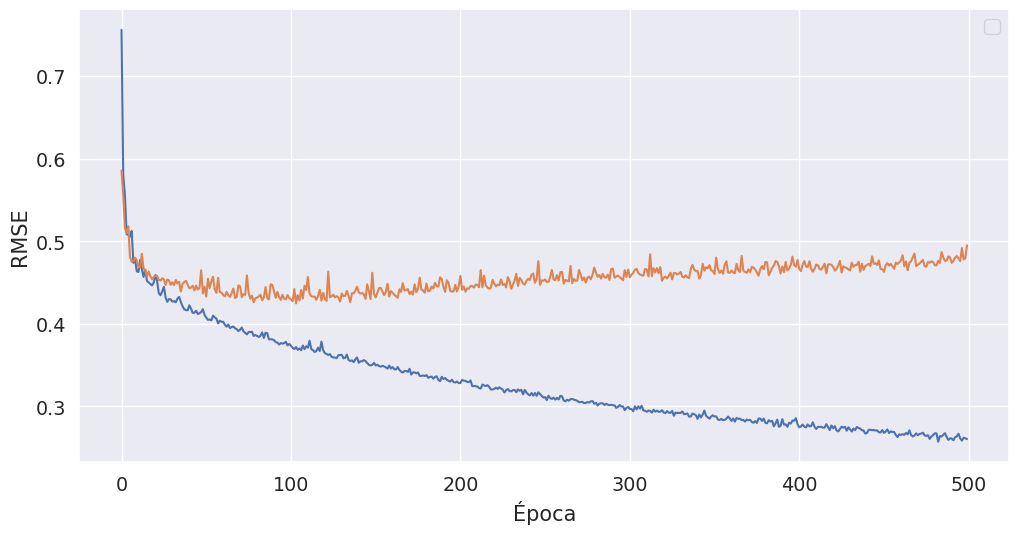

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 22s - loss: 1.2037

1728/6000 [=======>......................] - ETA: 0s - loss: 0.7009 

3488/6000 [================>.............] - ETA: 0s - loss: 0.8273

5280/6000 [=========================>....] - ETA: 0s - loss: 0.7306

6000/6000 [==============================] - 0s 63us/step - loss: 0.7034 - val_loss: 0.3925


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5612

1760/6000 [=======>......................] - ETA: 0s - loss: 0.4205

3520/6000 [================>.............] - ETA: 0s - loss: 0.4844

5248/6000 [=========================>....] - ETA: 0s - loss: 0.5087

6000/6000 [==============================] - 0s 41us/step - loss: 0.4952 - val_loss: 0.3472


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3445

1728/6000 [=======>......................] - ETA: 0s - loss: 0.4377

3456/6000 [================>.............] - ETA: 0s - loss: 0.4024

5184/6000 [========================>.....] - ETA: 0s - loss: 0.4020

6000/6000 [==============================] - 0s 41us/step - loss: 0.4016 - val_loss: 0.3010


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6745

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3423

3360/6000 [===============>..............] - ETA: 0s - loss: 0.3582

5056/6000 [========================>.....] - ETA: 0s - loss: 0.3488

6000/6000 [==============================] - 0s 41us/step - loss: 0.3578 - val_loss: 0.2815


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2101

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3221

3520/6000 [================>.............] - ETA: 0s - loss: 0.3271

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3242

6000/6000 [==============================] - 0s 40us/step - loss: 0.3334 - val_loss: 0.2665


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2683

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3553

3520/6000 [================>.............] - ETA: 0s - loss: 0.3320

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3327

6000/6000 [==============================] - 0s 41us/step - loss: 0.3247 - val_loss: 0.2527


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1690

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2698

3488/6000 [================>.............] - ETA: 0s - loss: 0.2867

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2878

6000/6000 [==============================] - 0s 40us/step - loss: 0.2858 - val_loss: 0.2478


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3677

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2756

3520/6000 [================>.............] - ETA: 0s - loss: 0.2858

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2798

6000/6000 [==============================] - 0s 40us/step - loss: 0.2754 - val_loss: 0.2367


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3619

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2898

3488/6000 [================>.............] - ETA: 0s - loss: 0.2842

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2834

6000/6000 [==============================] - 0s 40us/step - loss: 0.2799 - val_loss: 0.2342


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2396

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2979

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2851

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2791

6000/6000 [==============================] - 0s 41us/step - loss: 0.2733 - val_loss: 0.2294


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1393

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2513

3424/6000 [================>.............] - ETA: 0s - loss: 0.2709

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2693

6000/6000 [==============================] - 0s 41us/step - loss: 0.2720 - val_loss: 0.2354


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2766

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2782

3424/6000 [================>.............] - ETA: 0s - loss: 0.2708

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2696

6000/6000 [==============================] - 0s 41us/step - loss: 0.2668 - val_loss: 0.2242


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3124

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2807

3520/6000 [================>.............] - ETA: 0s - loss: 0.2633

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2662

6000/6000 [==============================] - 0s 40us/step - loss: 0.2615 - val_loss: 0.2264


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4323

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2706

3552/6000 [================>.............] - ETA: 0s - loss: 0.2619

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2600

6000/6000 [==============================] - 0s 40us/step - loss: 0.2565 - val_loss: 0.2231


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4899

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2867

3488/6000 [================>.............] - ETA: 0s - loss: 0.2654

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2660

6000/6000 [==============================] - 0s 40us/step - loss: 0.2658 - val_loss: 0.2344


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1292

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2374

3488/6000 [================>.............] - ETA: 0s - loss: 0.2480

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 41us/step - loss: 0.2531 - val_loss: 0.2289


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2223

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2398

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2423

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 41us/step - loss: 0.2523 - val_loss: 0.2257


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1879

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2773

3584/6000 [================>.............] - ETA: 0s - loss: 0.2514

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2522

6000/6000 [==============================] - 0s 40us/step - loss: 0.2521 - val_loss: 0.2211


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3294

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2445

3648/6000 [=================>............] - ETA: 0s - loss: 0.2417

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2536

6000/6000 [==============================] - 0s 39us/step - loss: 0.2525 - val_loss: 0.2164


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3597

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2272

3616/6000 [=================>............] - ETA: 0s - loss: 0.2357

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2431

6000/6000 [==============================] - 0s 39us/step - loss: 0.2435 - val_loss: 0.2219


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3960

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2609

3616/6000 [=================>............] - ETA: 0s - loss: 0.2471

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2469

6000/6000 [==============================] - 0s 40us/step - loss: 0.2418 - val_loss: 0.2123


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3388

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2368

3584/6000 [================>.............] - ETA: 0s - loss: 0.2417

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2407

6000/6000 [==============================] - 0s 40us/step - loss: 0.2441 - val_loss: 0.2119


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1538

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2235

3680/6000 [=================>............] - ETA: 0s - loss: 0.2394

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2407

6000/6000 [==============================] - 0s 39us/step - loss: 0.2418 - val_loss: 0.2139


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2576

3648/6000 [=================>............] - ETA: 0s - loss: 0.2474

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2461

6000/6000 [==============================] - 0s 39us/step - loss: 0.2456 - val_loss: 0.2125


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2373

3584/6000 [================>.............] - ETA: 0s - loss: 0.2452

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 38us/step - loss: 0.2376 - val_loss: 0.2129


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2219

3552/6000 [================>.............] - ETA: 0s - loss: 0.2327

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 39us/step - loss: 0.2345 - val_loss: 0.2135


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3552/6000 [================>.............] - ETA: 0s - loss: 0.2208

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 39us/step - loss: 0.2346 - val_loss: 0.2169


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2609

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2425

3712/6000 [=================>............] - ETA: 0s - loss: 0.2369

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 39us/step - loss: 0.2332 - val_loss: 0.2148


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0739

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2435

3520/6000 [================>.............] - ETA: 0s - loss: 0.2317

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 40us/step - loss: 0.2340 - val_loss: 0.2061


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3208

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2465

3616/6000 [=================>............] - ETA: 0s - loss: 0.2361

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 39us/step - loss: 0.2368 - val_loss: 0.2062


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2253

3616/6000 [=================>............] - ETA: 0s - loss: 0.2378

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 39us/step - loss: 0.2330 - val_loss: 0.2081


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1210

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2139

3584/6000 [================>.............] - ETA: 0s - loss: 0.2296

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 40us/step - loss: 0.2341 - val_loss: 0.2064


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2244

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2353

3616/6000 [=================>............] - ETA: 0s - loss: 0.2244

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 40us/step - loss: 0.2324 - val_loss: 0.2108


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2285

3584/6000 [================>.............] - ETA: 0s - loss: 0.2321

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2316

6000/6000 [==============================] - 0s 39us/step - loss: 0.2298 - val_loss: 0.2049


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2297

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2331

3616/6000 [=================>............] - ETA: 0s - loss: 0.2395

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 40us/step - loss: 0.2333 - val_loss: 0.2054


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2345

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2284

3584/6000 [================>.............] - ETA: 0s - loss: 0.2206

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 39us/step - loss: 0.2242 - val_loss: 0.2024


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3505

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2213

3616/6000 [=================>............] - ETA: 0s - loss: 0.2309

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2288

6000/6000 [==============================] - 0s 39us/step - loss: 0.2274 - val_loss: 0.2025


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3200

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2244

3616/6000 [=================>............] - ETA: 0s - loss: 0.2232

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 39us/step - loss: 0.2272 - val_loss: 0.2108


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2700

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2441

3616/6000 [=================>............] - ETA: 0s - loss: 0.2307

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 39us/step - loss: 0.2252 - val_loss: 0.2024


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4532

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2297

3552/6000 [================>.............] - ETA: 0s - loss: 0.2266

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 40us/step - loss: 0.2270 - val_loss: 0.2038


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0923

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2264

3520/6000 [================>.............] - ETA: 0s - loss: 0.2261

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 40us/step - loss: 0.2224 - val_loss: 0.1998


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2183

3584/6000 [================>.............] - ETA: 0s - loss: 0.2227

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 39us/step - loss: 0.2225 - val_loss: 0.2025


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1695

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2167

3584/6000 [================>.............] - ETA: 0s - loss: 0.2135

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 39us/step - loss: 0.2204 - val_loss: 0.1993


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6623

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2218

3584/6000 [================>.............] - ETA: 0s - loss: 0.2227

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 38us/step - loss: 0.2230 - val_loss: 0.2013


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2397

3648/6000 [=================>............] - ETA: 0s - loss: 0.2362

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 38us/step - loss: 0.2225 - val_loss: 0.1990


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2355

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2059

3616/6000 [=================>............] - ETA: 0s - loss: 0.2093

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 39us/step - loss: 0.2235 - val_loss: 0.2013


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2359

3552/6000 [================>.............] - ETA: 0s - loss: 0.2251

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 39us/step - loss: 0.2207 - val_loss: 0.2009


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2087

3584/6000 [================>.............] - ETA: 0s - loss: 0.2208

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2130

6000/6000 [==============================] - 0s 39us/step - loss: 0.2135 - val_loss: 0.2035


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6068

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2174

3552/6000 [================>.............] - ETA: 0s - loss: 0.2129

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 39us/step - loss: 0.2146 - val_loss: 0.2025


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2591

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2167

3584/6000 [================>.............] - ETA: 0s - loss: 0.2220

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 39us/step - loss: 0.2160 - val_loss: 0.1956


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4405

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2244

3584/6000 [================>.............] - ETA: 0s - loss: 0.2303

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 39us/step - loss: 0.2218 - val_loss: 0.1994


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3870

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2195

3584/6000 [================>.............] - ETA: 0s - loss: 0.2117

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 39us/step - loss: 0.2158 - val_loss: 0.1998


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1420

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2173

3552/6000 [================>.............] - ETA: 0s - loss: 0.2220

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 39us/step - loss: 0.2150 - val_loss: 0.1961


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2307

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2307

3616/6000 [=================>............] - ETA: 0s - loss: 0.2158

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 39us/step - loss: 0.2141 - val_loss: 0.1948


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2637

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2002

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2066

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2069

6000/6000 [==============================] - 0s 40us/step - loss: 0.2114 - val_loss: 0.1999


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1836

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2137

3488/6000 [================>.............] - ETA: 0s - loss: 0.2167

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 40us/step - loss: 0.2175 - val_loss: 0.1955


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2069

3584/6000 [================>.............] - ETA: 0s - loss: 0.2088

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2136

6000/6000 [==============================] - 0s 40us/step - loss: 0.2129 - val_loss: 0.1964


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2228

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2130

3584/6000 [================>.............] - ETA: 0s - loss: 0.2065

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2144

6000/6000 [==============================] - 0s 39us/step - loss: 0.2158 - val_loss: 0.1928


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2038

3616/6000 [=================>............] - ETA: 0s - loss: 0.2116

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 39us/step - loss: 0.2132 - val_loss: 0.2008


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2352

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2023

3584/6000 [================>.............] - ETA: 0s - loss: 0.2099

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2121

6000/6000 [==============================] - 0s 39us/step - loss: 0.2134 - val_loss: 0.1953


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1630

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2058

3648/6000 [=================>............] - ETA: 0s - loss: 0.2116

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2107

6000/6000 [==============================] - 0s 38us/step - loss: 0.2101 - val_loss: 0.1973


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2173

3616/6000 [=================>............] - ETA: 0s - loss: 0.2082

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2121

6000/6000 [==============================] - 0s 39us/step - loss: 0.2121 - val_loss: 0.2036


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1915

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2085

3648/6000 [=================>............] - ETA: 0s - loss: 0.2116

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2095

6000/6000 [==============================] - 0s 39us/step - loss: 0.2127 - val_loss: 0.1907


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2011

3616/6000 [=================>............] - ETA: 0s - loss: 0.2134

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2096

6000/6000 [==============================] - 0s 38us/step - loss: 0.2130 - val_loss: 0.1916


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1478

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2230

3648/6000 [=================>............] - ETA: 0s - loss: 0.2156

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 39us/step - loss: 0.2132 - val_loss: 0.1906


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1852

3584/6000 [================>.............] - ETA: 0s - loss: 0.2077

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2086

6000/6000 [==============================] - 0s 39us/step - loss: 0.2104 - val_loss: 0.1898


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1968

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2061

3584/6000 [================>.............] - ETA: 0s - loss: 0.2090

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 40us/step - loss: 0.2064 - val_loss: 0.1922


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2330

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1975

3552/6000 [================>.............] - ETA: 0s - loss: 0.2147

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 39us/step - loss: 0.2112 - val_loss: 0.1925


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2171

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2016

3648/6000 [=================>............] - ETA: 0s - loss: 0.2128

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2084

6000/6000 [==============================] - 0s 39us/step - loss: 0.2078 - val_loss: 0.1901


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2263

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1873

3680/6000 [=================>............] - ETA: 0s - loss: 0.2012

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2084

6000/6000 [==============================] - 0s 38us/step - loss: 0.2058 - val_loss: 0.1952


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2288

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2308

3584/6000 [================>.............] - ETA: 0s - loss: 0.2072

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2076

6000/6000 [==============================] - 0s 39us/step - loss: 0.2093 - val_loss: 0.1910


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2321

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2025

3424/6000 [================>.............] - ETA: 0s - loss: 0.2023

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2104

6000/6000 [==============================] - 0s 40us/step - loss: 0.2072 - val_loss: 0.1889


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1841

3712/6000 [=================>............] - ETA: 0s - loss: 0.2008

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2081

6000/6000 [==============================] - 0s 38us/step - loss: 0.2084 - val_loss: 0.1879


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2006

3648/6000 [=================>............] - ETA: 0s - loss: 0.2022

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2086

6000/6000 [==============================] - 0s 39us/step - loss: 0.2081 - val_loss: 0.1904


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0510

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2013

3552/6000 [================>.............] - ETA: 0s - loss: 0.1981

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 39us/step - loss: 0.2069 - val_loss: 0.1906


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2450

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2082

3616/6000 [=================>............] - ETA: 0s - loss: 0.2098

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 39us/step - loss: 0.2087 - val_loss: 0.1897


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2170

3616/6000 [=================>............] - ETA: 0s - loss: 0.2060

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 38us/step - loss: 0.2055 - val_loss: 0.1888


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2219

3648/6000 [=================>............] - ETA: 0s - loss: 0.2095

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 39us/step - loss: 0.2094 - val_loss: 0.1878


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3519

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2086

3648/6000 [=================>............] - ETA: 0s - loss: 0.2026

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2082

6000/6000 [==============================] - 0s 39us/step - loss: 0.2059 - val_loss: 0.1922


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0995

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2082

3552/6000 [================>.............] - ETA: 0s - loss: 0.2173

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2078

6000/6000 [==============================] - 0s 40us/step - loss: 0.2060 - val_loss: 0.1876


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3552/6000 [================>.............] - ETA: 0s - loss: 0.2008

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2042

6000/6000 [==============================] - 0s 40us/step - loss: 0.2042 - val_loss: 0.1864


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2475

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2160

3552/6000 [================>.............] - ETA: 0s - loss: 0.2072

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 39us/step - loss: 0.2055 - val_loss: 0.1869


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0882

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2127

3584/6000 [================>.............] - ETA: 0s - loss: 0.2019

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 39us/step - loss: 0.2044 - val_loss: 0.1896


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2088

3520/6000 [================>.............] - ETA: 0s - loss: 0.1939

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2018

6000/6000 [==============================] - 0s 40us/step - loss: 0.1983 - val_loss: 0.1921


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2181

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2009

3552/6000 [================>.............] - ETA: 0s - loss: 0.2032

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1994

6000/6000 [==============================] - 0s 40us/step - loss: 0.2060 - val_loss: 0.1966


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2062

3552/6000 [================>.............] - ETA: 0s - loss: 0.2048

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2081

6000/6000 [==============================] - 0s 40us/step - loss: 0.2055 - val_loss: 0.1881


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2068

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2029

3552/6000 [================>.............] - ETA: 0s - loss: 0.2003

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2038

6000/6000 [==============================] - 0s 39us/step - loss: 0.2036 - val_loss: 0.1937


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2076

3584/6000 [================>.............] - ETA: 0s - loss: 0.2018

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2022

6000/6000 [==============================] - 0s 39us/step - loss: 0.2038 - val_loss: 0.1918


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2081

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1857

3616/6000 [=================>............] - ETA: 0s - loss: 0.1997

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2027

6000/6000 [==============================] - 0s 39us/step - loss: 0.2026 - val_loss: 0.1883


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1152

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2041

3584/6000 [================>.............] - ETA: 0s - loss: 0.2044

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2044

6000/6000 [==============================] - 0s 39us/step - loss: 0.2032 - val_loss: 0.1880


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2040

3616/6000 [=================>............] - ETA: 0s - loss: 0.2023

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2009

6000/6000 [==============================] - 0s 38us/step - loss: 0.2027 - val_loss: 0.1883


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2536

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2046

3712/6000 [=================>............] - ETA: 0s - loss: 0.2109

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2057

6000/6000 [==============================] - 0s 39us/step - loss: 0.2045 - val_loss: 0.1867


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1953

3584/6000 [================>.............] - ETA: 0s - loss: 0.1972

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2050

6000/6000 [==============================] - 0s 40us/step - loss: 0.2044 - val_loss: 0.1876


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2206

3552/6000 [================>.............] - ETA: 0s - loss: 0.2206

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 39us/step - loss: 0.2078 - val_loss: 0.1884


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1783

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1875

3584/6000 [================>.............] - ETA: 0s - loss: 0.1919

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2026

6000/6000 [==============================] - 0s 39us/step - loss: 0.2023 - val_loss: 0.1875


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1508

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2026

3648/6000 [=================>............] - ETA: 0s - loss: 0.2131

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2055

6000/6000 [==============================] - 0s 39us/step - loss: 0.2031 - val_loss: 0.1880


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2038

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2058

3680/6000 [=================>............] - ETA: 0s - loss: 0.1983

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2003

6000/6000 [==============================] - 0s 38us/step - loss: 0.2020 - val_loss: 0.1870


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2447

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2029

3584/6000 [================>.............] - ETA: 0s - loss: 0.2028

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2007

6000/6000 [==============================] - 0s 39us/step - loss: 0.1977 - val_loss: 0.1861


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1990

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2041

3552/6000 [================>.............] - ETA: 0s - loss: 0.2027

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2010

6000/6000 [==============================] - 0s 39us/step - loss: 0.1992 - val_loss: 0.1897


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1886

3648/6000 [=================>............] - ETA: 0s - loss: 0.1937

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1981

6000/6000 [==============================] - 0s 39us/step - loss: 0.1964 - val_loss: 0.1874


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1070

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3616/6000 [=================>............] - ETA: 0s - loss: 0.2027

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2003

6000/6000 [==============================] - 0s 39us/step - loss: 0.2023 - val_loss: 0.1932


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1895

3616/6000 [=================>............] - ETA: 0s - loss: 0.1901

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 40us/step - loss: 0.1967 - val_loss: 0.1893


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1960

3648/6000 [=================>............] - ETA: 0s - loss: 0.1972

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 39us/step - loss: 0.1983 - val_loss: 0.1873


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3195

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1868

3616/6000 [=================>............] - ETA: 0s - loss: 0.1945

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 39us/step - loss: 0.1912 - val_loss: 0.1896


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2231

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1966

3616/6000 [=================>............] - ETA: 0s - loss: 0.1955

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2008

6000/6000 [==============================] - 0s 39us/step - loss: 0.2008 - val_loss: 0.1859


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1942

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1864

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1933

6000/6000 [==============================] - 0s 41us/step - loss: 0.1949 - val_loss: 0.1868


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2983

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1926

3680/6000 [=================>............] - ETA: 0s - loss: 0.1966

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1999

6000/6000 [==============================] - 0s 38us/step - loss: 0.2001 - val_loss: 0.1898


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2028

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1741

3584/6000 [================>.............] - ETA: 0s - loss: 0.1878

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 39us/step - loss: 0.1970 - val_loss: 0.1857


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1620

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2076

3584/6000 [================>.............] - ETA: 0s - loss: 0.1937

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1957

6000/6000 [==============================] - 0s 40us/step - loss: 0.1966 - val_loss: 0.1848


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2078

3584/6000 [================>.............] - ETA: 0s - loss: 0.2035

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2029

6000/6000 [==============================] - 0s 39us/step - loss: 0.2004 - val_loss: 0.1897


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2003

3616/6000 [=================>............] - ETA: 0s - loss: 0.1955

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 39us/step - loss: 0.1994 - val_loss: 0.1856


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2707

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1907

3584/6000 [================>.............] - ETA: 0s - loss: 0.1995

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2002

6000/6000 [==============================] - 0s 39us/step - loss: 0.1995 - val_loss: 0.1873


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2049

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1893

3648/6000 [=================>............] - ETA: 0s - loss: 0.1968

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1956

6000/6000 [==============================] - 0s 39us/step - loss: 0.1978 - val_loss: 0.1850


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2455

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2022

3584/6000 [================>.............] - ETA: 0s - loss: 0.1967

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 39us/step - loss: 0.1993 - val_loss: 0.1857


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1770

3712/6000 [=================>............] - ETA: 0s - loss: 0.1868

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 38us/step - loss: 0.1977 - val_loss: 0.1883


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2590

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1709

3648/6000 [=================>............] - ETA: 0s - loss: 0.1789

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 38us/step - loss: 0.1949 - val_loss: 0.1869


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2488

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1963

3680/6000 [=================>............] - ETA: 0s - loss: 0.1981

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2028

6000/6000 [==============================] - 0s 39us/step - loss: 0.2020 - val_loss: 0.1848


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1975

3648/6000 [=================>............] - ETA: 0s - loss: 0.1959

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 39us/step - loss: 0.1960 - val_loss: 0.1853


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2944

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1969

3648/6000 [=================>............] - ETA: 0s - loss: 0.2009

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1952

6000/6000 [==============================] - 0s 39us/step - loss: 0.1949 - val_loss: 0.1924


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3520/6000 [================>.............] - ETA: 0s - loss: 0.1865

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1919

6000/6000 [==============================] - 0s 40us/step - loss: 0.1947 - val_loss: 0.1907


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0945

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1764

3616/6000 [=================>............] - ETA: 0s - loss: 0.1849

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 39us/step - loss: 0.1918 - val_loss: 0.1914


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4907

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1879

3648/6000 [=================>............] - ETA: 0s - loss: 0.1994

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1992

6000/6000 [==============================] - 0s 40us/step - loss: 0.1982 - val_loss: 0.1862


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2265

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1835

3584/6000 [================>.............] - ETA: 0s - loss: 0.1915

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 40us/step - loss: 0.1894 - val_loss: 0.1856


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1393

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1950

3552/6000 [================>.............] - ETA: 0s - loss: 0.1876

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1936

6000/6000 [==============================] - 0s 40us/step - loss: 0.1946 - val_loss: 0.1867


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3264

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2025

3776/6000 [=================>............] - ETA: 0s - loss: 0.1912

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1962

6000/6000 [==============================] - 0s 38us/step - loss: 0.1957 - val_loss: 0.1859


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1813

3712/6000 [=================>............] - ETA: 0s - loss: 0.1903

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1999

6000/6000 [==============================] - 0s 39us/step - loss: 0.1990 - val_loss: 0.1832


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1115

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2121

3616/6000 [=================>............] - ETA: 0s - loss: 0.2004

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1990

6000/6000 [==============================] - 0s 39us/step - loss: 0.1978 - val_loss: 0.1857


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1846

3584/6000 [================>.............] - ETA: 0s - loss: 0.1833

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 40us/step - loss: 0.1928 - val_loss: 0.1932


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0978

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1929

3584/6000 [================>.............] - ETA: 0s - loss: 0.1948

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1964

6000/6000 [==============================] - 0s 40us/step - loss: 0.1945 - val_loss: 0.1868


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1858

3584/6000 [================>.............] - ETA: 0s - loss: 0.1893

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 40us/step - loss: 0.1915 - val_loss: 0.1849


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1981

3584/6000 [================>.............] - ETA: 0s - loss: 0.1874

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 39us/step - loss: 0.1906 - val_loss: 0.1857


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1864

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1932

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1944

6000/6000 [==============================] - 0s 40us/step - loss: 0.1959 - val_loss: 0.1851


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2233

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1927

3648/6000 [=================>............] - ETA: 0s - loss: 0.2004

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 39us/step - loss: 0.1959 - val_loss: 0.1905


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2173

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1915

3520/6000 [================>.............] - ETA: 0s - loss: 0.1892

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 39us/step - loss: 0.1948 - val_loss: 0.1847


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2181

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2034

3552/6000 [================>.............] - ETA: 0s - loss: 0.1953

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 40us/step - loss: 0.1930 - val_loss: 0.1844


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3573

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1930

3616/6000 [=================>............] - ETA: 0s - loss: 0.1949

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 39us/step - loss: 0.1939 - val_loss: 0.1850


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1896

3584/6000 [================>.............] - ETA: 0s - loss: 0.1931

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1918

6000/6000 [==============================] - 0s 39us/step - loss: 0.1935 - val_loss: 0.1856


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4351

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1831

3744/6000 [=================>............] - ETA: 0s - loss: 0.1873

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1938

6000/6000 [==============================] - 0s 38us/step - loss: 0.1917 - val_loss: 0.1892


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1485

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1909

3648/6000 [=================>............] - ETA: 0s - loss: 0.1927

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1890

6000/6000 [==============================] - 0s 39us/step - loss: 0.1921 - val_loss: 0.1883


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1882

3680/6000 [=================>............] - ETA: 0s - loss: 0.1851

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 39us/step - loss: 0.1925 - val_loss: 0.1849


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1862

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1818

3616/6000 [=================>............] - ETA: 0s - loss: 0.1877

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 39us/step - loss: 0.1941 - val_loss: 0.1825


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1965

3616/6000 [=================>............] - ETA: 0s - loss: 0.2069

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2055

6000/6000 [==============================] - 0s 39us/step - loss: 0.2020 - val_loss: 0.1861


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2010

3680/6000 [=================>............] - ETA: 0s - loss: 0.1871

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 38us/step - loss: 0.1918 - val_loss: 0.1866


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1976

3648/6000 [=================>............] - ETA: 0s - loss: 0.1966

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 39us/step - loss: 0.1919 - val_loss: 0.1872


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2293

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1862

3616/6000 [=================>............] - ETA: 0s - loss: 0.1864

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 39us/step - loss: 0.1896 - val_loss: 0.1821


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1867

3616/6000 [=================>............] - ETA: 0s - loss: 0.1872

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 39us/step - loss: 0.1909 - val_loss: 0.1859


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1475

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1924

3680/6000 [=================>............] - ETA: 0s - loss: 0.1847

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 38us/step - loss: 0.1934 - val_loss: 0.1849


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1751

3520/6000 [================>.............] - ETA: 0s - loss: 0.1775

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 40us/step - loss: 0.1915 - val_loss: 0.1828


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4288

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1891

3680/6000 [=================>............] - ETA: 0s - loss: 0.1902

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 38us/step - loss: 0.1916 - val_loss: 0.1808


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2002

3616/6000 [=================>............] - ETA: 0s - loss: 0.1958

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 39us/step - loss: 0.1893 - val_loss: 0.1823


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1956

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1889

3616/6000 [=================>............] - ETA: 0s - loss: 0.1983

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 39us/step - loss: 0.1946 - val_loss: 0.1848


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1410

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1875

3584/6000 [================>.............] - ETA: 0s - loss: 0.1842

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 39us/step - loss: 0.1885 - val_loss: 0.1825


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1946

3680/6000 [=================>............] - ETA: 0s - loss: 0.1938

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 38us/step - loss: 0.1915 - val_loss: 0.1856


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3552/6000 [================>.............] - ETA: 0s - loss: 0.1856

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 39us/step - loss: 0.1911 - val_loss: 0.1858


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2259

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1868

3616/6000 [=================>............] - ETA: 0s - loss: 0.1935

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1971

6000/6000 [==============================] - 0s 39us/step - loss: 0.1971 - val_loss: 0.1819


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1917

3552/6000 [================>.............] - ETA: 0s - loss: 0.1906

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 40us/step - loss: 0.1892 - val_loss: 0.1873


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1174

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3744/6000 [=================>............] - ETA: 0s - loss: 0.1858

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 39us/step - loss: 0.1864 - val_loss: 0.1850


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2721

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1899

3648/6000 [=================>............] - ETA: 0s - loss: 0.1882

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1862

6000/6000 [==============================] - 0s 39us/step - loss: 0.1876 - val_loss: 0.1858


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1849

3648/6000 [=================>............] - ETA: 0s - loss: 0.1911

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 39us/step - loss: 0.1913 - val_loss: 0.1899


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1702

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1787

3712/6000 [=================>............] - ETA: 0s - loss: 0.1914

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 38us/step - loss: 0.1909 - val_loss: 0.1822


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1975

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1874

3584/6000 [================>.............] - ETA: 0s - loss: 0.1921

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1953

6000/6000 [==============================] - 0s 39us/step - loss: 0.1952 - val_loss: 0.1851


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1943

3552/6000 [================>.............] - ETA: 0s - loss: 0.1831

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 39us/step - loss: 0.1894 - val_loss: 0.1858


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2300

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1900

3584/6000 [================>.............] - ETA: 0s - loss: 0.1990

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 39us/step - loss: 0.1931 - val_loss: 0.1882


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1915

3616/6000 [=================>............] - ETA: 0s - loss: 0.1964

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 39us/step - loss: 0.1943 - val_loss: 0.1851


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1933

3616/6000 [=================>............] - ETA: 0s - loss: 0.1848

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 39us/step - loss: 0.1904 - val_loss: 0.1843


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1717

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1911

3616/6000 [=================>............] - ETA: 0s - loss: 0.1935

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1880

6000/6000 [==============================] - 0s 39us/step - loss: 0.1891 - val_loss: 0.1862


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1761

3680/6000 [=================>............] - ETA: 0s - loss: 0.1871

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 38us/step - loss: 0.1868 - val_loss: 0.1876


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1998

3680/6000 [=================>............] - ETA: 0s - loss: 0.1893

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 39us/step - loss: 0.1902 - val_loss: 0.1866


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1793

3744/6000 [=================>............] - ETA: 0s - loss: 0.1877

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 39us/step - loss: 0.1848 - val_loss: 0.1874


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1713

3616/6000 [=================>............] - ETA: 0s - loss: 0.1803

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 38us/step - loss: 0.1889 - val_loss: 0.1864


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1750

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1949

3680/6000 [=================>............] - ETA: 0s - loss: 0.1962

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1895

6000/6000 [==============================] - 0s 38us/step - loss: 0.1902 - val_loss: 0.1850


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2353

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1758

3680/6000 [=================>............] - ETA: 0s - loss: 0.1812

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1880

6000/6000 [==============================] - 0s 38us/step - loss: 0.1875 - val_loss: 0.1807


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1910

3648/6000 [=================>............] - ETA: 0s - loss: 0.1917

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 39us/step - loss: 0.1922 - val_loss: 0.1867


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1881

3712/6000 [=================>............] - ETA: 0s - loss: 0.1870

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 38us/step - loss: 0.1884 - val_loss: 0.1835


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1789

3616/6000 [=================>............] - ETA: 0s - loss: 0.1801

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 38us/step - loss: 0.1860 - val_loss: 0.1836


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1816

3616/6000 [=================>............] - ETA: 0s - loss: 0.1821

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 39us/step - loss: 0.1832 - val_loss: 0.1834


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1929

3648/6000 [=================>............] - ETA: 0s - loss: 0.1926

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 39us/step - loss: 0.1864 - val_loss: 0.1853


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1655

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1946

3648/6000 [=================>............] - ETA: 0s - loss: 0.1893

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 39us/step - loss: 0.1873 - val_loss: 0.1825


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2578

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1924

3616/6000 [=================>............] - ETA: 0s - loss: 0.1868

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1867

6000/6000 [==============================] - 0s 39us/step - loss: 0.1877 - val_loss: 0.1881


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1887

3648/6000 [=================>............] - ETA: 0s - loss: 0.1847

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 39us/step - loss: 0.1886 - val_loss: 0.1820


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2523

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1980

3680/6000 [=================>............] - ETA: 0s - loss: 0.1925

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1925

6000/6000 [==============================] - 0s 38us/step - loss: 0.1915 - val_loss: 0.1847


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1849

3648/6000 [=================>............] - ETA: 0s - loss: 0.1844

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 38us/step - loss: 0.1872 - val_loss: 0.1812


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1790

3648/6000 [=================>............] - ETA: 0s - loss: 0.1838

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 38us/step - loss: 0.1862 - val_loss: 0.1870


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1876

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1876

3584/6000 [================>.............] - ETA: 0s - loss: 0.1943

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 39us/step - loss: 0.1870 - val_loss: 0.1811


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1874

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1923

3616/6000 [=================>............] - ETA: 0s - loss: 0.1930

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 39us/step - loss: 0.1850 - val_loss: 0.1842


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1719

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1818

3616/6000 [=================>............] - ETA: 0s - loss: 0.1875

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1903

6000/6000 [==============================] - 0s 39us/step - loss: 0.1887 - val_loss: 0.1823


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3026

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1864

3616/6000 [=================>............] - ETA: 0s - loss: 0.1853

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 39us/step - loss: 0.1868 - val_loss: 0.1806


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1919

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1895

3680/6000 [=================>............] - ETA: 0s - loss: 0.1849

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1866

6000/6000 [==============================] - 0s 38us/step - loss: 0.1846 - val_loss: 0.1817


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1978

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1969

3648/6000 [=================>............] - ETA: 0s - loss: 0.1886

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 38us/step - loss: 0.1856 - val_loss: 0.1821


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2214

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1767

3648/6000 [=================>............] - ETA: 0s - loss: 0.1858

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 40us/step - loss: 0.1854 - val_loss: 0.1819


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1667

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1770

3584/6000 [================>.............] - ETA: 0s - loss: 0.1850

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1867

6000/6000 [==============================] - 0s 39us/step - loss: 0.1855 - val_loss: 0.1839


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2256

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1977

3680/6000 [=================>............] - ETA: 0s - loss: 0.1895

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 38us/step - loss: 0.1868 - val_loss: 0.1878


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4938

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1890

3584/6000 [================>.............] - ETA: 0s - loss: 0.1967

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2083

6000/6000 [==============================] - 0s 40us/step - loss: 0.2002 - val_loss: 0.1813


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1885

3584/6000 [================>.............] - ETA: 0s - loss: 0.1858

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 39us/step - loss: 0.1854 - val_loss: 0.1853


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1792

3520/6000 [================>.............] - ETA: 0s - loss: 0.1895

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 39us/step - loss: 0.1865 - val_loss: 0.1894


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2046

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1787

3584/6000 [================>.............] - ETA: 0s - loss: 0.1854

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 39us/step - loss: 0.1853 - val_loss: 0.1815


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4084

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1883

3648/6000 [=================>............] - ETA: 0s - loss: 0.1917

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 39us/step - loss: 0.1877 - val_loss: 0.1815


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2835

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1772

3584/6000 [================>.............] - ETA: 0s - loss: 0.1817

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 39us/step - loss: 0.1846 - val_loss: 0.1828


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1866

3584/6000 [================>.............] - ETA: 0s - loss: 0.1950

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 39us/step - loss: 0.1876 - val_loss: 0.1819


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1977

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1876

3584/6000 [================>.............] - ETA: 0s - loss: 0.1905

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 39us/step - loss: 0.1855 - val_loss: 0.1853


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3264

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1667

3616/6000 [=================>............] - ETA: 0s - loss: 0.1804

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 39us/step - loss: 0.1831 - val_loss: 0.1810


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1866

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1755

3552/6000 [================>.............] - ETA: 0s - loss: 0.1764

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 40us/step - loss: 0.1853 - val_loss: 0.1798


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1653

3648/6000 [=================>............] - ETA: 0s - loss: 0.1765

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 39us/step - loss: 0.1830 - val_loss: 0.1884


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2282

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2005

3584/6000 [================>.............] - ETA: 0s - loss: 0.1928

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1862

6000/6000 [==============================] - 0s 39us/step - loss: 0.1853 - val_loss: 0.1857


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1433

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1800

3584/6000 [================>.............] - ETA: 0s - loss: 0.1844

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 39us/step - loss: 0.1877 - val_loss: 0.1820


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1764

3584/6000 [================>.............] - ETA: 0s - loss: 0.1808

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 40us/step - loss: 0.1826 - val_loss: 0.1842


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1732

3648/6000 [=================>............] - ETA: 0s - loss: 0.1852

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 39us/step - loss: 0.1863 - val_loss: 0.1876


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4348

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1929

3584/6000 [================>.............] - ETA: 0s - loss: 0.1922

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 40us/step - loss: 0.1852 - val_loss: 0.1837


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1794

3424/6000 [================>.............] - ETA: 0s - loss: 0.1815

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 40us/step - loss: 0.1864 - val_loss: 0.1838


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3081

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1888

3680/6000 [=================>............] - ETA: 0s - loss: 0.1831

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 39us/step - loss: 0.1809 - val_loss: 0.1804


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2122

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1914

3680/6000 [=================>............] - ETA: 0s - loss: 0.1864

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 38us/step - loss: 0.1850 - val_loss: 0.1828


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1786

3552/6000 [================>.............] - ETA: 0s - loss: 0.1810

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 40us/step - loss: 0.1841 - val_loss: 0.1830


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1645

3584/6000 [================>.............] - ETA: 0s - loss: 0.1844

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 39us/step - loss: 0.1855 - val_loss: 0.1836


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3610

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1769

3648/6000 [=================>............] - ETA: 0s - loss: 0.1815

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 38us/step - loss: 0.1818 - val_loss: 0.1845


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1929

3680/6000 [=================>............] - ETA: 0s - loss: 0.1819

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 38us/step - loss: 0.1808 - val_loss: 0.1816


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2328

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1913

3584/6000 [================>.............] - ETA: 0s - loss: 0.1844

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 39us/step - loss: 0.1815 - val_loss: 0.1812


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2525

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1831

3552/6000 [================>.............] - ETA: 0s - loss: 0.1713

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 40us/step - loss: 0.1821 - val_loss: 0.1804


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2150

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1883

3584/6000 [================>.............] - ETA: 0s - loss: 0.1800

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 40us/step - loss: 0.1860 - val_loss: 0.1801


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1620

3616/6000 [=================>............] - ETA: 0s - loss: 0.1741

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 39us/step - loss: 0.1821 - val_loss: 0.1815


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1913

3648/6000 [=================>............] - ETA: 0s - loss: 0.1827

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 39us/step - loss: 0.1833 - val_loss: 0.1816


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2323

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1870

3584/6000 [================>.............] - ETA: 0s - loss: 0.1889

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 38us/step - loss: 0.1817 - val_loss: 0.1823


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1357

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1973

3552/6000 [================>.............] - ETA: 0s - loss: 0.1835

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 40us/step - loss: 0.1880 - val_loss: 0.1845


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0544

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1954

3616/6000 [=================>............] - ETA: 0s - loss: 0.1879

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 39us/step - loss: 0.1879 - val_loss: 0.1795


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0899

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1799

3584/6000 [================>.............] - ETA: 0s - loss: 0.1774

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 39us/step - loss: 0.1804 - val_loss: 0.1799


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1860

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1888

3712/6000 [=================>............] - ETA: 0s - loss: 0.1810

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 39us/step - loss: 0.1769 - val_loss: 0.1831


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0956

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1728

3648/6000 [=================>............] - ETA: 0s - loss: 0.1784

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 39us/step - loss: 0.1817 - val_loss: 0.1789


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1395

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1730

3648/6000 [=================>............] - ETA: 0s - loss: 0.1787

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 39us/step - loss: 0.1816 - val_loss: 0.1807


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2007

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1868

3424/6000 [================>.............] - ETA: 0s - loss: 0.1831

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 40us/step - loss: 0.1821 - val_loss: 0.1808


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1819

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1895

3616/6000 [=================>............] - ETA: 0s - loss: 0.1801

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 40us/step - loss: 0.1838 - val_loss: 0.1813


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3552/6000 [================>.............] - ETA: 0s - loss: 0.1845

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 39us/step - loss: 0.1842 - val_loss: 0.1831


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1802

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1858

3648/6000 [=================>............] - ETA: 0s - loss: 0.1877

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 39us/step - loss: 0.1847 - val_loss: 0.1833


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2111

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1851

3552/6000 [================>.............] - ETA: 0s - loss: 0.1826

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 40us/step - loss: 0.1843 - val_loss: 0.1827


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1683

3616/6000 [=================>............] - ETA: 0s - loss: 0.1729

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 39us/step - loss: 0.1772 - val_loss: 0.1833


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1245

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1863

3648/6000 [=================>............] - ETA: 0s - loss: 0.1889

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 38us/step - loss: 0.1813 - val_loss: 0.1787


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1795

3616/6000 [=================>............] - ETA: 0s - loss: 0.1802

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 40us/step - loss: 0.1824 - val_loss: 0.1823


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1753

3584/6000 [================>.............] - ETA: 0s - loss: 0.1778

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 39us/step - loss: 0.1802 - val_loss: 0.1806


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1737

3648/6000 [=================>............] - ETA: 0s - loss: 0.1731

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 39us/step - loss: 0.1798 - val_loss: 0.1822


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2014

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1654

3648/6000 [=================>............] - ETA: 0s - loss: 0.1777

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 39us/step - loss: 0.1816 - val_loss: 0.1825


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1784

3552/6000 [================>.............] - ETA: 0s - loss: 0.1791

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 39us/step - loss: 0.1838 - val_loss: 0.1790


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1890

3584/6000 [================>.............] - ETA: 0s - loss: 0.1745

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 39us/step - loss: 0.1782 - val_loss: 0.1805


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1740

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1732

3584/6000 [================>.............] - ETA: 0s - loss: 0.1789

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 38us/step - loss: 0.1867 - val_loss: 0.1816


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1767

3680/6000 [=================>............] - ETA: 0s - loss: 0.1810

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 38us/step - loss: 0.1828 - val_loss: 0.1819


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2697

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1812

3648/6000 [=================>............] - ETA: 0s - loss: 0.1816

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 39us/step - loss: 0.1800 - val_loss: 0.1814


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1750

3680/6000 [=================>............] - ETA: 0s - loss: 0.1867

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 39us/step - loss: 0.1822 - val_loss: 0.1801


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1802

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1784

3552/6000 [================>.............] - ETA: 0s - loss: 0.1713

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 40us/step - loss: 0.1813 - val_loss: 0.1887


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1760

3552/6000 [================>.............] - ETA: 0s - loss: 0.1772

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 40us/step - loss: 0.1842 - val_loss: 0.1832


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1192

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1727

3680/6000 [=================>............] - ETA: 0s - loss: 0.1782

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 39us/step - loss: 0.1770 - val_loss: 0.1793


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1775

3552/6000 [================>.............] - ETA: 0s - loss: 0.1796

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 39us/step - loss: 0.1780 - val_loss: 0.1831


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2323

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1830

3680/6000 [=================>............] - ETA: 0s - loss: 0.1800

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1847

6000/6000 [==============================] - 0s 39us/step - loss: 0.1834 - val_loss: 0.1802


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0787

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1884

3616/6000 [=================>............] - ETA: 0s - loss: 0.1835

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 39us/step - loss: 0.1808 - val_loss: 0.1812


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1323

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1881

3712/6000 [=================>............] - ETA: 0s - loss: 0.1869

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 38us/step - loss: 0.1816 - val_loss: 0.1790


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2755

3680/6000 [=================>............] - ETA: 0s - loss: 0.2337

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 39us/step - loss: 0.2117 - val_loss: 0.1801


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2458

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1695

3584/6000 [================>.............] - ETA: 0s - loss: 0.1865

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 39us/step - loss: 0.1858 - val_loss: 0.1795


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1912

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1817

3616/6000 [=================>............] - ETA: 0s - loss: 0.1828

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 38us/step - loss: 0.1815 - val_loss: 0.1805


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2769

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1805

3616/6000 [=================>............] - ETA: 0s - loss: 0.1792

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 39us/step - loss: 0.1787 - val_loss: 0.1816


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1867

3584/6000 [================>.............] - ETA: 0s - loss: 0.1837

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 39us/step - loss: 0.1793 - val_loss: 0.1784


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2183

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1835

3744/6000 [=================>............] - ETA: 0s - loss: 0.1853

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 38us/step - loss: 0.1833 - val_loss: 0.1801


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1690

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1742

3552/6000 [================>.............] - ETA: 0s - loss: 0.1807

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 39us/step - loss: 0.1824 - val_loss: 0.1794


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2302

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1809

3680/6000 [=================>............] - ETA: 0s - loss: 0.1831

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 38us/step - loss: 0.1810 - val_loss: 0.1785


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0721

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1681

3648/6000 [=================>............] - ETA: 0s - loss: 0.1668

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 39us/step - loss: 0.1848 - val_loss: 0.1800


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1366

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1815

3616/6000 [=================>............] - ETA: 0s - loss: 0.1803

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 39us/step - loss: 0.1814 - val_loss: 0.1815


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1642

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1929

3616/6000 [=================>............] - ETA: 0s - loss: 0.1869

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 39us/step - loss: 0.1827 - val_loss: 0.1775


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1752

3552/6000 [================>.............] - ETA: 0s - loss: 0.1801

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 39us/step - loss: 0.1783 - val_loss: 0.1819


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1866

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1825

3680/6000 [=================>............] - ETA: 0s - loss: 0.1825

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 39us/step - loss: 0.1795 - val_loss: 0.1855


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1766

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1786

3584/6000 [================>.............] - ETA: 0s - loss: 0.1763

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 40us/step - loss: 0.1770 - val_loss: 0.1826


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1749

3616/6000 [=================>............] - ETA: 0s - loss: 0.1835

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 39us/step - loss: 0.1788 - val_loss: 0.1798


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1707

3680/6000 [=================>............] - ETA: 0s - loss: 0.1734

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 38us/step - loss: 0.1788 - val_loss: 0.1804


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2155

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1766

3584/6000 [================>.............] - ETA: 0s - loss: 0.1784

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 39us/step - loss: 0.1821 - val_loss: 0.1795


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2605

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1840

3552/6000 [================>.............] - ETA: 0s - loss: 0.1852

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 40us/step - loss: 0.1821 - val_loss: 0.1807


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1844

3680/6000 [=================>............] - ETA: 0s - loss: 0.1860

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 38us/step - loss: 0.1830 - val_loss: 0.1826


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0498

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1707

3744/6000 [=================>............] - ETA: 0s - loss: 0.1830

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 38us/step - loss: 0.1800 - val_loss: 0.1792


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1620

3584/6000 [================>.............] - ETA: 0s - loss: 0.1743

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 40us/step - loss: 0.1772 - val_loss: 0.1796


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1226

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1612

3616/6000 [=================>............] - ETA: 0s - loss: 0.1785

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 39us/step - loss: 0.1824 - val_loss: 0.1820


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1702

3648/6000 [=================>............] - ETA: 0s - loss: 0.1742

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 39us/step - loss: 0.1764 - val_loss: 0.1812


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1487

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1783

3648/6000 [=================>............] - ETA: 0s - loss: 0.1768

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 39us/step - loss: 0.1764 - val_loss: 0.1810


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1679

3552/6000 [================>.............] - ETA: 0s - loss: 0.1756

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 39us/step - loss: 0.1790 - val_loss: 0.1794


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1914

3616/6000 [=================>............] - ETA: 0s - loss: 0.1850

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 39us/step - loss: 0.1770 - val_loss: 0.1815


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1910

3680/6000 [=================>............] - ETA: 0s - loss: 0.1778

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 39us/step - loss: 0.1798 - val_loss: 0.1816


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1664

3616/6000 [=================>............] - ETA: 0s - loss: 0.1724

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 39us/step - loss: 0.1816 - val_loss: 0.1841


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1717

3680/6000 [=================>............] - ETA: 0s - loss: 0.1772

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 39us/step - loss: 0.1774 - val_loss: 0.1803


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2737

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1717

3616/6000 [=================>............] - ETA: 0s - loss: 0.1703

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 38us/step - loss: 0.1795 - val_loss: 0.1828


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2033

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1804

3648/6000 [=================>............] - ETA: 0s - loss: 0.1877

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 38us/step - loss: 0.1830 - val_loss: 0.1809


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0885

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1712

3584/6000 [================>.............] - ETA: 0s - loss: 0.1645

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 38us/step - loss: 0.1806 - val_loss: 0.1812


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1198

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1790

3648/6000 [=================>............] - ETA: 0s - loss: 0.1790

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 39us/step - loss: 0.1797 - val_loss: 0.1818


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1993

3616/6000 [=================>............] - ETA: 0s - loss: 0.1814

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 39us/step - loss: 0.1806 - val_loss: 0.1828


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1893

3616/6000 [=================>............] - ETA: 0s - loss: 0.1868

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 40us/step - loss: 0.1827 - val_loss: 0.1837


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2531

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1689

3616/6000 [=================>............] - ETA: 0s - loss: 0.1792

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 39us/step - loss: 0.1784 - val_loss: 0.1789


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1850

3616/6000 [=================>............] - ETA: 0s - loss: 0.1880

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 38us/step - loss: 0.1801 - val_loss: 0.1829


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1846

3712/6000 [=================>............] - ETA: 0s - loss: 0.1793

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 38us/step - loss: 0.1794 - val_loss: 0.1815


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1744

3680/6000 [=================>............] - ETA: 0s - loss: 0.1762

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 39us/step - loss: 0.1773 - val_loss: 0.1819


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1492

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1906

3616/6000 [=================>............] - ETA: 0s - loss: 0.1820

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 39us/step - loss: 0.1804 - val_loss: 0.1802


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1812

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1734

3584/6000 [================>.............] - ETA: 0s - loss: 0.1792

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 39us/step - loss: 0.1769 - val_loss: 0.1882


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2612

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3552/6000 [================>.............] - ETA: 0s - loss: 0.1717

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 39us/step - loss: 0.1818 - val_loss: 0.1827


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4439

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1631

3520/6000 [================>.............] - ETA: 0s - loss: 0.1705

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 40us/step - loss: 0.1751 - val_loss: 0.1847


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1784

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1923

3552/6000 [================>.............] - ETA: 0s - loss: 0.1757

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 39us/step - loss: 0.1750 - val_loss: 0.1855


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1763

3584/6000 [================>.............] - ETA: 0s - loss: 0.1800

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 40us/step - loss: 0.1785 - val_loss: 0.1820


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2134

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1877

3584/6000 [================>.............] - ETA: 0s - loss: 0.1891

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 39us/step - loss: 0.1815 - val_loss: 0.1802


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1976

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1773

3680/6000 [=================>............] - ETA: 0s - loss: 0.1852

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 38us/step - loss: 0.1808 - val_loss: 0.1825


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1371

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1761

3584/6000 [================>.............] - ETA: 0s - loss: 0.1798

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 38us/step - loss: 0.1762 - val_loss: 0.1848


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1781

3776/6000 [=================>............] - ETA: 0s - loss: 0.1779

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 38us/step - loss: 0.1796 - val_loss: 0.1807


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1456

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1545

3680/6000 [=================>............] - ETA: 0s - loss: 0.1681

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 38us/step - loss: 0.1753 - val_loss: 0.1846


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1645

3616/6000 [=================>............] - ETA: 0s - loss: 0.1760

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 39us/step - loss: 0.1826 - val_loss: 0.1840


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1902

3584/6000 [================>.............] - ETA: 0s - loss: 0.1807

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 39us/step - loss: 0.1786 - val_loss: 0.1835


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2565

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3616/6000 [=================>............] - ETA: 0s - loss: 0.1867

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 38us/step - loss: 0.1825 - val_loss: 0.1810


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1330

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1936

3616/6000 [=================>............] - ETA: 0s - loss: 0.1812

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 39us/step - loss: 0.1783 - val_loss: 0.1837


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1366

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1803

3744/6000 [=================>............] - ETA: 0s - loss: 0.1798

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 38us/step - loss: 0.1826 - val_loss: 0.1809


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1750

3584/6000 [================>.............] - ETA: 0s - loss: 0.1725

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 39us/step - loss: 0.1785 - val_loss: 0.1835


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1106

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1762

3680/6000 [=================>............] - ETA: 0s - loss: 0.1732

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 38us/step - loss: 0.1740 - val_loss: 0.1808


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2193

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1772

3680/6000 [=================>............] - ETA: 0s - loss: 0.1809

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 38us/step - loss: 0.1802 - val_loss: 0.1779


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1887

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1801

3648/6000 [=================>............] - ETA: 0s - loss: 0.1751

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 39us/step - loss: 0.1735 - val_loss: 0.1820


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1840

3648/6000 [=================>............] - ETA: 0s - loss: 0.1765

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 39us/step - loss: 0.1772 - val_loss: 0.1805


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0938

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1694

3456/6000 [================>.............] - ETA: 0s - loss: 0.1746

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 40us/step - loss: 0.1789 - val_loss: 0.1807


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2757

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1815

3648/6000 [=================>............] - ETA: 0s - loss: 0.1822

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 39us/step - loss: 0.1845 - val_loss: 0.1822


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1722

3744/6000 [=================>............] - ETA: 0s - loss: 0.1738

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 38us/step - loss: 0.1766 - val_loss: 0.1797


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3081

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1717

3616/6000 [=================>............] - ETA: 0s - loss: 0.1759

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 39us/step - loss: 0.1792 - val_loss: 0.1845


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1052

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1757

3616/6000 [=================>............] - ETA: 0s - loss: 0.1819

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 39us/step - loss: 0.1760 - val_loss: 0.1831


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1926

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1710

3648/6000 [=================>............] - ETA: 0s - loss: 0.1737

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 38us/step - loss: 0.1773 - val_loss: 0.1803


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0914

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1793

3584/6000 [================>.............] - ETA: 0s - loss: 0.1729

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 38us/step - loss: 0.1775 - val_loss: 0.1813


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1726

3584/6000 [================>.............] - ETA: 0s - loss: 0.1777

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 39us/step - loss: 0.1770 - val_loss: 0.1846


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1685

3712/6000 [=================>............] - ETA: 0s - loss: 0.1845

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 38us/step - loss: 0.1830 - val_loss: 0.1835


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1680

3680/6000 [=================>............] - ETA: 0s - loss: 0.1748

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 39us/step - loss: 0.1767 - val_loss: 0.1858


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1662

3712/6000 [=================>............] - ETA: 0s - loss: 0.1694

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 38us/step - loss: 0.1739 - val_loss: 0.1845


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1502

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1762

3648/6000 [=================>............] - ETA: 0s - loss: 0.1772

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 39us/step - loss: 0.1767 - val_loss: 0.1829


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1702

3680/6000 [=================>............] - ETA: 0s - loss: 0.1766

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 38us/step - loss: 0.1775 - val_loss: 0.1846


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2392

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1707

3584/6000 [================>.............] - ETA: 0s - loss: 0.1694

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 40us/step - loss: 0.1757 - val_loss: 0.1825


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1899

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1774

3552/6000 [================>.............] - ETA: 0s - loss: 0.1742

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 39us/step - loss: 0.1750 - val_loss: 0.1837


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3584/6000 [================>.............] - ETA: 0s - loss: 0.1782

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 39us/step - loss: 0.1780 - val_loss: 0.1821


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1773

3616/6000 [=================>............] - ETA: 0s - loss: 0.1731

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 39us/step - loss: 0.1754 - val_loss: 0.1817


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0918

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1717

3648/6000 [=================>............] - ETA: 0s - loss: 0.1717

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 39us/step - loss: 0.1758 - val_loss: 0.1829


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1706

3744/6000 [=================>............] - ETA: 0s - loss: 0.1792

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 38us/step - loss: 0.1761 - val_loss: 0.1828


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1857

3584/6000 [================>.............] - ETA: 0s - loss: 0.1829

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 39us/step - loss: 0.1799 - val_loss: 0.1853


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1709

3680/6000 [=================>............] - ETA: 0s - loss: 0.1679

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1685

6000/6000 [==============================] - 0s 38us/step - loss: 0.1725 - val_loss: 0.1807


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1617

3584/6000 [================>.............] - ETA: 0s - loss: 0.1707

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 39us/step - loss: 0.1694 - val_loss: 0.1801


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2138

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1861

3616/6000 [=================>............] - ETA: 0s - loss: 0.1782

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 39us/step - loss: 0.1730 - val_loss: 0.1831


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1725

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1728

3616/6000 [=================>............] - ETA: 0s - loss: 0.1768

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 39us/step - loss: 0.1787 - val_loss: 0.1815


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1659

3616/6000 [=================>............] - ETA: 0s - loss: 0.1668

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 39us/step - loss: 0.1720 - val_loss: 0.1803


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1579

3552/6000 [================>.............] - ETA: 0s - loss: 0.1700

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 39us/step - loss: 0.1721 - val_loss: 0.1818


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1585

3648/6000 [=================>............] - ETA: 0s - loss: 0.1694

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 39us/step - loss: 0.1762 - val_loss: 0.1799


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1736

3712/6000 [=================>............] - ETA: 0s - loss: 0.1788

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 38us/step - loss: 0.1781 - val_loss: 0.1842


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1737

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1660

3712/6000 [=================>............] - ETA: 0s - loss: 0.1827

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 38us/step - loss: 0.1762 - val_loss: 0.1821


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2467

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1598

3584/6000 [================>.............] - ETA: 0s - loss: 0.1704

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 39us/step - loss: 0.1751 - val_loss: 0.1802


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1745

3648/6000 [=================>............] - ETA: 0s - loss: 0.1745

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 38us/step - loss: 0.1734 - val_loss: 0.1874


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0935

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1783

3680/6000 [=================>............] - ETA: 0s - loss: 0.1732

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 39us/step - loss: 0.1716 - val_loss: 0.1865


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2286

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1867

3520/6000 [================>.............] - ETA: 0s - loss: 0.1817

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 40us/step - loss: 0.1761 - val_loss: 0.1835


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1850

3584/6000 [================>.............] - ETA: 0s - loss: 0.1851

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 39us/step - loss: 0.1771 - val_loss: 0.1818


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1872

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1716

3680/6000 [=================>............] - ETA: 0s - loss: 0.1783

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 39us/step - loss: 0.1732 - val_loss: 0.1817


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2303

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1702

3680/6000 [=================>............] - ETA: 0s - loss: 0.1688

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1755 - val_loss: 0.1811


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2808

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1644

3584/6000 [================>.............] - ETA: 0s - loss: 0.1800

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 39us/step - loss: 0.1730 - val_loss: 0.1783


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1670

3552/6000 [================>.............] - ETA: 0s - loss: 0.1738

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 39us/step - loss: 0.1745 - val_loss: 0.1824


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1887

3552/6000 [================>.............] - ETA: 0s - loss: 0.1769

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 39us/step - loss: 0.1722 - val_loss: 0.1839


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1786

3552/6000 [================>.............] - ETA: 0s - loss: 0.1765

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 39us/step - loss: 0.1732 - val_loss: 0.1819


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1537

3584/6000 [================>.............] - ETA: 0s - loss: 0.1632

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 39us/step - loss: 0.1713 - val_loss: 0.1803


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1599

3584/6000 [================>.............] - ETA: 0s - loss: 0.1646

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 40us/step - loss: 0.1911 - val_loss: 0.1867


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1774

3584/6000 [================>.............] - ETA: 0s - loss: 0.1722

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 39us/step - loss: 0.1701 - val_loss: 0.1796


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2706

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1784

3616/6000 [=================>............] - ETA: 0s - loss: 0.1747

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 39us/step - loss: 0.1785 - val_loss: 0.1857


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1758

3616/6000 [=================>............] - ETA: 0s - loss: 0.1778

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 39us/step - loss: 0.1780 - val_loss: 0.1841


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1291

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1833

3712/6000 [=================>............] - ETA: 0s - loss: 0.1809

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 38us/step - loss: 0.1751 - val_loss: 0.1865


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1848

3616/6000 [=================>............] - ETA: 0s - loss: 0.1790

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 39us/step - loss: 0.1762 - val_loss: 0.1809


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2990

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1694

3584/6000 [================>.............] - ETA: 0s - loss: 0.1682

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 39us/step - loss: 0.1718 - val_loss: 0.1803


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1748

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1796

3584/6000 [================>.............] - ETA: 0s - loss: 0.1754

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 39us/step - loss: 0.1749 - val_loss: 0.1824


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1591

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3744/6000 [=================>............] - ETA: 0s - loss: 0.1787

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 39us/step - loss: 0.1796 - val_loss: 0.1805


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3616/6000 [=================>............] - ETA: 0s - loss: 0.1660

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 39us/step - loss: 0.1768 - val_loss: 0.1805


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1648

3616/6000 [=================>............] - ETA: 0s - loss: 0.1699

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 39us/step - loss: 0.1710 - val_loss: 0.1793


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1637

3456/6000 [================>.............] - ETA: 0s - loss: 0.1713

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 39us/step - loss: 0.1688 - val_loss: 0.1846


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1797

3552/6000 [================>.............] - ETA: 0s - loss: 0.1782

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 39us/step - loss: 0.1741 - val_loss: 0.1800


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1983

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1692

3584/6000 [================>.............] - ETA: 0s - loss: 0.1758

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 38us/step - loss: 0.1743 - val_loss: 0.1823


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2177

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1662

3712/6000 [=================>............] - ETA: 0s - loss: 0.1738

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 38us/step - loss: 0.1730 - val_loss: 0.1798


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1936

3552/6000 [================>.............] - ETA: 0s - loss: 0.1766

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 39us/step - loss: 0.1739 - val_loss: 0.1854


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1759

3712/6000 [=================>............] - ETA: 0s - loss: 0.1749

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 38us/step - loss: 0.1756 - val_loss: 0.1817


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1574

3584/6000 [================>.............] - ETA: 0s - loss: 0.1660

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 39us/step - loss: 0.1715 - val_loss: 0.1812


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1803

3712/6000 [=================>............] - ETA: 0s - loss: 0.1825

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 39us/step - loss: 0.1736 - val_loss: 0.1857


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1365

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1648

3616/6000 [=================>............] - ETA: 0s - loss: 0.1720

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 38us/step - loss: 0.1712 - val_loss: 0.1833


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1650

3712/6000 [=================>............] - ETA: 0s - loss: 0.1702

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 38us/step - loss: 0.1730 - val_loss: 0.1859


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1725

3648/6000 [=================>............] - ETA: 0s - loss: 0.1745

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 39us/step - loss: 0.1750 - val_loss: 0.1815


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1700

3680/6000 [=================>............] - ETA: 0s - loss: 0.1716

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 38us/step - loss: 0.1708 - val_loss: 0.1788


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2183

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1707

3680/6000 [=================>............] - ETA: 0s - loss: 0.1712

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 38us/step - loss: 0.1767 - val_loss: 0.1879


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1719

3584/6000 [================>.............] - ETA: 0s - loss: 0.1823

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 39us/step - loss: 0.1735 - val_loss: 0.1824


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1673

3552/6000 [================>.............] - ETA: 0s - loss: 0.1656

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 39us/step - loss: 0.1742 - val_loss: 0.1844


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1915

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1622

3616/6000 [=================>............] - ETA: 0s - loss: 0.1653

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 40us/step - loss: 0.1707 - val_loss: 0.1842


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1308

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1725

3616/6000 [=================>............] - ETA: 0s - loss: 0.1668

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 38us/step - loss: 0.1659 - val_loss: 0.1814


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1733

3616/6000 [=================>............] - ETA: 0s - loss: 0.1754

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 39us/step - loss: 0.1746 - val_loss: 0.1861


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1478

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1737

3584/6000 [================>.............] - ETA: 0s - loss: 0.1710

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 39us/step - loss: 0.1736 - val_loss: 0.1822


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1635

3584/6000 [================>.............] - ETA: 0s - loss: 0.1710

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 39us/step - loss: 0.1739 - val_loss: 0.1816


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1804

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1910

3584/6000 [================>.............] - ETA: 0s - loss: 0.1765

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 39us/step - loss: 0.1792 - val_loss: 0.1860


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1041

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1688

3552/6000 [================>.............] - ETA: 0s - loss: 0.1749

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 40us/step - loss: 0.1747 - val_loss: 0.1800


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1633

3616/6000 [=================>............] - ETA: 0s - loss: 0.1722

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 39us/step - loss: 0.1698 - val_loss: 0.1797


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1114

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1630

3520/6000 [================>.............] - ETA: 0s - loss: 0.1667

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 39us/step - loss: 0.1712 - val_loss: 0.1808


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1609

3680/6000 [=================>............] - ETA: 0s - loss: 0.1707

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 39us/step - loss: 0.1694 - val_loss: 0.1828


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1835

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1698

3584/6000 [================>.............] - ETA: 0s - loss: 0.1752

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 40us/step - loss: 0.1760 - val_loss: 0.1825


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1701

3456/6000 [================>.............] - ETA: 0s - loss: 0.1646

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 40us/step - loss: 0.1725 - val_loss: 0.1857


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2180

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1762

3648/6000 [=================>............] - ETA: 0s - loss: 0.1766

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 38us/step - loss: 0.1739 - val_loss: 0.1788


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2096

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1674

3648/6000 [=================>............] - ETA: 0s - loss: 0.1703

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 39us/step - loss: 0.1673 - val_loss: 0.1808


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2893

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1705

3648/6000 [=================>............] - ETA: 0s - loss: 0.1710

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 39us/step - loss: 0.1705 - val_loss: 0.1848


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1679

3616/6000 [=================>............] - ETA: 0s - loss: 0.1726

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 38us/step - loss: 0.1680 - val_loss: 0.1808


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1755

3680/6000 [=================>............] - ETA: 0s - loss: 0.1685

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 38us/step - loss: 0.1733 - val_loss: 0.1785


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1661

3616/6000 [=================>............] - ETA: 0s - loss: 0.1655

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 39us/step - loss: 0.1698 - val_loss: 0.1807


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1590

3616/6000 [=================>............] - ETA: 0s - loss: 0.1712

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 39us/step - loss: 0.1737 - val_loss: 0.1823


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1572

3616/6000 [=================>............] - ETA: 0s - loss: 0.1692

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 40us/step - loss: 0.1743 - val_loss: 0.1840


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1634

3584/6000 [================>.............] - ETA: 0s - loss: 0.1691

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1649

6000/6000 [==============================] - 0s 39us/step - loss: 0.1674 - val_loss: 0.1810


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1701

3584/6000 [================>.............] - ETA: 0s - loss: 0.1699

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 39us/step - loss: 0.1742 - val_loss: 0.1827


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2081

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1545

3456/6000 [================>.............] - ETA: 0s - loss: 0.1619

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 40us/step - loss: 0.1690 - val_loss: 0.1791


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2223

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1784

3584/6000 [================>.............] - ETA: 0s - loss: 0.1766

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 39us/step - loss: 0.1716 - val_loss: 0.1786


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1737

3648/6000 [=================>............] - ETA: 0s - loss: 0.1734

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 39us/step - loss: 0.1704 - val_loss: 0.1824


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1402

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1700

3584/6000 [================>.............] - ETA: 0s - loss: 0.1719

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 39us/step - loss: 0.1686 - val_loss: 0.1791


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1765

3680/6000 [=================>............] - ETA: 0s - loss: 0.1739

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 39us/step - loss: 0.1724 - val_loss: 0.1802


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1555

3616/6000 [=================>............] - ETA: 0s - loss: 0.1676

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 39us/step - loss: 0.1708 - val_loss: 0.1819


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1225

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1840

3648/6000 [=================>............] - ETA: 0s - loss: 0.1763

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 39us/step - loss: 0.1745 - val_loss: 0.1846


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1724

3552/6000 [================>.............] - ETA: 0s - loss: 0.1708

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 40us/step - loss: 0.1697 - val_loss: 0.1778


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1735

3584/6000 [================>.............] - ETA: 0s - loss: 0.1691

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 38us/step - loss: 0.1674 - val_loss: 0.1792


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3030

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1811

3616/6000 [=================>............] - ETA: 0s - loss: 0.1803

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 39us/step - loss: 0.1739 - val_loss: 0.1800


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2456

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1559

3584/6000 [================>.............] - ETA: 0s - loss: 0.1692

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 39us/step - loss: 0.1712 - val_loss: 0.1830


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6876

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1804

3648/6000 [=================>............] - ETA: 0s - loss: 0.1781

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 39us/step - loss: 0.1724 - val_loss: 0.1847


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1611

3648/6000 [=================>............] - ETA: 0s - loss: 0.1663

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 38us/step - loss: 0.1698 - val_loss: 0.1813


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1406

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1698

3584/6000 [================>.............] - ETA: 0s - loss: 0.1713

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 39us/step - loss: 0.1698 - val_loss: 0.1819


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1781

3584/6000 [================>.............] - ETA: 0s - loss: 0.1713

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 40us/step - loss: 0.1736 - val_loss: 0.1832


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2389

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1689

3584/6000 [================>.............] - ETA: 0s - loss: 0.1726

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 39us/step - loss: 0.1701 - val_loss: 0.1833


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2436

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1713

3680/6000 [=================>............] - ETA: 0s - loss: 0.1679

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 38us/step - loss: 0.1719 - val_loss: 0.1866


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1773

3648/6000 [=================>............] - ETA: 0s - loss: 0.1770

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 39us/step - loss: 0.1710 - val_loss: 0.1822


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2211

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1972

3584/6000 [================>.............] - ETA: 0s - loss: 0.1837

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 39us/step - loss: 0.1746 - val_loss: 0.1817


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1767

3744/6000 [=================>............] - ETA: 0s - loss: 0.1784

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 38us/step - loss: 0.1711 - val_loss: 0.1799


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1749

3712/6000 [=================>............] - ETA: 0s - loss: 0.1650

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 38us/step - loss: 0.1695 - val_loss: 0.1824


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1594

3648/6000 [=================>............] - ETA: 0s - loss: 0.1626

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 39us/step - loss: 0.1684 - val_loss: 0.1798


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2121

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3648/6000 [=================>............] - ETA: 0s - loss: 0.1723

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 38us/step - loss: 0.1710 - val_loss: 0.1823


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2788

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1725

3680/6000 [=================>............] - ETA: 0s - loss: 0.1672

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 39us/step - loss: 0.1702 - val_loss: 0.1810


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1691

3680/6000 [=================>............] - ETA: 0s - loss: 0.1784

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 38us/step - loss: 0.1717 - val_loss: 0.1797


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1810

3744/6000 [=================>............] - ETA: 0s - loss: 0.1706

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1643

6000/6000 [==============================] - 0s 39us/step - loss: 0.1658 - val_loss: 0.1803


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1582

3648/6000 [=================>............] - ETA: 0s - loss: 0.1627

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 39us/step - loss: 0.1652 - val_loss: 0.1820


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1420

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1750

3712/6000 [=================>............] - ETA: 0s - loss: 0.1652

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 38us/step - loss: 0.1663 - val_loss: 0.1813


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0512

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1633

3712/6000 [=================>............] - ETA: 0s - loss: 0.1685

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 38us/step - loss: 0.1719 - val_loss: 0.1795


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1090

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1625

3680/6000 [=================>............] - ETA: 0s - loss: 0.1694

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 38us/step - loss: 0.1702 - val_loss: 0.1818


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0677

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1832

3616/6000 [=================>............] - ETA: 0s - loss: 0.1788

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 39us/step - loss: 0.1748 - val_loss: 0.1797


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3035

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1719

3648/6000 [=================>............] - ETA: 0s - loss: 0.1726

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 39us/step - loss: 0.1710 - val_loss: 0.1828


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1931

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1737

3648/6000 [=================>............] - ETA: 0s - loss: 0.1669

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 39us/step - loss: 0.1678 - val_loss: 0.1791


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1686

3680/6000 [=================>............] - ETA: 0s - loss: 0.1653

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 39us/step - loss: 0.1721 - val_loss: 0.1784


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1777

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1698

3680/6000 [=================>............] - ETA: 0s - loss: 0.1719

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 39us/step - loss: 0.1684 - val_loss: 0.1806


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2711

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1671

3552/6000 [================>.............] - ETA: 0s - loss: 0.1724

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 39us/step - loss: 0.1717 - val_loss: 0.1786


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1831

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1681

3680/6000 [=================>............] - ETA: 0s - loss: 0.1720

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 39us/step - loss: 0.1720 - val_loss: 0.1812


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1604

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1763

3648/6000 [=================>............] - ETA: 0s - loss: 0.1720

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 39us/step - loss: 0.1714 - val_loss: 0.1811


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1773

3744/6000 [=================>............] - ETA: 0s - loss: 0.1725

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 38us/step - loss: 0.1673 - val_loss: 0.1805


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1793

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1700

3616/6000 [=================>............] - ETA: 0s - loss: 0.1679

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 40us/step - loss: 0.1703 - val_loss: 0.1814


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1801

3648/6000 [=================>............] - ETA: 0s - loss: 0.1726

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 39us/step - loss: 0.1723 - val_loss: 0.1827


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1731

3584/6000 [================>.............] - ETA: 0s - loss: 0.1728

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 39us/step - loss: 0.1702 - val_loss: 0.1791


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1718

3680/6000 [=================>............] - ETA: 0s - loss: 0.1706

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 38us/step - loss: 0.1712 - val_loss: 0.1800


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2257

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1724

3680/6000 [=================>............] - ETA: 0s - loss: 0.1716

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 39us/step - loss: 0.1711 - val_loss: 0.1820


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0795

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1611

3552/6000 [================>.............] - ETA: 0s - loss: 0.1626

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 39us/step - loss: 0.1694 - val_loss: 0.1837


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1518

3616/6000 [=================>............] - ETA: 0s - loss: 0.1659

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 39us/step - loss: 0.1668 - val_loss: 0.1847


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3091

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3616/6000 [=================>............] - ETA: 0s - loss: 0.1727

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 38us/step - loss: 0.1668 - val_loss: 0.1797


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1792

3680/6000 [=================>............] - ETA: 0s - loss: 0.1764

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 38us/step - loss: 0.1703 - val_loss: 0.1798


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1809

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3648/6000 [=================>............] - ETA: 0s - loss: 0.1703

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 38us/step - loss: 0.1712 - val_loss: 0.1832


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1172

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1627

3616/6000 [=================>............] - ETA: 0s - loss: 0.1640

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 39us/step - loss: 0.1672 - val_loss: 0.1822


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2120

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1641

3648/6000 [=================>............] - ETA: 0s - loss: 0.1735

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 38us/step - loss: 0.1694 - val_loss: 0.1820


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2295

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1654

3680/6000 [=================>............] - ETA: 0s - loss: 0.1690

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 39us/step - loss: 0.1705 - val_loss: 0.1832


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1681

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1664

3584/6000 [================>.............] - ETA: 0s - loss: 0.1701

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 39us/step - loss: 0.1690 - val_loss: 0.1809


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2070

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1756

3616/6000 [=================>............] - ETA: 0s - loss: 0.1640

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 38us/step - loss: 0.1688 - val_loss: 0.1806


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1604

3648/6000 [=================>............] - ETA: 0s - loss: 0.1578

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 39us/step - loss: 0.1669 - val_loss: 0.1816


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1736

3712/6000 [=================>............] - ETA: 0s - loss: 0.1633

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 38us/step - loss: 0.1661 - val_loss: 0.1800


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1659

3648/6000 [=================>............] - ETA: 0s - loss: 0.1605

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 39us/step - loss: 0.1677 - val_loss: 0.1812


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1472

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1608

3648/6000 [=================>............] - ETA: 0s - loss: 0.1714

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 38us/step - loss: 0.1656 - val_loss: 0.1836


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0421

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1565

3616/6000 [=================>............] - ETA: 0s - loss: 0.1646

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 39us/step - loss: 0.1695 - val_loss: 0.1820


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0644

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1648

3616/6000 [=================>............] - ETA: 0s - loss: 0.1690

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1651

6000/6000 [==============================] - 0s 39us/step - loss: 0.1658 - val_loss: 0.1799


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1539

3648/6000 [=================>............] - ETA: 0s - loss: 0.1664

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 38us/step - loss: 0.1672 - val_loss: 0.1846


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1661

3616/6000 [=================>............] - ETA: 0s - loss: 0.1602

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 38us/step - loss: 0.1679 - val_loss: 0.1806


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0782

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1648

3584/6000 [================>.............] - ETA: 0s - loss: 0.1698

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 40us/step - loss: 0.1680 - val_loss: 0.1818


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1535

3616/6000 [=================>............] - ETA: 0s - loss: 0.1658

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1671

6000/6000 [==============================] - 0s 38us/step - loss: 0.1670 - val_loss: 0.1825


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3712

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1670

3648/6000 [=================>............] - ETA: 0s - loss: 0.1693

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 39us/step - loss: 0.1687 - val_loss: 0.1829


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1771

3648/6000 [=================>............] - ETA: 0s - loss: 0.1704

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 39us/step - loss: 0.1689 - val_loss: 0.1805


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0711

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1643

3648/6000 [=================>............] - ETA: 0s - loss: 0.1630

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 40us/step - loss: 0.1819 - val_loss: 0.1798


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1229

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1644

3680/6000 [=================>............] - ETA: 0s - loss: 0.1675

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 39us/step - loss: 0.1691 - val_loss: 0.1841


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1488

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1741

3648/6000 [=================>............] - ETA: 0s - loss: 0.1671

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 39us/step - loss: 0.1662 - val_loss: 0.1773


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1499

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1576

3680/6000 [=================>............] - ETA: 0s - loss: 0.1652

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 38us/step - loss: 0.1681 - val_loss: 0.1795


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1724

3648/6000 [=================>............] - ETA: 0s - loss: 0.1705

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 38us/step - loss: 0.1701 - val_loss: 0.1849


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1719

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1742

3648/6000 [=================>............] - ETA: 0s - loss: 0.1727

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 39us/step - loss: 0.1684 - val_loss: 0.1809


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2887

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1675

3616/6000 [=================>............] - ETA: 0s - loss: 0.1695

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 38us/step - loss: 0.1682 - val_loss: 0.1845


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2129

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1685

3584/6000 [================>.............] - ETA: 0s - loss: 0.1704

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 39us/step - loss: 0.1657 - val_loss: 0.1841


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1693

3584/6000 [================>.............] - ETA: 0s - loss: 0.1676

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 39us/step - loss: 0.1664 - val_loss: 0.1840


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5608

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3584/6000 [================>.............] - ETA: 0s - loss: 0.1776

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 39us/step - loss: 0.1724 - val_loss: 0.1807


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1297

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1732

3616/6000 [=================>............] - ETA: 0s - loss: 0.1745

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 39us/step - loss: 0.1722 - val_loss: 0.1813


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1722

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1672

3552/6000 [================>.............] - ETA: 0s - loss: 0.1669

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 39us/step - loss: 0.1671 - val_loss: 0.1835


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1741

3584/6000 [================>.............] - ETA: 0s - loss: 0.1695

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 38us/step - loss: 0.1666 - val_loss: 0.1789


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2262

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1759

3552/6000 [================>.............] - ETA: 0s - loss: 0.1738

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 39us/step - loss: 0.1665 - val_loss: 0.1845


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1588

3680/6000 [=================>............] - ETA: 0s - loss: 0.1615

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 39us/step - loss: 0.1657 - val_loss: 0.1795


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1610

3648/6000 [=================>............] - ETA: 0s - loss: 0.1694

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 40us/step - loss: 0.1712 - val_loss: 0.1796


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2320

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1859

3520/6000 [================>.............] - ETA: 0s - loss: 0.1755

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 40us/step - loss: 0.1712 - val_loss: 0.1814


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1309

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1597

3584/6000 [================>.............] - ETA: 0s - loss: 0.1601

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 39us/step - loss: 0.1666 - val_loss: 0.1817


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0958

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1620

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1700

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 40us/step - loss: 0.1655 - val_loss: 0.1841


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2578

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1731

3584/6000 [================>.............] - ETA: 0s - loss: 0.1744

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 39us/step - loss: 0.1690 - val_loss: 0.1806


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1630

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1678

3616/6000 [=================>............] - ETA: 0s - loss: 0.1723

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 39us/step - loss: 0.1719 - val_loss: 0.1856


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1619

3648/6000 [=================>............] - ETA: 0s - loss: 0.1599

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1639

6000/6000 [==============================] - 0s 39us/step - loss: 0.1684 - val_loss: 0.1836


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1583

3744/6000 [=================>............] - ETA: 0s - loss: 0.1639

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 38us/step - loss: 0.1626 - val_loss: 0.1812


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1411

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1687

3616/6000 [=================>............] - ETA: 0s - loss: 0.1661

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 40us/step - loss: 0.1675 - val_loss: 0.1776


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1610

3584/6000 [================>.............] - ETA: 0s - loss: 0.1632

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1653

6000/6000 [==============================] - 0s 39us/step - loss: 0.1659 - val_loss: 0.1801


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1803

3584/6000 [================>.............] - ETA: 0s - loss: 0.1657

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 39us/step - loss: 0.1650 - val_loss: 0.1802


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1825

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1682

3424/6000 [================>.............] - ETA: 0s - loss: 0.1684

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 39us/step - loss: 0.1664 - val_loss: 0.1786


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1064

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1684

3584/6000 [================>.............] - ETA: 0s - loss: 0.1579

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1627

6000/6000 [==============================] - 0s 40us/step - loss: 0.1626 - val_loss: 0.1824


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1395

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1787

3616/6000 [=================>............] - ETA: 0s - loss: 0.1698

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 39us/step - loss: 0.1713 - val_loss: 0.1753


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0738

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1574

3584/6000 [================>.............] - ETA: 0s - loss: 0.1624

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 39us/step - loss: 0.1638 - val_loss: 0.1787


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1826

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1574

3776/6000 [=================>............] - ETA: 0s - loss: 0.1564

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1651

6000/6000 [==============================] - 0s 38us/step - loss: 0.1686 - val_loss: 0.1795


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2521

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1495

3648/6000 [=================>............] - ETA: 0s - loss: 0.1576

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 39us/step - loss: 0.1623 - val_loss: 0.1808


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1729

3744/6000 [=================>............] - ETA: 0s - loss: 0.1638

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 38us/step - loss: 0.1706 - val_loss: 0.1778


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2831

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1715

3680/6000 [=================>............] - ETA: 0s - loss: 0.1736

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 38us/step - loss: 0.1686 - val_loss: 0.1790


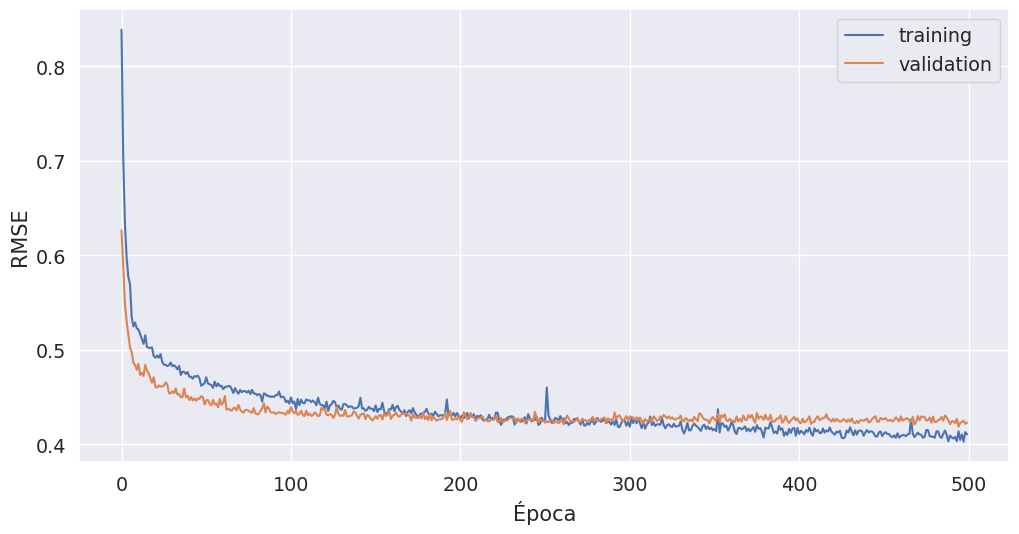

In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 15s - loss: 1.6949

1888/6000 [========>.....................] - ETA: 0s - loss: 1.2906 

3840/6000 [==================>...........] - ETA: 0s - loss: 1.1552

5888/6000 [============================>.] - ETA: 0s - loss: 1.0638

6000/6000 [==============================] - 0s 52us/step - loss: 1.0623 - val_loss: 0.7985


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6563

2048/6000 [=========>....................] - ETA: 0s - loss: 0.7925

4032/6000 [===================>..........] - ETA: 0s - loss: 0.8071

6000/6000 [==============================] - 0s 34us/step - loss: 0.7658 - val_loss: 0.6431


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5452

2048/6000 [=========>....................] - ETA: 0s - loss: 0.6396

4128/6000 [===================>..........] - ETA: 0s - loss: 0.6279

6000/6000 [==============================] - 0s 34us/step - loss: 0.6108 - val_loss: 0.5620


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6112

2080/6000 [=========>....................] - ETA: 0s - loss: 0.5569

4064/6000 [===================>..........] - ETA: 0s - loss: 0.5772

6000/6000 [==============================] - 0s 34us/step - loss: 0.5760 - val_loss: 0.4990


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3483

2080/6000 [=========>....................] - ETA: 0s - loss: 0.5168

4160/6000 [===================>..........] - ETA: 0s - loss: 0.4933

6000/6000 [==============================] - 0s 34us/step - loss: 0.4888 - val_loss: 0.4601


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4517

2016/6000 [=========>....................] - ETA: 0s - loss: 0.4452

4032/6000 [===================>..........] - ETA: 0s - loss: 0.4542

6000/6000 [==============================] - 0s 35us/step - loss: 0.4520 - val_loss: 0.4412


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6386

2080/6000 [=========>....................] - ETA: 0s - loss: 0.4308

4160/6000 [===================>..........] - ETA: 0s - loss: 0.4232

6000/6000 [==============================] - 0s 34us/step - loss: 0.4254 - val_loss: 0.4055


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6826

2080/6000 [=========>....................] - ETA: 0s - loss: 0.4254

4160/6000 [===================>..........] - ETA: 0s - loss: 0.4205

6000/6000 [==============================] - 0s 34us/step - loss: 0.4113 - val_loss: 0.3966


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3602

2048/6000 [=========>....................] - ETA: 0s - loss: 0.4035

4032/6000 [===================>..........] - ETA: 0s - loss: 0.3937

6000/6000 [==============================] - 0s 35us/step - loss: 0.3908 - val_loss: 0.3756


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3135

2080/6000 [=========>....................] - ETA: 0s - loss: 0.4386

4160/6000 [===================>..........] - ETA: 0s - loss: 0.4050

6000/6000 [==============================] - 0s 34us/step - loss: 0.3898 - val_loss: 0.3616


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4597

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3688

4128/6000 [===================>..........] - ETA: 0s - loss: 0.3676

6000/6000 [==============================] - 0s 34us/step - loss: 0.3672 - val_loss: 0.3746


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3578

2112/6000 [=========>....................] - ETA: 0s - loss: 0.3540

4192/6000 [===================>..........] - ETA: 0s - loss: 0.3572

6000/6000 [==============================] - 0s 33us/step - loss: 0.3515 - val_loss: 0.3455


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2015

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3590

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3502

5984/6000 [============================>.] - ETA: 0s - loss: 0.3456

6000/6000 [==============================] - 0s 35us/step - loss: 0.3453 - val_loss: 0.3451


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2024

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3401

4192/6000 [===================>..........] - ETA: 0s - loss: 0.3373

6000/6000 [==============================] - 0s 34us/step - loss: 0.3373 - val_loss: 0.3271


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4015

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3242

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3318

6000/6000 [==============================] - 0s 34us/step - loss: 0.3288 - val_loss: 0.3262


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1629

2112/6000 [=========>....................] - ETA: 0s - loss: 0.3133

4192/6000 [===================>..........] - ETA: 0s - loss: 0.3182

6000/6000 [==============================] - 0s 34us/step - loss: 0.3236 - val_loss: 0.3236


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2836

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3295

4032/6000 [===================>..........] - ETA: 0s - loss: 0.3276

6000/6000 [==============================] - 0s 34us/step - loss: 0.3257 - val_loss: 0.3164


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7781

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3209

3904/6000 [==================>...........] - ETA: 0s - loss: 0.3184

5888/6000 [============================>.] - ETA: 0s - loss: 0.3150

6000/6000 [==============================] - 0s 35us/step - loss: 0.3145 - val_loss: 0.3172


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3021

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3151

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3116

6000/6000 [==============================] - 0s 34us/step - loss: 0.3127 - val_loss: 0.3135


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3001

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2887

4128/6000 [===================>..........] - ETA: 0s - loss: 0.3077

6000/6000 [==============================] - 0s 34us/step - loss: 0.3087 - val_loss: 0.3037


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2888

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3060

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3034

6000/6000 [==============================] - 0s 34us/step - loss: 0.3081 - val_loss: 0.3184


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3161

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3117

4032/6000 [===================>..........] - ETA: 0s - loss: 0.3038

6000/6000 [==============================] - 0s 34us/step - loss: 0.3079 - val_loss: 0.2985


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3186

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2722

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2971

6000/6000 [==============================] - 0s 34us/step - loss: 0.3030 - val_loss: 0.3144


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3207

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3099

4128/6000 [===================>..........] - ETA: 0s - loss: 0.3074

6000/6000 [==============================] - 0s 34us/step - loss: 0.3015 - val_loss: 0.2953


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2455

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3028

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3005

6000/6000 [==============================] - 0s 34us/step - loss: 0.2992 - val_loss: 0.2941


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5377

1984/6000 [========>.....................] - ETA: 0s - loss: 0.3069

3936/6000 [==================>...........] - ETA: 0s - loss: 0.3036

5952/6000 [============================>.] - ETA: 0s - loss: 0.2982

6000/6000 [==============================] - 0s 35us/step - loss: 0.2986 - val_loss: 0.2984


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2854

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2938

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3018

6000/6000 [==============================] - 0s 35us/step - loss: 0.2995 - val_loss: 0.2948


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4464

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2950

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2869

6000/6000 [==============================] - 0s 34us/step - loss: 0.2965 - val_loss: 0.2988


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2574

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3021

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2924

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2916

6000/6000 [==============================] - 0s 37us/step - loss: 0.2924 - val_loss: 0.2889


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2291

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3034

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3050

6000/6000 [==============================] - 0s 34us/step - loss: 0.2923 - val_loss: 0.2882


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3346

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2945

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2963

6000/6000 [==============================] - 0s 34us/step - loss: 0.2916 - val_loss: 0.2995


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1826

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2934

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2964

6000/6000 [==============================] - 0s 34us/step - loss: 0.2888 - val_loss: 0.2932


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2234

2112/6000 [=========>....................] - ETA: 0s - loss: 0.3017

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2861

6000/6000 [==============================] - 0s 34us/step - loss: 0.2902 - val_loss: 0.2873


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1817

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2882

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2891

6000/6000 [==============================] - 0s 33us/step - loss: 0.2864 - val_loss: 0.2835


Epoch 35/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1620

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2868

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2859

6000/6000 [==============================] - 0s 33us/step - loss: 0.2861 - val_loss: 0.2937


Epoch 36/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4216

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2832

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2834

6000/6000 [==============================] - 0s 33us/step - loss: 0.2843 - val_loss: 0.2815


Epoch 37/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2798

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2729

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2793

6000/6000 [==============================] - 0s 34us/step - loss: 0.2841 - val_loss: 0.2818


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2554

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3000

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2869

6000/6000 [==============================] - 0s 33us/step - loss: 0.2869 - val_loss: 0.2887


Epoch 39/500


  32/6000 [..............................] - ETA: 0s - loss: 0.6644

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2952

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2931

6000/6000 [==============================] - 0s 33us/step - loss: 0.2857 - val_loss: 0.2828


Epoch 40/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2798

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2849

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2849



6000/6000 [==============================] - 0s 33us/step - loss: 0.2821 - val_loss: 0.2791


Epoch 41/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2324

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2745

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2816

6000/6000 [==============================] - 0s 34us/step - loss: 0.2778 - val_loss: 0.2954


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2770

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2791

6000/6000 [==============================] - 0s 33us/step - loss: 0.2790 - val_loss: 0.2806


Epoch 43/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3178

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2653

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2713

6000/6000 [==============================] - 0s 33us/step - loss: 0.2794 - val_loss: 0.2791


Epoch 44/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3657

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2724

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2777

6000/6000 [==============================] - 0s 33us/step - loss: 0.2809 - val_loss: 0.2801


Epoch 45/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2061

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3084

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2929

6000/6000 [==============================] - 0s 34us/step - loss: 0.2865 - val_loss: 0.2795


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3293

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2893

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2815

6000/6000 [==============================] - 0s 34us/step - loss: 0.2802 - val_loss: 0.2759


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2266

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2621

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2629

6000/6000 [==============================] - 0s 35us/step - loss: 0.2749 - val_loss: 0.2711


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3455

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2806

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2738

6000/6000 [==============================] - 0s 34us/step - loss: 0.2753 - val_loss: 0.2741


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2581

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2841

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2779

6000/6000 [==============================] - 0s 34us/step - loss: 0.2740 - val_loss: 0.2766


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2622

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2577

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2664

6000/6000 [==============================] - 0s 34us/step - loss: 0.2734 - val_loss: 0.2703


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4152

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2779

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2701

6000/6000 [==============================] - 0s 33us/step - loss: 0.2695 - val_loss: 0.2751


Epoch 52/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1381



2112/6000 [=========>....................] - ETA: 0s - loss: 0.2778

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2722

6000/6000 [==============================] - 0s 34us/step - loss: 0.2709 - val_loss: 0.2835


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4590

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2704

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2747

6000/6000 [==============================] - 0s 34us/step - loss: 0.2746 - val_loss: 0.2799


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2917

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2516

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2636

6000/6000 [==============================] - 0s 34us/step - loss: 0.2672 - val_loss: 0.2737


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1767

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2756

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2674

6000/6000 [==============================] - 0s 34us/step - loss: 0.2680 - val_loss: 0.2698


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3788

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2744

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2739

6000/6000 [==============================] - 0s 34us/step - loss: 0.2683 - val_loss: 0.2708


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2512

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2650

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2639

6000/6000 [==============================] - 0s 33us/step - loss: 0.2674 - val_loss: 0.2664


Epoch 58/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1837

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2807

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2764

6000/6000 [==============================] - 0s 34us/step - loss: 0.2709 - val_loss: 0.2796


Epoch 59/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3472

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2635

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2722

6000/6000 [==============================] - 0s 33us/step - loss: 0.2681 - val_loss: 0.2926


Epoch 60/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3472

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2640

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2730

6000/6000 [==============================] - 0s 34us/step - loss: 0.2706 - val_loss: 0.2699


Epoch 61/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2093

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2838

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2652

6000/6000 [==============================] - 0s 34us/step - loss: 0.2674 - val_loss: 0.2666


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2814

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2697

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2705

6000/6000 [==============================] - 0s 34us/step - loss: 0.2659 - val_loss: 0.2650


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2705

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2722

6000/6000 [==============================] - 0s 34us/step - loss: 0.2636 - val_loss: 0.2600


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2838

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2481

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2571

6000/6000 [==============================] - 0s 34us/step - loss: 0.2641 - val_loss: 0.2652


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3650

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2587

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2625



6000/6000 [==============================] - 0s 33us/step - loss: 0.2634 - val_loss: 0.2672


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6298

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2745

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2615

6000/6000 [==============================] - 0s 34us/step - loss: 0.2635 - val_loss: 0.2775


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2852

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2731

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2727

6000/6000 [==============================] - 0s 34us/step - loss: 0.2672 - val_loss: 0.2649


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1861

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2575

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2658

6000/6000 [==============================] - 0s 34us/step - loss: 0.2706 - val_loss: 0.2732


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2361

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2525

6000/6000 [==============================] - 0s 34us/step - loss: 0.2621 - val_loss: 0.2699


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2522

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2656

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2646

6000/6000 [==============================] - 0s 34us/step - loss: 0.2627 - val_loss: 0.2655


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2557

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2611

6000/6000 [==============================] - 0s 33us/step - loss: 0.2607 - val_loss: 0.2598


Epoch 72/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1831

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2567



4256/6000 [====================>.........] - ETA: 0s - loss: 0.2620

6000/6000 [==============================] - 0s 34us/step - loss: 0.2611 - val_loss: 0.2613


Epoch 73/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2578

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2533

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2525



6000/6000 [==============================] - 0s 33us/step - loss: 0.2592 - val_loss: 0.2618


Epoch 74/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2767

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2630

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2538

6000/6000 [==============================] - 0s 33us/step - loss: 0.2592 - val_loss: 0.2608


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2049

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2755

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2651

6000/6000 [==============================] - 0s 33us/step - loss: 0.2612 - val_loss: 0.2744


Epoch 76/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2029

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2660

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2578

6000/6000 [==============================] - 0s 35us/step - loss: 0.2622 - val_loss: 0.2617


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2592

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2645

6000/6000 [==============================] - 0s 35us/step - loss: 0.2604 - val_loss: 0.2566


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2540

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2548

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2461

6000/6000 [==============================] - 0s 34us/step - loss: 0.2564 - val_loss: 0.2607


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2367

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2528

6000/6000 [==============================] - 0s 34us/step - loss: 0.2580 - val_loss: 0.2605


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2347

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2424

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2474

6000/6000 [==============================] - 0s 34us/step - loss: 0.2549 - val_loss: 0.2533


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3397

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2548

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2607

6000/6000 [==============================] - 0s 34us/step - loss: 0.2567 - val_loss: 0.2681


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3129

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2669

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2519

6000/6000 [==============================] - 0s 33us/step - loss: 0.2562 - val_loss: 0.2528


Epoch 83/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1206

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2625

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2532

6000/6000 [==============================] - 0s 34us/step - loss: 0.2555 - val_loss: 0.2552


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3901

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2382

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2504

6000/6000 [==============================] - 0s 34us/step - loss: 0.2570 - val_loss: 0.2570


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2276

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2402

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2492

6000/6000 [==============================] - 0s 34us/step - loss: 0.2525 - val_loss: 0.2567


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2651

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2513

6000/6000 [==============================] - 0s 33us/step - loss: 0.2548 - val_loss: 0.2589


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4091

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2615

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2484

6000/6000 [==============================] - 0s 33us/step - loss: 0.2542 - val_loss: 0.2565


Epoch 88/500


  32/6000 [..............................] - ETA: 0s - loss: 0.5257

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2462

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2508

6000/6000 [==============================] - 0s 34us/step - loss: 0.2546 - val_loss: 0.2551


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2451

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2567

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 33us/step - loss: 0.2559 - val_loss: 0.2500


Epoch 90/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2928

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2508

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2567

6000/6000 [==============================] - 0s 34us/step - loss: 0.2526 - val_loss: 0.2552


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2354

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2506

6000/6000 [==============================] - 0s 34us/step - loss: 0.2532 - val_loss: 0.2576


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6426

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2651

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2616

6000/6000 [==============================] - 0s 34us/step - loss: 0.2519 - val_loss: 0.2523


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3299

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2557

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2535

6000/6000 [==============================] - 0s 34us/step - loss: 0.2521 - val_loss: 0.2592


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2103

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2655

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2613

6000/6000 [==============================] - 0s 34us/step - loss: 0.2561 - val_loss: 0.2632


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1407

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2658

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2598

6000/6000 [==============================] - 0s 34us/step - loss: 0.2551 - val_loss: 0.2473


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2547

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2485

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2486

6000/6000 [==============================] - 0s 34us/step - loss: 0.2509 - val_loss: 0.2618


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3034

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2461

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2517

6000/6000 [==============================] - 0s 34us/step - loss: 0.2532 - val_loss: 0.2478


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2785

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2611

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2523



6000/6000 [==============================] - 0s 33us/step - loss: 0.2487 - val_loss: 0.2490


Epoch 99/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2467



2144/6000 [=========>....................] - ETA: 0s - loss: 0.2386

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2489

6000/6000 [==============================] - 0s 33us/step - loss: 0.2499 - val_loss: 0.2667


Epoch 100/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2429

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2388

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2420

6000/6000 [==============================] - 0s 35us/step - loss: 0.2502 - val_loss: 0.2506


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2592

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2569

6000/6000 [==============================] - 0s 34us/step - loss: 0.2490 - val_loss: 0.2490


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2490

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2441

6000/6000 [==============================] - 0s 34us/step - loss: 0.2536 - val_loss: 0.2586


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3253

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2500

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2493

6000/6000 [==============================] - 0s 33us/step - loss: 0.2509 - val_loss: 0.2560


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2252

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2553

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2514

6000/6000 [==============================] - 0s 34us/step - loss: 0.2494 - val_loss: 0.2443


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2555

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2583

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 34us/step - loss: 0.2510 - val_loss: 0.2521


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2526

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2274

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2468

6000/6000 [==============================] - 0s 34us/step - loss: 0.2466 - val_loss: 0.2517


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3070

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2425

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2493

5952/6000 [============================>.] - ETA: 0s - loss: 0.2494

6000/6000 [==============================] - 0s 35us/step - loss: 0.2485 - val_loss: 0.2539


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2675

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2432

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2507



6000/6000 [==============================] - 0s 33us/step - loss: 0.2497 - val_loss: 0.2564


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1721

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2772

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2645

6000/6000 [==============================] - 0s 34us/step - loss: 0.2558 - val_loss: 0.2457


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3694

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2535

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2435

6000/6000 [==============================] - 0s 33us/step - loss: 0.2458 - val_loss: 0.2517


Epoch 111/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1762

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2465

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2481

6000/6000 [==============================] - 0s 35us/step - loss: 0.2468 - val_loss: 0.2490


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1861

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2592

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 34us/step - loss: 0.2498 - val_loss: 0.2516


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2596

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2486

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2466

6000/6000 [==============================] - 0s 34us/step - loss: 0.2451 - val_loss: 0.2581


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1989

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2622

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2440



6000/6000 [==============================] - 0s 33us/step - loss: 0.2424 - val_loss: 0.2465


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2164

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2233

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2447

6000/6000 [==============================] - 0s 34us/step - loss: 0.2493 - val_loss: 0.2517


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2425

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2328

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2413

6000/6000 [==============================] - 0s 34us/step - loss: 0.2442 - val_loss: 0.2464


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2436

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2367

6000/6000 [==============================] - 0s 34us/step - loss: 0.2425 - val_loss: 0.2547


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3950

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2378

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2382

6000/6000 [==============================] - 0s 34us/step - loss: 0.2458 - val_loss: 0.2492


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2351

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2434

6000/6000 [==============================] - 0s 34us/step - loss: 0.2468 - val_loss: 0.2421


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2238

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2368

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2388

6000/6000 [==============================] - 0s 34us/step - loss: 0.2427 - val_loss: 0.2525


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2311

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2566

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2498

6000/6000 [==============================] - 0s 33us/step - loss: 0.2467 - val_loss: 0.2468


Epoch 122/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2406

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2380

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2472

6000/6000 [==============================] - 0s 34us/step - loss: 0.2436 - val_loss: 0.2490


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2534

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2475

6000/6000 [==============================] - 0s 33us/step - loss: 0.2487 - val_loss: 0.2400


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2044

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2376

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2375

6000/6000 [==============================] - 0s 33us/step - loss: 0.2430 - val_loss: 0.2426


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2373

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 34us/step - loss: 0.2447 - val_loss: 0.2408


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2886

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2514

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2444

6000/6000 [==============================] - 0s 34us/step - loss: 0.2460 - val_loss: 0.2444


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2672

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2438

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 34us/step - loss: 0.2412 - val_loss: 0.2499


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2321

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 34us/step - loss: 0.2434 - val_loss: 0.2462


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2667

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2336

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2370

6000/6000 [==============================] - 0s 35us/step - loss: 0.2419 - val_loss: 0.2420


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1405

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2201

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2366

6000/6000 [==============================] - 0s 34us/step - loss: 0.2406 - val_loss: 0.2409


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5256

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2432

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 34us/step - loss: 0.2429 - val_loss: 0.2439


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2978

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2488

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2405

6000/6000 [==============================] - 0s 34us/step - loss: 0.2395 - val_loss: 0.2396


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2534

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2434

6000/6000 [==============================] - 0s 34us/step - loss: 0.2465 - val_loss: 0.2418


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2372

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 34us/step - loss: 0.2432 - val_loss: 0.2418


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2133

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2245

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 34us/step - loss: 0.2387 - val_loss: 0.2380


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5329

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2422

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2410

5856/6000 [============================>.] - ETA: 0s - loss: 0.2415

6000/6000 [==============================] - 0s 35us/step - loss: 0.2421 - val_loss: 0.2368


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2281

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 34us/step - loss: 0.2415 - val_loss: 0.2413


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2407

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 34us/step - loss: 0.2403 - val_loss: 0.2577


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1968

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2355

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2437

6000/6000 [==============================] - 0s 33us/step - loss: 0.2402 - val_loss: 0.2374


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1656

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2544

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2388

6000/6000 [==============================] - 0s 33us/step - loss: 0.2392 - val_loss: 0.2383


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2484

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2465

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 34us/step - loss: 0.2393 - val_loss: 0.2357


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2397

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 34us/step - loss: 0.2371 - val_loss: 0.2401


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1809

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2421

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2416

6000/6000 [==============================] - 0s 35us/step - loss: 0.2388 - val_loss: 0.2526


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3840

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2426

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2483

6000/6000 [==============================] - 0s 33us/step - loss: 0.2396 - val_loss: 0.2424


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2503

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2417

6000/6000 [==============================] - 0s 35us/step - loss: 0.2402 - val_loss: 0.2365


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2330

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2350

6000/6000 [==============================] - 0s 34us/step - loss: 0.2390 - val_loss: 0.2412


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1961

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2278

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 34us/step - loss: 0.2390 - val_loss: 0.2409


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2471

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2448

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2458

6000/6000 [==============================] - 0s 34us/step - loss: 0.2407 - val_loss: 0.2396


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3061

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2336



4160/6000 [===================>..........] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 34us/step - loss: 0.2391 - val_loss: 0.2386


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1804

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2266

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 33us/step - loss: 0.2363 - val_loss: 0.2480


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2354

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2342

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 34us/step - loss: 0.2405 - val_loss: 0.2389


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2358

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 34us/step - loss: 0.2392 - val_loss: 0.2367


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4976

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2289

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2398

6000/6000 [==============================] - 0s 34us/step - loss: 0.2354 - val_loss: 0.2384


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2797

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2235

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 34us/step - loss: 0.2376 - val_loss: 0.2366


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2195

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2337

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2426

6000/6000 [==============================] - 0s 34us/step - loss: 0.2414 - val_loss: 0.2400


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2561

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2480

6000/6000 [==============================] - 0s 34us/step - loss: 0.2381 - val_loss: 0.2445


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2353

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2346

6000/6000 [==============================] - 0s 34us/step - loss: 0.2356 - val_loss: 0.2379


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2377

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 34us/step - loss: 0.2341 - val_loss: 0.2386


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2530

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2381

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2413

6000/6000 [==============================] - 0s 34us/step - loss: 0.2394 - val_loss: 0.2391


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2036

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2364

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2439

6000/6000 [==============================] - 0s 34us/step - loss: 0.2363 - val_loss: 0.2388


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2836

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2325

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2397

6000/6000 [==============================] - 0s 34us/step - loss: 0.2349 - val_loss: 0.2325


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3037

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2268

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 33us/step - loss: 0.2368 - val_loss: 0.2334


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2087

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 34us/step - loss: 0.2351 - val_loss: 0.2370


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2422

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2416

6000/6000 [==============================] - 0s 33us/step - loss: 0.2374 - val_loss: 0.2391


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3028

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2430

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2458

6000/6000 [==============================] - 0s 34us/step - loss: 0.2347 - val_loss: 0.2385


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3814

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2456

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2468

5888/6000 [============================>.] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 36us/step - loss: 0.2352 - val_loss: 0.2354


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1923

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2487

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2424

6000/6000 [==============================] - 0s 33us/step - loss: 0.2361 - val_loss: 0.2375


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3366

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2066

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 34us/step - loss: 0.2334 - val_loss: 0.2405


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1796

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 34us/step - loss: 0.2358 - val_loss: 0.2309


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2423

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2513

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2417

6000/6000 [==============================] - 0s 33us/step - loss: 0.2317 - val_loss: 0.2341


Epoch 171/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2686

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2477

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2441



6000/6000 [==============================] - 0s 33us/step - loss: 0.2364 - val_loss: 0.2356


Epoch 172/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2755

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2360

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 34us/step - loss: 0.2336 - val_loss: 0.2330


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2277

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2219

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 34us/step - loss: 0.2311 - val_loss: 0.2302


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2025

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2620

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2463

6000/6000 [==============================] - 0s 34us/step - loss: 0.2352 - val_loss: 0.2526


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1932

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2379

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2363

6000/6000 [==============================] - 0s 34us/step - loss: 0.2338 - val_loss: 0.2436


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3219

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2431

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 34us/step - loss: 0.2344 - val_loss: 0.2354


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2402

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2505

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2395

5952/6000 [============================>.] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 35us/step - loss: 0.2350 - val_loss: 0.2344


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2408

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2329

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2401

6000/6000 [==============================] - 0s 34us/step - loss: 0.2329 - val_loss: 0.2361


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2474

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2360

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2415

6000/6000 [==============================] - 0s 33us/step - loss: 0.2362 - val_loss: 0.2372


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2356

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2467

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 33us/step - loss: 0.2330 - val_loss: 0.2362


Epoch 181/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1749

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2095



4096/6000 [===================>..........] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 34us/step - loss: 0.2330 - val_loss: 0.2595


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2962

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2520

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2374

6000/6000 [==============================] - 0s 33us/step - loss: 0.2319 - val_loss: 0.2348


Epoch 183/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2664

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2269

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 34us/step - loss: 0.2307 - val_loss: 0.2350


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2304

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2308

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 33us/step - loss: 0.2308 - val_loss: 0.2369


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3563



2080/6000 [=========>....................] - ETA: 0s - loss: 0.2472

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 34us/step - loss: 0.2338 - val_loss: 0.2378


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3457

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2326

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2324



6000/6000 [==============================] - 0s 33us/step - loss: 0.2333 - val_loss: 0.2346


Epoch 187/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1172

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2165

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 33us/step - loss: 0.2300 - val_loss: 0.2330


Epoch 188/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3103

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2477

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2405

6000/6000 [==============================] - 0s 35us/step - loss: 0.2331 - val_loss: 0.2381


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3233

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2294

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2328

6000/6000 [==============================] - 0s 34us/step - loss: 0.2327 - val_loss: 0.2291


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2338

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 34us/step - loss: 0.2318 - val_loss: 0.2425


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1655

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2302

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 33us/step - loss: 0.2323 - val_loss: 0.2342


Epoch 192/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1803



2112/6000 [=========>....................] - ETA: 0s - loss: 0.2377

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 34us/step - loss: 0.2333 - val_loss: 0.2361


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2454

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 34us/step - loss: 0.2362 - val_loss: 0.2426


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3067

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2400

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2316

6000/6000 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2313


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2584

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2264

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2322

5984/6000 [============================>.] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 35us/step - loss: 0.2292 - val_loss: 0.2293


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2580

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2284

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2317


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1925

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2353

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 34us/step - loss: 0.2302 - val_loss: 0.2412


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2303

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 34us/step - loss: 0.2291 - val_loss: 0.2343


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2631

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 34us/step - loss: 0.2327 - val_loss: 0.2359


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2320

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 34us/step - loss: 0.2312 - val_loss: 0.2342


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2336

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 34us/step - loss: 0.2286 - val_loss: 0.2344


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1767

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2245

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2336

6000/6000 [==============================] - 0s 34us/step - loss: 0.2316 - val_loss: 0.2493


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3003

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2174

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 33us/step - loss: 0.2312 - val_loss: 0.2521


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2635

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2198

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 34us/step - loss: 0.2294 - val_loss: 0.2366


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1652

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2317

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 34us/step - loss: 0.2301 - val_loss: 0.2357


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1864

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2256

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2312

6000/6000 [==============================] - 0s 34us/step - loss: 0.2308 - val_loss: 0.2337


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2377

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 34us/step - loss: 0.2320 - val_loss: 0.2400


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3704

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2483

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 34us/step - loss: 0.2306 - val_loss: 0.2378


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2240

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 34us/step - loss: 0.2317 - val_loss: 0.2565


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2331

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 34us/step - loss: 0.2308 - val_loss: 0.2270


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1797

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2260

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 34us/step - loss: 0.2270 - val_loss: 0.2335


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3107

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2326

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 34us/step - loss: 0.2259 - val_loss: 0.2372


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2367

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2225

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 34us/step - loss: 0.2288 - val_loss: 0.2309


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1602

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2317

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 34us/step - loss: 0.2351 - val_loss: 0.2504


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2387

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2300

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2350

6000/6000 [==============================] - 0s 33us/step - loss: 0.2337 - val_loss: 0.2334


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2004

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2261

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2328

6000/6000 [==============================] - 0s 34us/step - loss: 0.2320 - val_loss: 0.2383


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2368

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2260

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2237

5984/6000 [============================>.] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 35us/step - loss: 0.2256 - val_loss: 0.2480


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1885

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2429

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 34us/step - loss: 0.2293 - val_loss: 0.2324


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4222

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2166

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 34us/step - loss: 0.2323 - val_loss: 0.2304


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2185

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 34us/step - loss: 0.2279 - val_loss: 0.2525


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2239

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 34us/step - loss: 0.2274 - val_loss: 0.2271


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2816

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2295

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 34us/step - loss: 0.2284 - val_loss: 0.2346


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2249

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 34us/step - loss: 0.2289 - val_loss: 0.2301


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1913

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2402

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 34us/step - loss: 0.2302 - val_loss: 0.2427


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1685

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2293

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2370

5984/6000 [============================>.] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 35us/step - loss: 0.2326 - val_loss: 0.2299


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2477

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2346

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2356

6000/6000 [==============================] - 0s 34us/step - loss: 0.2300 - val_loss: 0.2306


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1736

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2245

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 34us/step - loss: 0.2250 - val_loss: 0.2347


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2419

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2309

6000/6000 [==============================] - 0s 34us/step - loss: 0.2278 - val_loss: 0.2293


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2428

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2324

6000/6000 [==============================] - 0s 34us/step - loss: 0.2274 - val_loss: 0.2285


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2324

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2233



6000/6000 [==============================] - 0s 33us/step - loss: 0.2259 - val_loss: 0.2331


Epoch 231/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1044

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2289

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 33us/step - loss: 0.2321 - val_loss: 0.2388


Epoch 232/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1729

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2142

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2301



6000/6000 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2292


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1487

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2302

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2304


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2211

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 34us/step - loss: 0.2254 - val_loss: 0.2310


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2187

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 35us/step - loss: 0.2314 - val_loss: 0.2321


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2002

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2435

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2519


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1288

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2178

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 34us/step - loss: 0.2302 - val_loss: 0.2508


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2265

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2248

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2259


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1382

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2199

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 34us/step - loss: 0.2298 - val_loss: 0.2465


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2178

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2314

6000/6000 [==============================] - 0s 34us/step - loss: 0.2272 - val_loss: 0.2443


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1950

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2272

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 33us/step - loss: 0.2279 - val_loss: 0.2317


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2239

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 34us/step - loss: 0.2273 - val_loss: 0.2287


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4496

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2315

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 33us/step - loss: 0.2265 - val_loss: 0.2383


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2270

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2283



6000/6000 [==============================] - 0s 33us/step - loss: 0.2297 - val_loss: 0.2345


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2360

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 33us/step - loss: 0.2301 - val_loss: 0.2429


Epoch 246/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2005

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2428

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 33us/step - loss: 0.2280 - val_loss: 0.2382


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354



2144/6000 [=========>....................] - ETA: 0s - loss: 0.2329

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2271



6000/6000 [==============================] - 0s 33us/step - loss: 0.2275 - val_loss: 0.2270


Epoch 248/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2225

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2336

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2324

6000/6000 [==============================] - 0s 33us/step - loss: 0.2264 - val_loss: 0.2311


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2729

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 33us/step - loss: 0.2275 - val_loss: 0.2298


Epoch 250/500


  32/6000 [..............................] - ETA: 0s - loss: 0.5442

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2241

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 33us/step - loss: 0.2251 - val_loss: 0.2300


Epoch 251/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3236

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2354

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 34us/step - loss: 0.2275 - val_loss: 0.2487


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1310

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2324

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2282

6000/6000 [==============================] - 0s 34us/step - loss: 0.2261 - val_loss: 0.2555


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2338

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2100

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 34us/step - loss: 0.2263 - val_loss: 0.2252


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2172

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 35us/step - loss: 0.2250 - val_loss: 0.2359


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3322

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2158

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 34us/step - loss: 0.2267 - val_loss: 0.2332


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2191

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2686


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2648

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2122

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 34us/step - loss: 0.2274 - val_loss: 0.2242


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2188

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 34us/step - loss: 0.2239 - val_loss: 0.2337


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1729

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2216

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 33us/step - loss: 0.2301 - val_loss: 0.2364


Epoch 260/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3189

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2337

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 33us/step - loss: 0.2257 - val_loss: 0.2383


Epoch 261/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1322

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2199

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 34us/step - loss: 0.2262 - val_loss: 0.2563


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3789

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2416

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 34us/step - loss: 0.2314 - val_loss: 0.2252


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2467

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2263

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 34us/step - loss: 0.2248 - val_loss: 0.2270


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1066

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2218

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 34us/step - loss: 0.2262 - val_loss: 0.2519


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2456

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 35us/step - loss: 0.2323 - val_loss: 0.2318


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1968

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2225

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 33us/step - loss: 0.2246 - val_loss: 0.2315


Epoch 267/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2521

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2207

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2251


Epoch 268/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1174

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2169

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 34us/step - loss: 0.2236 - val_loss: 0.2256


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2078

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 34us/step - loss: 0.2239 - val_loss: 0.2290


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1746

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2370

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2308

6000/6000 [==============================] - 0s 34us/step - loss: 0.2300 - val_loss: 0.2437


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2374

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 34us/step - loss: 0.2221 - val_loss: 0.2276


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2286

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2017

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2175

5920/6000 [============================>.] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 36us/step - loss: 0.2254 - val_loss: 0.2264


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4508

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2087

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2309


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2799

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2318

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 34us/step - loss: 0.2259 - val_loss: 0.2279


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2245

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 34us/step - loss: 0.2279 - val_loss: 0.2529


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2272

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 34us/step - loss: 0.2288 - val_loss: 0.2267


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2285

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 33us/step - loss: 0.2291 - val_loss: 0.2395


Epoch 278/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1571

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2366

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 34us/step - loss: 0.2280 - val_loss: 0.2332


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3106

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2167

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 33us/step - loss: 0.2259 - val_loss: 0.2320


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2171



2144/6000 [=========>....................] - ETA: 0s - loss: 0.2265

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2222



6000/6000 [==============================] - 0s 33us/step - loss: 0.2239 - val_loss: 0.2597


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3003

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2327

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 33us/step - loss: 0.2290 - val_loss: 0.2275


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2189

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2270



6000/6000 [==============================] - 0s 34us/step - loss: 0.2247 - val_loss: 0.2295


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1705

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2414

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2186



6000/6000 [==============================] - 0s 33us/step - loss: 0.2223 - val_loss: 0.2318


Epoch 284/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1761

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2172

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 34us/step - loss: 0.2240 - val_loss: 0.2316


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2405

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2243

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 33us/step - loss: 0.2258 - val_loss: 0.2334


Epoch 286/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1894

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2303

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2345

6000/6000 [==============================] - 0s 34us/step - loss: 0.2292 - val_loss: 0.2412


Epoch 287/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2048

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2132

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 34us/step - loss: 0.2246 - val_loss: 0.2388


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2084

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 33us/step - loss: 0.2236 - val_loss: 0.2572


Epoch 289/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3601

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2083

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 34us/step - loss: 0.2225 - val_loss: 0.2228


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2663

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 34us/step - loss: 0.2242 - val_loss: 0.2262


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2156

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2287

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 35us/step - loss: 0.2274 - val_loss: 0.2320


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1182

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2180

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2354


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1305

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2135

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 34us/step - loss: 0.2241 - val_loss: 0.2301


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2110

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 34us/step - loss: 0.2259 - val_loss: 0.2276


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2161

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 33us/step - loss: 0.2230 - val_loss: 0.2383


Epoch 296/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2295

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2255

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2248



6000/6000 [==============================] - 0s 33us/step - loss: 0.2242 - val_loss: 0.2310


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2314

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2354

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2249


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2993

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2158

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 34us/step - loss: 0.2246 - val_loss: 0.2292


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2096

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2332

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 34us/step - loss: 0.2245 - val_loss: 0.2302


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 33us/step - loss: 0.2232 - val_loss: 0.2323


Epoch 301/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3973

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2269

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 34us/step - loss: 0.2253 - val_loss: 0.2384


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3256

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2230

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 34us/step - loss: 0.2214 - val_loss: 0.2386


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2174

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 34us/step - loss: 0.2254 - val_loss: 0.2402


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3890

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2205

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2216



6000/6000 [==============================] - 0s 33us/step - loss: 0.2212 - val_loss: 0.2197


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1015

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2286

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 33us/step - loss: 0.2206 - val_loss: 0.2338


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2183

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 34us/step - loss: 0.2220 - val_loss: 0.2316


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2710

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2174

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 34us/step - loss: 0.2235 - val_loss: 0.2340


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3082

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2112

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 34us/step - loss: 0.2217 - val_loss: 0.2292


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2111

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 33us/step - loss: 0.2236 - val_loss: 0.2361


Epoch 310/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4993

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2283

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 33us/step - loss: 0.2208 - val_loss: 0.2268


Epoch 311/500


  32/6000 [..............................]

 - ETA: 0s - loss: 0.4487

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2364

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 34us/step - loss: 0.2265 - val_loss: 0.2438


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2211

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 33us/step - loss: 0.2252 - val_loss: 0.2290


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3284

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2177

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 34us/step - loss: 0.2232 - val_loss: 0.2250


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2180

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2141

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 33us/step - loss: 0.2206 - val_loss: 0.2374


Epoch 315/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1669

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2103

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 35us/step - loss: 0.2221 - val_loss: 0.2275


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3746

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2302

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 34us/step - loss: 0.2227 - val_loss: 0.2348


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3445

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2148

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2285



6000/6000 [==============================] - 0s 34us/step - loss: 0.2250 - val_loss: 0.2367


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3478

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2356

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 33us/step - loss: 0.2249 - val_loss: 0.2374


Epoch 319/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3273

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2183

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 34us/step - loss: 0.2236 - val_loss: 0.2251


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2067

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2234


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2127

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2332

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 33us/step - loss: 0.2205 - val_loss: 0.2231


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2193

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 33us/step - loss: 0.2229 - val_loss: 0.2220


Epoch 323/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1330



2112/6000 [=========>....................] - ETA: 0s - loss: 0.2252



4160/6000 [===================>..........] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 35us/step - loss: 0.2223 - val_loss: 0.2245


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3426

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2098

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2088

6000/6000 [==============================] - 0s 34us/step - loss: 0.2196 - val_loss: 0.2375


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2318

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 34us/step - loss: 0.2313 - val_loss: 0.2250


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2130

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2124

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 35us/step - loss: 0.2242 - val_loss: 0.2346


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2250

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2177

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 34us/step - loss: 0.2217 - val_loss: 0.2262


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2004

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2125

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 34us/step - loss: 0.2246 - val_loss: 0.2310


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2903

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2450

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 34us/step - loss: 0.2214 - val_loss: 0.2713


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2759

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2440

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 33us/step - loss: 0.2254 - val_loss: 0.2307


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3132

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2488

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 34us/step - loss: 0.2215 - val_loss: 0.2486


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2993

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2302

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 34us/step - loss: 0.2282 - val_loss: 0.2373


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2374

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2300

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 34us/step - loss: 0.2251 - val_loss: 0.2231


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1973

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2156

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 34us/step - loss: 0.2203 - val_loss: 0.2283


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2294

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2288

6000/6000 [==============================] - 0s 33us/step - loss: 0.2221 - val_loss: 0.2318


Epoch 336/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3384

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2204



4256/6000 [====================>.........] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 34us/step - loss: 0.2239 - val_loss: 0.2260


Epoch 337/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1476

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2349

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 34us/step - loss: 0.2203 - val_loss: 0.2317


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2273

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2300



6000/6000 [==============================] - 0s 33us/step - loss: 0.2266 - val_loss: 0.2257


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2210

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 33us/step - loss: 0.2193 - val_loss: 0.2254


Epoch 340/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4753



2080/6000 [=========>....................] - ETA: 0s - loss: 0.2280

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2282



6000/6000 [==============================] - 0s 33us/step - loss: 0.2232 - val_loss: 0.2236


Epoch 341/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1567

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2108

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 34us/step - loss: 0.2256 - val_loss: 0.2231


Epoch 342/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2586

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2110

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2216



6000/6000 [==============================] - 0s 33us/step - loss: 0.2243 - val_loss: 0.2342


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2913

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2259



4224/6000 [====================>.........] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 35us/step - loss: 0.2218 - val_loss: 0.2223


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2339

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2291

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 34us/step - loss: 0.2337 - val_loss: 0.2360


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 33us/step - loss: 0.2211 - val_loss: 0.2317


Epoch 346/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1044

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2194

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 34us/step - loss: 0.2229 - val_loss: 0.2355


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1836

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2237

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 34us/step - loss: 0.2225 - val_loss: 0.2341


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2939

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2173

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 34us/step - loss: 0.2259 - val_loss: 0.2277


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1224

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2224

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 34us/step - loss: 0.2241 - val_loss: 0.2384


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2723

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2260

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 34us/step - loss: 0.2216 - val_loss: 0.2302


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2841

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2273

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 33us/step - loss: 0.2257 - val_loss: 0.2254


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1774

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2215

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2226



6000/6000 [==============================] - 0s 33us/step - loss: 0.2247 - val_loss: 0.2233


Epoch 353/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1593

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 34us/step - loss: 0.2200 - val_loss: 0.2482


Epoch 354/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2923

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2382

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 34us/step - loss: 0.2213 - val_loss: 0.2295


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2405

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2227

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 34us/step - loss: 0.2246 - val_loss: 0.2255


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3044

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2211

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 33us/step - loss: 0.2246 - val_loss: 0.2301


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1033

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2170



4256/6000 [====================>.........] - ETA: 0s - loss: 0.2239



6000/6000 [==============================] - 0s 33us/step - loss: 0.2257 - val_loss: 0.2216


Epoch 358/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2115

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2006

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 34us/step - loss: 0.2205 - val_loss: 0.2231


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2432

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2081

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2143

6000/6000 [==============================] - 0s 34us/step - loss: 0.2206 - val_loss: 0.2351


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4963

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2108

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 34us/step - loss: 0.2247 - val_loss: 0.2678


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2269

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 33us/step - loss: 0.2255 - val_loss: 0.2227


Epoch 362/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1284

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2255



4192/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 34us/step - loss: 0.2234 - val_loss: 0.2290


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2099

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2215

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2236


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3269

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2092

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 34us/step - loss: 0.2223 - val_loss: 0.2329


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2550

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2239

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2240


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2423

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2312

6000/6000 [==============================] - 0s 34us/step - loss: 0.2235 - val_loss: 0.2243


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2416

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2123

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 35us/step - loss: 0.2217 - val_loss: 0.2268


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1996

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2072

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2136

6000/6000 [==============================] - 0s 34us/step - loss: 0.2197 - val_loss: 0.2299


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2086

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 34us/step - loss: 0.2294 - val_loss: 0.2284


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3001

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2456

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 34us/step - loss: 0.2258 - val_loss: 0.2190


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2931

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2253

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 34us/step - loss: 0.2203 - val_loss: 0.2273


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1802

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2212

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 34us/step - loss: 0.2223 - val_loss: 0.2368


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2020

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2380

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2261

5952/6000 [============================>.] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 35us/step - loss: 0.2236 - val_loss: 0.2196


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2182

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 34us/step - loss: 0.2224 - val_loss: 0.2358


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2742

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2261

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 34us/step - loss: 0.2227 - val_loss: 0.2301


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3817

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2212

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 34us/step - loss: 0.2213 - val_loss: 0.2272


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2472

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2284

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 34us/step - loss: 0.2256 - val_loss: 0.2264


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1246

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2190

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 35us/step - loss: 0.2188 - val_loss: 0.2186


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1208

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2278

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 34us/step - loss: 0.2195 - val_loss: 0.2250


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2554

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2360

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 34us/step - loss: 0.2269 - val_loss: 0.2280


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2040

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2300

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 34us/step - loss: 0.2229 - val_loss: 0.2191


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1947

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2145

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 34us/step - loss: 0.2185 - val_loss: 0.2397


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2388

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2242

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 34us/step - loss: 0.2248 - val_loss: 0.2213


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2342

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 34us/step - loss: 0.2213 - val_loss: 0.2287


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1947

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2124

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2182

6000/6000 [==============================] - 0s 35us/step - loss: 0.2200 - val_loss: 0.2229


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2093

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 33us/step - loss: 0.2253 - val_loss: 0.2254


Epoch 387/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1366

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2193

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 34us/step - loss: 0.2212 - val_loss: 0.2249


Epoch 388/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1165

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2285

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 34us/step - loss: 0.2209 - val_loss: 0.2232


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4107

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2286

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2234


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2020

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2316

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2178

6000/6000 [==============================] - 0s 34us/step - loss: 0.2224 - val_loss: 0.2361


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1624

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2229

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 34us/step - loss: 0.2267 - val_loss: 0.2245


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1309

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2115

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 34us/step - loss: 0.2203 - val_loss: 0.2265


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1915

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2193

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 33us/step - loss: 0.2180 - val_loss: 0.2276


Epoch 394/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1518



2144/6000 [=========>....................] - ETA: 0s - loss: 0.2139

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 34us/step - loss: 0.2197 - val_loss: 0.2288


Epoch 395/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2161

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2038

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 34us/step - loss: 0.2209 - val_loss: 0.2223


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2272

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 33us/step - loss: 0.2224 - val_loss: 0.2349


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2584

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 34us/step - loss: 0.2226 - val_loss: 0.2354


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2129

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 34us/step - loss: 0.2209 - val_loss: 0.2302


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2955

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2257

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 34us/step - loss: 0.2210 - val_loss: 0.2237


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2906

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2209

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 34us/step - loss: 0.2200 - val_loss: 0.2215


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2559

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2106

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 34us/step - loss: 0.2221 - val_loss: 0.2250


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1889

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2182

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 34us/step - loss: 0.2187 - val_loss: 0.2232


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2585

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2255

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 34us/step - loss: 0.2242 - val_loss: 0.2385


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2228

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 34us/step - loss: 0.2204 - val_loss: 0.2367


Epoch 405/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3827

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2246

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 34us/step - loss: 0.2194 - val_loss: 0.2298


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1837

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2233


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2142

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 34us/step - loss: 0.2226 - val_loss: 0.2284


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2677

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2180

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 34us/step - loss: 0.2214 - val_loss: 0.2248


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2292

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 34us/step - loss: 0.2234 - val_loss: 0.2450


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3144

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2161

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 33us/step - loss: 0.2194 - val_loss: 0.2204


Epoch 411/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1976

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2136

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 33us/step - loss: 0.2193 - val_loss: 0.2526


Epoch 412/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1459

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2051

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2246



6000/6000 [==============================] - 0s 33us/step - loss: 0.2214 - val_loss: 0.2427


Epoch 413/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2012

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2200

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 33us/step - loss: 0.2249 - val_loss: 0.2213


Epoch 414/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3253

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2390

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 34us/step - loss: 0.2201 - val_loss: 0.2283


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2125

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 33us/step - loss: 0.2204 - val_loss: 0.2286


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2134



4128/6000 [===================>..........] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 34us/step - loss: 0.2209 - val_loss: 0.2311


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1819

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2168

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 34us/step - loss: 0.2179 - val_loss: 0.2297


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2013

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2139

6000/6000 [==============================] - 0s 33us/step - loss: 0.2178 - val_loss: 0.2248


Epoch 419/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2100

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2064

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2083

6000/6000 [==============================] - 0s 34us/step - loss: 0.2174 - val_loss: 0.2282


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1452

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1998

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 34us/step - loss: 0.2197 - val_loss: 0.2233


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2880

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2047

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 34us/step - loss: 0.2206 - val_loss: 0.2262


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4779

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2278

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 34us/step - loss: 0.2207 - val_loss: 0.2251


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1797

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2290

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 33us/step - loss: 0.2195 - val_loss: 0.2268


Epoch 424/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1843

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 34us/step - loss: 0.2211 - val_loss: 0.2466


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1952

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2081

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 33us/step - loss: 0.2188 - val_loss: 0.2200


Epoch 426/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1466

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2048

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2184

6000/6000 [==============================] - 0s 34us/step - loss: 0.2189 - val_loss: 0.2167


Epoch 427/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2741

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2229

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 34us/step - loss: 0.2185 - val_loss: 0.2280


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2412

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2133

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2187



6000/6000 [==============================] - 0s 33us/step - loss: 0.2187 - val_loss: 0.2290


Epoch 429/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1703

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2203

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 34us/step - loss: 0.2181 - val_loss: 0.2319


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1110

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2224

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 33us/step - loss: 0.2207 - val_loss: 0.2557


Epoch 431/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1882

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2343

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 34us/step - loss: 0.2227 - val_loss: 0.2259


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3463

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2318

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 34us/step - loss: 0.2227 - val_loss: 0.2263


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1444

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 33us/step - loss: 0.2207 - val_loss: 0.2314


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3607



2048/6000 [=========>....................] - ETA: 0s - loss: 0.2283

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 34us/step - loss: 0.2216 - val_loss: 0.2271


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2120

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 33us/step - loss: 0.2186 - val_loss: 0.2454


Epoch 436/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1385

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2501

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2346

6000/6000 [==============================] - 0s 34us/step - loss: 0.2263 - val_loss: 0.2212


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2276

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 33us/step - loss: 0.2172 - val_loss: 0.2198


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2186

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2290

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 34us/step - loss: 0.2195 - val_loss: 0.2259


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1615

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2046

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 33us/step - loss: 0.2202 - val_loss: 0.2270


Epoch 440/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1230

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2272

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 33us/step - loss: 0.2172 - val_loss: 0.2346


Epoch 441/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1099

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2132

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 33us/step - loss: 0.2278 - val_loss: 0.2216


Epoch 442/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1993

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2288

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 33us/step - loss: 0.2203 - val_loss: 0.2316


Epoch 443/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1726

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2118



4320/6000 [====================>.........] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 33us/step - loss: 0.2183 - val_loss: 0.2291


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2093

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2206

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 33us/step - loss: 0.2197 - val_loss: 0.2298


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2169

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 33us/step - loss: 0.2214 - val_loss: 0.2197


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2341

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2243

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 34us/step - loss: 0.2235 - val_loss: 0.2218


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2198

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 33us/step - loss: 0.2198 - val_loss: 0.2243


Epoch 448/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2120

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2254

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2096

6000/6000 [==============================] - 0s 34us/step - loss: 0.2185 - val_loss: 0.2361


Epoch 449/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1100

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2072

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 34us/step - loss: 0.2196 - val_loss: 0.2205


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2144

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2279

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 34us/step - loss: 0.2189 - val_loss: 0.2281


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1582

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2197

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 33us/step - loss: 0.2168 - val_loss: 0.2238


Epoch 452/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1276

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2103

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2177



6000/6000 [==============================] - 0s 33us/step - loss: 0.2180 - val_loss: 0.2309


Epoch 453/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1733

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2254

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 33us/step - loss: 0.2212 - val_loss: 0.2302


Epoch 454/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1500



2080/6000 [=========>....................] - ETA: 0s - loss: 0.2121

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 34us/step - loss: 0.2184 - val_loss: 0.2293


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1653

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2289

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2290



6000/6000 [==============================] - 0s 33us/step - loss: 0.2253 - val_loss: 0.2239


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7029

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2182

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 33us/step - loss: 0.2199 - val_loss: 0.2219


Epoch 457/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1713

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2225

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 34us/step - loss: 0.2207 - val_loss: 0.2232


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2090

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 34us/step - loss: 0.2191 - val_loss: 0.2265


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1907

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2300

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 34us/step - loss: 0.2178 - val_loss: 0.2373


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1916

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 34us/step - loss: 0.2211 - val_loss: 0.2324


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1798

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2202

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 33us/step - loss: 0.2170 - val_loss: 0.2248


Epoch 462/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2056

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2205

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 35us/step - loss: 0.2186 - val_loss: 0.2246


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1874

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2017

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 34us/step - loss: 0.2208 - val_loss: 0.2205


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2097

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 34us/step - loss: 0.2214 - val_loss: 0.2300


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2219

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 33us/step - loss: 0.2209 - val_loss: 0.2251


Epoch 466/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1859

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2116

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 33us/step - loss: 0.2248 - val_loss: 0.2243


Epoch 467/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1975

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2044

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2178

6000/6000 [==============================] - 0s 34us/step - loss: 0.2215 - val_loss: 0.2264


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1967

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2216

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 34us/step - loss: 0.2205 - val_loss: 0.2349


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2897

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2101

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 34us/step - loss: 0.2187 - val_loss: 0.2363


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1076

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2199

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 33us/step - loss: 0.2203 - val_loss: 0.2193


Epoch 471/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1887



2048/6000 [=========>....................] - ETA: 0s - loss: 0.2219

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 35us/step - loss: 0.2202 - val_loss: 0.2230


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2602

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2143

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2189



6000/6000 [==============================] - 0s 33us/step - loss: 0.2171 - val_loss: 0.2274


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3332

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2076



4288/6000 [====================>.........] - ETA: 0s - loss: 0.2233



6000/6000 [==============================] - 0s 33us/step - loss: 0.2226 - val_loss: 0.2284


Epoch 474/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3172

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2248

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 33us/step - loss: 0.2155 - val_loss: 0.2193


Epoch 475/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2301

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2230

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 33us/step - loss: 0.2207 - val_loss: 0.2284


Epoch 476/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3528

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2220

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 33us/step - loss: 0.2225 - val_loss: 0.2227


Epoch 477/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1803

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2020

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 33us/step - loss: 0.2226 - val_loss: 0.2281


Epoch 478/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1777

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2148

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2153



6000/6000 [==============================] - 0s 33us/step - loss: 0.2207 - val_loss: 0.2264


Epoch 479/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1455

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2141

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 33us/step - loss: 0.2197 - val_loss: 0.2334


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2836

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2145

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2115

6000/6000 [==============================] - 0s 34us/step - loss: 0.2178 - val_loss: 0.2344


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2071

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2139

6000/6000 [==============================] - 0s 34us/step - loss: 0.2167 - val_loss: 0.2308


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2315

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 34us/step - loss: 0.2169 - val_loss: 0.2233


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5215

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2043

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 34us/step - loss: 0.2166 - val_loss: 0.2202


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2007

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 33us/step - loss: 0.2217 - val_loss: 0.2213


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2466

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1923

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2092

6000/6000 [==============================] - 0s 34us/step - loss: 0.2163 - val_loss: 0.2210


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2064

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2094

6000/6000 [==============================] - 0s 33us/step - loss: 0.2202 - val_loss: 0.2181


Epoch 487/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2507

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2170

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 34us/step - loss: 0.2196 - val_loss: 0.2169


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1656

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2294

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 34us/step - loss: 0.2214 - val_loss: 0.2282


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2116

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2206

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 34us/step - loss: 0.2215 - val_loss: 0.2324


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2875

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2264

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 33us/step - loss: 0.2210 - val_loss: 0.2439


Epoch 491/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1813

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2241

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 34us/step - loss: 0.2225 - val_loss: 0.2265


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2532

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2244

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2116

5888/6000 [============================>.] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 35us/step - loss: 0.2188 - val_loss: 0.2211


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2187

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2185



6000/6000 [==============================] - 0s 33us/step - loss: 0.2187 - val_loss: 0.2234


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2066

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 34us/step - loss: 0.2231 - val_loss: 0.2261


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3374

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2343

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 34us/step - loss: 0.2216 - val_loss: 0.2269


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1357

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2149

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2142

6000/6000 [==============================] - 0s 34us/step - loss: 0.2191 - val_loss: 0.2282


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2787

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2144

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2138

6000/6000 [==============================] - 0s 34us/step - loss: 0.2180 - val_loss: 0.2361


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2605

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2268

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 34us/step - loss: 0.2225 - val_loss: 0.2186


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1759

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2205

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 33us/step - loss: 0.2241 - val_loss: 0.2203


Epoch 500/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2591

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2080

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 34us/step - loss: 0.2193 - val_loss: 0.2277


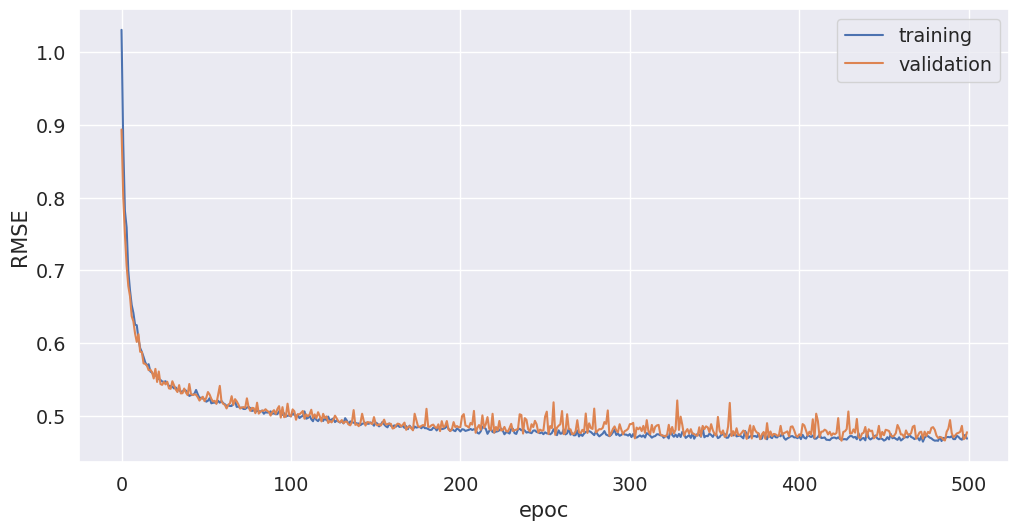

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

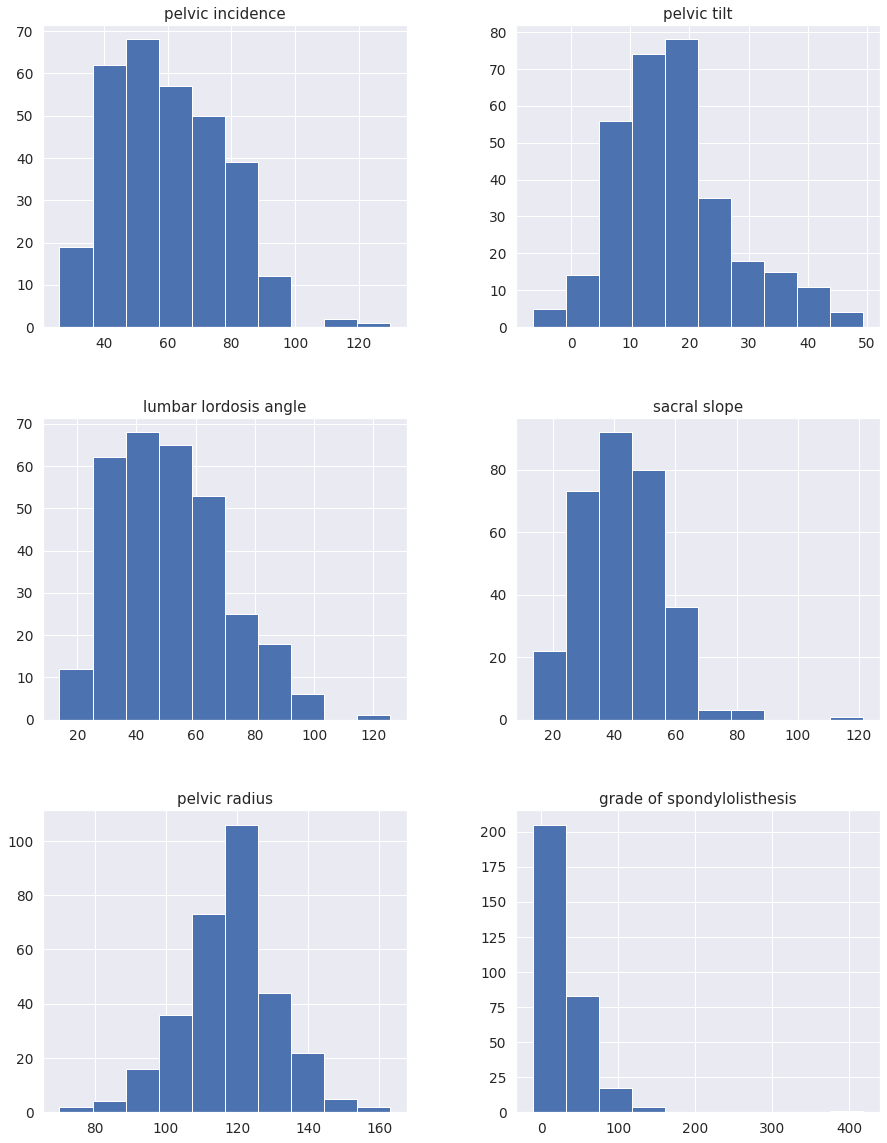

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7903225806451613

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8617 - accuracy: 0.6875

186/186 [==============================] - 0s 432us/step - loss: 0.7642 - accuracy: 0.6935 - val_loss: 0.8345 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0022 - accuracy: 0.5312

186/186 [==============================] - 0s 42us/step - loss: 0.7318 - accuracy: 0.6935 - val_loss: 0.7954 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6010 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.7003 - accuracy: 0.6935 - val_loss: 0.7554 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8573 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.6843 - accuracy: 0.6935 - val_loss: 0.7283 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6474 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.6692 - accuracy: 0.6935 - val_loss: 0.7129 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6399 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.6549 - accuracy: 0.6935 - val_loss: 0.7013 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5717 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6460 - accuracy: 0.6935 - val_loss: 0.6889 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5768 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6413 - accuracy: 0.6935 - val_loss: 0.6841 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7080 - accuracy: 0.6562

186/186 [==============================] - 0s 42us/step - loss: 0.6390 - accuracy: 0.6935 - val_loss: 0.6817 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7897 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.6370 - accuracy: 0.6935 - val_loss: 0.6804 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6344 - accuracy: 0.6935 - val_loss: 0.6812 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5087 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.6332 - accuracy: 0.6935 - val_loss: 0.6822 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.6310 - accuracy: 0.6935 - val_loss: 0.6798 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7642 - accuracy: 0.5312

186/186 [==============================] - 0s 44us/step - loss: 0.6303 - accuracy: 0.6935 - val_loss: 0.6762 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6794 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.6282 - accuracy: 0.6935 - val_loss: 0.6741 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6965 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.6264 - accuracy: 0.6935 - val_loss: 0.6738 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5808 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6245 - accuracy: 0.6935 - val_loss: 0.6732 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6309 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.6221 - accuracy: 0.6935 - val_loss: 0.6705 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6466 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.6189 - accuracy: 0.6935 - val_loss: 0.6677 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6927 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.6167 - accuracy: 0.6935 - val_loss: 0.6638 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5427 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6142 - accuracy: 0.6935 - val_loss: 0.6600 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6061 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.6114 - accuracy: 0.6935 - val_loss: 0.6557 - val_accuracy: 0.6371


Epoch 23/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.6562



186/186 [==============================] - 0s 47us/step - loss: 0.6075 - accuracy: 0.6935 - val_loss: 0.6507 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5987 - accuracy: 0.6935 - val_loss: 0.6448 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5637 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.5888 - accuracy: 0.6935 - val_loss: 0.6377 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.5774 - accuracy: 0.6935 - val_loss: 0.6323 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6072 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5711 - accuracy: 0.6935 - val_loss: 0.6271 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5731 - accuracy: 0.6875



186/186 [==============================] - 0s 43us/step - loss: 0.5651 - accuracy: 0.6935 - val_loss: 0.6211 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5585 - accuracy: 0.6935 - val_loss: 0.6166 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4719 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.5530 - accuracy: 0.6935 - val_loss: 0.6132 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.5625

186/186 [==============================] - 0s 43us/step - loss: 0.5487 - accuracy: 0.6935 - val_loss: 0.6086 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4734 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.5441 - accuracy: 0.6935 - val_loss: 0.6042 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4049 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5371 - accuracy: 0.6935 - val_loss: 0.6009 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4641 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.5314 - accuracy: 0.6935 - val_loss: 0.5981 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5174 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5264 - accuracy: 0.6935 - val_loss: 0.5955 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.5193 - accuracy: 0.6935 - val_loss: 0.5915 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4626 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5140 - accuracy: 0.6935 - val_loss: 0.5884 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5245 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.5114 - accuracy: 0.6935 - val_loss: 0.5853 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4572 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5072 - accuracy: 0.6935 - val_loss: 0.5847 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5123 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.5050 - accuracy: 0.6935 - val_loss: 0.5838 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5026 - accuracy: 0.6935 - val_loss: 0.5823 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4981 - accuracy: 0.6935 - val_loss: 0.5790 - val_accuracy: 0.6371


Epoch 43/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4967 - accuracy: 0.6935 - val_loss: 0.5747 - val_accuracy: 0.6371


Epoch 44/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4945 - accuracy: 0.6935 - val_loss: 0.5753 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5523 - accuracy: 0.6875

186/186 [==============================] - 0s 42us/step - loss: 0.4921 - accuracy: 0.6935 - val_loss: 0.5737 - val_accuracy: 0.6371


Epoch 46/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4883 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4902 - accuracy: 0.6935 - val_loss: 0.5741 - val_accuracy: 0.6371


Epoch 47/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4881 - accuracy: 0.6935 - val_loss: 0.5724 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6282 - accuracy: 0.4688

186/186 [==============================] - 0s 42us/step - loss: 0.4852 - accuracy: 0.6935 - val_loss: 0.5696 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.4831 - accuracy: 0.6935 - val_loss: 0.5667 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4808 - accuracy: 0.6935 - val_loss: 0.5642 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4309 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4786 - accuracy: 0.6935 - val_loss: 0.5627 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.4766 - accuracy: 0.6935 - val_loss: 0.5613 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4556 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4748 - accuracy: 0.6935 - val_loss: 0.5596 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5312

186/186 [==============================] - 0s 44us/step - loss: 0.4738 - accuracy: 0.6935 - val_loss: 0.5562 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.4713 - accuracy: 0.6935 - val_loss: 0.5550 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.4695 - accuracy: 0.6828 - val_loss: 0.5547 - val_accuracy: 0.7258


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4399 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.4677 - accuracy: 0.7527 - val_loss: 0.5547 - val_accuracy: 0.7419


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5536 - accuracy: 0.7500



186/186 [==============================] - 0s 44us/step - loss: 0.4679 - accuracy: 0.7688 - val_loss: 0.5570 - val_accuracy: 0.7339


Epoch 59/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5623 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4656 - accuracy: 0.7903 - val_loss: 0.5510 - val_accuracy: 0.7339


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4649 - accuracy: 0.7742 - val_loss: 0.5465 - val_accuracy: 0.7419


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4950 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4631 - accuracy: 0.7742 - val_loss: 0.5504 - val_accuracy: 0.7339


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4393 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.4604 - accuracy: 0.7796 - val_loss: 0.5488 - val_accuracy: 0.7419


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4587 - accuracy: 0.7796 - val_loss: 0.5510 - val_accuracy: 0.7419


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5215 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.4574 - accuracy: 0.7796 - val_loss: 0.5507 - val_accuracy: 0.7419


Epoch 65/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4609 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4572 - accuracy: 0.7849 - val_loss: 0.5502 - val_accuracy: 0.7339


Epoch 66/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4552 - accuracy: 0.7849 - val_loss: 0.5455 - val_accuracy: 0.7339


Epoch 67/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5019 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4544 - accuracy: 0.7903 - val_loss: 0.5451 - val_accuracy: 0.7258


Epoch 68/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5243 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4530 - accuracy: 0.7903 - val_loss: 0.5444 - val_accuracy: 0.7258


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.4518 - accuracy: 0.7903 - val_loss: 0.5469 - val_accuracy: 0.7339


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4509 - accuracy: 0.7849 - val_loss: 0.5489 - val_accuracy: 0.7258


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4506 - accuracy: 0.7903 - val_loss: 0.5462 - val_accuracy: 0.7258


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4492 - accuracy: 0.7903 - val_loss: 0.5445 - val_accuracy: 0.7177


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4480 - accuracy: 0.7903 - val_loss: 0.5450 - val_accuracy: 0.7177


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4533 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4472 - accuracy: 0.7957 - val_loss: 0.5457 - val_accuracy: 0.7339


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5302 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4465 - accuracy: 0.7903 - val_loss: 0.5450 - val_accuracy: 0.7339


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.4449 - accuracy: 0.8011 - val_loss: 0.5411 - val_accuracy: 0.7419


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4437 - accuracy: 0.7957 - val_loss: 0.5385 - val_accuracy: 0.7419


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4424 - accuracy: 0.7957 - val_loss: 0.5354 - val_accuracy: 0.7500


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4421 - accuracy: 0.7903 - val_loss: 0.5384 - val_accuracy: 0.7258


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4410 - accuracy: 0.8011 - val_loss: 0.5384 - val_accuracy: 0.7339


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4403 - accuracy: 0.8011 - val_loss: 0.5415 - val_accuracy: 0.7500


Epoch 82/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.4383 - accuracy: 0.8011 - val_loss: 0.5394 - val_accuracy: 0.7500


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4495 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4380 - accuracy: 0.8011 - val_loss: 0.5359 - val_accuracy: 0.7500


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4225 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4358 - accuracy: 0.8065 - val_loss: 0.5375 - val_accuracy: 0.7581


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4339 - accuracy: 0.8065 - val_loss: 0.5359 - val_accuracy: 0.7581


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.4340 - accuracy: 0.8065 - val_loss: 0.5345 - val_accuracy: 0.7581


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4314 - accuracy: 0.8065 - val_loss: 0.5313 - val_accuracy: 0.7500


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4277 - accuracy: 0.8065 - val_loss: 0.5292 - val_accuracy: 0.7500


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.4271 - accuracy: 0.8065 - val_loss: 0.5284 - val_accuracy: 0.7500


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5050 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.4262 - accuracy: 0.8065 - val_loss: 0.5307 - val_accuracy: 0.7581


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3780 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.4223 - accuracy: 0.8172 - val_loss: 0.5308 - val_accuracy: 0.7581


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4219 - accuracy: 0.8118 - val_loss: 0.5347 - val_accuracy: 0.7500


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4206 - accuracy: 0.8172 - val_loss: 0.5354 - val_accuracy: 0.7500


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4209 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4185 - accuracy: 0.8172 - val_loss: 0.5309 - val_accuracy: 0.7500


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5011 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4168 - accuracy: 0.8172 - val_loss: 0.5284 - val_accuracy: 0.7419


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4161 - accuracy: 0.8226 - val_loss: 0.5304 - val_accuracy: 0.7500


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4253 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4133 - accuracy: 0.8226 - val_loss: 0.5281 - val_accuracy: 0.7500


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4125 - accuracy: 0.8226 - val_loss: 0.5249 - val_accuracy: 0.7500


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4094 - accuracy: 0.8226 - val_loss: 0.5269 - val_accuracy: 0.7500


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4085 - accuracy: 0.8226 - val_loss: 0.5274 - val_accuracy: 0.7581


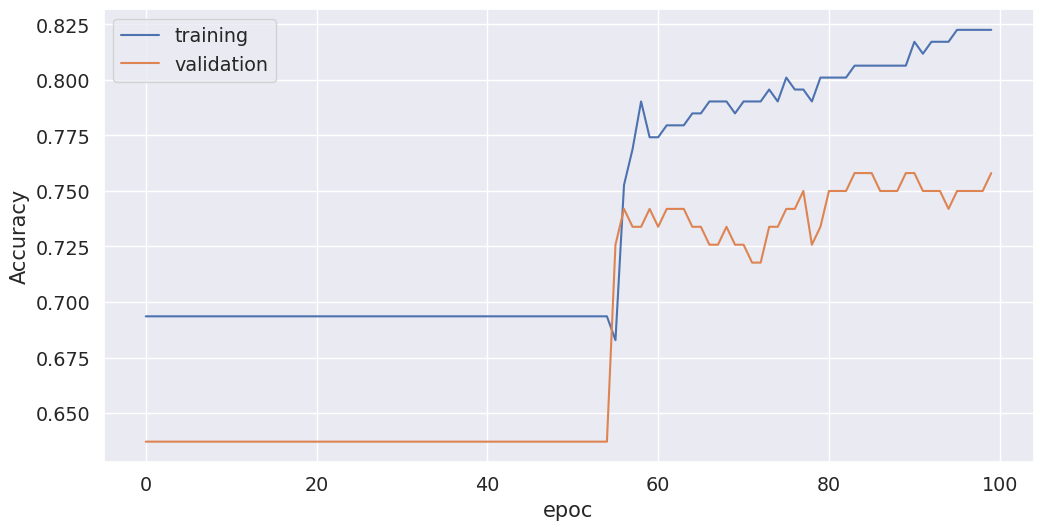

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.9955 - accuracy: 0.5938

186/186 [==============================] - 0s 942us/step - loss: 7.7223 - accuracy: 0.5161 - val_loss: 0.8503 - val_accuracy: 0.7258


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.2809 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 5.4743 - accuracy: 0.5914 - val_loss: 0.8650 - val_accuracy: 0.7097


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.0173 - accuracy: 0.4688

186/186 [==============================] - 0s 51us/step - loss: 4.4294 - accuracy: 0.6183 - val_loss: 0.7575 - val_accuracy: 0.7339


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.0938 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 3.4647 - accuracy: 0.6989 - val_loss: 0.6102 - val_accuracy: 0.7500


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.2164 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 3.1527 - accuracy: 0.6505 - val_loss: 0.6165 - val_accuracy: 0.7016


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.2663 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 3.0836 - accuracy: 0.6452 - val_loss: 0.5437 - val_accuracy: 0.7016


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5229 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 1.8114 - accuracy: 0.6613 - val_loss: 0.5270 - val_accuracy: 0.6613


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.1955 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 2.5756 - accuracy: 0.6559 - val_loss: 0.5446 - val_accuracy: 0.6532


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0266 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 1.7630 - accuracy: 0.6774 - val_loss: 0.5795 - val_accuracy: 0.6452


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.7663 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 1.5270 - accuracy: 0.6452 - val_loss: 0.5991 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9469 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 1.1345 - accuracy: 0.6935 - val_loss: 0.6084 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4012 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.9528 - accuracy: 0.6989 - val_loss: 0.6041 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9174 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 1.5652 - accuracy: 0.6989 - val_loss: 0.6050 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6548 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.7766 - accuracy: 0.6882 - val_loss: 0.6103 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2989 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 1.3965 - accuracy: 0.6935 - val_loss: 0.6280 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6644 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.8331 - accuracy: 0.6720 - val_loss: 0.6248 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2785 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 1.5627 - accuracy: 0.6667 - val_loss: 0.6290 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4594 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 1.5303 - accuracy: 0.6505 - val_loss: 0.6305 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6010 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.7566 - accuracy: 0.7151 - val_loss: 0.6175 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.9661 - accuracy: 0.7097 - val_loss: 0.6100 - val_accuracy: 0.6371


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8286 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 1.1908 - accuracy: 0.7097 - val_loss: 0.6211 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0402 - accuracy: 0.6875



186/186 [==============================] - 0s 48us/step - loss: 0.9494 - accuracy: 0.6882 - val_loss: 0.6190 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8131 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.7767 - accuracy: 0.6935 - val_loss: 0.6289 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4856 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.9192 - accuracy: 0.7204 - val_loss: 0.6196 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 1.0539 - accuracy: 0.6774 - val_loss: 0.6191 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2713 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.7468 - accuracy: 0.7043 - val_loss: 0.6161 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9677 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.8268 - accuracy: 0.7043 - val_loss: 0.6188 - val_accuracy: 0.6371


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6746 - accuracy: 0.7097 - val_loss: 0.6118 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5596 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.7091 - accuracy: 0.7151 - val_loss: 0.6242 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9135 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.9439 - accuracy: 0.6935 - val_loss: 0.6291 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8377 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.9832 - accuracy: 0.6344 - val_loss: 0.6187 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9538 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.9541 - accuracy: 0.6828 - val_loss: 0.6166 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1904 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.9530 - accuracy: 0.6828 - val_loss: 0.6136 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.9818 - accuracy: 0.6882 - val_loss: 0.6162 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4862 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6994 - accuracy: 0.7043 - val_loss: 0.6177 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.8708 - accuracy: 0.6989 - val_loss: 0.6134 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5550 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.7905 - accuracy: 0.6989 - val_loss: 0.6129 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6924 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.7478 - accuracy: 0.7151 - val_loss: 0.6161 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4705 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6244 - accuracy: 0.7151 - val_loss: 0.6171 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6007 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6122 - accuracy: 0.6774 - val_loss: 0.6176 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0959 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.8131 - accuracy: 0.6882 - val_loss: 0.6161 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4207 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.7968 - accuracy: 0.6774 - val_loss: 0.6131 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5633 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.7918 - accuracy: 0.6989 - val_loss: 0.6130 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7587 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.8785 - accuracy: 0.6989 - val_loss: 0.6132 - val_accuracy: 0.6371


Epoch 45/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.6469 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.8961 - accuracy: 0.6828 - val_loss: 0.6104 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.7110 - accuracy: 0.7204 - val_loss: 0.6128 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7339 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6042 - accuracy: 0.6935 - val_loss: 0.6146 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5914 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6767 - accuracy: 0.6935 - val_loss: 0.6111 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5824 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6622 - accuracy: 0.6882 - val_loss: 0.6144 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.8091 - accuracy: 0.7043 - val_loss: 0.6200 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5558 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6412 - accuracy: 0.7312 - val_loss: 0.6087 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5038 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5810 - accuracy: 0.6935 - val_loss: 0.6066 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7728 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.7342 - accuracy: 0.6935 - val_loss: 0.6068 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5303 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6016 - accuracy: 0.6828 - val_loss: 0.6109 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6234 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.7619 - accuracy: 0.6720 - val_loss: 0.6120 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7096 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6725 - accuracy: 0.6935 - val_loss: 0.6174 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6279 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6216 - accuracy: 0.7097 - val_loss: 0.6208 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0859 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6570 - accuracy: 0.7043 - val_loss: 0.6091 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4384 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5371 - accuracy: 0.7151 - val_loss: 0.6103 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.7122 - accuracy: 0.6828 - val_loss: 0.6079 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6420 - accuracy: 0.6935 - val_loss: 0.6080 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5903 - accuracy: 0.6882 - val_loss: 0.6083 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5248 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.7402 - accuracy: 0.6882 - val_loss: 0.6109 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5529 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5943 - accuracy: 0.7097 - val_loss: 0.6078 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5572 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5523 - accuracy: 0.7097 - val_loss: 0.6030 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6593 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6550 - accuracy: 0.6882 - val_loss: 0.6136 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8540 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.8576 - accuracy: 0.6882 - val_loss: 0.6158 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7939 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5832 - accuracy: 0.7204 - val_loss: 0.6077 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5841 - accuracy: 0.6882 - val_loss: 0.6024 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5982 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5642 - accuracy: 0.7151 - val_loss: 0.6070 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5873 - accuracy: 0.6989 - val_loss: 0.5991 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5970 - accuracy: 0.6882 - val_loss: 0.6050 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5632 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5742 - accuracy: 0.7043 - val_loss: 0.5995 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7041 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.6265 - accuracy: 0.6989 - val_loss: 0.5986 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5636 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6092 - accuracy: 0.7097 - val_loss: 0.5982 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5702 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.5882 - accuracy: 0.6935 - val_loss: 0.6007 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5707 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6669 - accuracy: 0.6828 - val_loss: 0.5949 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5491 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5445 - accuracy: 0.7043 - val_loss: 0.5909 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6457 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.7075 - accuracy: 0.6935 - val_loss: 0.5955 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6086 - accuracy: 0.6935 - val_loss: 0.5885 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5535 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5167 - accuracy: 0.7312 - val_loss: 0.5835 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5124 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6039 - accuracy: 0.6935 - val_loss: 0.5839 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4722 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6423 - accuracy: 0.7043 - val_loss: 0.5877 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6918 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5742 - accuracy: 0.7097 - val_loss: 0.5869 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4874 - accuracy: 0.7258 - val_loss: 0.5757 - val_accuracy: 0.6371


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4614 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5138 - accuracy: 0.7366 - val_loss: 0.5747 - val_accuracy: 0.6371


Epoch 87/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3824 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5513 - accuracy: 0.6935 - val_loss: 0.5772 - val_accuracy: 0.6371


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5887 - accuracy: 0.6828 - val_loss: 0.5755 - val_accuracy: 0.6371


Epoch 89/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4998 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5299 - accuracy: 0.7097 - val_loss: 0.5727 - val_accuracy: 0.6371


Epoch 90/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7092 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.5952 - accuracy: 0.6828 - val_loss: 0.5665 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7104 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.5544 - accuracy: 0.6989 - val_loss: 0.5626 - val_accuracy: 0.6371


Epoch 92/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6259 - accuracy: 0.6935 - val_loss: 0.5642 - val_accuracy: 0.6371


Epoch 93/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5837 - accuracy: 0.6250



186/186 [==============================] - 0s 56us/step - loss: 0.6570 - accuracy: 0.6828 - val_loss: 0.5583 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5139 - accuracy: 0.7258 - val_loss: 0.5562 - val_accuracy: 0.6371


Epoch 95/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5815 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.5685 - accuracy: 0.7204 - val_loss: 0.5545 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.5385 - accuracy: 0.7204 - val_loss: 0.5576 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6334 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5630 - accuracy: 0.7043 - val_loss: 0.5574 - val_accuracy: 0.6371


Epoch 98/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5158 - accuracy: 0.6250



186/186 [==============================] - 0s 53us/step - loss: 0.5758 - accuracy: 0.6774 - val_loss: 0.5516 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5762 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5038 - accuracy: 0.7204 - val_loss: 0.5469 - val_accuracy: 0.6371


Epoch 100/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5804 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.4906 - accuracy: 0.7204 - val_loss: 0.5443 - val_accuracy: 0.6371


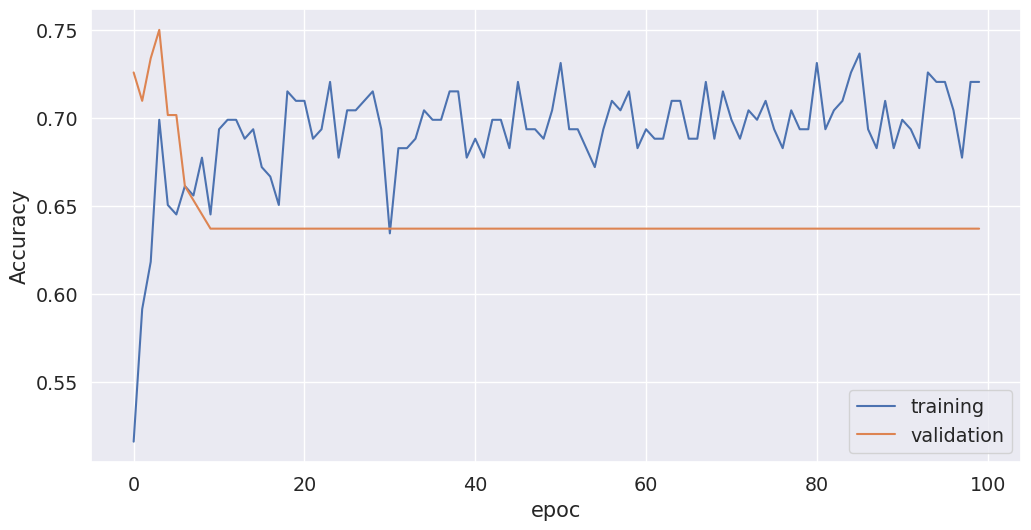

In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7764 - accuracy: 0.6562

186/186 [==============================] - 0s 819us/step - loss: 1.0231 - accuracy: 0.5699 - val_loss: 0.7795 - val_accuracy: 0.4516


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9975 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 1.3572 - accuracy: 0.5753 - val_loss: 0.7528 - val_accuracy: 0.5161


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5751 - accuracy: 0.4688

186/186 [==============================] - 0s 53us/step - loss: 1.1641 - accuracy: 0.5108 - val_loss: 0.7076 - val_accuracy: 0.5726


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0741 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 1.0390 - accuracy: 0.5376 - val_loss: 0.6793 - val_accuracy: 0.6048


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1344 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.9209 - accuracy: 0.5914 - val_loss: 0.6760 - val_accuracy: 0.6129


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7957 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.9236 - accuracy: 0.5269 - val_loss: 0.6668 - val_accuracy: 0.6129


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8555 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.9339 - accuracy: 0.5968 - val_loss: 0.6655 - val_accuracy: 0.6210


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7595 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.7879 - accuracy: 0.6237 - val_loss: 0.6584 - val_accuracy: 0.6452


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9882 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.7824 - accuracy: 0.6183 - val_loss: 0.6541 - val_accuracy: 0.6774


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6334 - accuracy: 0.5968 - val_loss: 0.6505 - val_accuracy: 0.7177


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5992 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6146 - accuracy: 0.6935 - val_loss: 0.6503 - val_accuracy: 0.7177


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.6357 - accuracy: 0.6344 - val_loss: 0.6459 - val_accuracy: 0.7339


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7572 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.7751 - accuracy: 0.6398 - val_loss: 0.6423 - val_accuracy: 0.7258


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6815 - accuracy: 0.6344 - val_loss: 0.6424 - val_accuracy: 0.7419


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.6176 - accuracy: 0.6720 - val_loss: 0.6402 - val_accuracy: 0.7419


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0381 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6906 - accuracy: 0.6559 - val_loss: 0.6040 - val_accuracy: 0.7339


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6299 - accuracy: 0.6774 - val_loss: 0.5944 - val_accuracy: 0.6613


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6432 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6341 - accuracy: 0.6774 - val_loss: 0.6071 - val_accuracy: 0.6935


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.6065 - accuracy: 0.7366 - val_loss: 0.5991 - val_accuracy: 0.6935


Epoch 20/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6271 - accuracy: 0.7151 - val_loss: 0.5817 - val_accuracy: 0.6935


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.5739 - accuracy: 0.7581 - val_loss: 0.5827 - val_accuracy: 0.6774


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.5701 - accuracy: 0.7312 - val_loss: 0.5651 - val_accuracy: 0.6774


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5469 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.5159 - accuracy: 0.7097 - val_loss: 0.5439 - val_accuracy: 0.6935


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5303 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5483 - accuracy: 0.6935 - val_loss: 0.5393 - val_accuracy: 0.6452


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.5938



186/186 [==============================] - 0s 50us/step - loss: 0.5449 - accuracy: 0.7097 - val_loss: 0.5265 - val_accuracy: 0.6532


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3940 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5455 - accuracy: 0.7796 - val_loss: 0.5220 - val_accuracy: 0.7339


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5805 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5315 - accuracy: 0.7312 - val_loss: 0.5166 - val_accuracy: 0.7742


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5476 - accuracy: 0.7527 - val_loss: 0.5033 - val_accuracy: 0.7177


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4954 - accuracy: 0.7581 - val_loss: 0.5041 - val_accuracy: 0.7500


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5389 - accuracy: 0.7097 - val_loss: 0.4980 - val_accuracy: 0.7903


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5020 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.4672 - accuracy: 0.7581 - val_loss: 0.4833 - val_accuracy: 0.7581


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6722 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5658 - accuracy: 0.7473 - val_loss: 0.4753 - val_accuracy: 0.7500


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4937 - accuracy: 0.7366 - val_loss: 0.4735 - val_accuracy: 0.7903


Epoch 34/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5336 - accuracy: 0.7043 - val_loss: 0.4735 - val_accuracy: 0.7661


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4345 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5466 - accuracy: 0.7043 - val_loss: 0.4736 - val_accuracy: 0.7500


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5033 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5419 - accuracy: 0.6882 - val_loss: 0.4656 - val_accuracy: 0.7339


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5116 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4931 - accuracy: 0.7204 - val_loss: 0.4649 - val_accuracy: 0.7500


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4417 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5018 - accuracy: 0.7796 - val_loss: 0.4661 - val_accuracy: 0.7339


Epoch 39/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5501 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5034 - accuracy: 0.7473 - val_loss: 0.4685 - val_accuracy: 0.7661


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4327 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.5776 - accuracy: 0.7151 - val_loss: 0.4757 - val_accuracy: 0.7581


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4676 - accuracy: 0.7634 - val_loss: 0.4725 - val_accuracy: 0.7500


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5472 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4436 - accuracy: 0.7634 - val_loss: 0.4634 - val_accuracy: 0.7661


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4731 - accuracy: 0.7419 - val_loss: 0.4566 - val_accuracy: 0.7661


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5717 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4611 - accuracy: 0.7419 - val_loss: 0.4550 - val_accuracy: 0.7742


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.4534 - accuracy: 0.7903 - val_loss: 0.4539 - val_accuracy: 0.7661


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8576 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5144 - accuracy: 0.8280 - val_loss: 0.4508 - val_accuracy: 0.7903


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3723 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4615 - accuracy: 0.7097 - val_loss: 0.4491 - val_accuracy: 0.7742


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4802 - accuracy: 0.7849 - val_loss: 0.4525 - val_accuracy: 0.7581


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5158 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4410 - accuracy: 0.7796 - val_loss: 0.4484 - val_accuracy: 0.7742


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4462 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4640 - accuracy: 0.7742 - val_loss: 0.4503 - val_accuracy: 0.7742


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5040 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4507 - accuracy: 0.7366 - val_loss: 0.4490 - val_accuracy: 0.7581


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.4585 - accuracy: 0.7581 - val_loss: 0.4458 - val_accuracy: 0.7500


Epoch 53/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7184 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4879 - accuracy: 0.7419 - val_loss: 0.4508 - val_accuracy: 0.7903


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4592 - accuracy: 0.7258 - val_loss: 0.4499 - val_accuracy: 0.7903


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4661 - accuracy: 0.7419 - val_loss: 0.4475 - val_accuracy: 0.7984


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4623 - accuracy: 0.7419 - val_loss: 0.4506 - val_accuracy: 0.7984


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6239 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5474 - accuracy: 0.7527 - val_loss: 0.4468 - val_accuracy: 0.7984


Epoch 58/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4127 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4446 - accuracy: 0.7688 - val_loss: 0.4425 - val_accuracy: 0.7984


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.4645 - accuracy: 0.7473 - val_loss: 0.4451 - val_accuracy: 0.7984


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4033 - accuracy: 0.8118 - val_loss: 0.4393 - val_accuracy: 0.7903


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5235 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4374 - accuracy: 0.7742 - val_loss: 0.4396 - val_accuracy: 0.7661


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4312 - accuracy: 0.7742 - val_loss: 0.4395 - val_accuracy: 0.7581


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4348 - accuracy: 0.7258 - val_loss: 0.4391 - val_accuracy: 0.7984


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4595 - accuracy: 0.7688 - val_loss: 0.4436 - val_accuracy: 0.7823


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4068 - accuracy: 0.7849 - val_loss: 0.4410 - val_accuracy: 0.7903


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3719 - accuracy: 0.7957 - val_loss: 0.4342 - val_accuracy: 0.7984


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4583 - accuracy: 0.7527 - val_loss: 0.4331 - val_accuracy: 0.7742


Epoch 68/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3676 - accuracy: 0.7957 - val_loss: 0.4339 - val_accuracy: 0.7661


Epoch 69/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5022 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3982 - accuracy: 0.7903 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 70/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4407 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4670 - accuracy: 0.7849 - val_loss: 0.4326 - val_accuracy: 0.7823


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.3956 - accuracy: 0.7688 - val_loss: 0.4352 - val_accuracy: 0.7500


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3914 - accuracy: 0.7957 - val_loss: 0.4308 - val_accuracy: 0.7500


Epoch 73/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4083 - accuracy: 0.7688 - val_loss: 0.4313 - val_accuracy: 0.7419


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5494 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4321 - accuracy: 0.7688 - val_loss: 0.4281 - val_accuracy: 0.7419


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3994 - accuracy: 0.7796 - val_loss: 0.4281 - val_accuracy: 0.7500


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4068 - accuracy: 0.7796 - val_loss: 0.4270 - val_accuracy: 0.7500


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4737 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4575 - accuracy: 0.7742 - val_loss: 0.4283 - val_accuracy: 0.7500


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 0.4249 - accuracy: 0.7419 - val_loss: 0.4265 - val_accuracy: 0.7581


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.3906 - accuracy: 0.7581 - val_loss: 0.4303 - val_accuracy: 0.7500


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4321 - accuracy: 0.7527 - val_loss: 0.4331 - val_accuracy: 0.7661


Epoch 81/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4330 - accuracy: 0.7473 - val_loss: 0.4352 - val_accuracy: 0.7742


Epoch 82/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4531 - accuracy: 0.7581 - val_loss: 0.4416 - val_accuracy: 0.7419


Epoch 83/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3973 - accuracy: 0.7473 - val_loss: 0.4394 - val_accuracy: 0.7419


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4187 - accuracy: 0.7419 - val_loss: 0.4384 - val_accuracy: 0.7419


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5585 - accuracy: 0.7188



186/186 [==============================] - 0s 46us/step - loss: 0.4063 - accuracy: 0.7742 - val_loss: 0.4324 - val_accuracy: 0.7419


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4910 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.4518 - accuracy: 0.6989 - val_loss: 0.4316 - val_accuracy: 0.7661


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4116 - accuracy: 0.7903 - val_loss: 0.4342 - val_accuracy: 0.7500


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3563 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4092 - accuracy: 0.7742 - val_loss: 0.4357 - val_accuracy: 0.7339


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3437 - accuracy: 0.8011 - val_loss: 0.4291 - val_accuracy: 0.7339


Epoch 90/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4260 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4424 - accuracy: 0.7366 - val_loss: 0.4335 - val_accuracy: 0.7258


Epoch 91/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4279 - accuracy: 0.7581 - val_loss: 0.4321 - val_accuracy: 0.7500


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5020 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4299 - accuracy: 0.7796 - val_loss: 0.4314 - val_accuracy: 0.7419


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5761 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.4630 - accuracy: 0.7204 - val_loss: 0.4334 - val_accuracy: 0.7500


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3893 - accuracy: 0.8011 - val_loss: 0.4339 - val_accuracy: 0.7419


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5816 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4215 - accuracy: 0.7796 - val_loss: 0.4385 - val_accuracy: 0.7419


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3646 - accuracy: 0.8065 - val_loss: 0.4337 - val_accuracy: 0.7419


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4231 - accuracy: 0.7688 - val_loss: 0.4335 - val_accuracy: 0.7500


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3859 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4113 - accuracy: 0.8011 - val_loss: 0.4324 - val_accuracy: 0.7339


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4198 - accuracy: 0.7634 - val_loss: 0.4282 - val_accuracy: 0.7500


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4950 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.3986 - accuracy: 0.7742 - val_loss: 0.4275 - val_accuracy: 0.7500


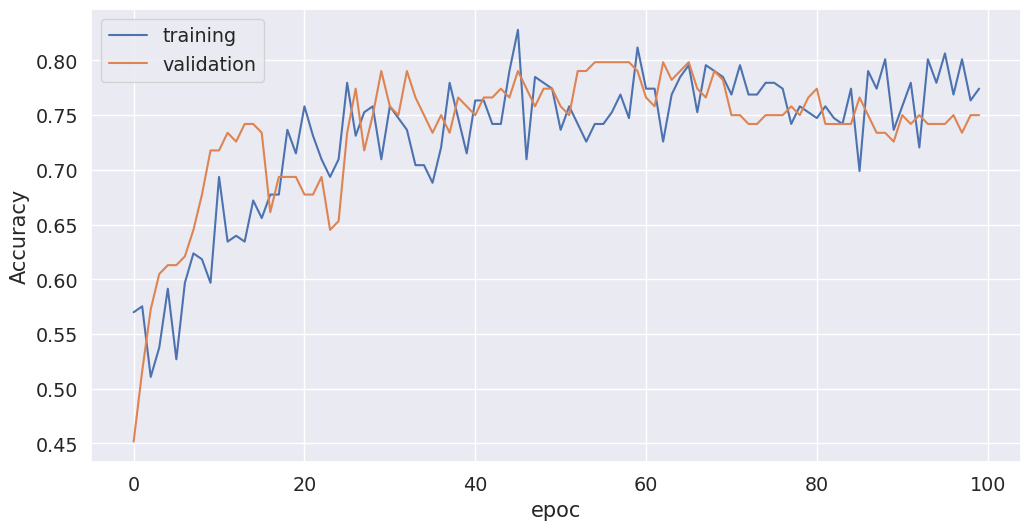

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4785 - accuracy: 0.6875

186/186 [==============================] - 0s 899us/step - loss: 1.9167 - accuracy: 0.7043 - val_loss: 0.9086 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.2655 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 1.8257 - accuracy: 0.6720 - val_loss: 0.8795 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5112 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 1.8399 - accuracy: 0.6613 - val_loss: 0.8804 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0803 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 2.0185 - accuracy: 0.6720 - val_loss: 0.8734 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2276 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 1.7075 - accuracy: 0.6882 - val_loss: 0.8750 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0193 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 1.4772 - accuracy: 0.6774 - val_loss: 0.8758 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0221 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 1.2026 - accuracy: 0.6935 - val_loss: 0.8754 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5024 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 1.3007 - accuracy: 0.6935 - val_loss: 0.8756 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5537 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 1.4137 - accuracy: 0.6613 - val_loss: 0.8729 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5162 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 1.3412 - accuracy: 0.6559 - val_loss: 0.8722 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7822 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 1.4890 - accuracy: 0.6613 - val_loss: 0.8720 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9887 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 1.2386 - accuracy: 0.6935 - val_loss: 0.8688 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2519 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.9713 - accuracy: 0.7097 - val_loss: 0.8647 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5870 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 1.1392 - accuracy: 0.6774 - val_loss: 0.8608 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1769 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 1.2342 - accuracy: 0.6344 - val_loss: 0.8566 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8148 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.8845 - accuracy: 0.6828 - val_loss: 0.8532 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9391 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 1.0553 - accuracy: 0.7097 - val_loss: 0.8486 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8237 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.9511 - accuracy: 0.6613 - val_loss: 0.8442 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9119 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.9311 - accuracy: 0.6774 - val_loss: 0.8371 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0453 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.8942 - accuracy: 0.6882 - val_loss: 0.8306 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7276 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.9218 - accuracy: 0.7043 - val_loss: 0.8142 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6021 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 1.0260 - accuracy: 0.6720 - val_loss: 0.7945 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8365 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.7851 - accuracy: 0.6828 - val_loss: 0.7714 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7414 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.8256 - accuracy: 0.6935 - val_loss: 0.7539 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.7580 - accuracy: 0.7043 - val_loss: 0.7477 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7733 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.7495 - accuracy: 0.6935 - val_loss: 0.7393 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7358 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.8248 - accuracy: 0.6882 - val_loss: 0.7340 - val_accuracy: 0.6371


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8352 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.7141 - accuracy: 0.7097 - val_loss: 0.7304 - val_accuracy: 0.6371


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6935 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.8057 - accuracy: 0.6935 - val_loss: 0.7241 - val_accuracy: 0.6371


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7159 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.7694 - accuracy: 0.7366 - val_loss: 0.7209 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7247 - accuracy: 0.7188



186/186 [==============================] - 0s 47us/step - loss: 0.7307 - accuracy: 0.7043 - val_loss: 0.7182 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7849 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.6466 - accuracy: 0.7366 - val_loss: 0.7132 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6922 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.7268 - accuracy: 0.7151 - val_loss: 0.7069 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6987 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.7909 - accuracy: 0.6613 - val_loss: 0.7024 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6122 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.7406 - accuracy: 0.6935 - val_loss: 0.6976 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6481 - accuracy: 0.7151 - val_loss: 0.6939 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6296 - accuracy: 0.7258 - val_loss: 0.6901 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6786 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6781 - accuracy: 0.7097 - val_loss: 0.6836 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6741 - accuracy: 0.7204 - val_loss: 0.6801 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8055 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.7006 - accuracy: 0.6720 - val_loss: 0.6754 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7322 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6715 - accuracy: 0.7043 - val_loss: 0.6694 - val_accuracy: 0.6371


Epoch 42/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6082 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6850 - accuracy: 0.6989 - val_loss: 0.6659 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7239 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.7220 - accuracy: 0.6828 - val_loss: 0.6639 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6560 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6717 - accuracy: 0.6935 - val_loss: 0.6614 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.5988 - accuracy: 0.7366 - val_loss: 0.6545 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6705 - accuracy: 0.6935 - val_loss: 0.6484 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6833 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6296 - accuracy: 0.6935 - val_loss: 0.6440 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5124 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6044 - accuracy: 0.7043 - val_loss: 0.6427 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5710 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5816 - accuracy: 0.7527 - val_loss: 0.6369 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6189 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6685 - accuracy: 0.6720 - val_loss: 0.6336 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6128 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6078 - accuracy: 0.7043 - val_loss: 0.6290 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6434 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6038 - accuracy: 0.7312 - val_loss: 0.6261 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7247 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6693 - accuracy: 0.6720 - val_loss: 0.6274 - val_accuracy: 0.6371


Epoch 54/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5659 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5982 - accuracy: 0.6882 - val_loss: 0.6219 - val_accuracy: 0.6371


Epoch 55/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6983 - accuracy: 0.6935 - val_loss: 0.6210 - val_accuracy: 0.6371


Epoch 56/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6553 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6117 - accuracy: 0.6828 - val_loss: 0.6194 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5807 - accuracy: 0.7151 - val_loss: 0.6163 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.5956 - accuracy: 0.7204 - val_loss: 0.6150 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5880 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6010 - accuracy: 0.6882 - val_loss: 0.6131 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7520 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.6530 - accuracy: 0.7204 - val_loss: 0.6111 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5080 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5774 - accuracy: 0.7366 - val_loss: 0.6099 - val_accuracy: 0.6371


Epoch 62/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7017 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.5910 - accuracy: 0.6989 - val_loss: 0.6069 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5887 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5603 - accuracy: 0.7366 - val_loss: 0.6044 - val_accuracy: 0.6371


Epoch 64/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7055 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5426 - accuracy: 0.7204 - val_loss: 0.6030 - val_accuracy: 0.6371


Epoch 65/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5318 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5814 - accuracy: 0.7258 - val_loss: 0.6010 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5716 - accuracy: 0.6989 - val_loss: 0.5990 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6192 - accuracy: 0.6562



186/186 [==============================] - 0s 50us/step - loss: 0.5931 - accuracy: 0.7043 - val_loss: 0.5978 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8065 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5731 - accuracy: 0.7043 - val_loss: 0.5957 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5543 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5810 - accuracy: 0.7151 - val_loss: 0.5946 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5608 - accuracy: 0.6882 - val_loss: 0.5930 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5295 - accuracy: 0.7258 - val_loss: 0.5905 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5128 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5426 - accuracy: 0.7258 - val_loss: 0.5884 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5093 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5617 - accuracy: 0.7312 - val_loss: 0.5873 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5800 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5674 - accuracy: 0.7151 - val_loss: 0.5867 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5957 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5346 - accuracy: 0.7258 - val_loss: 0.5860 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5563 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5229 - accuracy: 0.7527 - val_loss: 0.5857 - val_accuracy: 0.6371


Epoch 77/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6897 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5744 - accuracy: 0.7366 - val_loss: 0.5828 - val_accuracy: 0.6371


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4802 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5257 - accuracy: 0.7204 - val_loss: 0.5822 - val_accuracy: 0.6371


Epoch 79/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 0.5491 - accuracy: 0.7097 - val_loss: 0.5809 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5506 - accuracy: 0.7151 - val_loss: 0.5785 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5996 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5070 - accuracy: 0.7204 - val_loss: 0.5764 - val_accuracy: 0.6371


Epoch 82/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5338 - accuracy: 0.7312 - val_loss: 0.5754 - val_accuracy: 0.6371


Epoch 83/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4959 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5241 - accuracy: 0.7258 - val_loss: 0.5744 - val_accuracy: 0.6371


Epoch 84/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5312 - accuracy: 0.7097 - val_loss: 0.5732 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5211 - accuracy: 0.7097 - val_loss: 0.5724 - val_accuracy: 0.6371


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6340 - accuracy: 0.7097 - val_loss: 0.5735 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5275 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5227 - accuracy: 0.7312 - val_loss: 0.5733 - val_accuracy: 0.6371


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5094 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4954 - accuracy: 0.7634 - val_loss: 0.5707 - val_accuracy: 0.6371


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5484 - accuracy: 0.6935 - val_loss: 0.5689 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4761 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5115 - accuracy: 0.7204 - val_loss: 0.5687 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6267 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.4852 - accuracy: 0.7527 - val_loss: 0.5681 - val_accuracy: 0.6371


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5132 - accuracy: 0.7258 - val_loss: 0.5670 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6798 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5571 - accuracy: 0.6989 - val_loss: 0.5671 - val_accuracy: 0.6371


Epoch 94/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4407 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5400 - accuracy: 0.7043 - val_loss: 0.5669 - val_accuracy: 0.6371


Epoch 95/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5188 - accuracy: 0.7204 - val_loss: 0.5660 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4875 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5048 - accuracy: 0.7366 - val_loss: 0.5652 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5033 - accuracy: 0.7366 - val_loss: 0.5640 - val_accuracy: 0.6371


Epoch 98/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5170 - accuracy: 0.7204 - val_loss: 0.5648 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4510 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5228 - accuracy: 0.7097 - val_loss: 0.5623 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5556 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.4838 - accuracy: 0.7258 - val_loss: 0.5617 - val_accuracy: 0.6371


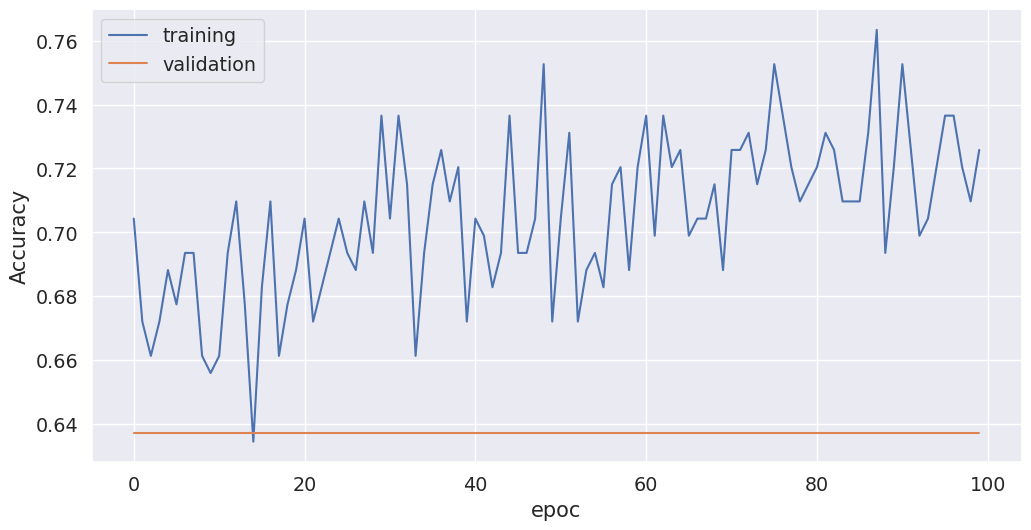

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0175 - accuracy: 0.1875

186/186 [==============================] - 0s 597us/step - loss: 2.3958 - accuracy: 0.2957 - val_loss: 2.1967 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6305 - accuracy: 0.2500

186/186 [==============================] - 0s 57us/step - loss: 2.1983 - accuracy: 0.2957 - val_loss: 2.0515 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7568 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 2.0551 - accuracy: 0.3011 - val_loss: 1.9271 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0816 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 1.9362 - accuracy: 0.3065 - val_loss: 1.8238 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8629 - accuracy: 0.2812

186/186 [==============================] - 0s 51us/step - loss: 1.8303 - accuracy: 0.3065 - val_loss: 1.7322 - val_accuracy: 0.3710


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7813 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 1.7322 - accuracy: 0.3172 - val_loss: 1.6476 - val_accuracy: 0.3710


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7855 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 1.6421 - accuracy: 0.3280 - val_loss: 1.5705 - val_accuracy: 0.3710


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4133 - accuracy: 0.4062

186/186 [==============================] - 0s 53us/step - loss: 1.5571 - accuracy: 0.3280 - val_loss: 1.4980 - val_accuracy: 0.3790


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4487 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 1.4737 - accuracy: 0.3441 - val_loss: 1.4296 - val_accuracy: 0.3790


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4868 - accuracy: 0.2812

186/186 [==============================] - 0s 51us/step - loss: 1.3971 - accuracy: 0.3548 - val_loss: 1.3668 - val_accuracy: 0.3790


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1185 - accuracy: 0.3750

186/186 [==============================] - 0s 46us/step - loss: 1.3320 - accuracy: 0.3710 - val_loss: 1.3091 - val_accuracy: 0.3790


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4409 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 1.2713 - accuracy: 0.3817 - val_loss: 1.2559 - val_accuracy: 0.3871


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4568 - accuracy: 0.3125

186/186 [==============================] - 0s 50us/step - loss: 1.2191 - accuracy: 0.3871 - val_loss: 1.2031 - val_accuracy: 0.3871


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2585 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 1.1716 - accuracy: 0.3925 - val_loss: 1.1564 - val_accuracy: 0.4032


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9715 - accuracy: 0.3438

186/186 [==============================] - 0s 45us/step - loss: 1.1284 - accuracy: 0.4086 - val_loss: 1.1105 - val_accuracy: 0.4113


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7945 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 1.0884 - accuracy: 0.4247 - val_loss: 1.0742 - val_accuracy: 0.4194


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0350 - accuracy: 0.3750

186/186 [==============================] - 0s 51us/step - loss: 1.0521 - accuracy: 0.4301 - val_loss: 1.0387 - val_accuracy: 0.4435


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0177 - accuracy: 0.4375

186/186 [==============================] - 0s 48us/step - loss: 1.0192 - accuracy: 0.4462 - val_loss: 1.0101 - val_accuracy: 0.4435


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9302 - accuracy: 0.5000

186/186 [==============================] - 0s 45us/step - loss: 0.9907 - accuracy: 0.4677 - val_loss: 0.9832 - val_accuracy: 0.4516


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0918 - accuracy: 0.4375

186/186 [==============================] - 0s 46us/step - loss: 0.9678 - accuracy: 0.4677 - val_loss: 0.9594 - val_accuracy: 0.4677


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9808 - accuracy: 0.5312

186/186 [==============================] - 0s 47us/step - loss: 0.9491 - accuracy: 0.4677 - val_loss: 0.9406 - val_accuracy: 0.4677


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8688 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 0.9322 - accuracy: 0.4731 - val_loss: 0.9200 - val_accuracy: 0.4839


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0356 - accuracy: 0.4688



186/186 [==============================] - 0s 46us/step - loss: 0.9125 - accuracy: 0.4892 - val_loss: 0.9025 - val_accuracy: 0.4919


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9311 - accuracy: 0.4688

186/186 [==============================] - 0s 46us/step - loss: 0.8929 - accuracy: 0.5000 - val_loss: 0.8852 - val_accuracy: 0.4919


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7922 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.8740 - accuracy: 0.4946 - val_loss: 0.8681 - val_accuracy: 0.5000


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6239 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.8557 - accuracy: 0.5161 - val_loss: 0.8525 - val_accuracy: 0.5081


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9145 - accuracy: 0.4375

186/186 [==============================] - 0s 48us/step - loss: 0.8388 - accuracy: 0.5161 - val_loss: 0.8388 - val_accuracy: 0.5242


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8535 - accuracy: 0.4375

186/186 [==============================] - 0s 45us/step - loss: 0.8246 - accuracy: 0.5376 - val_loss: 0.8239 - val_accuracy: 0.5565


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9986 - accuracy: 0.4062

186/186 [==============================] - 0s 45us/step - loss: 0.8124 - accuracy: 0.5430 - val_loss: 0.8118 - val_accuracy: 0.5565


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8118 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.8008 - accuracy: 0.5806 - val_loss: 0.8013 - val_accuracy: 0.5645


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7785 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 0.7902 - accuracy: 0.5914 - val_loss: 0.7932 - val_accuracy: 0.5726


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7855 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.7809 - accuracy: 0.6022 - val_loss: 0.7860 - val_accuracy: 0.5887


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7808 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.7719 - accuracy: 0.6344 - val_loss: 0.7798 - val_accuracy: 0.5726


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7475 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.7636 - accuracy: 0.6613 - val_loss: 0.7730 - val_accuracy: 0.5806


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8373 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.7568 - accuracy: 0.6559 - val_loss: 0.7687 - val_accuracy: 0.5887


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7199 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.7500 - accuracy: 0.6559 - val_loss: 0.7647 - val_accuracy: 0.5887


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7806 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.7458 - accuracy: 0.6559 - val_loss: 0.7604 - val_accuracy: 0.5806


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7406 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.7384 - accuracy: 0.6720 - val_loss: 0.7552 - val_accuracy: 0.5726


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7317 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.7303 - accuracy: 0.6667 - val_loss: 0.7519 - val_accuracy: 0.5806


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7111 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.7241 - accuracy: 0.6720 - val_loss: 0.7489 - val_accuracy: 0.5968


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7043 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.7194 - accuracy: 0.6667 - val_loss: 0.7454 - val_accuracy: 0.5887


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7003 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.7141 - accuracy: 0.6774 - val_loss: 0.7429 - val_accuracy: 0.5887


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6639 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.7092 - accuracy: 0.6989 - val_loss: 0.7394 - val_accuracy: 0.5887


Epoch 44/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7445 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.7051 - accuracy: 0.6989 - val_loss: 0.7375 - val_accuracy: 0.6048


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7111 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.7010 - accuracy: 0.7043 - val_loss: 0.7345 - val_accuracy: 0.6048


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7153 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6967 - accuracy: 0.7043 - val_loss: 0.7323 - val_accuracy: 0.5968


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7545 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6930 - accuracy: 0.7204 - val_loss: 0.7303 - val_accuracy: 0.5968


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7253 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6886 - accuracy: 0.7312 - val_loss: 0.7282 - val_accuracy: 0.6048


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7529 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6847 - accuracy: 0.7366 - val_loss: 0.7239 - val_accuracy: 0.6129


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6819 - accuracy: 0.7312 - val_loss: 0.7216 - val_accuracy: 0.6048


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6803 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6774 - accuracy: 0.7312 - val_loss: 0.7195 - val_accuracy: 0.6210


Epoch 52/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6702 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.6737 - accuracy: 0.7473 - val_loss: 0.7143 - val_accuracy: 0.6048


Epoch 53/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6707 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6704 - accuracy: 0.7581 - val_loss: 0.7134 - val_accuracy: 0.6129


Epoch 54/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7625 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6678 - accuracy: 0.7634 - val_loss: 0.7101 - val_accuracy: 0.6129


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6645 - accuracy: 0.7634 - val_loss: 0.7067 - val_accuracy: 0.6129


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6735 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6614 - accuracy: 0.7849 - val_loss: 0.7028 - val_accuracy: 0.6210


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6571 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.6586 - accuracy: 0.7742 - val_loss: 0.6997 - val_accuracy: 0.6210


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6195 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.6560 - accuracy: 0.7688 - val_loss: 0.6965 - val_accuracy: 0.6210


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6530 - accuracy: 0.7796 - val_loss: 0.6948 - val_accuracy: 0.6210


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6710 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.6498 - accuracy: 0.7849 - val_loss: 0.6912 - val_accuracy: 0.6210


Epoch 61/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6170 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.6466 - accuracy: 0.7957 - val_loss: 0.6880 - val_accuracy: 0.6210


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6711 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6435 - accuracy: 0.7903 - val_loss: 0.6852 - val_accuracy: 0.6210


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6214 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.6397 - accuracy: 0.8065 - val_loss: 0.6824 - val_accuracy: 0.6371


Epoch 64/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6145 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.6362 - accuracy: 0.8065 - val_loss: 0.6800 - val_accuracy: 0.6290


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6108 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6330 - accuracy: 0.8011 - val_loss: 0.6770 - val_accuracy: 0.6452


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6461 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6307 - accuracy: 0.8011 - val_loss: 0.6748 - val_accuracy: 0.6371


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6270 - accuracy: 0.7957 - val_loss: 0.6723 - val_accuracy: 0.6210


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6237 - accuracy: 0.7903 - val_loss: 0.6700 - val_accuracy: 0.6452


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6183 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.6206 - accuracy: 0.8011 - val_loss: 0.6677 - val_accuracy: 0.6290


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.6171 - accuracy: 0.7957 - val_loss: 0.6652 - val_accuracy: 0.6371


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6119 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.6141 - accuracy: 0.8011 - val_loss: 0.6631 - val_accuracy: 0.6371


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6117 - accuracy: 0.7957 - val_loss: 0.6610 - val_accuracy: 0.6210


Epoch 73/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6507 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6075 - accuracy: 0.8011 - val_loss: 0.6592 - val_accuracy: 0.6210


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6043 - accuracy: 0.7957 - val_loss: 0.6570 - val_accuracy: 0.6290


Epoch 75/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5513 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.6018 - accuracy: 0.7957 - val_loss: 0.6546 - val_accuracy: 0.6371


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6328 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5987 - accuracy: 0.8011 - val_loss: 0.6526 - val_accuracy: 0.6371


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5951 - accuracy: 0.7957 - val_loss: 0.6504 - val_accuracy: 0.6452


Epoch 78/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5646 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.5924 - accuracy: 0.8011 - val_loss: 0.6484 - val_accuracy: 0.6452


Epoch 79/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6128 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5896 - accuracy: 0.7903 - val_loss: 0.6464 - val_accuracy: 0.6452


Epoch 80/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5843 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5868 - accuracy: 0.7903 - val_loss: 0.6444 - val_accuracy: 0.6452


Epoch 81/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5831 - accuracy: 0.7957 - val_loss: 0.6420 - val_accuracy: 0.6532


Epoch 82/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5809 - accuracy: 0.7849 - val_loss: 0.6393 - val_accuracy: 0.6532


Epoch 83/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5585 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5766 - accuracy: 0.7957 - val_loss: 0.6364 - val_accuracy: 0.6532


Epoch 84/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5731 - accuracy: 0.7849 - val_loss: 0.6330 - val_accuracy: 0.6532


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5768 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5693 - accuracy: 0.7903 - val_loss: 0.6299 - val_accuracy: 0.6532


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5954 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.5656 - accuracy: 0.7796 - val_loss: 0.6276 - val_accuracy: 0.6532


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.5616 - accuracy: 0.7849 - val_loss: 0.6245 - val_accuracy: 0.6532


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5336 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5581 - accuracy: 0.7849 - val_loss: 0.6222 - val_accuracy: 0.6532


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5436 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5555 - accuracy: 0.8011 - val_loss: 0.6191 - val_accuracy: 0.6532


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5215 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5512 - accuracy: 0.7957 - val_loss: 0.6155 - val_accuracy: 0.6532


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5476 - accuracy: 0.7849 - val_loss: 0.6138 - val_accuracy: 0.6613


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.5447 - accuracy: 0.7957 - val_loss: 0.6105 - val_accuracy: 0.6532


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5425 - accuracy: 0.8118 - val_loss: 0.6077 - val_accuracy: 0.6532


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5393 - accuracy: 0.7957 - val_loss: 0.6054 - val_accuracy: 0.6532


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5061 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.5366 - accuracy: 0.7742 - val_loss: 0.6034 - val_accuracy: 0.6613


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.6875



186/186 [==============================] - 0s 46us/step - loss: 0.5325 - accuracy: 0.8011 - val_loss: 0.5999 - val_accuracy: 0.6613


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6440 - accuracy: 0.6562



186/186 [==============================] - 0s 49us/step - loss: 0.5299 - accuracy: 0.7849 - val_loss: 0.5970 - val_accuracy: 0.6613


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5326 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5273 - accuracy: 0.7903 - val_loss: 0.5938 - val_accuracy: 0.6613


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4791 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5236 - accuracy: 0.7849 - val_loss: 0.5913 - val_accuracy: 0.6694


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.5198 - accuracy: 0.7903 - val_loss: 0.5893 - val_accuracy: 0.6694


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4949 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5162 - accuracy: 0.8011 - val_loss: 0.5873 - val_accuracy: 0.6774


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5136 - accuracy: 0.8011 - val_loss: 0.5844 - val_accuracy: 0.6855


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5754 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5101 - accuracy: 0.8065 - val_loss: 0.5811 - val_accuracy: 0.6855


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5059 - accuracy: 0.8011 - val_loss: 0.5778 - val_accuracy: 0.6855


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4656 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5026 - accuracy: 0.7957 - val_loss: 0.5748 - val_accuracy: 0.6855


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4781 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4994 - accuracy: 0.7957 - val_loss: 0.5719 - val_accuracy: 0.6855


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4855 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4961 - accuracy: 0.8011 - val_loss: 0.5688 - val_accuracy: 0.6855


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4434 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4932 - accuracy: 0.7903 - val_loss: 0.5678 - val_accuracy: 0.7097


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4412 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4912 - accuracy: 0.8065 - val_loss: 0.5664 - val_accuracy: 0.7097


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4872 - accuracy: 0.8118 - val_loss: 0.5643 - val_accuracy: 0.7097


Epoch 111/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4864 - accuracy: 0.8011 - val_loss: 0.5621 - val_accuracy: 0.7097


Epoch 112/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4831 - accuracy: 0.8172 - val_loss: 0.5593 - val_accuracy: 0.7097


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4796 - accuracy: 0.8118 - val_loss: 0.5572 - val_accuracy: 0.7097


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4773 - accuracy: 0.8172 - val_loss: 0.5545 - val_accuracy: 0.7097


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4639 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4745 - accuracy: 0.8172 - val_loss: 0.5517 - val_accuracy: 0.7097


Epoch 116/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5632 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4722 - accuracy: 0.8065 - val_loss: 0.5501 - val_accuracy: 0.7097


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.4689 - accuracy: 0.8226 - val_loss: 0.5475 - val_accuracy: 0.7258


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4602 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4665 - accuracy: 0.8118 - val_loss: 0.5442 - val_accuracy: 0.7258


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4313 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4631 - accuracy: 0.8118 - val_loss: 0.5426 - val_accuracy: 0.7177


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4854 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4600 - accuracy: 0.8280 - val_loss: 0.5394 - val_accuracy: 0.7339


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4731 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4574 - accuracy: 0.8118 - val_loss: 0.5379 - val_accuracy: 0.7258


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4886 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4541 - accuracy: 0.8226 - val_loss: 0.5345 - val_accuracy: 0.7339


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4524 - accuracy: 0.8226 - val_loss: 0.5319 - val_accuracy: 0.7258


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4491 - accuracy: 0.8118 - val_loss: 0.5298 - val_accuracy: 0.7258


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4458 - accuracy: 0.8226 - val_loss: 0.5271 - val_accuracy: 0.7419


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4428 - accuracy: 0.8172 - val_loss: 0.5251 - val_accuracy: 0.7258


Epoch 127/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4417 - accuracy: 0.8280 - val_loss: 0.5232 - val_accuracy: 0.7258


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4407 - accuracy: 0.8172 - val_loss: 0.5219 - val_accuracy: 0.7177


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4360 - accuracy: 0.8226 - val_loss: 0.5202 - val_accuracy: 0.7177


Epoch 130/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4346 - accuracy: 0.8226 - val_loss: 0.5181 - val_accuracy: 0.7177


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4357 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4321 - accuracy: 0.8280 - val_loss: 0.5160 - val_accuracy: 0.7258


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4305 - accuracy: 0.8226 - val_loss: 0.5148 - val_accuracy: 0.7177


Epoch 133/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4280 - accuracy: 0.8280 - val_loss: 0.5129 - val_accuracy: 0.7177


Epoch 134/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4258 - accuracy: 0.8333 - val_loss: 0.5123 - val_accuracy: 0.7097


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4451 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4237 - accuracy: 0.8333 - val_loss: 0.5109 - val_accuracy: 0.7177


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4217 - accuracy: 0.8441 - val_loss: 0.5084 - val_accuracy: 0.7177


Epoch 137/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4391 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4195 - accuracy: 0.8387 - val_loss: 0.5063 - val_accuracy: 0.7097


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4189 - accuracy: 0.8333 - val_loss: 0.5046 - val_accuracy: 0.7177


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4163 - accuracy: 0.8387 - val_loss: 0.5037 - val_accuracy: 0.7177


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4142 - accuracy: 0.8495 - val_loss: 0.5027 - val_accuracy: 0.7177


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4123 - accuracy: 0.8387 - val_loss: 0.5018 - val_accuracy: 0.7177


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.4112 - accuracy: 0.8441 - val_loss: 0.4997 - val_accuracy: 0.7258


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4094 - accuracy: 0.8441 - val_loss: 0.4985 - val_accuracy: 0.7177


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4074 - accuracy: 0.8387 - val_loss: 0.4985 - val_accuracy: 0.7177


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4061 - accuracy: 0.8441 - val_loss: 0.4976 - val_accuracy: 0.7177


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4039 - accuracy: 0.8441 - val_loss: 0.4950 - val_accuracy: 0.7177


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.4026 - accuracy: 0.8441 - val_loss: 0.4937 - val_accuracy: 0.7177


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4014 - accuracy: 0.8387 - val_loss: 0.4921 - val_accuracy: 0.7177


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3989 - accuracy: 0.8387 - val_loss: 0.4901 - val_accuracy: 0.7177


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4196 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3982 - accuracy: 0.8387 - val_loss: 0.4897 - val_accuracy: 0.7177


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4782 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3966 - accuracy: 0.8495 - val_loss: 0.4881 - val_accuracy: 0.7177


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3630 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3940 - accuracy: 0.8441 - val_loss: 0.4876 - val_accuracy: 0.7258


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4537 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3929 - accuracy: 0.8441 - val_loss: 0.4859 - val_accuracy: 0.7258


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3907 - accuracy: 0.8495 - val_loss: 0.4841 - val_accuracy: 0.7177


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3893 - accuracy: 0.8441 - val_loss: 0.4820 - val_accuracy: 0.7177


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3892 - accuracy: 0.8387 - val_loss: 0.4804 - val_accuracy: 0.7339


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2967 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3868 - accuracy: 0.8441 - val_loss: 0.4796 - val_accuracy: 0.7258


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3855 - accuracy: 0.8441 - val_loss: 0.4793 - val_accuracy: 0.7258


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3839 - accuracy: 0.8441 - val_loss: 0.4794 - val_accuracy: 0.7339


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3835 - accuracy: 0.8387 - val_loss: 0.4767 - val_accuracy: 0.7419


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3810 - accuracy: 0.8441 - val_loss: 0.4755 - val_accuracy: 0.7419


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3803 - accuracy: 0.8387 - val_loss: 0.4748 - val_accuracy: 0.7419


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3783 - accuracy: 0.8441 - val_loss: 0.4759 - val_accuracy: 0.7177


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3786 - accuracy: 0.8548 - val_loss: 0.4750 - val_accuracy: 0.7177


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3761 - accuracy: 0.8387 - val_loss: 0.4717 - val_accuracy: 0.7581


Epoch 166/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3747 - accuracy: 0.8387 - val_loss: 0.4705 - val_accuracy: 0.7500


Epoch 167/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3737 - accuracy: 0.8441 - val_loss: 0.4713 - val_accuracy: 0.7339


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4264 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3727 - accuracy: 0.8441 - val_loss: 0.4716 - val_accuracy: 0.7177


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4841 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3718 - accuracy: 0.8441 - val_loss: 0.4694 - val_accuracy: 0.7419


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3713 - accuracy: 0.8387 - val_loss: 0.4689 - val_accuracy: 0.7419


Epoch 171/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3691 - accuracy: 0.8441 - val_loss: 0.4676 - val_accuracy: 0.7419


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4071 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3687 - accuracy: 0.8441 - val_loss: 0.4661 - val_accuracy: 0.7419


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3686 - accuracy: 0.8495 - val_loss: 0.4677 - val_accuracy: 0.7500


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3665 - accuracy: 0.8387 - val_loss: 0.4674 - val_accuracy: 0.7500


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3655 - accuracy: 0.8441 - val_loss: 0.4688 - val_accuracy: 0.7177


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4951 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3661 - accuracy: 0.8333 - val_loss: 0.4676 - val_accuracy: 0.7339


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3651 - accuracy: 0.8333 - val_loss: 0.4688 - val_accuracy: 0.7177


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3641 - accuracy: 0.8387 - val_loss: 0.4667 - val_accuracy: 0.7419


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3629 - accuracy: 0.8387 - val_loss: 0.4671 - val_accuracy: 0.7258


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3627 - accuracy: 0.8387 - val_loss: 0.4662 - val_accuracy: 0.7339


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3616 - accuracy: 0.8441 - val_loss: 0.4639 - val_accuracy: 0.7419


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3613 - accuracy: 0.8333 - val_loss: 0.4655 - val_accuracy: 0.7339


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3613 - accuracy: 0.8387 - val_loss: 0.4638 - val_accuracy: 0.7500


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3591 - accuracy: 0.8387 - val_loss: 0.4625 - val_accuracy: 0.7419


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5126 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3584 - accuracy: 0.8441 - val_loss: 0.4627 - val_accuracy: 0.7500


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3586 - accuracy: 0.8387 - val_loss: 0.4613 - val_accuracy: 0.7419


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3576 - accuracy: 0.8387 - val_loss: 0.4631 - val_accuracy: 0.7339


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3579 - accuracy: 0.8333 - val_loss: 0.4608 - val_accuracy: 0.7500


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4253 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3559 - accuracy: 0.8387 - val_loss: 0.4616 - val_accuracy: 0.7500


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3047 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3556 - accuracy: 0.8387 - val_loss: 0.4610 - val_accuracy: 0.7500


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5199 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3553 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.7581


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3540 - accuracy: 0.8441 - val_loss: 0.4602 - val_accuracy: 0.7500


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3548 - accuracy: 0.8441 - val_loss: 0.4621 - val_accuracy: 0.7339


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3534 - accuracy: 0.8387 - val_loss: 0.4599 - val_accuracy: 0.7419


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3530 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7661


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3524 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7581


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3529 - accuracy: 0.8441 - val_loss: 0.4590 - val_accuracy: 0.7500


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4421 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3513 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7661


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3511 - accuracy: 0.8441 - val_loss: 0.4596 - val_accuracy: 0.7339


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3502 - accuracy: 0.8333 - val_loss: 0.4569 - val_accuracy: 0.7581


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3501 - accuracy: 0.8280 - val_loss: 0.4556 - val_accuracy: 0.7500


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4542 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3499 - accuracy: 0.8441 - val_loss: 0.4550 - val_accuracy: 0.7500


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4253 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3493 - accuracy: 0.8387 - val_loss: 0.4562 - val_accuracy: 0.7581


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3483 - accuracy: 0.8387 - val_loss: 0.4589 - val_accuracy: 0.7339


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3489 - accuracy: 0.8495 - val_loss: 0.4600 - val_accuracy: 0.7419


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3468 - accuracy: 0.8333 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2646 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4553 - val_accuracy: 0.7581


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3473 - accuracy: 0.8441 - val_loss: 0.4562 - val_accuracy: 0.7500


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4542 - val_accuracy: 0.7581


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4557 - val_accuracy: 0.7500


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4551 - val_accuracy: 0.7500


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3452 - accuracy: 0.8333 - val_loss: 0.4542 - val_accuracy: 0.7500


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3457 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2529 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3441 - accuracy: 0.8441 - val_loss: 0.4555 - val_accuracy: 0.7500


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3434 - accuracy: 0.8387 - val_loss: 0.4565 - val_accuracy: 0.7419


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3458 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3435 - accuracy: 0.8387 - val_loss: 0.4561 - val_accuracy: 0.7419


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3432 - accuracy: 0.8333 - val_loss: 0.4593 - val_accuracy: 0.7419


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3429 - accuracy: 0.8387 - val_loss: 0.4594 - val_accuracy: 0.7419


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3423 - accuracy: 0.8280 - val_loss: 0.4564 - val_accuracy: 0.7500


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3429 - accuracy: 0.8387 - val_loss: 0.4552 - val_accuracy: 0.7419


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2575 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3430 - accuracy: 0.8333 - val_loss: 0.4530 - val_accuracy: 0.7581


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3412 - accuracy: 0.8387 - val_loss: 0.4528 - val_accuracy: 0.7581


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3418 - accuracy: 0.8333 - val_loss: 0.4514 - val_accuracy: 0.7742


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4535 - val_accuracy: 0.7500


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4520 - val_accuracy: 0.7581


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4727 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 0.4538 - val_accuracy: 0.7500


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3400 - accuracy: 0.8387 - val_loss: 0.4515 - val_accuracy: 0.7581


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3403 - accuracy: 0.8333 - val_loss: 0.4528 - val_accuracy: 0.7581


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3392 - accuracy: 0.8280 - val_loss: 0.4513 - val_accuracy: 0.7581


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3390 - accuracy: 0.8333 - val_loss: 0.4524 - val_accuracy: 0.7581


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4528 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3387 - accuracy: 0.8387 - val_loss: 0.4555 - val_accuracy: 0.7581


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3656 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3382 - accuracy: 0.8333 - val_loss: 0.4546 - val_accuracy: 0.7661


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4565 - val_accuracy: 0.7500


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3375 - accuracy: 0.8387 - val_loss: 0.4517 - val_accuracy: 0.7581


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3397 - accuracy: 0.8333 - val_loss: 0.4526 - val_accuracy: 0.7581


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3387 - accuracy: 0.8387 - val_loss: 0.4539 - val_accuracy: 0.7661


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3371 - accuracy: 0.8333 - val_loss: 0.4547 - val_accuracy: 0.7661


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4465 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3362 - accuracy: 0.8333 - val_loss: 0.4556 - val_accuracy: 0.7661


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3379 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7581


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3375 - accuracy: 0.8387 - val_loss: 0.4553 - val_accuracy: 0.7661


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2441 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3360 - accuracy: 0.8441 - val_loss: 0.4558 - val_accuracy: 0.7581


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3378 - accuracy: 0.8441 - val_loss: 0.4532 - val_accuracy: 0.7661


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3352 - accuracy: 0.8441 - val_loss: 0.4538 - val_accuracy: 0.7661


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3353 - accuracy: 0.8441 - val_loss: 0.4526 - val_accuracy: 0.7742


Epoch 245/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3353 - accuracy: 0.8441 - val_loss: 0.4557 - val_accuracy: 0.7661


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3361 - accuracy: 0.8387 - val_loss: 0.4545 - val_accuracy: 0.7661


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3353 - accuracy: 0.8387 - val_loss: 0.4508 - val_accuracy: 0.7581


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3356 - accuracy: 0.8495 - val_loss: 0.4507 - val_accuracy: 0.7581


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3349 - accuracy: 0.8441 - val_loss: 0.4524 - val_accuracy: 0.7742


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3346 - accuracy: 0.8387 - val_loss: 0.4538 - val_accuracy: 0.7661


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5100 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3341 - accuracy: 0.8441 - val_loss: 0.4556 - val_accuracy: 0.7742


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.4551 - val_accuracy: 0.7742


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3334 - accuracy: 0.8387 - val_loss: 0.4507 - val_accuracy: 0.7742


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1953 - accuracy: 1.0000

186/186 [==============================] - 0s 44us/step - loss: 0.3331 - accuracy: 0.8441 - val_loss: 0.4523 - val_accuracy: 0.7742


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3328 - accuracy: 0.8495 - val_loss: 0.4519 - val_accuracy: 0.7742


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.4518 - val_accuracy: 0.7742


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3328 - accuracy: 0.8441 - val_loss: 0.4505 - val_accuracy: 0.7661


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4517 - val_accuracy: 0.7742


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3345 - accuracy: 0.8387 - val_loss: 0.4519 - val_accuracy: 0.7742


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5618 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4519 - val_accuracy: 0.7742


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3316 - accuracy: 0.8441 - val_loss: 0.4511 - val_accuracy: 0.7661


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3321 - accuracy: 0.8495 - val_loss: 0.4502 - val_accuracy: 0.7661


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3314 - accuracy: 0.8602 - val_loss: 0.4508 - val_accuracy: 0.7661


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4472 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4523 - val_accuracy: 0.7742


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.3307 - accuracy: 0.8387 - val_loss: 0.4485 - val_accuracy: 0.7661


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3309 - accuracy: 0.8495 - val_loss: 0.4511 - val_accuracy: 0.7661


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.4511 - val_accuracy: 0.7661


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2967 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3303 - accuracy: 0.8441 - val_loss: 0.4513 - val_accuracy: 0.7661


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3307 - accuracy: 0.8441 - val_loss: 0.4511 - val_accuracy: 0.7661


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3304 - accuracy: 0.8548 - val_loss: 0.4524 - val_accuracy: 0.7661


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3296 - accuracy: 0.8441 - val_loss: 0.4491 - val_accuracy: 0.7661


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3317 - accuracy: 0.8548 - val_loss: 0.4510 - val_accuracy: 0.7661


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.3296 - accuracy: 0.8495 - val_loss: 0.4491 - val_accuracy: 0.7661


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3322 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3291 - accuracy: 0.8495 - val_loss: 0.4513 - val_accuracy: 0.7661


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3295 - accuracy: 0.8441 - val_loss: 0.4479 - val_accuracy: 0.7742


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3294 - accuracy: 0.8441 - val_loss: 0.4449 - val_accuracy: 0.7742


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3288 - accuracy: 0.8495 - val_loss: 0.4494 - val_accuracy: 0.7661


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3282 - accuracy: 0.8441 - val_loss: 0.4475 - val_accuracy: 0.7742


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3292 - accuracy: 0.8495 - val_loss: 0.4517 - val_accuracy: 0.7823


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3287 - accuracy: 0.8387 - val_loss: 0.4500 - val_accuracy: 0.7661


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3286 - accuracy: 0.8495 - val_loss: 0.4501 - val_accuracy: 0.7661


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2506 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3290 - accuracy: 0.8441 - val_loss: 0.4475 - val_accuracy: 0.7742


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4312 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.4522 - val_accuracy: 0.7823


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3283 - accuracy: 0.8387 - val_loss: 0.4507 - val_accuracy: 0.7661


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3279 - accuracy: 0.8387 - val_loss: 0.4496 - val_accuracy: 0.7742


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4216 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3288 - accuracy: 0.8387 - val_loss: 0.4469 - val_accuracy: 0.7742


Epoch 287/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3277 - accuracy: 0.8495 - val_loss: 0.4468 - val_accuracy: 0.7742


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3282 - accuracy: 0.8548 - val_loss: 0.4478 - val_accuracy: 0.7742


Epoch 289/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3549 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3280 - accuracy: 0.8548 - val_loss: 0.4486 - val_accuracy: 0.7742


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3270 - accuracy: 0.8495 - val_loss: 0.4453 - val_accuracy: 0.7742


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3284 - accuracy: 0.8548 - val_loss: 0.4468 - val_accuracy: 0.7742


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3276 - accuracy: 0.8495 - val_loss: 0.4464 - val_accuracy: 0.7742


Epoch 293/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.4464 - val_accuracy: 0.7742


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4223 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4494 - val_accuracy: 0.7823


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3260 - accuracy: 0.8441 - val_loss: 0.4486 - val_accuracy: 0.7742


Epoch 296/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4511 - val_accuracy: 0.7903


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3768 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3274 - accuracy: 0.8441 - val_loss: 0.4493 - val_accuracy: 0.7823


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4474 - val_accuracy: 0.7742


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3271 - accuracy: 0.8548 - val_loss: 0.4456 - val_accuracy: 0.7823


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3263 - accuracy: 0.8548 - val_loss: 0.4424 - val_accuracy: 0.7823


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3269 - accuracy: 0.8548 - val_loss: 0.4451 - val_accuracy: 0.7823


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3259 - accuracy: 0.8548 - val_loss: 0.4468 - val_accuracy: 0.7742


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3266 - accuracy: 0.8548 - val_loss: 0.4472 - val_accuracy: 0.7742


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3260 - accuracy: 0.8548 - val_loss: 0.4462 - val_accuracy: 0.7823


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3251 - accuracy: 0.8548 - val_loss: 0.4469 - val_accuracy: 0.7823


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4389 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3252 - accuracy: 0.8548 - val_loss: 0.4490 - val_accuracy: 0.7823


Epoch 307/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3259 - accuracy: 0.8387 - val_loss: 0.4513 - val_accuracy: 0.7903


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3263 - accuracy: 0.8387 - val_loss: 0.4489 - val_accuracy: 0.7823


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4460 - val_accuracy: 0.7823


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2458 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3242 - accuracy: 0.8441 - val_loss: 0.4443 - val_accuracy: 0.7823


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3245 - accuracy: 0.8548 - val_loss: 0.4443 - val_accuracy: 0.7823


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2580 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4447 - val_accuracy: 0.7823


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4516 - val_accuracy: 0.7903


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3251 - accuracy: 0.8495 - val_loss: 0.4448 - val_accuracy: 0.7823


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3517 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3249 - accuracy: 0.8441 - val_loss: 0.4449 - val_accuracy: 0.7823


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3247 - accuracy: 0.8441 - val_loss: 0.4447 - val_accuracy: 0.7823


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4453 - val_accuracy: 0.7903


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3243 - accuracy: 0.8495 - val_loss: 0.4486 - val_accuracy: 0.7984


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3241 - accuracy: 0.8441 - val_loss: 0.4468 - val_accuracy: 0.7903


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3231 - accuracy: 0.8495 - val_loss: 0.4452 - val_accuracy: 0.7903


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3239 - accuracy: 0.8441 - val_loss: 0.4416 - val_accuracy: 0.7823


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3253 - accuracy: 0.8548 - val_loss: 0.4394 - val_accuracy: 0.7903


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4429 - val_accuracy: 0.7823


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4412 - val_accuracy: 0.7823


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8495 - val_loss: 0.4450 - val_accuracy: 0.7903


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4139 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3237 - accuracy: 0.8602 - val_loss: 0.4434 - val_accuracy: 0.7903


Epoch 327/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4461 - val_accuracy: 0.7903


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.3240 - accuracy: 0.8495 - val_loss: 0.4422 - val_accuracy: 0.7903


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4414 - val_accuracy: 0.7823


Epoch 330/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3223 - accuracy: 0.8548 - val_loss: 0.4423 - val_accuracy: 0.7903


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3259 - accuracy: 0.8495 - val_loss: 0.4431 - val_accuracy: 0.7903


Epoch 332/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3228 - accuracy: 0.8602 - val_loss: 0.4445 - val_accuracy: 0.7903


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3224 - accuracy: 0.8602 - val_loss: 0.4459 - val_accuracy: 0.7903


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3235 - accuracy: 0.8495 - val_loss: 0.4453 - val_accuracy: 0.7903


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3226 - accuracy: 0.8602 - val_loss: 0.4453 - val_accuracy: 0.7903


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3217 - accuracy: 0.8602 - val_loss: 0.4460 - val_accuracy: 0.7903


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3224 - accuracy: 0.8495 - val_loss: 0.4436 - val_accuracy: 0.7903


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3224 - accuracy: 0.8495 - val_loss: 0.4411 - val_accuracy: 0.7903


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3234 - accuracy: 0.8495 - val_loss: 0.4435 - val_accuracy: 0.7903


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4442 - val_accuracy: 0.7903


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3217 - accuracy: 0.8548 - val_loss: 0.4445 - val_accuracy: 0.7903


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3220 - accuracy: 0.8656 - val_loss: 0.4463 - val_accuracy: 0.7984


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4466 - val_accuracy: 0.7984


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3222 - accuracy: 0.8495 - val_loss: 0.4441 - val_accuracy: 0.7903


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3221 - accuracy: 0.8656 - val_loss: 0.4433 - val_accuracy: 0.7903


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2594 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3211 - accuracy: 0.8656 - val_loss: 0.4462 - val_accuracy: 0.7984


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3214 - accuracy: 0.8602 - val_loss: 0.4479 - val_accuracy: 0.7984


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3215 - accuracy: 0.8495 - val_loss: 0.4426 - val_accuracy: 0.7903


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3215 - accuracy: 0.8602 - val_loss: 0.4437 - val_accuracy: 0.7903


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3421 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3215 - accuracy: 0.8656 - val_loss: 0.4470 - val_accuracy: 0.7984


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3208 - accuracy: 0.8548 - val_loss: 0.4488 - val_accuracy: 0.7984


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3229 - accuracy: 0.8495 - val_loss: 0.4466 - val_accuracy: 0.7984


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3212 - accuracy: 0.8495 - val_loss: 0.4456 - val_accuracy: 0.7984


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3218 - accuracy: 0.8548 - val_loss: 0.4471 - val_accuracy: 0.7984


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3207 - accuracy: 0.8495 - val_loss: 0.4451 - val_accuracy: 0.7984


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3220 - accuracy: 0.8441 - val_loss: 0.4444 - val_accuracy: 0.7903


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3208 - accuracy: 0.8548 - val_loss: 0.4445 - val_accuracy: 0.7903


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3214 - accuracy: 0.8656 - val_loss: 0.4465 - val_accuracy: 0.7984


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3205 - accuracy: 0.8548 - val_loss: 0.4459 - val_accuracy: 0.7984


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3202 - accuracy: 0.8495 - val_loss: 0.4464 - val_accuracy: 0.7984


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3202 - accuracy: 0.8656 - val_loss: 0.4481 - val_accuracy: 0.7984


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3216 - accuracy: 0.8495 - val_loss: 0.4462 - val_accuracy: 0.7984


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3199 - accuracy: 0.8548 - val_loss: 0.4441 - val_accuracy: 0.7903


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3008 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.3198 - accuracy: 0.8656 - val_loss: 0.4476 - val_accuracy: 0.7984


Epoch 365/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3206 - accuracy: 0.8495 - val_loss: 0.4456 - val_accuracy: 0.7984


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3206 - accuracy: 0.8495 - val_loss: 0.4434 - val_accuracy: 0.7903


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3224 - accuracy: 0.8548 - val_loss: 0.4434 - val_accuracy: 0.7903


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3196 - accuracy: 0.8602 - val_loss: 0.4420 - val_accuracy: 0.7903


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3214 - accuracy: 0.8548 - val_loss: 0.4444 - val_accuracy: 0.7984


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1770 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3208 - accuracy: 0.8548 - val_loss: 0.4420 - val_accuracy: 0.7903


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3198 - accuracy: 0.8602 - val_loss: 0.4424 - val_accuracy: 0.7903


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3197 - accuracy: 0.8656 - val_loss: 0.4434 - val_accuracy: 0.7903


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3192 - accuracy: 0.8548 - val_loss: 0.4422 - val_accuracy: 0.7903


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3193 - accuracy: 0.8602 - val_loss: 0.4439 - val_accuracy: 0.7903


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3208 - accuracy: 0.8495 - val_loss: 0.4430 - val_accuracy: 0.7903


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3191 - accuracy: 0.8602 - val_loss: 0.4433 - val_accuracy: 0.7903


Epoch 377/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3190 - accuracy: 0.8548 - val_loss: 0.4425 - val_accuracy: 0.7903


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3908 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3188 - accuracy: 0.8548 - val_loss: 0.4398 - val_accuracy: 0.7903


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3190 - accuracy: 0.8602 - val_loss: 0.4402 - val_accuracy: 0.7903


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3197 - accuracy: 0.8548 - val_loss: 0.4411 - val_accuracy: 0.7903


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3208 - accuracy: 0.8548 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3192 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.7903


Epoch 383/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1756 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3196 - accuracy: 0.8495 - val_loss: 0.4389 - val_accuracy: 0.7984


Epoch 384/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3189 - accuracy: 0.8656 - val_loss: 0.4408 - val_accuracy: 0.7903


Epoch 385/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3187 - accuracy: 0.8548 - val_loss: 0.4414 - val_accuracy: 0.7903


Epoch 386/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3187 - accuracy: 0.8548 - val_loss: 0.4425 - val_accuracy: 0.7903


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3222 - accuracy: 0.8387 - val_loss: 0.4431 - val_accuracy: 0.7903


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3181 - accuracy: 0.8548 - val_loss: 0.4429 - val_accuracy: 0.7903


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3192 - accuracy: 0.8602 - val_loss: 0.4445 - val_accuracy: 0.7984


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3186 - accuracy: 0.8548 - val_loss: 0.4422 - val_accuracy: 0.7903


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.3182 - accuracy: 0.8548 - val_loss: 0.4446 - val_accuracy: 0.7984


Epoch 392/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3177 - accuracy: 0.8602 - val_loss: 0.4444 - val_accuracy: 0.7984


Epoch 393/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3195 - accuracy: 0.8495 - val_loss: 0.4438 - val_accuracy: 0.7984


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.3191 - accuracy: 0.8602 - val_loss: 0.4428 - val_accuracy: 0.7903


Epoch 395/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3178 - accuracy: 0.8602 - val_loss: 0.4427 - val_accuracy: 0.7903


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3180 - accuracy: 0.8548 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3179 - accuracy: 0.8602 - val_loss: 0.4425 - val_accuracy: 0.7903


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3203 - accuracy: 0.8548 - val_loss: 0.4432 - val_accuracy: 0.7903


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3179 - accuracy: 0.8495 - val_loss: 0.4452 - val_accuracy: 0.7984


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3188 - accuracy: 0.8548 - val_loss: 0.4459 - val_accuracy: 0.7984


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3192 - accuracy: 0.8548 - val_loss: 0.4451 - val_accuracy: 0.7984


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1724 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3185 - accuracy: 0.8548 - val_loss: 0.4446 - val_accuracy: 0.7984


Epoch 403/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2009 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3180 - accuracy: 0.8495 - val_loss: 0.4417 - val_accuracy: 0.7903


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3187 - accuracy: 0.8548 - val_loss: 0.4435 - val_accuracy: 0.7984


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3179 - accuracy: 0.8656 - val_loss: 0.4457 - val_accuracy: 0.7984


Epoch 406/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3175 - accuracy: 0.8495 - val_loss: 0.4445 - val_accuracy: 0.7984


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3184 - accuracy: 0.8548 - val_loss: 0.4432 - val_accuracy: 0.7984


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3171 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.7903


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3179 - accuracy: 0.8548 - val_loss: 0.4409 - val_accuracy: 0.7903


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3173 - accuracy: 0.8548 - val_loss: 0.4409 - val_accuracy: 0.7903


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3207 - accuracy: 0.8548 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4657 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3180 - accuracy: 0.8548 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3165 - accuracy: 0.8548 - val_loss: 0.4418 - val_accuracy: 0.7903


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3181 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3167 - accuracy: 0.8548 - val_loss: 0.4381 - val_accuracy: 0.7984


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3185 - accuracy: 0.8548 - val_loss: 0.4391 - val_accuracy: 0.7984


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4873 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3172 - accuracy: 0.8548 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3165 - accuracy: 0.8548 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1483 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3182 - accuracy: 0.8656 - val_loss: 0.4425 - val_accuracy: 0.7903


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3170 - accuracy: 0.8548 - val_loss: 0.4422 - val_accuracy: 0.7903


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3168 - accuracy: 0.8548 - val_loss: 0.4427 - val_accuracy: 0.7903


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3175 - accuracy: 0.8548 - val_loss: 0.4418 - val_accuracy: 0.7903


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3160 - accuracy: 0.8548 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3193 - accuracy: 0.8495 - val_loss: 0.4423 - val_accuracy: 0.7903


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3172 - accuracy: 0.8548 - val_loss: 0.4405 - val_accuracy: 0.7984


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3182 - accuracy: 0.8495 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3161 - accuracy: 0.8602 - val_loss: 0.4410 - val_accuracy: 0.7984


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3164 - accuracy: 0.8548 - val_loss: 0.4419 - val_accuracy: 0.7903


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3169 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3168 - accuracy: 0.8602 - val_loss: 0.4410 - val_accuracy: 0.7984


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3162 - accuracy: 0.8602 - val_loss: 0.4411 - val_accuracy: 0.7984


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4313 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3157 - accuracy: 0.8602 - val_loss: 0.4429 - val_accuracy: 0.7984


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3161 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 434/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3170 - accuracy: 0.8602 - val_loss: 0.4440 - val_accuracy: 0.7984


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1583 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3157 - accuracy: 0.8495 - val_loss: 0.4431 - val_accuracy: 0.7984


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3169 - accuracy: 0.8495 - val_loss: 0.4420 - val_accuracy: 0.7903


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3171 - accuracy: 0.8495 - val_loss: 0.4434 - val_accuracy: 0.7984


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1795 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3158 - accuracy: 0.8495 - val_loss: 0.4442 - val_accuracy: 0.7984


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2352 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3171 - accuracy: 0.8495 - val_loss: 0.4450 - val_accuracy: 0.7984


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3158 - accuracy: 0.8495 - val_loss: 0.4420 - val_accuracy: 0.7984


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3153 - accuracy: 0.8495 - val_loss: 0.4426 - val_accuracy: 0.7984


Epoch 442/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3160 - accuracy: 0.8602 - val_loss: 0.4436 - val_accuracy: 0.7984


Epoch 443/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3165 - accuracy: 0.8548 - val_loss: 0.4424 - val_accuracy: 0.7984


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3160 - accuracy: 0.8495 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3174 - accuracy: 0.8602 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3159 - accuracy: 0.8495 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2318 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3154 - accuracy: 0.8602 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3155 - accuracy: 0.8548 - val_loss: 0.4410 - val_accuracy: 0.7984


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3164 - accuracy: 0.8495 - val_loss: 0.4453 - val_accuracy: 0.7984


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.3150 - accuracy: 0.8495 - val_loss: 0.4432 - val_accuracy: 0.7984


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2314 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3150 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1517 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3152 - accuracy: 0.8548 - val_loss: 0.4433 - val_accuracy: 0.7984


Epoch 453/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2471 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3161 - accuracy: 0.8387 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.3154 - accuracy: 0.8548 - val_loss: 0.4378 - val_accuracy: 0.7984


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3162 - accuracy: 0.8495 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3149 - accuracy: 0.8548 - val_loss: 0.4449 - val_accuracy: 0.7984


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2093 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3156 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.7984


Epoch 458/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3161 - accuracy: 0.8495 - val_loss: 0.4412 - val_accuracy: 0.7984


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3149 - accuracy: 0.8495 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 460/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3151 - accuracy: 0.8495 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3146 - accuracy: 0.8495 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3154 - accuracy: 0.8441 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3153 - accuracy: 0.8548 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1354 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3155 - accuracy: 0.8548 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3159 - accuracy: 0.8495 - val_loss: 0.4430 - val_accuracy: 0.7984


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3148 - accuracy: 0.8548 - val_loss: 0.4452 - val_accuracy: 0.7984


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3149 - accuracy: 0.8495 - val_loss: 0.4459 - val_accuracy: 0.7984


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3151 - accuracy: 0.8495 - val_loss: 0.4449 - val_accuracy: 0.7984


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4806 - accuracy: 0.7500



186/186 [==============================] - 0s 44us/step - loss: 0.3146 - accuracy: 0.8548 - val_loss: 0.4450 - val_accuracy: 0.7984


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.9375



186/186 [==============================] - 0s 43us/step - loss: 0.3174 - accuracy: 0.8441 - val_loss: 0.4426 - val_accuracy: 0.8065


Epoch 471/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3141 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3148 - accuracy: 0.8548 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3155 - accuracy: 0.8495 - val_loss: 0.4391 - val_accuracy: 0.7984


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5618 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3145 - accuracy: 0.8495 - val_loss: 0.4378 - val_accuracy: 0.7984


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3155 - accuracy: 0.8602 - val_loss: 0.4387 - val_accuracy: 0.7984


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3153 - accuracy: 0.8495 - val_loss: 0.4386 - val_accuracy: 0.7984


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3137 - accuracy: 0.8548 - val_loss: 0.4387 - val_accuracy: 0.7984


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3152 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3139 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3145 - accuracy: 0.8441 - val_loss: 0.4422 - val_accuracy: 0.8065


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2672 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3147 - accuracy: 0.8548 - val_loss: 0.4441 - val_accuracy: 0.7984


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1468 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3142 - accuracy: 0.8495 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3142 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3140 - accuracy: 0.8495 - val_loss: 0.4376 - val_accuracy: 0.7984


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3152 - accuracy: 0.8495 - val_loss: 0.4354 - val_accuracy: 0.7984


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3153 - accuracy: 0.8387 - val_loss: 0.4356 - val_accuracy: 0.7984


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3137 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.7984


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3135 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3148 - accuracy: 0.8495 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3144 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3162 - accuracy: 0.8387 - val_loss: 0.4406 - val_accuracy: 0.7984


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3150 - accuracy: 0.8387 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3130 - accuracy: 0.8495 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3135 - accuracy: 0.8387 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3148 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3130 - accuracy: 0.8548 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3152 - accuracy: 0.8495 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3147 - accuracy: 0.8495 - val_loss: 0.4408 - val_accuracy: 0.7984


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3146 - accuracy: 0.8495 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3138 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3138 - accuracy: 0.8548 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3143 - accuracy: 0.8495 - val_loss: 0.4371 - val_accuracy: 0.7984


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3139 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.7984


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3133 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3132 - accuracy: 0.8548 - val_loss: 0.4367 - val_accuracy: 0.7984


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3136 - accuracy: 0.8441 - val_loss: 0.4346 - val_accuracy: 0.7984


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3131 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3138 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2646 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3136 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3142 - accuracy: 0.8548 - val_loss: 0.4368 - val_accuracy: 0.7984


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3129 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3133 - accuracy: 0.8548 - val_loss: 0.4437 - val_accuracy: 0.8065


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3126 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3131 - accuracy: 0.8548 - val_loss: 0.4450 - val_accuracy: 0.7984


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3132 - accuracy: 0.8495 - val_loss: 0.4474 - val_accuracy: 0.7984


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3137 - accuracy: 0.8495 - val_loss: 0.4478 - val_accuracy: 0.7984


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1696 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3143 - accuracy: 0.8441 - val_loss: 0.4474 - val_accuracy: 0.7984


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3142 - accuracy: 0.8495 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3131 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3123 - accuracy: 0.8548 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3159 - accuracy: 0.8387 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2339 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3123 - accuracy: 0.8495 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4208 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3126 - accuracy: 0.8495 - val_loss: 0.4426 - val_accuracy: 0.8065


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3130 - accuracy: 0.8548 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3138 - accuracy: 0.8495 - val_loss: 0.4426 - val_accuracy: 0.8065


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3139 - accuracy: 0.8495 - val_loss: 0.4422 - val_accuracy: 0.8065


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2816 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3142 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3131 - accuracy: 0.8548 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3120 - accuracy: 0.8441 - val_loss: 0.4420 - val_accuracy: 0.8065


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3123 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3133 - accuracy: 0.8495 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3131 - accuracy: 0.8495 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3138 - accuracy: 0.8548 - val_loss: 0.4456 - val_accuracy: 0.7984


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3144 - accuracy: 0.8548 - val_loss: 0.4437 - val_accuracy: 0.8065


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3118 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3130 - accuracy: 0.8495 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3134 - accuracy: 0.8441 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3122 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3126 - accuracy: 0.8495 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2470 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3132 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3130 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3737 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3126 - accuracy: 0.8441 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3115 - accuracy: 0.8548 - val_loss: 0.4364 - val_accuracy: 0.7984


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3119 - accuracy: 0.8441 - val_loss: 0.4358 - val_accuracy: 0.7984


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3130 - accuracy: 0.8441 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4770 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3127 - accuracy: 0.8548 - val_loss: 0.4449 - val_accuracy: 0.7984


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2256 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3131 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2039 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3130 - accuracy: 0.8441 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3120 - accuracy: 0.8495 - val_loss: 0.4440 - val_accuracy: 0.8065


Epoch 552/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3117 - accuracy: 0.8495 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3120 - accuracy: 0.8548 - val_loss: 0.4389 - val_accuracy: 0.7984


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1944 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3119 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1859 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3130 - accuracy: 0.8495 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3124 - accuracy: 0.8548 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3124 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 558/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4421 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3117 - accuracy: 0.8548 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3115 - accuracy: 0.8495 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3144 - accuracy: 0.8495 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.3112 - accuracy: 0.8495 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.3118 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2654 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3122 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3123 - accuracy: 0.8441 - val_loss: 0.4420 - val_accuracy: 0.8065


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3492 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3114 - accuracy: 0.8495 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3123 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3118 - accuracy: 0.8495 - val_loss: 0.4362 - val_accuracy: 0.7984


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3122 - accuracy: 0.8495 - val_loss: 0.4340 - val_accuracy: 0.8065


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.7500



186/186 [==============================] - 0s 45us/step - loss: 0.3124 - accuracy: 0.8495 - val_loss: 0.4374 - val_accuracy: 0.7984


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3115 - accuracy: 0.8602 - val_loss: 0.4410 - val_accuracy: 0.7984


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3119 - accuracy: 0.8495 - val_loss: 0.4410 - val_accuracy: 0.7984


Epoch 572/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3107 - accuracy: 0.8495 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3110 - accuracy: 0.8656 - val_loss: 0.4412 - val_accuracy: 0.7984


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3131 - accuracy: 0.8495 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3108 - accuracy: 0.8548 - val_loss: 0.4420 - val_accuracy: 0.8065


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3109 - accuracy: 0.8548 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3322 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3127 - accuracy: 0.8602 - val_loss: 0.4450 - val_accuracy: 0.7984


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3105 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3121 - accuracy: 0.8602 - val_loss: 0.4441 - val_accuracy: 0.8065


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2039 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3113 - accuracy: 0.8495 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3121 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2088 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3106 - accuracy: 0.8548 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3108 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3107 - accuracy: 0.8548 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4482 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3121 - accuracy: 0.8548 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3119 - accuracy: 0.8602 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3105 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3108 - accuracy: 0.8548 - val_loss: 0.4376 - val_accuracy: 0.7984


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2009 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3112 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3113 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3108 - accuracy: 0.8656 - val_loss: 0.4423 - val_accuracy: 0.8065


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1634 - accuracy: 1.0000

186/186 [==============================] - 0s 47us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3101 - accuracy: 0.8656 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 594/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3112 - accuracy: 0.8495 - val_loss: 0.4417 - val_accuracy: 0.8065


Epoch 595/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3117 - accuracy: 0.8548 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3102 - accuracy: 0.8656 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3104 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3738 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3122 - accuracy: 0.8495 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3100 - accuracy: 0.8495 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1750 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3113 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3102 - accuracy: 0.8602 - val_loss: 0.4443 - val_accuracy: 0.8065


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3118 - accuracy: 0.8602 - val_loss: 0.4422 - val_accuracy: 0.8065


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3107 - accuracy: 0.8495 - val_loss: 0.4406 - val_accuracy: 0.7984


Epoch 604/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3101 - accuracy: 0.8495 - val_loss: 0.4421 - val_accuracy: 0.8065


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3110 - accuracy: 0.8548 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 606/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3114 - accuracy: 0.8387 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 607/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3095 - accuracy: 0.8548 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 608/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2119 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3101 - accuracy: 0.8602 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3120 - accuracy: 0.8548 - val_loss: 0.4429 - val_accuracy: 0.8065


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3106 - accuracy: 0.8548 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3094 - accuracy: 0.8602 - val_loss: 0.4445 - val_accuracy: 0.8065


Epoch 612/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3105 - accuracy: 0.8441 - val_loss: 0.4424 - val_accuracy: 0.8065


Epoch 613/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3096 - accuracy: 0.8495 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2036 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3110 - accuracy: 0.8602 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 615/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3115 - accuracy: 0.8602 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 616/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3109 - accuracy: 0.8602 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 617/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3103 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3096 - accuracy: 0.8656 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3038 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3108 - accuracy: 0.8602 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3092 - accuracy: 0.8602 - val_loss: 0.4416 - val_accuracy: 0.7984


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3095 - accuracy: 0.8495 - val_loss: 0.4450 - val_accuracy: 0.8065


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1784 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3101 - accuracy: 0.8548 - val_loss: 0.4469 - val_accuracy: 0.7984


Epoch 623/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4170 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3114 - accuracy: 0.8548 - val_loss: 0.4448 - val_accuracy: 0.8065


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3114 - accuracy: 0.8548 - val_loss: 0.4450 - val_accuracy: 0.8065


Epoch 625/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3106 - accuracy: 0.8602 - val_loss: 0.4441 - val_accuracy: 0.8065


Epoch 626/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3096 - accuracy: 0.8656 - val_loss: 0.4453 - val_accuracy: 0.8065


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3094 - accuracy: 0.8602 - val_loss: 0.4458 - val_accuracy: 0.7984


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3104 - accuracy: 0.8495 - val_loss: 0.4455 - val_accuracy: 0.8065


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3092 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.7984


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2650 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3099 - accuracy: 0.8602 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1883 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3110 - accuracy: 0.8441 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2594 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3111 - accuracy: 0.8656 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3101 - accuracy: 0.8548 - val_loss: 0.4389 - val_accuracy: 0.7984


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3097 - accuracy: 0.8548 - val_loss: 0.4432 - val_accuracy: 0.8065


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3095 - accuracy: 0.8602 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3112 - accuracy: 0.8548 - val_loss: 0.4421 - val_accuracy: 0.8065


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4567 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3087 - accuracy: 0.8548 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2024 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3100 - accuracy: 0.8602 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3095 - accuracy: 0.8495 - val_loss: 0.4355 - val_accuracy: 0.8065


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3095 - accuracy: 0.8548 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3112 - accuracy: 0.8602 - val_loss: 0.4363 - val_accuracy: 0.7984


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3097 - accuracy: 0.8441 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3088 - accuracy: 0.8656 - val_loss: 0.4435 - val_accuracy: 0.8065


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3096 - accuracy: 0.8441 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3089 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.7984


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3112 - accuracy: 0.8548 - val_loss: 0.4435 - val_accuracy: 0.8065


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3090 - accuracy: 0.8656 - val_loss: 0.4455 - val_accuracy: 0.8065


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3104 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.7984


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3090 - accuracy: 0.8548 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1795 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3082 - accuracy: 0.8602 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3091 - accuracy: 0.8656 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3088 - accuracy: 0.8548 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 654/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4183 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3092 - accuracy: 0.8656 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 655/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3098 - accuracy: 0.8656 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3090 - accuracy: 0.8548 - val_loss: 0.4411 - val_accuracy: 0.7984


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3092 - accuracy: 0.8548 - val_loss: 0.4406 - val_accuracy: 0.7984


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3093 - accuracy: 0.8548 - val_loss: 0.4417 - val_accuracy: 0.8065


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3088 - accuracy: 0.8602 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3084 - accuracy: 0.8602 - val_loss: 0.4371 - val_accuracy: 0.7984


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3089 - accuracy: 0.8602 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3090 - accuracy: 0.8441 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3099 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.7984


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3090 - accuracy: 0.8656 - val_loss: 0.4407 - val_accuracy: 0.7984


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3099 - accuracy: 0.8495 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3082 - accuracy: 0.8602 - val_loss: 0.4421 - val_accuracy: 0.8065


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4337 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3095 - accuracy: 0.8495 - val_loss: 0.4393 - val_accuracy: 0.7984


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3088 - accuracy: 0.8656 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3099 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3086 - accuracy: 0.8602 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1715 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3088 - accuracy: 0.8602 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3098 - accuracy: 0.8602 - val_loss: 0.4387 - val_accuracy: 0.7984


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3078 - accuracy: 0.8602 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3091 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7984


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3092 - accuracy: 0.8602 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3078 - accuracy: 0.8656 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3079 - accuracy: 0.8656 - val_loss: 0.4362 - val_accuracy: 0.7984


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3083 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3117 - accuracy: 0.8495 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3077 - accuracy: 0.8548 - val_loss: 0.4407 - val_accuracy: 0.7984


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1553 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3079 - accuracy: 0.8602 - val_loss: 0.4404 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3086 - accuracy: 0.8602 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1631 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3090 - accuracy: 0.8548 - val_loss: 0.4405 - val_accuracy: 0.7984


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3085 - accuracy: 0.8602 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3088 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3077 - accuracy: 0.8602 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3090 - accuracy: 0.8548 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3090 - accuracy: 0.8495 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2011 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3078 - accuracy: 0.8602 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3086 - accuracy: 0.8656 - val_loss: 0.4399 - val_accuracy: 0.7984


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3072 - accuracy: 0.8602 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3630 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3092 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3074 - accuracy: 0.8602 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3088 - accuracy: 0.8602 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3080 - accuracy: 0.8441 - val_loss: 0.4387 - val_accuracy: 0.7984


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1745 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3082 - accuracy: 0.8656 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3075 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3085 - accuracy: 0.8602 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3081 - accuracy: 0.8602 - val_loss: 0.4405 - val_accuracy: 0.7984


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3074 - accuracy: 0.8656 - val_loss: 0.4403 - val_accuracy: 0.7984


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2331 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3090 - accuracy: 0.8548 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3083 - accuracy: 0.8495 - val_loss: 0.4407 - val_accuracy: 0.8065


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3077 - accuracy: 0.8656 - val_loss: 0.4440 - val_accuracy: 0.8065


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3075 - accuracy: 0.8495 - val_loss: 0.4377 - val_accuracy: 0.7984


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3074 - accuracy: 0.8548 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3085 - accuracy: 0.8656 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3084 - accuracy: 0.8548 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4573 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3085 - accuracy: 0.8548 - val_loss: 0.4437 - val_accuracy: 0.8065


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3073 - accuracy: 0.8548 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1733 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.3079 - accuracy: 0.8602 - val_loss: 0.4433 - val_accuracy: 0.8065


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4147 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3074 - accuracy: 0.8602 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3076 - accuracy: 0.8656 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1614 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3071 - accuracy: 0.8602 - val_loss: 0.4381 - val_accuracy: 0.7984


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3071 - accuracy: 0.8602 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1852 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4387 - val_accuracy: 0.7984


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1689 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3075 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3074 - accuracy: 0.8548 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3079 - accuracy: 0.8548 - val_loss: 0.4414 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2268 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3077 - accuracy: 0.8656 - val_loss: 0.4436 - val_accuracy: 0.8065


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3068 - accuracy: 0.8548 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3073 - accuracy: 0.8656 - val_loss: 0.4370 - val_accuracy: 0.7984


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3083 - accuracy: 0.8387 - val_loss: 0.4404 - val_accuracy: 0.8065


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5022 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3072 - accuracy: 0.8602 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1974 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3076 - accuracy: 0.8602 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3080 - accuracy: 0.8656 - val_loss: 0.4376 - val_accuracy: 0.7984


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3069 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.7984


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3081 - accuracy: 0.8656 - val_loss: 0.4396 - val_accuracy: 0.7984


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3066 - accuracy: 0.8656 - val_loss: 0.4417 - val_accuracy: 0.8065


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3073 - accuracy: 0.8602 - val_loss: 0.4406 - val_accuracy: 0.8065


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2013 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3075 - accuracy: 0.8656 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3064 - accuracy: 0.8495 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3065 - accuracy: 0.8656 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3082 - accuracy: 0.8602 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.4406 - val_accuracy: 0.8065


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3088 - accuracy: 0.8548 - val_loss: 0.4406 - val_accuracy: 0.8065


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3067 - accuracy: 0.8656 - val_loss: 0.4436 - val_accuracy: 0.8065


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3070 - accuracy: 0.8548 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1711 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.3060 - accuracy: 0.8548 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3062 - accuracy: 0.8602 - val_loss: 0.4439 - val_accuracy: 0.8065


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4452 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3083 - accuracy: 0.8656 - val_loss: 0.4442 - val_accuracy: 0.8065


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3072 - accuracy: 0.8495 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3069 - accuracy: 0.8602 - val_loss: 0.4363 - val_accuracy: 0.7984


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3073 - accuracy: 0.8495 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3068 - accuracy: 0.8602 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3060 - accuracy: 0.8602 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3063 - accuracy: 0.8548 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3075 - accuracy: 0.8548 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3062 - accuracy: 0.8602 - val_loss: 0.4364 - val_accuracy: 0.7984


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3066 - accuracy: 0.8548 - val_loss: 0.4397 - val_accuracy: 0.7984


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4672 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3065 - accuracy: 0.8548 - val_loss: 0.4362 - val_accuracy: 0.7984


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1996 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3070 - accuracy: 0.8441 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 753/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3075 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.4427 - val_accuracy: 0.8065


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3871 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3058 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3779 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3071 - accuracy: 0.8495 - val_loss: 0.4370 - val_accuracy: 0.7984


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3058 - accuracy: 0.8602 - val_loss: 0.4397 - val_accuracy: 0.8065


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3311 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3080 - accuracy: 0.8548 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3061 - accuracy: 0.8602 - val_loss: 0.4403 - val_accuracy: 0.8065


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3061 - accuracy: 0.8656 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3060 - accuracy: 0.8548 - val_loss: 0.4368 - val_accuracy: 0.7984


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.3064 - accuracy: 0.8602 - val_loss: 0.4359 - val_accuracy: 0.7984


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3063 - accuracy: 0.8548 - val_loss: 0.4333 - val_accuracy: 0.8065


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3065 - accuracy: 0.8495 - val_loss: 0.4323 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8548 - val_loss: 0.4338 - val_accuracy: 0.7984


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3065 - accuracy: 0.8548 - val_loss: 0.4376 - val_accuracy: 0.7984


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3059 - accuracy: 0.8495 - val_loss: 0.4394 - val_accuracy: 0.7984


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3060 - accuracy: 0.8441 - val_loss: 0.4346 - val_accuracy: 0.7984


Epoch 769/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8125



186/186 [==============================] - 0s 50us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3058 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7984


Epoch 771/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4390 - val_accuracy: 0.7984


Epoch 772/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3070 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 773/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3056 - accuracy: 0.8548 - val_loss: 0.4391 - val_accuracy: 0.7984


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3050 - accuracy: 0.8602 - val_loss: 0.4346 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4115 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3062 - accuracy: 0.8548 - val_loss: 0.4401 - val_accuracy: 0.8065


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1468 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3062 - accuracy: 0.8602 - val_loss: 0.4361 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3057 - accuracy: 0.8548 - val_loss: 0.4398 - val_accuracy: 0.8065


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3058 - accuracy: 0.8441 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3056 - accuracy: 0.8602 - val_loss: 0.4391 - val_accuracy: 0.7984


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3052 - accuracy: 0.8602 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3052 - accuracy: 0.8548 - val_loss: 0.4396 - val_accuracy: 0.8065


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2390 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.4430 - val_accuracy: 0.8065


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4422 - val_accuracy: 0.8065


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4436 - val_accuracy: 0.8065


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3064 - accuracy: 0.8656 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3066 - accuracy: 0.8602 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3052 - accuracy: 0.8656 - val_loss: 0.4403 - val_accuracy: 0.8065


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3051 - accuracy: 0.8548 - val_loss: 0.4389 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.7984


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3047 - accuracy: 0.8656 - val_loss: 0.4374 - val_accuracy: 0.7984


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3055 - accuracy: 0.8495 - val_loss: 0.4340 - val_accuracy: 0.7984


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3061 - accuracy: 0.8495 - val_loss: 0.4373 - val_accuracy: 0.7984


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3053 - accuracy: 0.8548 - val_loss: 0.4383 - val_accuracy: 0.7984


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3048 - accuracy: 0.8495 - val_loss: 0.4431 - val_accuracy: 0.8065


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3055 - accuracy: 0.8602 - val_loss: 0.4402 - val_accuracy: 0.8065


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3045 - accuracy: 0.8548 - val_loss: 0.4363 - val_accuracy: 0.7984


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3054 - accuracy: 0.8548 - val_loss: 0.4327 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1276 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3056 - accuracy: 0.8495 - val_loss: 0.4340 - val_accuracy: 0.7984


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2114 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3060 - accuracy: 0.8602 - val_loss: 0.4331 - val_accuracy: 0.8065


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3068 - accuracy: 0.8387 - val_loss: 0.4332 - val_accuracy: 0.7984


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3047 - accuracy: 0.8602 - val_loss: 0.4359 - val_accuracy: 0.7984


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3049 - accuracy: 0.8495 - val_loss: 0.4406 - val_accuracy: 0.8065


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3064 - accuracy: 0.8602 - val_loss: 0.4426 - val_accuracy: 0.8065


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3052 - accuracy: 0.8548 - val_loss: 0.4397 - val_accuracy: 0.8065


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3065 - accuracy: 0.8656 - val_loss: 0.4401 - val_accuracy: 0.8065


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3043 - accuracy: 0.8656 - val_loss: 0.4381 - val_accuracy: 0.7984


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3073 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2155 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3051 - accuracy: 0.8548 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3977 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3054 - accuracy: 0.8548 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3038 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3044 - accuracy: 0.8602 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.4438 - val_accuracy: 0.8065


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 816/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1482 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3054 - accuracy: 0.8548 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3039 - accuracy: 0.8602 - val_loss: 0.4362 - val_accuracy: 0.7984


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3064 - accuracy: 0.8441 - val_loss: 0.4404 - val_accuracy: 0.8065


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3055 - accuracy: 0.8495 - val_loss: 0.4400 - val_accuracy: 0.8065


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.8065


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3059 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3046 - accuracy: 0.8602 - val_loss: 0.4363 - val_accuracy: 0.7984


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3046 - accuracy: 0.8548 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3067 - accuracy: 0.8548 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.4359 - val_accuracy: 0.7984


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3254 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3040 - accuracy: 0.8656 - val_loss: 0.4363 - val_accuracy: 0.7984


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3043 - accuracy: 0.8656 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3048 - accuracy: 0.8548 - val_loss: 0.4394 - val_accuracy: 0.8065


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3047 - accuracy: 0.8548 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.4350 - val_accuracy: 0.7984


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3055 - accuracy: 0.8548 - val_loss: 0.4335 - val_accuracy: 0.7903


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3040 - accuracy: 0.8441 - val_loss: 0.4395 - val_accuracy: 0.8065


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3057 - accuracy: 0.8548 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1815 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3037 - accuracy: 0.8548 - val_loss: 0.4391 - val_accuracy: 0.8065


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3060 - accuracy: 0.8548 - val_loss: 0.4349 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3048 - accuracy: 0.8495 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3041 - accuracy: 0.8710 - val_loss: 0.4338 - val_accuracy: 0.7903


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3039 - accuracy: 0.8441 - val_loss: 0.4385 - val_accuracy: 0.7984


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3061 - accuracy: 0.8656 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3044 - accuracy: 0.8602 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2005 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.4421 - val_accuracy: 0.8065


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2154 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3051 - accuracy: 0.8495 - val_loss: 0.4358 - val_accuracy: 0.7984


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3036 - accuracy: 0.8387 - val_loss: 0.4420 - val_accuracy: 0.8065


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3039 - accuracy: 0.8548 - val_loss: 0.4386 - val_accuracy: 0.8065


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3040 - accuracy: 0.8602 - val_loss: 0.4343 - val_accuracy: 0.7984


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3062 - accuracy: 0.8441 - val_loss: 0.4353 - val_accuracy: 0.7984


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3703 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3039 - accuracy: 0.8548 - val_loss: 0.4358 - val_accuracy: 0.7984


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 850/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 851/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3043 - accuracy: 0.8495 - val_loss: 0.4347 - val_accuracy: 0.7903


Epoch 852/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3036 - accuracy: 0.8548 - val_loss: 0.4363 - val_accuracy: 0.7984


Epoch 853/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3038 - accuracy: 0.8602 - val_loss: 0.4364 - val_accuracy: 0.7984


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2299 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3040 - accuracy: 0.8495 - val_loss: 0.4346 - val_accuracy: 0.7903


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3042 - accuracy: 0.8441 - val_loss: 0.4389 - val_accuracy: 0.8065


Epoch 856/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3051 - accuracy: 0.8602 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5012 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3033 - accuracy: 0.8602 - val_loss: 0.4386 - val_accuracy: 0.8065


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3628 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3037 - accuracy: 0.8548 - val_loss: 0.4403 - val_accuracy: 0.8065


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3056 - accuracy: 0.8548 - val_loss: 0.4399 - val_accuracy: 0.8065


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1630 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3040 - accuracy: 0.8548 - val_loss: 0.4364 - val_accuracy: 0.7984


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.4401 - val_accuracy: 0.8065


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3047 - accuracy: 0.8548 - val_loss: 0.4380 - val_accuracy: 0.7984


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3028 - accuracy: 0.8656 - val_loss: 0.4398 - val_accuracy: 0.8065


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3048 - accuracy: 0.8548 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.4424 - val_accuracy: 0.8065


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3036 - accuracy: 0.8602 - val_loss: 0.4401 - val_accuracy: 0.8065


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3041 - accuracy: 0.8602 - val_loss: 0.4378 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.4394 - val_accuracy: 0.8065


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3034 - accuracy: 0.8548 - val_loss: 0.4443 - val_accuracy: 0.8065


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.4438 - val_accuracy: 0.8065


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3036 - accuracy: 0.8656 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1488 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3061 - accuracy: 0.8602 - val_loss: 0.4418 - val_accuracy: 0.8065


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3037 - accuracy: 0.8495 - val_loss: 0.4412 - val_accuracy: 0.8065


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3028 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.4439 - val_accuracy: 0.8065


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3037 - accuracy: 0.8548 - val_loss: 0.4428 - val_accuracy: 0.8065


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3041 - accuracy: 0.8548 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3034 - accuracy: 0.8602 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3027 - accuracy: 0.8548 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3027 - accuracy: 0.8602 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3054 - accuracy: 0.8602 - val_loss: 0.4375 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3043 - accuracy: 0.8656 - val_loss: 0.4364 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3025 - accuracy: 0.8656 - val_loss: 0.4348 - val_accuracy: 0.7903


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.4349 - val_accuracy: 0.7984


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3034 - accuracy: 0.8602 - val_loss: 0.4372 - val_accuracy: 0.7984


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8602 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3025 - accuracy: 0.8548 - val_loss: 0.4387 - val_accuracy: 0.8065


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3048 - accuracy: 0.8548 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3041 - accuracy: 0.8548 - val_loss: 0.4393 - val_accuracy: 0.8065


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3026 - accuracy: 0.8548 - val_loss: 0.4423 - val_accuracy: 0.8065


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3055 - accuracy: 0.8548 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3026 - accuracy: 0.8548 - val_loss: 0.4434 - val_accuracy: 0.8065


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.4396 - val_accuracy: 0.8065


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2356 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3029 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.8065


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3022 - accuracy: 0.8548 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1759 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3031 - accuracy: 0.8602 - val_loss: 0.4405 - val_accuracy: 0.8065


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3031 - accuracy: 0.8602 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3040 - accuracy: 0.8710 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3023 - accuracy: 0.8602 - val_loss: 0.4359 - val_accuracy: 0.7984


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3035 - accuracy: 0.8495 - val_loss: 0.4384 - val_accuracy: 0.8065


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.8065


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3024 - accuracy: 0.8602 - val_loss: 0.4367 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3036 - accuracy: 0.8387 - val_loss: 0.4386 - val_accuracy: 0.8065


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8387 - val_loss: 0.4420 - val_accuracy: 0.8065


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3027 - accuracy: 0.8548 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3030 - accuracy: 0.8602 - val_loss: 0.4360 - val_accuracy: 0.7984


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3023 - accuracy: 0.8387 - val_loss: 0.4419 - val_accuracy: 0.8065


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3038 - accuracy: 0.8548 - val_loss: 0.4384 - val_accuracy: 0.8065


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3028 - accuracy: 0.8602 - val_loss: 0.4380 - val_accuracy: 0.8065


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2362 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3034 - accuracy: 0.8495 - val_loss: 0.4381 - val_accuracy: 0.8065


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4190 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3029 - accuracy: 0.8602 - val_loss: 0.4397 - val_accuracy: 0.8065


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8441 - val_loss: 0.4389 - val_accuracy: 0.8065


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3035 - accuracy: 0.8548 - val_loss: 0.4361 - val_accuracy: 0.7903


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4255 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.4345 - val_accuracy: 0.7823


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3040 - accuracy: 0.8548 - val_loss: 0.4337 - val_accuracy: 0.7823


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3019 - accuracy: 0.8441 - val_loss: 0.4356 - val_accuracy: 0.7903


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3038 - accuracy: 0.8548 - val_loss: 0.4374 - val_accuracy: 0.8065


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4964 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3033 - accuracy: 0.8441 - val_loss: 0.4406 - val_accuracy: 0.8065


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3490 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3062 - accuracy: 0.8602 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3021 - accuracy: 0.8602 - val_loss: 0.4375 - val_accuracy: 0.8065


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1838 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3019 - accuracy: 0.8495 - val_loss: 0.4375 - val_accuracy: 0.8065


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3016 - accuracy: 0.8548 - val_loss: 0.4378 - val_accuracy: 0.8065


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1847 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3024 - accuracy: 0.8602 - val_loss: 0.4388 - val_accuracy: 0.8065


Epoch 928/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3017 - accuracy: 0.8656 - val_loss: 0.4430 - val_accuracy: 0.8065


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3036 - accuracy: 0.8548 - val_loss: 0.4369 - val_accuracy: 0.8065


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3023 - accuracy: 0.8710 - val_loss: 0.4354 - val_accuracy: 0.7903


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.3029 - accuracy: 0.8387 - val_loss: 0.4367 - val_accuracy: 0.8065


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3015 - accuracy: 0.8441 - val_loss: 0.4388 - val_accuracy: 0.8065


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3028 - accuracy: 0.8441 - val_loss: 0.4413 - val_accuracy: 0.8065


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3017 - accuracy: 0.8548 - val_loss: 0.4370 - val_accuracy: 0.8065


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3027 - accuracy: 0.8495 - val_loss: 0.4346 - val_accuracy: 0.7903


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3023 - accuracy: 0.8387 - val_loss: 0.4350 - val_accuracy: 0.7903


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2518 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3033 - accuracy: 0.8495 - val_loss: 0.4352 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2186 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3040 - accuracy: 0.8495 - val_loss: 0.4387 - val_accuracy: 0.8065


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3012 - accuracy: 0.8602 - val_loss: 0.4385 - val_accuracy: 0.8065


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3020 - accuracy: 0.8602 - val_loss: 0.4354 - val_accuracy: 0.7903


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3533 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3024 - accuracy: 0.8441 - val_loss: 0.4349 - val_accuracy: 0.7903


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2816 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3017 - accuracy: 0.8495 - val_loss: 0.4364 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3027 - accuracy: 0.8495 - val_loss: 0.4390 - val_accuracy: 0.8065


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3020 - accuracy: 0.8548 - val_loss: 0.4410 - val_accuracy: 0.8065


Epoch 945/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3024 - accuracy: 0.8548 - val_loss: 0.4402 - val_accuracy: 0.8065


Epoch 946/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3038 - accuracy: 0.8441 - val_loss: 0.4416 - val_accuracy: 0.8065


Epoch 947/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3031 - accuracy: 0.8548 - val_loss: 0.4452 - val_accuracy: 0.8065


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3016 - accuracy: 0.8548 - val_loss: 0.4400 - val_accuracy: 0.8065


Epoch 949/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3015 - accuracy: 0.8548 - val_loss: 0.4407 - val_accuracy: 0.8065


Epoch 950/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2012 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3017 - accuracy: 0.8602 - val_loss: 0.4373 - val_accuracy: 0.8065


Epoch 951/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3019 - accuracy: 0.8548 - val_loss: 0.4329 - val_accuracy: 0.7823


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3039 - accuracy: 0.8441 - val_loss: 0.4334 - val_accuracy: 0.7823


Epoch 953/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2169 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3017 - accuracy: 0.8548 - val_loss: 0.4351 - val_accuracy: 0.7903


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3018 - accuracy: 0.8548 - val_loss: 0.4325 - val_accuracy: 0.7823


Epoch 955/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1557 - accuracy: 0.9688



186/186 [==============================] - 0s 53us/step - loss: 0.3025 - accuracy: 0.8441 - val_loss: 0.4327 - val_accuracy: 0.7823


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3451 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3013 - accuracy: 0.8495 - val_loss: 0.4326 - val_accuracy: 0.7823


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4321 - val_accuracy: 0.7823


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3033 - accuracy: 0.8441 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3016 - accuracy: 0.8387 - val_loss: 0.4395 - val_accuracy: 0.8065


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3012 - accuracy: 0.8548 - val_loss: 0.4365 - val_accuracy: 0.7984


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3507 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3026 - accuracy: 0.8548 - val_loss: 0.4351 - val_accuracy: 0.7903


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2808 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.4361 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3223 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3015 - accuracy: 0.8602 - val_loss: 0.4324 - val_accuracy: 0.7823


Epoch 964/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2037 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3008 - accuracy: 0.8441 - val_loss: 0.4344 - val_accuracy: 0.7903


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3021 - accuracy: 0.8602 - val_loss: 0.4350 - val_accuracy: 0.7903


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.4330 - val_accuracy: 0.7823


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3013 - accuracy: 0.8441 - val_loss: 0.4346 - val_accuracy: 0.7903


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2110 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3015 - accuracy: 0.8602 - val_loss: 0.4356 - val_accuracy: 0.7984


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3022 - accuracy: 0.8441 - val_loss: 0.4371 - val_accuracy: 0.7984


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3015 - accuracy: 0.8548 - val_loss: 0.4346 - val_accuracy: 0.7823


Epoch 971/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3019 - accuracy: 0.8602 - val_loss: 0.4360 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3012 - accuracy: 0.8548 - val_loss: 0.4341 - val_accuracy: 0.7903


Epoch 973/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1837 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3026 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7984


Epoch 974/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4353 - val_accuracy: 0.7903


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3011 - accuracy: 0.8548 - val_loss: 0.4350 - val_accuracy: 0.7903


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3029 - accuracy: 0.8548 - val_loss: 0.4348 - val_accuracy: 0.7903


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3012 - accuracy: 0.8495 - val_loss: 0.4386 - val_accuracy: 0.7984


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3015 - accuracy: 0.8441 - val_loss: 0.4411 - val_accuracy: 0.8065


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3023 - accuracy: 0.8548 - val_loss: 0.4408 - val_accuracy: 0.8065


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3019 - accuracy: 0.8602 - val_loss: 0.4396 - val_accuracy: 0.8065


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3013 - accuracy: 0.8548 - val_loss: 0.4374 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3011 - accuracy: 0.8441 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3004 - accuracy: 0.8548 - val_loss: 0.4376 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2272 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3007 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3020 - accuracy: 0.8548 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3010 - accuracy: 0.8548 - val_loss: 0.4354 - val_accuracy: 0.7984


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3016 - accuracy: 0.8495 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3005 - accuracy: 0.8548 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.4369 - val_accuracy: 0.7984


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3004 - accuracy: 0.8656 - val_loss: 0.4368 - val_accuracy: 0.7984


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3013 - accuracy: 0.8548 - val_loss: 0.4346 - val_accuracy: 0.7903


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3008 - accuracy: 0.8441 - val_loss: 0.4384 - val_accuracy: 0.7984


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3009 - accuracy: 0.8548 - val_loss: 0.4328 - val_accuracy: 0.7823


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3010 - accuracy: 0.8548 - val_loss: 0.4353 - val_accuracy: 0.7903


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3015 - accuracy: 0.8387 - val_loss: 0.4334 - val_accuracy: 0.7823


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3011 - accuracy: 0.8548 - val_loss: 0.4374 - val_accuracy: 0.7984


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3005 - accuracy: 0.8548 - val_loss: 0.4328 - val_accuracy: 0.7823


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3016 - accuracy: 0.8495 - val_loss: 0.4366 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3010 - accuracy: 0.8495 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2356 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3004 - accuracy: 0.8656 - val_loss: 0.4398 - val_accuracy: 0.7984


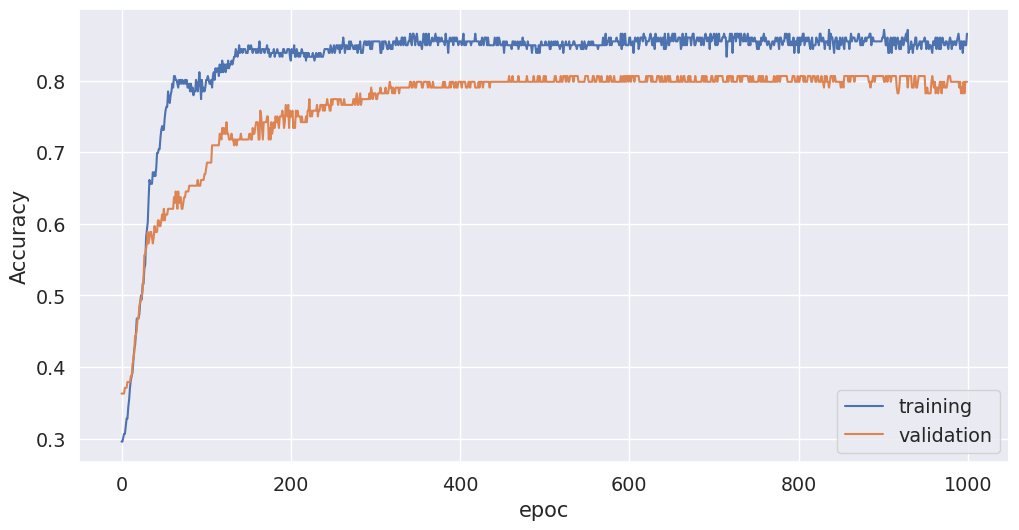

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.1004 - accuracy: 0.6562

186/186 [==============================] - 0s 594us/step - loss: 6.2853 - accuracy: 0.7043 - val_loss: 7.4539 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.3413 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 6.0314 - accuracy: 0.7043 - val_loss: 7.2189 - val_accuracy: 0.6371


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.2297 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 5.8512 - accuracy: 0.7043 - val_loss: 7.0183 - val_accuracy: 0.6371


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.7247 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 5.6914 - accuracy: 0.7043 - val_loss: 6.8263 - val_accuracy: 0.6371


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.3157 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 5.5339 - accuracy: 0.7043 - val_loss: 6.6356 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.7567 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 5.3786 - accuracy: 0.7043 - val_loss: 6.4482 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.4511 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 5.2266 - accuracy: 0.7043 - val_loss: 6.2628 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5185 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 5.0749 - accuracy: 0.7043 - val_loss: 6.0808 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3730 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 4.9231 - accuracy: 0.7043 - val_loss: 5.8896 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.3341 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 4.7722 - accuracy: 0.7043 - val_loss: 5.7102 - val_accuracy: 0.6371


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3640 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 4.6223 - accuracy: 0.7043 - val_loss: 5.5251 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.5678 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 4.4777 - accuracy: 0.7043 - val_loss: 5.3605 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0547 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 4.3389 - accuracy: 0.7043 - val_loss: 5.1845 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.6761 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 4.1990 - accuracy: 0.7043 - val_loss: 5.0176 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3817 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 4.0606 - accuracy: 0.7043 - val_loss: 4.8488 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9752 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 3.9212 - accuracy: 0.7043 - val_loss: 4.6772 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.0043 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 3.7821 - accuracy: 0.7043 - val_loss: 4.5116 - val_accuracy: 0.6371


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1142 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 3.6438 - accuracy: 0.7043 - val_loss: 4.3373 - val_accuracy: 0.6371


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4856 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 3.5030 - accuracy: 0.7043 - val_loss: 4.1723 - val_accuracy: 0.6371


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2160 - accuracy: 0.7188

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 54us/step - loss: 3.3683 - accuracy: 0.7043 - val_loss: 4.0073 - val_accuracy: 0.6371


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8082 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 3.2323 - accuracy: 0.7043 - val_loss: 3.8411 - val_accuracy: 0.6371


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.2746 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 3.0992 - accuracy: 0.7043 - val_loss: 3.6853 - val_accuracy: 0.6371


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2846 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 2.9708 - accuracy: 0.7043 - val_loss: 3.5260 - val_accuracy: 0.6371


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7510 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 2.8374 - accuracy: 0.7043 - val_loss: 3.3617 - val_accuracy: 0.6371


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.4480 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 2.7064 - accuracy: 0.7043 - val_loss: 3.2050 - val_accuracy: 0.6371


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9309 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 2.5762 - accuracy: 0.7043 - val_loss: 3.0464 - val_accuracy: 0.6371


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6960 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 2.4495 - accuracy: 0.7043 - val_loss: 2.8958 - val_accuracy: 0.6371


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1255 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 2.3310 - accuracy: 0.7043 - val_loss: 2.7463 - val_accuracy: 0.6371


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7965 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 2.2140 - accuracy: 0.7043 - val_loss: 2.6035 - val_accuracy: 0.6371


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2880 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 2.0994 - accuracy: 0.7043 - val_loss: 2.4572 - val_accuracy: 0.6371


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7567 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 1.9886 - accuracy: 0.7043 - val_loss: 2.3184 - val_accuracy: 0.6371


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8613 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 1.8801 - accuracy: 0.7043 - val_loss: 2.1820 - val_accuracy: 0.6371


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9979 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 1.7743 - accuracy: 0.7043 - val_loss: 2.0516 - val_accuracy: 0.6371


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5486 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 1.6725 - accuracy: 0.7043 - val_loss: 1.9417 - val_accuracy: 0.6371


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2176 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 1.5833 - accuracy: 0.7043 - val_loss: 1.8415 - val_accuracy: 0.6371


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6905 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 1.5014 - accuracy: 0.7043 - val_loss: 1.7489 - val_accuracy: 0.6371


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1747 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 1.4273 - accuracy: 0.7043 - val_loss: 1.6649 - val_accuracy: 0.6371


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0117 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 1.3636 - accuracy: 0.7043 - val_loss: 1.5930 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7177 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 1.3089 - accuracy: 0.7043 - val_loss: 1.5247 - val_accuracy: 0.6371


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7965 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 1.2571 - accuracy: 0.7043 - val_loss: 1.4599 - val_accuracy: 0.6371


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4566 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 1.2059 - accuracy: 0.7043 - val_loss: 1.3949 - val_accuracy: 0.6371


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8287 - accuracy: 0.5000

186/186 [==============================] - 0s 49us/step - loss: 1.1602 - accuracy: 0.7043 - val_loss: 1.3364 - val_accuracy: 0.6371


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8944 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 1.1129 - accuracy: 0.7043 - val_loss: 1.2767 - val_accuracy: 0.6371


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4699 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 1.0689 - accuracy: 0.7043 - val_loss: 1.2208 - val_accuracy: 0.6371


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7942 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 1.0252 - accuracy: 0.7043 - val_loss: 1.1618 - val_accuracy: 0.6371


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1695 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.9823 - accuracy: 0.7043 - val_loss: 1.1097 - val_accuracy: 0.6371


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9681 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.9434 - accuracy: 0.7043 - val_loss: 1.0623 - val_accuracy: 0.6371


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9540 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.9061 - accuracy: 0.7043 - val_loss: 1.0224 - val_accuracy: 0.6371


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9615 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.8731 - accuracy: 0.7043 - val_loss: 0.9845 - val_accuracy: 0.6371


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.8406 - accuracy: 0.7043 - val_loss: 0.9481 - val_accuracy: 0.6371


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8988 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.8083 - accuracy: 0.7043 - val_loss: 0.9138 - val_accuracy: 0.6371


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7747 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.7777 - accuracy: 0.7043 - val_loss: 0.8802 - val_accuracy: 0.6371


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.7483 - accuracy: 0.7043 - val_loss: 0.8468 - val_accuracy: 0.6371


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5865 - accuracy: 0.7500



186/186 [==============================] - 0s 45us/step - loss: 0.7211 - accuracy: 0.7043 - val_loss: 0.8159 - val_accuracy: 0.6371


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6742 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6957 - accuracy: 0.7043 - val_loss: 0.7862 - val_accuracy: 0.6371


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8518 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.6721 - accuracy: 0.7043 - val_loss: 0.7582 - val_accuracy: 0.6371


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5821 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6489 - accuracy: 0.7097 - val_loss: 0.7313 - val_accuracy: 0.6371


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7461 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6280 - accuracy: 0.7097 - val_loss: 0.7053 - val_accuracy: 0.6290


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8277 - accuracy: 0.5312



186/186 [==============================] - 0s 46us/step - loss: 0.6076 - accuracy: 0.7043 - val_loss: 0.6817 - val_accuracy: 0.6290


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5160 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5877 - accuracy: 0.7097 - val_loss: 0.6580 - val_accuracy: 0.6371


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5706 - accuracy: 0.7151 - val_loss: 0.6373 - val_accuracy: 0.6371


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5536 - accuracy: 0.7151 - val_loss: 0.6177 - val_accuracy: 0.6452


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6880 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5383 - accuracy: 0.7151 - val_loss: 0.6009 - val_accuracy: 0.6532


Epoch 64/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5244 - accuracy: 0.7258 - val_loss: 0.5845 - val_accuracy: 0.6532


Epoch 65/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5111 - accuracy: 0.7312 - val_loss: 0.5701 - val_accuracy: 0.6532


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4996 - accuracy: 0.7366 - val_loss: 0.5561 - val_accuracy: 0.6452


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4888 - accuracy: 0.7366 - val_loss: 0.5439 - val_accuracy: 0.6613


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4789 - accuracy: 0.7312 - val_loss: 0.5324 - val_accuracy: 0.6694


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4707 - accuracy: 0.7366 - val_loss: 0.5238 - val_accuracy: 0.6694


Epoch 70/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.4630 - accuracy: 0.7258 - val_loss: 0.5162 - val_accuracy: 0.6694


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4559 - accuracy: 0.7312 - val_loss: 0.5084 - val_accuracy: 0.6694


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4495 - accuracy: 0.7419 - val_loss: 0.5014 - val_accuracy: 0.6855


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4434 - accuracy: 0.7527 - val_loss: 0.4957 - val_accuracy: 0.7016


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5313 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4388 - accuracy: 0.7634 - val_loss: 0.4909 - val_accuracy: 0.6935


Epoch 75/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4007 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4354 - accuracy: 0.7796 - val_loss: 0.4880 - val_accuracy: 0.7097


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4323 - accuracy: 0.7796 - val_loss: 0.4857 - val_accuracy: 0.7016


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5148 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4308 - accuracy: 0.7742 - val_loss: 0.4838 - val_accuracy: 0.7016


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4840 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4291 - accuracy: 0.7957 - val_loss: 0.4823 - val_accuracy: 0.7097


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4273 - accuracy: 0.7903 - val_loss: 0.4806 - val_accuracy: 0.7177


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4254 - accuracy: 0.7903 - val_loss: 0.4790 - val_accuracy: 0.7097


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3746 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4245 - accuracy: 0.7903 - val_loss: 0.4775 - val_accuracy: 0.7419


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4936 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4233 - accuracy: 0.7957 - val_loss: 0.4764 - val_accuracy: 0.7339


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4226 - accuracy: 0.7957 - val_loss: 0.4755 - val_accuracy: 0.7339


Epoch 84/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.4218 - accuracy: 0.7903 - val_loss: 0.4747 - val_accuracy: 0.7339


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.4206 - accuracy: 0.7903 - val_loss: 0.4740 - val_accuracy: 0.7339


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4199 - accuracy: 0.7903 - val_loss: 0.4732 - val_accuracy: 0.7339


Epoch 87/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4188 - accuracy: 0.7903 - val_loss: 0.4722 - val_accuracy: 0.7339


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4179 - accuracy: 0.7903 - val_loss: 0.4715 - val_accuracy: 0.7339


Epoch 89/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4037 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4169 - accuracy: 0.7903 - val_loss: 0.4706 - val_accuracy: 0.7339


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4158 - accuracy: 0.7903 - val_loss: 0.4697 - val_accuracy: 0.7419


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4153 - accuracy: 0.7849 - val_loss: 0.4690 - val_accuracy: 0.7419


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4138 - accuracy: 0.7903 - val_loss: 0.4683 - val_accuracy: 0.7500


Epoch 93/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4130 - accuracy: 0.7849 - val_loss: 0.4676 - val_accuracy: 0.7500


Epoch 94/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4121 - accuracy: 0.7849 - val_loss: 0.4668 - val_accuracy: 0.7500


Epoch 95/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.4108 - accuracy: 0.7903 - val_loss: 0.4660 - val_accuracy: 0.7581


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4100 - accuracy: 0.7903 - val_loss: 0.4653 - val_accuracy: 0.7823


Epoch 97/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5453 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4087 - accuracy: 0.7903 - val_loss: 0.4646 - val_accuracy: 0.7742


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4077 - accuracy: 0.7903 - val_loss: 0.4639 - val_accuracy: 0.7823


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4064 - accuracy: 0.7903 - val_loss: 0.4632 - val_accuracy: 0.7742


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.4056 - accuracy: 0.7796 - val_loss: 0.4627 - val_accuracy: 0.7903


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5122 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.4047 - accuracy: 0.7742 - val_loss: 0.4619 - val_accuracy: 0.7823


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4039 - accuracy: 0.7903 - val_loss: 0.4613 - val_accuracy: 0.7903


Epoch 103/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4029 - accuracy: 0.7849 - val_loss: 0.4608 - val_accuracy: 0.7984


Epoch 104/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3822 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4018 - accuracy: 0.7903 - val_loss: 0.4603 - val_accuracy: 0.7903


Epoch 105/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4013 - accuracy: 0.7849 - val_loss: 0.4599 - val_accuracy: 0.7903


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4007 - accuracy: 0.8065 - val_loss: 0.4595 - val_accuracy: 0.7742


Epoch 107/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3998 - accuracy: 0.8011 - val_loss: 0.4590 - val_accuracy: 0.7823


Epoch 108/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3993 - accuracy: 0.8118 - val_loss: 0.4585 - val_accuracy: 0.7903


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3984 - accuracy: 0.8065 - val_loss: 0.4583 - val_accuracy: 0.7823


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4440 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3979 - accuracy: 0.8118 - val_loss: 0.4579 - val_accuracy: 0.7823


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3730 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3966 - accuracy: 0.8226 - val_loss: 0.4574 - val_accuracy: 0.7984


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3959 - accuracy: 0.8226 - val_loss: 0.4571 - val_accuracy: 0.7823


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3951 - accuracy: 0.8226 - val_loss: 0.4568 - val_accuracy: 0.7823


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.3944 - accuracy: 0.8226 - val_loss: 0.4561 - val_accuracy: 0.7903


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3939 - accuracy: 0.8226 - val_loss: 0.4559 - val_accuracy: 0.7903


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3930 - accuracy: 0.8226 - val_loss: 0.4556 - val_accuracy: 0.7823


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3924 - accuracy: 0.8226 - val_loss: 0.4552 - val_accuracy: 0.7984


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5028 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3919 - accuracy: 0.8226 - val_loss: 0.4546 - val_accuracy: 0.7903


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3913 - accuracy: 0.8226 - val_loss: 0.4543 - val_accuracy: 0.7903


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3912 - accuracy: 0.8226 - val_loss: 0.4540 - val_accuracy: 0.7984


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3903 - accuracy: 0.8226 - val_loss: 0.4537 - val_accuracy: 0.7903


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 1.0000

186/186 [==============================] - 0s 49us/step - loss: 0.3899 - accuracy: 0.8280 - val_loss: 0.4532 - val_accuracy: 0.7903


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3894 - accuracy: 0.8226 - val_loss: 0.4531 - val_accuracy: 0.7823


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3889 - accuracy: 0.8280 - val_loss: 0.4525 - val_accuracy: 0.7903


Epoch 125/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3886 - accuracy: 0.8172 - val_loss: 0.4524 - val_accuracy: 0.7823


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3886 - accuracy: 0.8280 - val_loss: 0.4519 - val_accuracy: 0.7823


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5437 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3881 - accuracy: 0.8280 - val_loss: 0.4518 - val_accuracy: 0.7661


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3872 - accuracy: 0.8333 - val_loss: 0.4512 - val_accuracy: 0.7823


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3870 - accuracy: 0.8333 - val_loss: 0.4511 - val_accuracy: 0.7823


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3871 - accuracy: 0.8333 - val_loss: 0.4506 - val_accuracy: 0.7823


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3861 - accuracy: 0.8280 - val_loss: 0.4503 - val_accuracy: 0.7823


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3861 - accuracy: 0.8333 - val_loss: 0.4500 - val_accuracy: 0.7823


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3855 - accuracy: 0.8333 - val_loss: 0.4500 - val_accuracy: 0.7661


Epoch 134/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3850 - accuracy: 0.8333 - val_loss: 0.4495 - val_accuracy: 0.7823


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3853 - accuracy: 0.8226 - val_loss: 0.4494 - val_accuracy: 0.7742


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3846 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.7823


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3992 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3839 - accuracy: 0.8280 - val_loss: 0.4489 - val_accuracy: 0.7823


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4271 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3836 - accuracy: 0.8280 - val_loss: 0.4488 - val_accuracy: 0.7823


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5016 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3834 - accuracy: 0.8280 - val_loss: 0.4487 - val_accuracy: 0.7742


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3832 - accuracy: 0.8280 - val_loss: 0.4483 - val_accuracy: 0.7823


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3831 - accuracy: 0.8280 - val_loss: 0.4480 - val_accuracy: 0.7823


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4195 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3825 - accuracy: 0.8333 - val_loss: 0.4482 - val_accuracy: 0.7742


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3821 - accuracy: 0.8387 - val_loss: 0.4479 - val_accuracy: 0.7742


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3819 - accuracy: 0.8387 - val_loss: 0.4475 - val_accuracy: 0.7823


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3816 - accuracy: 0.8333 - val_loss: 0.4474 - val_accuracy: 0.7823


Epoch 146/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3813 - accuracy: 0.8333 - val_loss: 0.4473 - val_accuracy: 0.7823


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3816 - accuracy: 0.8226 - val_loss: 0.4470 - val_accuracy: 0.7823


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3807 - accuracy: 0.8333 - val_loss: 0.4471 - val_accuracy: 0.7823


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3806 - accuracy: 0.8333 - val_loss: 0.4469 - val_accuracy: 0.7823


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3822 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3801 - accuracy: 0.8333 - val_loss: 0.4465 - val_accuracy: 0.7823


Epoch 151/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3808 - accuracy: 0.8333 - val_loss: 0.4466 - val_accuracy: 0.7823


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3797 - accuracy: 0.8333 - val_loss: 0.4467 - val_accuracy: 0.7742


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4868 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3799 - accuracy: 0.8333 - val_loss: 0.4464 - val_accuracy: 0.7823


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3792 - accuracy: 0.8333 - val_loss: 0.4464 - val_accuracy: 0.7742


Epoch 155/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3795 - accuracy: 0.8333 - val_loss: 0.4462 - val_accuracy: 0.7742


Epoch 156/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3793 - accuracy: 0.8387 - val_loss: 0.4460 - val_accuracy: 0.7742


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3788 - accuracy: 0.8333 - val_loss: 0.4460 - val_accuracy: 0.7661


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3788 - accuracy: 0.8333 - val_loss: 0.4457 - val_accuracy: 0.7742


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3783 - accuracy: 0.8387 - val_loss: 0.4455 - val_accuracy: 0.7823


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3785 - accuracy: 0.8333 - val_loss: 0.4455 - val_accuracy: 0.7742


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.3782 - accuracy: 0.8387 - val_loss: 0.4453 - val_accuracy: 0.7742


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3781 - accuracy: 0.8387 - val_loss: 0.4452 - val_accuracy: 0.7742


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3778 - accuracy: 0.8387 - val_loss: 0.4452 - val_accuracy: 0.7742


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3780 - accuracy: 0.8387 - val_loss: 0.4452 - val_accuracy: 0.7742


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3775 - accuracy: 0.8441 - val_loss: 0.4450 - val_accuracy: 0.7742


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4871 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3770 - accuracy: 0.8441 - val_loss: 0.4449 - val_accuracy: 0.7742


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3771 - accuracy: 0.8387 - val_loss: 0.4448 - val_accuracy: 0.7742


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3766 - accuracy: 0.8441 - val_loss: 0.4447 - val_accuracy: 0.7742


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3767 - accuracy: 0.8441 - val_loss: 0.4446 - val_accuracy: 0.7742


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3766 - accuracy: 0.8441 - val_loss: 0.4444 - val_accuracy: 0.7742


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3760 - accuracy: 0.8387 - val_loss: 0.4444 - val_accuracy: 0.7742


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3764 - accuracy: 0.8387 - val_loss: 0.4444 - val_accuracy: 0.7742


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3759 - accuracy: 0.8441 - val_loss: 0.4442 - val_accuracy: 0.7742


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5332 - accuracy: 0.7500



186/186 [==============================] - 0s 45us/step - loss: 0.3756 - accuracy: 0.8441 - val_loss: 0.4442 - val_accuracy: 0.7742


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3758 - accuracy: 0.8441 - val_loss: 0.4441 - val_accuracy: 0.7742


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3752 - accuracy: 0.8548 - val_loss: 0.4440 - val_accuracy: 0.7742


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5571 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.3755 - accuracy: 0.8548 - val_loss: 0.4439 - val_accuracy: 0.7742


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3750 - accuracy: 0.8441 - val_loss: 0.4438 - val_accuracy: 0.7742


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4285 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3747 - accuracy: 0.8495 - val_loss: 0.4440 - val_accuracy: 0.7661


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3747 - accuracy: 0.8495 - val_loss: 0.4437 - val_accuracy: 0.7742


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3743 - accuracy: 0.8548 - val_loss: 0.4436 - val_accuracy: 0.7742


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4066 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3748 - accuracy: 0.8495 - val_loss: 0.4436 - val_accuracy: 0.7742


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.3738 - accuracy: 0.8495 - val_loss: 0.4434 - val_accuracy: 0.7742


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3746 - accuracy: 0.8387 - val_loss: 0.4434 - val_accuracy: 0.7742


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3737 - accuracy: 0.8495 - val_loss: 0.4433 - val_accuracy: 0.7742


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3734 - accuracy: 0.8495 - val_loss: 0.4434 - val_accuracy: 0.7661


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3739 - accuracy: 0.8495 - val_loss: 0.4432 - val_accuracy: 0.7823


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3734 - accuracy: 0.8441 - val_loss: 0.4431 - val_accuracy: 0.7823


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3730 - accuracy: 0.8548 - val_loss: 0.4431 - val_accuracy: 0.7823


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3729 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.7823


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3732 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.7823


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3724 - accuracy: 0.8495 - val_loss: 0.4427 - val_accuracy: 0.7823


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4995 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3723 - accuracy: 0.8441 - val_loss: 0.4426 - val_accuracy: 0.7823


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5612 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3724 - accuracy: 0.8495 - val_loss: 0.4426 - val_accuracy: 0.7823


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4136 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3723 - accuracy: 0.8495 - val_loss: 0.4425 - val_accuracy: 0.7823


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3719 - accuracy: 0.8441 - val_loss: 0.4424 - val_accuracy: 0.7823


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3714 - accuracy: 0.8548 - val_loss: 0.4424 - val_accuracy: 0.7742


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3717 - accuracy: 0.8495 - val_loss: 0.4423 - val_accuracy: 0.7742


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3714 - accuracy: 0.8495 - val_loss: 0.4423 - val_accuracy: 0.7742


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3714 - accuracy: 0.8495 - val_loss: 0.4422 - val_accuracy: 0.7742


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3715 - accuracy: 0.8495 - val_loss: 0.4421 - val_accuracy: 0.7742


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3708 - accuracy: 0.8495 - val_loss: 0.4421 - val_accuracy: 0.7742


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3704 - accuracy: 0.8495 - val_loss: 0.4421 - val_accuracy: 0.7661


Epoch 204/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3707 - accuracy: 0.8495 - val_loss: 0.4419 - val_accuracy: 0.7742


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4687 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3706 - accuracy: 0.8495 - val_loss: 0.4418 - val_accuracy: 0.7742


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3706 - accuracy: 0.8495 - val_loss: 0.4418 - val_accuracy: 0.7661


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1919 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3700 - accuracy: 0.8495 - val_loss: 0.4417 - val_accuracy: 0.7742


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3696 - accuracy: 0.8495 - val_loss: 0.4416 - val_accuracy: 0.7742


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3696 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.7742


Epoch 210/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3693 - accuracy: 0.8495 - val_loss: 0.4414 - val_accuracy: 0.7742


Epoch 211/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3696 - accuracy: 0.8495 - val_loss: 0.4414 - val_accuracy: 0.7742


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3689 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.7742


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3690 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.7742


Epoch 214/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3685 - accuracy: 0.8495 - val_loss: 0.4411 - val_accuracy: 0.7742


Epoch 215/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.3687 - accuracy: 0.8495 - val_loss: 0.4411 - val_accuracy: 0.7742


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5381 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3688 - accuracy: 0.8495 - val_loss: 0.4409 - val_accuracy: 0.7742


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3632 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3682 - accuracy: 0.8495 - val_loss: 0.4409 - val_accuracy: 0.7742


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3683 - accuracy: 0.8495 - val_loss: 0.4408 - val_accuracy: 0.7742


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3682 - accuracy: 0.8495 - val_loss: 0.4407 - val_accuracy: 0.7742


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3682 - accuracy: 0.8495 - val_loss: 0.4406 - val_accuracy: 0.7742


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3675 - accuracy: 0.8495 - val_loss: 0.4406 - val_accuracy: 0.7742


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3677 - accuracy: 0.8495 - val_loss: 0.4405 - val_accuracy: 0.7661


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3674 - accuracy: 0.8495 - val_loss: 0.4406 - val_accuracy: 0.7661


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3669 - accuracy: 0.8495 - val_loss: 0.4405 - val_accuracy: 0.7661


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3671 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7661


Epoch 226/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3670 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.7661


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3668 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.7661


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3664 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.7661


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3666 - accuracy: 0.8495 - val_loss: 0.4401 - val_accuracy: 0.7661


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3663 - accuracy: 0.8495 - val_loss: 0.4400 - val_accuracy: 0.7661


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3658 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7661


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4444 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3662 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7661


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4307 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3663 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7661


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3656 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7661


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4132 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3654 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7661


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3654 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.7661


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3649 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.7661


Epoch 238/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3649 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7661


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3655 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7661


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3650 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7661


Epoch 241/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3651 - accuracy: 0.8495 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 242/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3644 - accuracy: 0.8495 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 243/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3643 - accuracy: 0.8495 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 244/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3644 - accuracy: 0.8495 - val_loss: 0.4392 - val_accuracy: 0.7661


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3640 - accuracy: 0.8495 - val_loss: 0.4392 - val_accuracy: 0.7661


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3641 - accuracy: 0.8495 - val_loss: 0.4392 - val_accuracy: 0.7581


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3640 - accuracy: 0.8495 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3533 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3640 - accuracy: 0.8495 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3637 - accuracy: 0.8495 - val_loss: 0.4389 - val_accuracy: 0.7661


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3636 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3634 - accuracy: 0.8495 - val_loss: 0.4387 - val_accuracy: 0.7661


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3905 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3630 - accuracy: 0.8495 - val_loss: 0.4387 - val_accuracy: 0.7661


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3632 - accuracy: 0.8495 - val_loss: 0.4387 - val_accuracy: 0.7661


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3629 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3638 - accuracy: 0.8495 - val_loss: 0.4386 - val_accuracy: 0.7661


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 1.0000

186/186 [==============================] - 0s 47us/step - loss: 0.3629 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3626 - accuracy: 0.8548 - val_loss: 0.4385 - val_accuracy: 0.7661


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3625 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7661


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3623 - accuracy: 0.8602 - val_loss: 0.4385 - val_accuracy: 0.7661


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4583 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3618 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7581


Epoch 261/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3619 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7581


Epoch 262/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3621 - accuracy: 0.8602 - val_loss: 0.4383 - val_accuracy: 0.7661


Epoch 263/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3618 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7581


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3616 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7581


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3616 - accuracy: 0.8495 - val_loss: 0.4380 - val_accuracy: 0.7661


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3614 - accuracy: 0.8495 - val_loss: 0.4380 - val_accuracy: 0.7661


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3613 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7661


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3608 - accuracy: 0.8602 - val_loss: 0.4382 - val_accuracy: 0.7581


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3611 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7581


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3607 - accuracy: 0.8602 - val_loss: 0.4377 - val_accuracy: 0.7661


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3607 - accuracy: 0.8602 - val_loss: 0.4376 - val_accuracy: 0.7661


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3609 - accuracy: 0.8656 - val_loss: 0.4375 - val_accuracy: 0.7661


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3604 - accuracy: 0.8602 - val_loss: 0.4375 - val_accuracy: 0.7661


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3604 - accuracy: 0.8602 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4655 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3600 - accuracy: 0.8602 - val_loss: 0.4373 - val_accuracy: 0.7581


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3600 - accuracy: 0.8602 - val_loss: 0.4371 - val_accuracy: 0.7581


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3604 - accuracy: 0.8602 - val_loss: 0.4371 - val_accuracy: 0.7581


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4234 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3594 - accuracy: 0.8602 - val_loss: 0.4371 - val_accuracy: 0.7581


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3939 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3594 - accuracy: 0.8656 - val_loss: 0.4371 - val_accuracy: 0.7581


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2209 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3596 - accuracy: 0.8548 - val_loss: 0.4370 - val_accuracy: 0.7581


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4521 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3594 - accuracy: 0.8602 - val_loss: 0.4369 - val_accuracy: 0.7581


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3597 - accuracy: 0.8548 - val_loss: 0.4369 - val_accuracy: 0.7581


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3590 - accuracy: 0.8656 - val_loss: 0.4369 - val_accuracy: 0.7581


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3591 - accuracy: 0.8548 - val_loss: 0.4371 - val_accuracy: 0.7581


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3594 - accuracy: 0.8656 - val_loss: 0.4368 - val_accuracy: 0.7581


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3587 - accuracy: 0.8656 - val_loss: 0.4367 - val_accuracy: 0.7581


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4348 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3584 - accuracy: 0.8656 - val_loss: 0.4366 - val_accuracy: 0.7581


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3582 - accuracy: 0.8656 - val_loss: 0.4363 - val_accuracy: 0.7661


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3584 - accuracy: 0.8548 - val_loss: 0.4363 - val_accuracy: 0.7661


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3582 - accuracy: 0.8656 - val_loss: 0.4364 - val_accuracy: 0.7581


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3580 - accuracy: 0.8656 - val_loss: 0.4361 - val_accuracy: 0.7581


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3578 - accuracy: 0.8656 - val_loss: 0.4362 - val_accuracy: 0.7581


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5561 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3579 - accuracy: 0.8656 - val_loss: 0.4360 - val_accuracy: 0.7581


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.3573 - accuracy: 0.8656 - val_loss: 0.4358 - val_accuracy: 0.7581


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3573 - accuracy: 0.8602 - val_loss: 0.4359 - val_accuracy: 0.7581


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3571 - accuracy: 0.8602 - val_loss: 0.4356 - val_accuracy: 0.7581


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3569 - accuracy: 0.8656 - val_loss: 0.4355 - val_accuracy: 0.7581


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3569 - accuracy: 0.8656 - val_loss: 0.4355 - val_accuracy: 0.7661


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3569 - accuracy: 0.8656 - val_loss: 0.4353 - val_accuracy: 0.7742


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3567 - accuracy: 0.8656 - val_loss: 0.4351 - val_accuracy: 0.7661


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3564 - accuracy: 0.8656 - val_loss: 0.4349 - val_accuracy: 0.7742


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4783 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3562 - accuracy: 0.8656 - val_loss: 0.4347 - val_accuracy: 0.7742


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3558 - accuracy: 0.8656 - val_loss: 0.4347 - val_accuracy: 0.7823


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3559 - accuracy: 0.8656 - val_loss: 0.4344 - val_accuracy: 0.7742


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3555 - accuracy: 0.8656 - val_loss: 0.4344 - val_accuracy: 0.7742


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3557 - accuracy: 0.8656 - val_loss: 0.4342 - val_accuracy: 0.7823


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4722 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3552 - accuracy: 0.8656 - val_loss: 0.4342 - val_accuracy: 0.7742


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3551 - accuracy: 0.8656 - val_loss: 0.4339 - val_accuracy: 0.7742


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3552 - accuracy: 0.8656 - val_loss: 0.4338 - val_accuracy: 0.7742


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3546 - accuracy: 0.8656 - val_loss: 0.4337 - val_accuracy: 0.7742


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1729 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3550 - accuracy: 0.8656 - val_loss: 0.4336 - val_accuracy: 0.7742


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3545 - accuracy: 0.8656 - val_loss: 0.4335 - val_accuracy: 0.7823


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3545 - accuracy: 0.8656 - val_loss: 0.4334 - val_accuracy: 0.7823


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3541 - accuracy: 0.8656 - val_loss: 0.4332 - val_accuracy: 0.7903


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3541 - accuracy: 0.8656 - val_loss: 0.4330 - val_accuracy: 0.7903


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3539 - accuracy: 0.8602 - val_loss: 0.4329 - val_accuracy: 0.7823


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3538 - accuracy: 0.8656 - val_loss: 0.4328 - val_accuracy: 0.7823


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4464 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3534 - accuracy: 0.8656 - val_loss: 0.4327 - val_accuracy: 0.7823


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3531 - accuracy: 0.8656 - val_loss: 0.4326 - val_accuracy: 0.7823


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3532 - accuracy: 0.8656 - val_loss: 0.4324 - val_accuracy: 0.7903


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3526 - accuracy: 0.8656 - val_loss: 0.4323 - val_accuracy: 0.7823


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3524 - accuracy: 0.8656 - val_loss: 0.4320 - val_accuracy: 0.7903


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3526 - accuracy: 0.8656 - val_loss: 0.4322 - val_accuracy: 0.7823


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3524 - accuracy: 0.8602 - val_loss: 0.4322 - val_accuracy: 0.7823


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3520 - accuracy: 0.8656 - val_loss: 0.4320 - val_accuracy: 0.7823


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4982 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3517 - accuracy: 0.8656 - val_loss: 0.4319 - val_accuracy: 0.7823


Epoch 327/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3730 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3515 - accuracy: 0.8656 - val_loss: 0.4317 - val_accuracy: 0.7823


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3513 - accuracy: 0.8602 - val_loss: 0.4317 - val_accuracy: 0.7823


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4563 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3509 - accuracy: 0.8656 - val_loss: 0.4312 - val_accuracy: 0.7903


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3513 - accuracy: 0.8602 - val_loss: 0.4314 - val_accuracy: 0.7823


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3509 - accuracy: 0.8656 - val_loss: 0.4313 - val_accuracy: 0.7903


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3504 - accuracy: 0.8656 - val_loss: 0.4311 - val_accuracy: 0.7903


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3503 - accuracy: 0.8656 - val_loss: 0.4314 - val_accuracy: 0.7823


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3501 - accuracy: 0.8656 - val_loss: 0.4311 - val_accuracy: 0.7823


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3503 - accuracy: 0.8656 - val_loss: 0.4309 - val_accuracy: 0.7823


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3500 - accuracy: 0.8656 - val_loss: 0.4309 - val_accuracy: 0.7823


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3504 - accuracy: 0.8656 - val_loss: 0.4305 - val_accuracy: 0.7903


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3505 - accuracy: 0.8602 - val_loss: 0.4304 - val_accuracy: 0.7903


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3498 - accuracy: 0.8656 - val_loss: 0.4303 - val_accuracy: 0.7903


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3497 - accuracy: 0.8602 - val_loss: 0.4306 - val_accuracy: 0.7823


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3495 - accuracy: 0.8656 - val_loss: 0.4306 - val_accuracy: 0.7903


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3495 - accuracy: 0.8710 - val_loss: 0.4302 - val_accuracy: 0.7823


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3491 - accuracy: 0.8656 - val_loss: 0.4301 - val_accuracy: 0.7823


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3493 - accuracy: 0.8656 - val_loss: 0.4298 - val_accuracy: 0.7823


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3493 - accuracy: 0.8656 - val_loss: 0.4297 - val_accuracy: 0.7903


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3495 - accuracy: 0.8602 - val_loss: 0.4301 - val_accuracy: 0.7903


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3487 - accuracy: 0.8656 - val_loss: 0.4299 - val_accuracy: 0.7823


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3487 - accuracy: 0.8656 - val_loss: 0.4295 - val_accuracy: 0.7903


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3492 - accuracy: 0.8656 - val_loss: 0.4294 - val_accuracy: 0.7903


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3486 - accuracy: 0.8656 - val_loss: 0.4292 - val_accuracy: 0.7903


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3484 - accuracy: 0.8656 - val_loss: 0.4292 - val_accuracy: 0.7903


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3482 - accuracy: 0.8656 - val_loss: 0.4297 - val_accuracy: 0.7903


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3487 - accuracy: 0.8710 - val_loss: 0.4292 - val_accuracy: 0.7823


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5408 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3482 - accuracy: 0.8710 - val_loss: 0.4291 - val_accuracy: 0.7823


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3480 - accuracy: 0.8710 - val_loss: 0.4290 - val_accuracy: 0.7903


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3481 - accuracy: 0.8710 - val_loss: 0.4293 - val_accuracy: 0.7903


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3476 - accuracy: 0.8710 - val_loss: 0.4289 - val_accuracy: 0.7903


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3480 - accuracy: 0.8710 - val_loss: 0.4288 - val_accuracy: 0.7823


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3478 - accuracy: 0.8710 - val_loss: 0.4287 - val_accuracy: 0.7903


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3475 - accuracy: 0.8710 - val_loss: 0.4287 - val_accuracy: 0.7903


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3475 - accuracy: 0.8710 - val_loss: 0.4287 - val_accuracy: 0.7823


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3473 - accuracy: 0.8710 - val_loss: 0.4286 - val_accuracy: 0.7823


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4650 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3473 - accuracy: 0.8656 - val_loss: 0.4285 - val_accuracy: 0.7823


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3470 - accuracy: 0.8710 - val_loss: 0.4282 - val_accuracy: 0.7903


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3468 - accuracy: 0.8710 - val_loss: 0.4284 - val_accuracy: 0.7903


Epoch 366/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3474 - accuracy: 0.8710 - val_loss: 0.4285 - val_accuracy: 0.7903


Epoch 367/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3473 - accuracy: 0.8656 - val_loss: 0.4281 - val_accuracy: 0.7903


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3467 - accuracy: 0.8656 - val_loss: 0.4285 - val_accuracy: 0.7823


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3541 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3469 - accuracy: 0.8710 - val_loss: 0.4281 - val_accuracy: 0.7903


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4047 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3464 - accuracy: 0.8710 - val_loss: 0.4281 - val_accuracy: 0.7823


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3467 - accuracy: 0.8710 - val_loss: 0.4280 - val_accuracy: 0.7903


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3465 - accuracy: 0.8710 - val_loss: 0.4284 - val_accuracy: 0.7823


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3461 - accuracy: 0.8710 - val_loss: 0.4283 - val_accuracy: 0.7903


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3463 - accuracy: 0.8656 - val_loss: 0.4280 - val_accuracy: 0.7823


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3460 - accuracy: 0.8710 - val_loss: 0.4281 - val_accuracy: 0.7823


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3460 - accuracy: 0.8710 - val_loss: 0.4280 - val_accuracy: 0.7903


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4282 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3458 - accuracy: 0.8710 - val_loss: 0.4282 - val_accuracy: 0.7903


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3462 - accuracy: 0.8710 - val_loss: 0.4279 - val_accuracy: 0.7823


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3456 - accuracy: 0.8710 - val_loss: 0.4277 - val_accuracy: 0.7823


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3457 - accuracy: 0.8710 - val_loss: 0.4277 - val_accuracy: 0.7984


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3455 - accuracy: 0.8710 - val_loss: 0.4276 - val_accuracy: 0.7823


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3452 - accuracy: 0.8710 - val_loss: 0.4278 - val_accuracy: 0.7903


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3453 - accuracy: 0.8710 - val_loss: 0.4274 - val_accuracy: 0.7903


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3453 - accuracy: 0.8710 - val_loss: 0.4276 - val_accuracy: 0.7903


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3450 - accuracy: 0.8656 - val_loss: 0.4271 - val_accuracy: 0.7903


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3450 - accuracy: 0.8710 - val_loss: 0.4273 - val_accuracy: 0.7984


Epoch 387/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1993 - accuracy: 0.9688



186/186 [==============================] - 0s 50us/step - loss: 0.3451 - accuracy: 0.8710 - val_loss: 0.4272 - val_accuracy: 0.7823


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2329 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3450 - accuracy: 0.8710 - val_loss: 0.4270 - val_accuracy: 0.7903


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3448 - accuracy: 0.8710 - val_loss: 0.4273 - val_accuracy: 0.7903


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3444 - accuracy: 0.8656 - val_loss: 0.4270 - val_accuracy: 0.7823


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3443 - accuracy: 0.8710 - val_loss: 0.4269 - val_accuracy: 0.7903


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3744 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3446 - accuracy: 0.8710 - val_loss: 0.4266 - val_accuracy: 0.7903


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3442 - accuracy: 0.8710 - val_loss: 0.4267 - val_accuracy: 0.7903


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3440 - accuracy: 0.8710 - val_loss: 0.4270 - val_accuracy: 0.7903


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3437 - accuracy: 0.8656 - val_loss: 0.4266 - val_accuracy: 0.7984


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3445 - accuracy: 0.8710 - val_loss: 0.4269 - val_accuracy: 0.7903


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3444 - accuracy: 0.8656 - val_loss: 0.4265 - val_accuracy: 0.7984


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3437 - accuracy: 0.8656 - val_loss: 0.4263 - val_accuracy: 0.7903


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3441 - accuracy: 0.8710 - val_loss: 0.4263 - val_accuracy: 0.7903


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3439 - accuracy: 0.8656 - val_loss: 0.4262 - val_accuracy: 0.7903


Epoch 401/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3436 - accuracy: 0.8656 - val_loss: 0.4261 - val_accuracy: 0.7903


Epoch 402/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3431 - accuracy: 0.8710 - val_loss: 0.4263 - val_accuracy: 0.7903


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3438 - accuracy: 0.8710 - val_loss: 0.4264 - val_accuracy: 0.7903


Epoch 404/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3436 - accuracy: 0.8656 - val_loss: 0.4263 - val_accuracy: 0.7984


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3433 - accuracy: 0.8656 - val_loss: 0.4261 - val_accuracy: 0.7984


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3429 - accuracy: 0.8656 - val_loss: 0.4263 - val_accuracy: 0.7984


Epoch 407/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3429 - accuracy: 0.8710 - val_loss: 0.4265 - val_accuracy: 0.7823


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3432 - accuracy: 0.8710 - val_loss: 0.4263 - val_accuracy: 0.7903


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3428 - accuracy: 0.8710 - val_loss: 0.4264 - val_accuracy: 0.7903


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3428 - accuracy: 0.8656 - val_loss: 0.4262 - val_accuracy: 0.7903


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3426 - accuracy: 0.8656 - val_loss: 0.4260 - val_accuracy: 0.7903


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3427 - accuracy: 0.8656 - val_loss: 0.4261 - val_accuracy: 0.7903


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3423 - accuracy: 0.8656 - val_loss: 0.4262 - val_accuracy: 0.7823


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3424 - accuracy: 0.8656 - val_loss: 0.4261 - val_accuracy: 0.7903


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3434 - accuracy: 0.8710 - val_loss: 0.4260 - val_accuracy: 0.7823


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3422 - accuracy: 0.8656 - val_loss: 0.4257 - val_accuracy: 0.7984


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3423 - accuracy: 0.8656 - val_loss: 0.4255 - val_accuracy: 0.7984


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3419 - accuracy: 0.8656 - val_loss: 0.4257 - val_accuracy: 0.7903


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3420 - accuracy: 0.8656 - val_loss: 0.4258 - val_accuracy: 0.7823


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3415 - accuracy: 0.8656 - val_loss: 0.4256 - val_accuracy: 0.7823


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4863 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3417 - accuracy: 0.8656 - val_loss: 0.4254 - val_accuracy: 0.7984


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3416 - accuracy: 0.8656 - val_loss: 0.4252 - val_accuracy: 0.7984


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3415 - accuracy: 0.8656 - val_loss: 0.4253 - val_accuracy: 0.7984


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3417 - accuracy: 0.8710 - val_loss: 0.4254 - val_accuracy: 0.7903


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3412 - accuracy: 0.8656 - val_loss: 0.4252 - val_accuracy: 0.7984


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5536 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3410 - accuracy: 0.8656 - val_loss: 0.4253 - val_accuracy: 0.7903


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3413 - accuracy: 0.8656 - val_loss: 0.4246 - val_accuracy: 0.7984


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4784 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3409 - accuracy: 0.8656 - val_loss: 0.4247 - val_accuracy: 0.7984


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3703 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3411 - accuracy: 0.8656 - val_loss: 0.4248 - val_accuracy: 0.7984


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3411 - accuracy: 0.8656 - val_loss: 0.4248 - val_accuracy: 0.7984


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3406 - accuracy: 0.8656 - val_loss: 0.4247 - val_accuracy: 0.7984


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3414 - accuracy: 0.8656 - val_loss: 0.4250 - val_accuracy: 0.7823


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3409 - accuracy: 0.8656 - val_loss: 0.4252 - val_accuracy: 0.7903


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4828 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3404 - accuracy: 0.8656 - val_loss: 0.4247 - val_accuracy: 0.7903


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3402 - accuracy: 0.8656 - val_loss: 0.4246 - val_accuracy: 0.7903


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3404 - accuracy: 0.8656 - val_loss: 0.4247 - val_accuracy: 0.7903


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3407 - accuracy: 0.8656 - val_loss: 0.4246 - val_accuracy: 0.7903


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3401 - accuracy: 0.8656 - val_loss: 0.4243 - val_accuracy: 0.7984


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3405 - accuracy: 0.8656 - val_loss: 0.4244 - val_accuracy: 0.7984


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2081 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3401 - accuracy: 0.8656 - val_loss: 0.4246 - val_accuracy: 0.7903


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3398 - accuracy: 0.8656 - val_loss: 0.4244 - val_accuracy: 0.7984


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3978 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3400 - accuracy: 0.8656 - val_loss: 0.4244 - val_accuracy: 0.7984


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3398 - accuracy: 0.8656 - val_loss: 0.4244 - val_accuracy: 0.7903


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3397 - accuracy: 0.8656 - val_loss: 0.4246 - val_accuracy: 0.7903


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3398 - accuracy: 0.8656 - val_loss: 0.4250 - val_accuracy: 0.7903


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3399 - accuracy: 0.8656 - val_loss: 0.4246 - val_accuracy: 0.7903


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3392 - accuracy: 0.8656 - val_loss: 0.4245 - val_accuracy: 0.7903


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3395 - accuracy: 0.8656 - val_loss: 0.4243 - val_accuracy: 0.7903


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3395 - accuracy: 0.8656 - val_loss: 0.4243 - val_accuracy: 0.7903


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3393 - accuracy: 0.8656 - val_loss: 0.4243 - val_accuracy: 0.7823


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3390 - accuracy: 0.8710 - val_loss: 0.4236 - val_accuracy: 0.7984


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3390 - accuracy: 0.8656 - val_loss: 0.4237 - val_accuracy: 0.7903


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3389 - accuracy: 0.8656 - val_loss: 0.4235 - val_accuracy: 0.7984


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3396 - accuracy: 0.8656 - val_loss: 0.4234 - val_accuracy: 0.7984


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2824 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3389 - accuracy: 0.8656 - val_loss: 0.4236 - val_accuracy: 0.7903


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3388 - accuracy: 0.8710 - val_loss: 0.4240 - val_accuracy: 0.7823


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3391 - accuracy: 0.8656 - val_loss: 0.4240 - val_accuracy: 0.7903


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4799 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3385 - accuracy: 0.8656 - val_loss: 0.4240 - val_accuracy: 0.7903


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3384 - accuracy: 0.8656 - val_loss: 0.4238 - val_accuracy: 0.7903


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3381 - accuracy: 0.8710 - val_loss: 0.4233 - val_accuracy: 0.7903


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3389 - accuracy: 0.8710 - val_loss: 0.4232 - val_accuracy: 0.7903


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3380 - accuracy: 0.8656 - val_loss: 0.4232 - val_accuracy: 0.7903


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3379 - accuracy: 0.8656 - val_loss: 0.4235 - val_accuracy: 0.7903


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3378 - accuracy: 0.8710 - val_loss: 0.4228 - val_accuracy: 0.7984


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3381 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7984


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3384 - accuracy: 0.8656 - val_loss: 0.4231 - val_accuracy: 0.7903


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3378 - accuracy: 0.8656 - val_loss: 0.4234 - val_accuracy: 0.7903


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3384 - accuracy: 0.8656 - val_loss: 0.4231 - val_accuracy: 0.7903


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4914 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3374 - accuracy: 0.8710 - val_loss: 0.4231 - val_accuracy: 0.7903


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3376 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7984


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3373 - accuracy: 0.8656 - val_loss: 0.4233 - val_accuracy: 0.7903


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3752 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3371 - accuracy: 0.8710 - val_loss: 0.4224 - val_accuracy: 0.7984


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3372 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7903


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2050 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3380 - accuracy: 0.8656 - val_loss: 0.4229 - val_accuracy: 0.7903


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3376 - accuracy: 0.8656 - val_loss: 0.4229 - val_accuracy: 0.7903


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3370 - accuracy: 0.8656 - val_loss: 0.4228 - val_accuracy: 0.7903


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3367 - accuracy: 0.8656 - val_loss: 0.4224 - val_accuracy: 0.7984


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4654 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3370 - accuracy: 0.8656 - val_loss: 0.4223 - val_accuracy: 0.7984


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4198 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3365 - accuracy: 0.8656 - val_loss: 0.4219 - val_accuracy: 0.7984


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4482 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3369 - accuracy: 0.8656 - val_loss: 0.4221 - val_accuracy: 0.7984


Epoch 481/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3364 - accuracy: 0.8710 - val_loss: 0.4222 - val_accuracy: 0.7984


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4238 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3363 - accuracy: 0.8710 - val_loss: 0.4222 - val_accuracy: 0.7984


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3370 - accuracy: 0.8656 - val_loss: 0.4221 - val_accuracy: 0.7984


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3363 - accuracy: 0.8656 - val_loss: 0.4221 - val_accuracy: 0.7903


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3364 - accuracy: 0.8656 - val_loss: 0.4221 - val_accuracy: 0.7903


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3563 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3360 - accuracy: 0.8656 - val_loss: 0.4221 - val_accuracy: 0.7903


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3358 - accuracy: 0.8710 - val_loss: 0.4215 - val_accuracy: 0.7984


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3361 - accuracy: 0.8656 - val_loss: 0.4220 - val_accuracy: 0.7903


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3358 - accuracy: 0.8656 - val_loss: 0.4225 - val_accuracy: 0.7903


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3358 - accuracy: 0.8710 - val_loss: 0.4217 - val_accuracy: 0.7984


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3551 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3359 - accuracy: 0.8710 - val_loss: 0.4219 - val_accuracy: 0.7903


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3358 - accuracy: 0.8710 - val_loss: 0.4218 - val_accuracy: 0.7903


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3354 - accuracy: 0.8710 - val_loss: 0.4214 - val_accuracy: 0.7984


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3353 - accuracy: 0.8710 - val_loss: 0.4215 - val_accuracy: 0.7903


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3352 - accuracy: 0.8656 - val_loss: 0.4219 - val_accuracy: 0.7903


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3352 - accuracy: 0.8710 - val_loss: 0.4217 - val_accuracy: 0.7903


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3350 - accuracy: 0.8710 - val_loss: 0.4220 - val_accuracy: 0.7903


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3348 - accuracy: 0.8710 - val_loss: 0.4222 - val_accuracy: 0.7984


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3349 - accuracy: 0.8710 - val_loss: 0.4213 - val_accuracy: 0.7903


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4810 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3350 - accuracy: 0.8710 - val_loss: 0.4206 - val_accuracy: 0.7903


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3353 - accuracy: 0.8656 - val_loss: 0.4208 - val_accuracy: 0.7903


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3345 - accuracy: 0.8710 - val_loss: 0.4215 - val_accuracy: 0.7903


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3346 - accuracy: 0.8710 - val_loss: 0.4207 - val_accuracy: 0.7903


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3056 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3345 - accuracy: 0.8710 - val_loss: 0.4206 - val_accuracy: 0.7984


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3345 - accuracy: 0.8656 - val_loss: 0.4213 - val_accuracy: 0.7903


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3344 - accuracy: 0.8710 - val_loss: 0.4220 - val_accuracy: 0.7903


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3344 - accuracy: 0.8710 - val_loss: 0.4211 - val_accuracy: 0.7903


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3343 - accuracy: 0.8710 - val_loss: 0.4214 - val_accuracy: 0.7903


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3347 - accuracy: 0.8710 - val_loss: 0.4212 - val_accuracy: 0.7903


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4251 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3336 - accuracy: 0.8710 - val_loss: 0.4215 - val_accuracy: 0.7984


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3339 - accuracy: 0.8710 - val_loss: 0.4209 - val_accuracy: 0.7984


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3338 - accuracy: 0.8656 - val_loss: 0.4207 - val_accuracy: 0.7903


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3337 - accuracy: 0.8710 - val_loss: 0.4210 - val_accuracy: 0.7984


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3341 - accuracy: 0.8710 - val_loss: 0.4207 - val_accuracy: 0.7984


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3336 - accuracy: 0.8710 - val_loss: 0.4209 - val_accuracy: 0.7984


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3336 - accuracy: 0.8710 - val_loss: 0.4213 - val_accuracy: 0.7903


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3334 - accuracy: 0.8710 - val_loss: 0.4200 - val_accuracy: 0.7903


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3334 - accuracy: 0.8710 - val_loss: 0.4208 - val_accuracy: 0.7984


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3331 - accuracy: 0.8710 - val_loss: 0.4203 - val_accuracy: 0.7984


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8125



186/186 [==============================] - 0s 42us/step - loss: 0.3332 - accuracy: 0.8710 - val_loss: 0.4196 - val_accuracy: 0.7903


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3334 - accuracy: 0.8710 - val_loss: 0.4199 - val_accuracy: 0.7984


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3333 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7984


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3327 - accuracy: 0.8710 - val_loss: 0.4194 - val_accuracy: 0.7984


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3331 - accuracy: 0.8710 - val_loss: 0.4196 - val_accuracy: 0.7984


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3330 - accuracy: 0.8710 - val_loss: 0.4191 - val_accuracy: 0.7903


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3330 - accuracy: 0.8656 - val_loss: 0.4192 - val_accuracy: 0.7903


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3328 - accuracy: 0.8710 - val_loss: 0.4191 - val_accuracy: 0.7984


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3323 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7984


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3325 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7984


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3326 - accuracy: 0.8710 - val_loss: 0.4188 - val_accuracy: 0.7903


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3328 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7984


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3723 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3320 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7984


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3323 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.8065


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3320 - accuracy: 0.8710 - val_loss: 0.4196 - val_accuracy: 0.7903


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3322 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7984


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3318 - accuracy: 0.8710 - val_loss: 0.4190 - val_accuracy: 0.7984


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3318 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7984


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3319 - accuracy: 0.8710 - val_loss: 0.4183 - val_accuracy: 0.8065


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3318 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7903


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3315 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.7984


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3315 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.7984


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3316 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7984


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2820 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3318 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7984


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3317 - accuracy: 0.8710 - val_loss: 0.4182 - val_accuracy: 0.7984


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3309 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7984


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3310 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.7984


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3313 - accuracy: 0.8656 - val_loss: 0.4183 - val_accuracy: 0.7984


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3306 - accuracy: 0.8710 - val_loss: 0.4184 - val_accuracy: 0.7984


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3306 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7984


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.9688



186/186 [==============================] - 0s 49us/step - loss: 0.3305 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3315 - accuracy: 0.8710 - val_loss: 0.4182 - val_accuracy: 0.7984


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2079 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3304 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7984


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3308 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7984


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3303 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3304 - accuracy: 0.8710 - val_loss: 0.4177 - val_accuracy: 0.7984


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3301 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7984


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3305 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3301 - accuracy: 0.8710 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3301 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7984


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3301 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3307 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3298 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3298 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2050 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3295 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3297 - accuracy: 0.8710 - val_loss: 0.4170 - val_accuracy: 0.7984


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3296 - accuracy: 0.8656 - val_loss: 0.4175 - val_accuracy: 0.7984


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3295 - accuracy: 0.8656 - val_loss: 0.4168 - val_accuracy: 0.7984


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1714 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3293 - accuracy: 0.8710 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3292 - accuracy: 0.8710 - val_loss: 0.4177 - val_accuracy: 0.7984


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3293 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7984


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3295 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.7984


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3294 - accuracy: 0.8656 - val_loss: 0.4168 - val_accuracy: 0.7984


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3289 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7984


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3289 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7984


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3291 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.8065


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3289 - accuracy: 0.8710 - val_loss: 0.4167 - val_accuracy: 0.7984


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3288 - accuracy: 0.8656 - val_loss: 0.4166 - val_accuracy: 0.7984


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3289 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.7984


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3285 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7984


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3287 - accuracy: 0.8656 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3288 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7984


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3423 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3285 - accuracy: 0.8710 - val_loss: 0.4162 - val_accuracy: 0.7984


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2707 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3283 - accuracy: 0.8656 - val_loss: 0.4157 - val_accuracy: 0.7984


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5097 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3284 - accuracy: 0.8656 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3289 - accuracy: 0.8710 - val_loss: 0.4151 - val_accuracy: 0.8065


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3280 - accuracy: 0.8656 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3282 - accuracy: 0.8656 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 588/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.3284 - accuracy: 0.8656 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3277 - accuracy: 0.8656 - val_loss: 0.4153 - val_accuracy: 0.7984


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.3281 - accuracy: 0.8656 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4813 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3277 - accuracy: 0.8656 - val_loss: 0.4149 - val_accuracy: 0.7984


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.9688

186/186 [==============================] - 0s 62us/step - loss: 0.3279 - accuracy: 0.8710 - val_loss: 0.4151 - val_accuracy: 0.7984


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3279 - accuracy: 0.8710 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 594/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.9375

186/186 [==============================] - 0s 63us/step - loss: 0.3278 - accuracy: 0.8656 - val_loss: 0.4151 - val_accuracy: 0.7984


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3277 - accuracy: 0.8656 - val_loss: 0.4155 - val_accuracy: 0.7984


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.3282 - accuracy: 0.8656 - val_loss: 0.4149 - val_accuracy: 0.7984


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.9375

186/186 [==============================] - 0s 64us/step - loss: 0.3275 - accuracy: 0.8656 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3275 - accuracy: 0.8656 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 599/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.3270 - accuracy: 0.8656 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.3272 - accuracy: 0.8656 - val_loss: 0.4150 - val_accuracy: 0.7984


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3270 - accuracy: 0.8656 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 602/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3271 - accuracy: 0.8656 - val_loss: 0.4143 - val_accuracy: 0.8065


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.9375

186/186 [==============================] - 0s 73us/step - loss: 0.3273 - accuracy: 0.8656 - val_loss: 0.4144 - val_accuracy: 0.7984


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3273 - accuracy: 0.8656 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3268 - accuracy: 0.8656 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3265 - accuracy: 0.8656 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3273 - accuracy: 0.8710 - val_loss: 0.4148 - val_accuracy: 0.7984


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.3270 - accuracy: 0.8710 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3265 - accuracy: 0.8656 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3266 - accuracy: 0.8710 - val_loss: 0.4145 - val_accuracy: 0.7984


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3264 - accuracy: 0.8656 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3265 - accuracy: 0.8656 - val_loss: 0.4133 - val_accuracy: 0.8065


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3263 - accuracy: 0.8656 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3263 - accuracy: 0.8710 - val_loss: 0.4132 - val_accuracy: 0.8065


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2264 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3263 - accuracy: 0.8656 - val_loss: 0.4135 - val_accuracy: 0.8065


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3258 - accuracy: 0.8656 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2691 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3259 - accuracy: 0.8656 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3258 - accuracy: 0.8710 - val_loss: 0.4132 - val_accuracy: 0.8065


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3257 - accuracy: 0.8656 - val_loss: 0.4132 - val_accuracy: 0.8065


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3260 - accuracy: 0.8656 - val_loss: 0.4129 - val_accuracy: 0.8065


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4528 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3260 - accuracy: 0.8656 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 622/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3256 - accuracy: 0.8656 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3255 - accuracy: 0.8656 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3257 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3252 - accuracy: 0.8656 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3253 - accuracy: 0.8656 - val_loss: 0.4133 - val_accuracy: 0.7984


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3254 - accuracy: 0.8602 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3258 - accuracy: 0.8602 - val_loss: 0.4139 - val_accuracy: 0.7984


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3257 - accuracy: 0.8656 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3252 - accuracy: 0.8710 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3247 - accuracy: 0.8710 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 632/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3248 - accuracy: 0.8656 - val_loss: 0.4125 - val_accuracy: 0.7984


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3258 - accuracy: 0.8602 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3247 - accuracy: 0.8710 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3245 - accuracy: 0.8710 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3734 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3245 - accuracy: 0.8656 - val_loss: 0.4126 - val_accuracy: 0.7984


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3246 - accuracy: 0.8656 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3246 - accuracy: 0.8710 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3248 - accuracy: 0.8710 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3242 - accuracy: 0.8656 - val_loss: 0.4131 - val_accuracy: 0.7984


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3241 - accuracy: 0.8710 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2076 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3249 - accuracy: 0.8548 - val_loss: 0.4126 - val_accuracy: 0.7984


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3242 - accuracy: 0.8656 - val_loss: 0.4123 - val_accuracy: 0.7984


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3240 - accuracy: 0.8656 - val_loss: 0.4125 - val_accuracy: 0.7984


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3238 - accuracy: 0.8656 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3239 - accuracy: 0.8656 - val_loss: 0.4126 - val_accuracy: 0.7984


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3238 - accuracy: 0.8602 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3240 - accuracy: 0.8656 - val_loss: 0.4130 - val_accuracy: 0.7984


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3242 - accuracy: 0.8656 - val_loss: 0.4120 - val_accuracy: 0.7984


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3236 - accuracy: 0.8656 - val_loss: 0.4125 - val_accuracy: 0.7984


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3236 - accuracy: 0.8656 - val_loss: 0.4120 - val_accuracy: 0.7984


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3932 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3235 - accuracy: 0.8656 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3233 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7984


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3232 - accuracy: 0.8656 - val_loss: 0.4118 - val_accuracy: 0.7984


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3237 - accuracy: 0.8602 - val_loss: 0.4121 - val_accuracy: 0.7984


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3230 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7984


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3229 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7984


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3230 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.7984


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3254 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3233 - accuracy: 0.8656 - val_loss: 0.4125 - val_accuracy: 0.7984


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3232 - accuracy: 0.8656 - val_loss: 0.4119 - val_accuracy: 0.7984


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3241 - accuracy: 0.8548 - val_loss: 0.4122 - val_accuracy: 0.7984


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7984


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3228 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.7984


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3225 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.7984


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3223 - accuracy: 0.8656 - val_loss: 0.4118 - val_accuracy: 0.7984


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3223 - accuracy: 0.8656 - val_loss: 0.4118 - val_accuracy: 0.7984


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3224 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7984


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3226 - accuracy: 0.8656 - val_loss: 0.4120 - val_accuracy: 0.7984


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3226 - accuracy: 0.8656 - val_loss: 0.4112 - val_accuracy: 0.7984


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2094 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3227 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7984


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3219 - accuracy: 0.8656 - val_loss: 0.4109 - val_accuracy: 0.7984


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3222 - accuracy: 0.8656 - val_loss: 0.4114 - val_accuracy: 0.7984


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3221 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7984


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3224 - accuracy: 0.8656 - val_loss: 0.4111 - val_accuracy: 0.7984


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3222 - accuracy: 0.8656 - val_loss: 0.4120 - val_accuracy: 0.7984


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3908 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3216 - accuracy: 0.8656 - val_loss: 0.4110 - val_accuracy: 0.7984


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3221 - accuracy: 0.8656 - val_loss: 0.4111 - val_accuracy: 0.7984


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3220 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.7984


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3953 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3218 - accuracy: 0.8656 - val_loss: 0.4113 - val_accuracy: 0.7984


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3223 - accuracy: 0.8656 - val_loss: 0.4107 - val_accuracy: 0.7984


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1906 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3222 - accuracy: 0.8656 - val_loss: 0.4108 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3216 - accuracy: 0.8656 - val_loss: 0.4103 - val_accuracy: 0.8065


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3218 - accuracy: 0.8656 - val_loss: 0.4102 - val_accuracy: 0.8065


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3221 - accuracy: 0.8602 - val_loss: 0.4107 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3212 - accuracy: 0.8656 - val_loss: 0.4107 - val_accuracy: 0.7984


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3213 - accuracy: 0.8656 - val_loss: 0.4099 - val_accuracy: 0.8065


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3216 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7984


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3213 - accuracy: 0.8656 - val_loss: 0.4111 - val_accuracy: 0.7984


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2558 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3211 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7984


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3210 - accuracy: 0.8656 - val_loss: 0.4102 - val_accuracy: 0.8065


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3208 - accuracy: 0.8656 - val_loss: 0.4094 - val_accuracy: 0.8065


Epoch 692/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3215 - accuracy: 0.8656 - val_loss: 0.4092 - val_accuracy: 0.8065


Epoch 693/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3541 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3212 - accuracy: 0.8656 - val_loss: 0.4103 - val_accuracy: 0.7984


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3210 - accuracy: 0.8656 - val_loss: 0.4100 - val_accuracy: 0.7984


Epoch 695/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3211 - accuracy: 0.8656 - val_loss: 0.4102 - val_accuracy: 0.7984


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3205 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7984


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3215 - accuracy: 0.8656 - val_loss: 0.4093 - val_accuracy: 0.8065


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3208 - accuracy: 0.8656 - val_loss: 0.4097 - val_accuracy: 0.7984


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3206 - accuracy: 0.8656 - val_loss: 0.4100 - val_accuracy: 0.7984


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3207 - accuracy: 0.8656 - val_loss: 0.4091 - val_accuracy: 0.8065


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3213 - accuracy: 0.8656 - val_loss: 0.4092 - val_accuracy: 0.8065


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3205 - accuracy: 0.8656 - val_loss: 0.4095 - val_accuracy: 0.7984


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3206 - accuracy: 0.8656 - val_loss: 0.4098 - val_accuracy: 0.7984


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4743 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3216 - accuracy: 0.8656 - val_loss: 0.4096 - val_accuracy: 0.7984


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3203 - accuracy: 0.8656 - val_loss: 0.4103 - val_accuracy: 0.7984


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3203 - accuracy: 0.8656 - val_loss: 0.4097 - val_accuracy: 0.7984


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3203 - accuracy: 0.8656 - val_loss: 0.4092 - val_accuracy: 0.8065


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3199 - accuracy: 0.8656 - val_loss: 0.4091 - val_accuracy: 0.8065


Epoch 709/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3204 - accuracy: 0.8656 - val_loss: 0.4093 - val_accuracy: 0.8065


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3198 - accuracy: 0.8656 - val_loss: 0.4099 - val_accuracy: 0.7984


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3207 - accuracy: 0.8656 - val_loss: 0.4098 - val_accuracy: 0.7984


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3198 - accuracy: 0.8656 - val_loss: 0.4091 - val_accuracy: 0.8065


Epoch 713/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3201 - accuracy: 0.8602 - val_loss: 0.4093 - val_accuracy: 0.8065


Epoch 714/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3203 - accuracy: 0.8602 - val_loss: 0.4096 - val_accuracy: 0.7984


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3197 - accuracy: 0.8656 - val_loss: 0.4095 - val_accuracy: 0.7984


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3201 - accuracy: 0.8656 - val_loss: 0.4099 - val_accuracy: 0.7984


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4127 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3202 - accuracy: 0.8656 - val_loss: 0.4101 - val_accuracy: 0.7984


Epoch 718/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3200 - accuracy: 0.8656 - val_loss: 0.4097 - val_accuracy: 0.7984


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3199 - accuracy: 0.8602 - val_loss: 0.4096 - val_accuracy: 0.7984


Epoch 720/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3195 - accuracy: 0.8656 - val_loss: 0.4091 - val_accuracy: 0.8065


Epoch 721/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3193 - accuracy: 0.8656 - val_loss: 0.4090 - val_accuracy: 0.8065


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4796 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.3195 - accuracy: 0.8602 - val_loss: 0.4093 - val_accuracy: 0.7984


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3201 - accuracy: 0.8656 - val_loss: 0.4088 - val_accuracy: 0.8065


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3195 - accuracy: 0.8656 - val_loss: 0.4087 - val_accuracy: 0.8065


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3190 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.8145


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3195 - accuracy: 0.8602 - val_loss: 0.4079 - val_accuracy: 0.8145


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3192 - accuracy: 0.8602 - val_loss: 0.4087 - val_accuracy: 0.8065


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.3196 - accuracy: 0.8656 - val_loss: 0.4087 - val_accuracy: 0.8065


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2646 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3194 - accuracy: 0.8656 - val_loss: 0.4085 - val_accuracy: 0.8145


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3189 - accuracy: 0.8656 - val_loss: 0.4077 - val_accuracy: 0.8306


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3186 - accuracy: 0.8656 - val_loss: 0.4076 - val_accuracy: 0.8306


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3192 - accuracy: 0.8656 - val_loss: 0.4078 - val_accuracy: 0.8145


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3187 - accuracy: 0.8656 - val_loss: 0.4086 - val_accuracy: 0.8065


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3191 - accuracy: 0.8602 - val_loss: 0.4081 - val_accuracy: 0.8145


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3187 - accuracy: 0.8656 - val_loss: 0.4076 - val_accuracy: 0.8226


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3187 - accuracy: 0.8602 - val_loss: 0.4082 - val_accuracy: 0.8145


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3187 - accuracy: 0.8656 - val_loss: 0.4083 - val_accuracy: 0.8145


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4872 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3185 - accuracy: 0.8656 - val_loss: 0.4077 - val_accuracy: 0.8226


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2047 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3184 - accuracy: 0.8656 - val_loss: 0.4082 - val_accuracy: 0.8145


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3188 - accuracy: 0.8656 - val_loss: 0.4078 - val_accuracy: 0.8226


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.9375



186/186 [==============================] - 0s 51us/step - loss: 0.3183 - accuracy: 0.8656 - val_loss: 0.4072 - val_accuracy: 0.8306


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3186 - accuracy: 0.8602 - val_loss: 0.4072 - val_accuracy: 0.8306


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2165 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3192 - accuracy: 0.8602 - val_loss: 0.4072 - val_accuracy: 0.8306


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3181 - accuracy: 0.8656 - val_loss: 0.4074 - val_accuracy: 0.8306


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3181 - accuracy: 0.8656 - val_loss: 0.4067 - val_accuracy: 0.8306


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3181 - accuracy: 0.8602 - val_loss: 0.4066 - val_accuracy: 0.8306


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3180 - accuracy: 0.8602 - val_loss: 0.4066 - val_accuracy: 0.8306


Epoch 748/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3178 - accuracy: 0.8656 - val_loss: 0.4070 - val_accuracy: 0.8306


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3182 - accuracy: 0.8656 - val_loss: 0.4073 - val_accuracy: 0.8226


Epoch 750/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3183 - accuracy: 0.8656 - val_loss: 0.4069 - val_accuracy: 0.8306


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3178 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.8306


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3177 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.8226


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3180 - accuracy: 0.8656 - val_loss: 0.4068 - val_accuracy: 0.8306


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3186 - accuracy: 0.8602 - val_loss: 0.4068 - val_accuracy: 0.8306


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3176 - accuracy: 0.8602 - val_loss: 0.4072 - val_accuracy: 0.8306


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3178 - accuracy: 0.8602 - val_loss: 0.4073 - val_accuracy: 0.8306


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3175 - accuracy: 0.8602 - val_loss: 0.4071 - val_accuracy: 0.8306


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3738 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3173 - accuracy: 0.8656 - val_loss: 0.4072 - val_accuracy: 0.8306


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3172 - accuracy: 0.8656 - val_loss: 0.4074 - val_accuracy: 0.8306


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3179 - accuracy: 0.8656 - val_loss: 0.4075 - val_accuracy: 0.8306


Epoch 761/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3177 - accuracy: 0.8656 - val_loss: 0.4072 - val_accuracy: 0.8306


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3175 - accuracy: 0.8602 - val_loss: 0.4075 - val_accuracy: 0.8226


Epoch 763/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3532 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3169 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.8306


Epoch 764/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4368 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3168 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.8306


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3193 - accuracy: 0.8548 - val_loss: 0.4063 - val_accuracy: 0.8306


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1904 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3167 - accuracy: 0.8656 - val_loss: 0.4064 - val_accuracy: 0.8306


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3171 - accuracy: 0.8656 - val_loss: 0.4059 - val_accuracy: 0.8306


Epoch 768/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3168 - accuracy: 0.8656 - val_loss: 0.4054 - val_accuracy: 0.8306


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3174 - accuracy: 0.8656 - val_loss: 0.4055 - val_accuracy: 0.8306


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3168 - accuracy: 0.8602 - val_loss: 0.4059 - val_accuracy: 0.8306


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3168 - accuracy: 0.8602 - val_loss: 0.4061 - val_accuracy: 0.8306


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3173 - accuracy: 0.8602 - val_loss: 0.4059 - val_accuracy: 0.8306


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2161 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3168 - accuracy: 0.8656 - val_loss: 0.4060 - val_accuracy: 0.8306


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3169 - accuracy: 0.8602 - val_loss: 0.4061 - val_accuracy: 0.8306


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4553 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3164 - accuracy: 0.8656 - val_loss: 0.4055 - val_accuracy: 0.8306


Epoch 776/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1949 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3161 - accuracy: 0.8602 - val_loss: 0.4057 - val_accuracy: 0.8306


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3161 - accuracy: 0.8656 - val_loss: 0.4058 - val_accuracy: 0.8306


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3172 - accuracy: 0.8602 - val_loss: 0.4063 - val_accuracy: 0.8306


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2009 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3176 - accuracy: 0.8602 - val_loss: 0.4059 - val_accuracy: 0.8306


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3161 - accuracy: 0.8656 - val_loss: 0.4058 - val_accuracy: 0.8306


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3165 - accuracy: 0.8602 - val_loss: 0.4059 - val_accuracy: 0.8306


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2290 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3166 - accuracy: 0.8602 - val_loss: 0.4056 - val_accuracy: 0.8306


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3161 - accuracy: 0.8602 - val_loss: 0.4048 - val_accuracy: 0.8306


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3451 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3161 - accuracy: 0.8602 - val_loss: 0.4051 - val_accuracy: 0.8306


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3164 - accuracy: 0.8602 - val_loss: 0.4057 - val_accuracy: 0.8306


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.3165 - accuracy: 0.8656 - val_loss: 0.4052 - val_accuracy: 0.8306


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3156 - accuracy: 0.8602 - val_loss: 0.4057 - val_accuracy: 0.8306


Epoch 788/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4635 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3158 - accuracy: 0.8656 - val_loss: 0.4064 - val_accuracy: 0.8306


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4213 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3159 - accuracy: 0.8656 - val_loss: 0.4055 - val_accuracy: 0.8306


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3158 - accuracy: 0.8602 - val_loss: 0.4054 - val_accuracy: 0.8306


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3157 - accuracy: 0.8602 - val_loss: 0.4060 - val_accuracy: 0.8306


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3160 - accuracy: 0.8602 - val_loss: 0.4062 - val_accuracy: 0.8306


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3157 - accuracy: 0.8602 - val_loss: 0.4067 - val_accuracy: 0.8306


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3155 - accuracy: 0.8656 - val_loss: 0.4058 - val_accuracy: 0.8306


Epoch 795/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3156 - accuracy: 0.8656 - val_loss: 0.4056 - val_accuracy: 0.8306


Epoch 796/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3156 - accuracy: 0.8602 - val_loss: 0.4058 - val_accuracy: 0.8306


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3155 - accuracy: 0.8656 - val_loss: 0.4055 - val_accuracy: 0.8306


Epoch 798/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3154 - accuracy: 0.8656 - val_loss: 0.4056 - val_accuracy: 0.8306


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2078 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3156 - accuracy: 0.8656 - val_loss: 0.4048 - val_accuracy: 0.8306


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3151 - accuracy: 0.8602 - val_loss: 0.4057 - val_accuracy: 0.8306


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3152 - accuracy: 0.8602 - val_loss: 0.4050 - val_accuracy: 0.8306


Epoch 802/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3152 - accuracy: 0.8602 - val_loss: 0.4051 - val_accuracy: 0.8306


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3155 - accuracy: 0.8602 - val_loss: 0.4055 - val_accuracy: 0.8306


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3774 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3148 - accuracy: 0.8656 - val_loss: 0.4050 - val_accuracy: 0.8306


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3148 - accuracy: 0.8656 - val_loss: 0.4054 - val_accuracy: 0.8306


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3148 - accuracy: 0.8656 - val_loss: 0.4048 - val_accuracy: 0.8306


Epoch 807/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3144 - accuracy: 0.8656 - val_loss: 0.4043 - val_accuracy: 0.8306


Epoch 808/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3147 - accuracy: 0.8656 - val_loss: 0.4041 - val_accuracy: 0.8306


Epoch 809/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1974 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3155 - accuracy: 0.8602 - val_loss: 0.4051 - val_accuracy: 0.8306


Epoch 810/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3153 - accuracy: 0.8656 - val_loss: 0.4045 - val_accuracy: 0.8306


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3147 - accuracy: 0.8656 - val_loss: 0.4038 - val_accuracy: 0.8306


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3144 - accuracy: 0.8602 - val_loss: 0.4048 - val_accuracy: 0.8306


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3146 - accuracy: 0.8656 - val_loss: 0.4049 - val_accuracy: 0.8306


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3142 - accuracy: 0.8656 - val_loss: 0.4039 - val_accuracy: 0.8306


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3149 - accuracy: 0.8602 - val_loss: 0.4049 - val_accuracy: 0.8306


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3142 - accuracy: 0.8602 - val_loss: 0.4045 - val_accuracy: 0.8306


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2491 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3143 - accuracy: 0.8656 - val_loss: 0.4040 - val_accuracy: 0.8306


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3140 - accuracy: 0.8656 - val_loss: 0.4045 - val_accuracy: 0.8306


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3147 - accuracy: 0.8548 - val_loss: 0.4044 - val_accuracy: 0.8306


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3141 - accuracy: 0.8656 - val_loss: 0.4049 - val_accuracy: 0.8306


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4384 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3140 - accuracy: 0.8602 - val_loss: 0.4057 - val_accuracy: 0.8306


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3809 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3142 - accuracy: 0.8656 - val_loss: 0.4045 - val_accuracy: 0.8306


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3145 - accuracy: 0.8548 - val_loss: 0.4043 - val_accuracy: 0.8306


Epoch 824/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3144 - accuracy: 0.8602 - val_loss: 0.4043 - val_accuracy: 0.8306


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3139 - accuracy: 0.8602 - val_loss: 0.4048 - val_accuracy: 0.8306


Epoch 826/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3138 - accuracy: 0.8602 - val_loss: 0.4045 - val_accuracy: 0.8306


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3137 - accuracy: 0.8602 - val_loss: 0.4055 - val_accuracy: 0.8306


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3063 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3149 - accuracy: 0.8602 - val_loss: 0.4039 - val_accuracy: 0.8306


Epoch 829/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3135 - accuracy: 0.8656 - val_loss: 0.4036 - val_accuracy: 0.8306


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3141 - accuracy: 0.8602 - val_loss: 0.4044 - val_accuracy: 0.8306


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3138 - accuracy: 0.8548 - val_loss: 0.4047 - val_accuracy: 0.8306


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1630 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3133 - accuracy: 0.8602 - val_loss: 0.4052 - val_accuracy: 0.8306


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3135 - accuracy: 0.8602 - val_loss: 0.4047 - val_accuracy: 0.8306


Epoch 834/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3136 - accuracy: 0.8602 - val_loss: 0.4057 - val_accuracy: 0.8306


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3135 - accuracy: 0.8656 - val_loss: 0.4042 - val_accuracy: 0.8306


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 0.4036 - val_accuracy: 0.8306


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3135 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3140 - accuracy: 0.8548 - val_loss: 0.4036 - val_accuracy: 0.8306


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2163 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3134 - accuracy: 0.8602 - val_loss: 0.4028 - val_accuracy: 0.8226


Epoch 840/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1545 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3131 - accuracy: 0.8548 - val_loss: 0.4036 - val_accuracy: 0.8306


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3132 - accuracy: 0.8656 - val_loss: 0.4041 - val_accuracy: 0.8306


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3887 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3133 - accuracy: 0.8656 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3136 - accuracy: 0.8602 - val_loss: 0.4035 - val_accuracy: 0.8306


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2816 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3132 - accuracy: 0.8548 - val_loss: 0.4037 - val_accuracy: 0.8306


Epoch 845/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3135 - accuracy: 0.8602 - val_loss: 0.4035 - val_accuracy: 0.8306


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3129 - accuracy: 0.8656 - val_loss: 0.4028 - val_accuracy: 0.8306


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2591 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3128 - accuracy: 0.8548 - val_loss: 0.4037 - val_accuracy: 0.8306


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3128 - accuracy: 0.8656 - val_loss: 0.4041 - val_accuracy: 0.8306


Epoch 849/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3127 - accuracy: 0.8656 - val_loss: 0.4037 - val_accuracy: 0.8306


Epoch 850/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3131 - accuracy: 0.8656 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 851/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3125 - accuracy: 0.8602 - val_loss: 0.4041 - val_accuracy: 0.8306


Epoch 852/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3125 - accuracy: 0.8602 - val_loss: 0.4041 - val_accuracy: 0.8306


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3128 - accuracy: 0.8656 - val_loss: 0.4027 - val_accuracy: 0.8306


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3128 - accuracy: 0.8548 - val_loss: 0.4038 - val_accuracy: 0.8306


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3130 - accuracy: 0.8656 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3124 - accuracy: 0.8548 - val_loss: 0.4042 - val_accuracy: 0.8306


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3126 - accuracy: 0.8656 - val_loss: 0.4035 - val_accuracy: 0.8306


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3124 - accuracy: 0.8656 - val_loss: 0.4032 - val_accuracy: 0.8306


Epoch 860/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3126 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 861/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3125 - accuracy: 0.8548 - val_loss: 0.4040 - val_accuracy: 0.8306


Epoch 862/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3121 - accuracy: 0.8656 - val_loss: 0.4032 - val_accuracy: 0.8306


Epoch 863/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3117 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3124 - accuracy: 0.8548 - val_loss: 0.4033 - val_accuracy: 0.8306


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3126 - accuracy: 0.8656 - val_loss: 0.4028 - val_accuracy: 0.8306


Epoch 866/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3123 - accuracy: 0.8656 - val_loss: 0.4029 - val_accuracy: 0.8306


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3807 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3120 - accuracy: 0.8602 - val_loss: 0.4021 - val_accuracy: 0.8306


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3116 - accuracy: 0.8548 - val_loss: 0.4032 - val_accuracy: 0.8306


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3122 - accuracy: 0.8602 - val_loss: 0.4030 - val_accuracy: 0.8306


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1665 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3119 - accuracy: 0.8656 - val_loss: 0.4034 - val_accuracy: 0.8306


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3119 - accuracy: 0.8656 - val_loss: 0.4027 - val_accuracy: 0.8306


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3118 - accuracy: 0.8602 - val_loss: 0.4029 - val_accuracy: 0.8306


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3119 - accuracy: 0.8656 - val_loss: 0.4031 - val_accuracy: 0.8306


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3119 - accuracy: 0.8656 - val_loss: 0.4025 - val_accuracy: 0.8306


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3114 - accuracy: 0.8548 - val_loss: 0.4029 - val_accuracy: 0.8306


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3119 - accuracy: 0.8548 - val_loss: 0.4036 - val_accuracy: 0.8306


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2083 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3115 - accuracy: 0.8602 - val_loss: 0.4029 - val_accuracy: 0.8306


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3118 - accuracy: 0.8602 - val_loss: 0.4023 - val_accuracy: 0.8306


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3117 - accuracy: 0.8548 - val_loss: 0.4024 - val_accuracy: 0.8306


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3120 - accuracy: 0.8656 - val_loss: 0.4025 - val_accuracy: 0.8306


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3123 - accuracy: 0.8548 - val_loss: 0.4027 - val_accuracy: 0.8306


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2278 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3110 - accuracy: 0.8602 - val_loss: 0.4024 - val_accuracy: 0.8306


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3108 - accuracy: 0.8602 - val_loss: 0.4027 - val_accuracy: 0.8306


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3111 - accuracy: 0.8656 - val_loss: 0.4022 - val_accuracy: 0.8306


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3115 - accuracy: 0.8548 - val_loss: 0.4014 - val_accuracy: 0.8306


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3117 - accuracy: 0.8548 - val_loss: 0.4024 - val_accuracy: 0.8306


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3112 - accuracy: 0.8548 - val_loss: 0.4027 - val_accuracy: 0.8306


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3110 - accuracy: 0.8602 - val_loss: 0.4020 - val_accuracy: 0.8306


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3111 - accuracy: 0.8602 - val_loss: 0.4024 - val_accuracy: 0.8306


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3109 - accuracy: 0.8548 - val_loss: 0.4023 - val_accuracy: 0.8306


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3113 - accuracy: 0.8602 - val_loss: 0.4024 - val_accuracy: 0.8306


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3110 - accuracy: 0.8548 - val_loss: 0.4024 - val_accuracy: 0.8306


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3106 - accuracy: 0.8656 - val_loss: 0.4022 - val_accuracy: 0.8306


Epoch 894/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3112 - accuracy: 0.8548 - val_loss: 0.4025 - val_accuracy: 0.8306


Epoch 895/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3105 - accuracy: 0.8602 - val_loss: 0.4025 - val_accuracy: 0.8306


Epoch 896/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3106 - accuracy: 0.8602 - val_loss: 0.4006 - val_accuracy: 0.8226


Epoch 897/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3109 - accuracy: 0.8548 - val_loss: 0.4004 - val_accuracy: 0.8226


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3106 - accuracy: 0.8548 - val_loss: 0.4009 - val_accuracy: 0.8306


Epoch 899/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3102 - accuracy: 0.8602 - val_loss: 0.4005 - val_accuracy: 0.8306


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3100 - accuracy: 0.8602 - val_loss: 0.4004 - val_accuracy: 0.8306


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3102 - accuracy: 0.8548 - val_loss: 0.4014 - val_accuracy: 0.8306


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3099 - accuracy: 0.8602 - val_loss: 0.4016 - val_accuracy: 0.8306


Epoch 903/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3094 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.8306


Epoch 904/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3089 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8306


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3088 - accuracy: 0.8656 - val_loss: 0.4003 - val_accuracy: 0.8306


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3093 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.8306


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.4001 - val_accuracy: 0.8306


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9688



186/186 [==============================] - 0s 45us/step - loss: 0.3081 - accuracy: 0.8602 - val_loss: 0.3998 - val_accuracy: 0.8306


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3084 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.8306


Epoch 910/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3084 - accuracy: 0.8656 - val_loss: 0.3992 - val_accuracy: 0.8306


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3083 - accuracy: 0.8602 - val_loss: 0.3998 - val_accuracy: 0.8306


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1811 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3080 - accuracy: 0.8548 - val_loss: 0.4000 - val_accuracy: 0.8306


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1474 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3077 - accuracy: 0.8602 - val_loss: 0.3997 - val_accuracy: 0.8306


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3078 - accuracy: 0.8548 - val_loss: 0.4006 - val_accuracy: 0.8306


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.3073 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8306


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1906 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.3082 - accuracy: 0.8602 - val_loss: 0.4002 - val_accuracy: 0.8306


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3069 - accuracy: 0.8602 - val_loss: 0.4002 - val_accuracy: 0.8306


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4076 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3074 - accuracy: 0.8602 - val_loss: 0.3997 - val_accuracy: 0.8306


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3075 - accuracy: 0.8602 - val_loss: 0.4000 - val_accuracy: 0.8306


Epoch 920/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3072 - accuracy: 0.8656 - val_loss: 0.3995 - val_accuracy: 0.8306


Epoch 921/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3068 - accuracy: 0.8602 - val_loss: 0.3994 - val_accuracy: 0.8306


Epoch 922/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2421 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3072 - accuracy: 0.8548 - val_loss: 0.3994 - val_accuracy: 0.8306


Epoch 923/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3071 - accuracy: 0.8602 - val_loss: 0.4006 - val_accuracy: 0.8226


Epoch 924/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3067 - accuracy: 0.8656 - val_loss: 0.3997 - val_accuracy: 0.8306


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5160 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3073 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8306


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3066 - accuracy: 0.8602 - val_loss: 0.3994 - val_accuracy: 0.8306


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3062 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.8226


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2167 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3064 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.8306


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3067 - accuracy: 0.8656 - val_loss: 0.3995 - val_accuracy: 0.8306


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3060 - accuracy: 0.8602 - val_loss: 0.3997 - val_accuracy: 0.8226


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3067 - accuracy: 0.8548 - val_loss: 0.4009 - val_accuracy: 0.8226


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3061 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8226


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3058 - accuracy: 0.8710 - val_loss: 0.3995 - val_accuracy: 0.8306


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3057 - accuracy: 0.8602 - val_loss: 0.3990 - val_accuracy: 0.8306


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1959 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3055 - accuracy: 0.8656 - val_loss: 0.3992 - val_accuracy: 0.8306


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3063 - accuracy: 0.8602 - val_loss: 0.3993 - val_accuracy: 0.8306


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3070 - accuracy: 0.8656 - val_loss: 0.3991 - val_accuracy: 0.8306


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3060 - accuracy: 0.8656 - val_loss: 0.3992 - val_accuracy: 0.8306


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3056 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3058 - accuracy: 0.8656 - val_loss: 0.3988 - val_accuracy: 0.8306


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3051 - accuracy: 0.8602 - val_loss: 0.3990 - val_accuracy: 0.8226


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3291 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3059 - accuracy: 0.8602 - val_loss: 0.3994 - val_accuracy: 0.8226


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3459 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3062 - accuracy: 0.8710 - val_loss: 0.3995 - val_accuracy: 0.8226


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2779 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3053 - accuracy: 0.8710 - val_loss: 0.3985 - val_accuracy: 0.8306


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3794 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3054 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8306


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3065 - accuracy: 0.8602 - val_loss: 0.3982 - val_accuracy: 0.8306


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3054 - accuracy: 0.8602 - val_loss: 0.3990 - val_accuracy: 0.8226


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2437 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3052 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8306


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3056 - accuracy: 0.8710 - val_loss: 0.3976 - val_accuracy: 0.8306


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3057 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8306


Epoch 951/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3579 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3053 - accuracy: 0.8602 - val_loss: 0.3985 - val_accuracy: 0.8306


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3050 - accuracy: 0.8656 - val_loss: 0.3994 - val_accuracy: 0.8306


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3050 - accuracy: 0.8710 - val_loss: 0.3988 - val_accuracy: 0.8226


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3049 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8306


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2268 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3050 - accuracy: 0.8656 - val_loss: 0.3990 - val_accuracy: 0.8145


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3055 - accuracy: 0.8710 - val_loss: 0.3986 - val_accuracy: 0.8306


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3051 - accuracy: 0.8656 - val_loss: 0.3983 - val_accuracy: 0.8306


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3049 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3057 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.8145


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4391 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3046 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 961/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3044 - accuracy: 0.8710 - val_loss: 0.3990 - val_accuracy: 0.8145


Epoch 962/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3053 - accuracy: 0.8602 - val_loss: 0.3986 - val_accuracy: 0.8145


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3048 - accuracy: 0.8602 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3048 - accuracy: 0.8710 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3047 - accuracy: 0.8656 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 966/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3046 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.8145


Epoch 967/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3048 - accuracy: 0.8656 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3046 - accuracy: 0.8710 - val_loss: 0.3986 - val_accuracy: 0.8145


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3043 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8306


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3044 - accuracy: 0.8710 - val_loss: 0.3977 - val_accuracy: 0.8306


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3047 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8306


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3044 - accuracy: 0.8602 - val_loss: 0.3978 - val_accuracy: 0.8306


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3041 - accuracy: 0.8602 - val_loss: 0.3984 - val_accuracy: 0.8306


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3042 - accuracy: 0.8656 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3042 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8226


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1822 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3040 - accuracy: 0.8656 - val_loss: 0.3983 - val_accuracy: 0.8226


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3040 - accuracy: 0.8602 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4021 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3040 - accuracy: 0.8656 - val_loss: 0.3978 - val_accuracy: 0.8226


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2257 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3040 - accuracy: 0.8602 - val_loss: 0.3987 - val_accuracy: 0.8145


Epoch 980/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.3981 - val_accuracy: 0.8145


Epoch 981/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3039 - accuracy: 0.8602 - val_loss: 0.3988 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2569 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3040 - accuracy: 0.8710 - val_loss: 0.3979 - val_accuracy: 0.8145


Epoch 983/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3035 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8145


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3036 - accuracy: 0.8656 - val_loss: 0.3976 - val_accuracy: 0.8226


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3041 - accuracy: 0.8710 - val_loss: 0.3972 - val_accuracy: 0.8306


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.3970 - val_accuracy: 0.8226


Epoch 987/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.3035 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8306


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.3962 - val_accuracy: 0.8306


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3034 - accuracy: 0.8656 - val_loss: 0.3966 - val_accuracy: 0.8226


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3033 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8226


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4674 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3033 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8306


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3032 - accuracy: 0.8656 - val_loss: 0.3963 - val_accuracy: 0.8226


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4337 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3035 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8306


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3034 - accuracy: 0.8656 - val_loss: 0.3966 - val_accuracy: 0.8226


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3031 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8226


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.3968 - val_accuracy: 0.8226


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.3031 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3032 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.8226


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3039 - accuracy: 0.8548 - val_loss: 0.3975 - val_accuracy: 0.8145


Epoch 1000/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8602 - val_loss: 0.3983 - val_accuracy: 0.7984


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples


Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1842 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3031 - accuracy: 0.8656 - val_loss: 0.3983 - val_accuracy: 0.7984


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3027 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.8226


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3028 - accuracy: 0.8602 - val_loss: 0.3965 - val_accuracy: 0.8226


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3034 - accuracy: 0.8656 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3032 - accuracy: 0.8602 - val_loss: 0.3972 - val_accuracy: 0.8145


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3031 - accuracy: 0.8602 - val_loss: 0.3971 - val_accuracy: 0.8145


Epoch 7/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3029 - accuracy: 0.8710 - val_loss: 0.3964 - val_accuracy: 0.8226


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3031 - accuracy: 0.8656 - val_loss: 0.3957 - val_accuracy: 0.8226


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3032 - accuracy: 0.8602 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3023 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.8065


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4135 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3022 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8145


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.3030 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3037 - accuracy: 0.8656 - val_loss: 0.3960 - val_accuracy: 0.8145


Epoch 14/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3024 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8145


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3029 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3025 - accuracy: 0.8656 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.3022 - accuracy: 0.8656 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 18/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.3023 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3023 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8065


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3026 - accuracy: 0.8656 - val_loss: 0.3963 - val_accuracy: 0.8145


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3031 - accuracy: 0.8656 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3021 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8226


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3028 - accuracy: 0.8602 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3023 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3024 - accuracy: 0.8602 - val_loss: 0.3967 - val_accuracy: 0.8145


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3016 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8145


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3019 - accuracy: 0.8656 - val_loss: 0.3957 - val_accuracy: 0.8145


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3033 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3023 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8226


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2188 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3020 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3028 - accuracy: 0.8656 - val_loss: 0.3963 - val_accuracy: 0.8145


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3020 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.8145


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3015 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3017 - accuracy: 0.8602 - val_loss: 0.3966 - val_accuracy: 0.8065


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3016 - accuracy: 0.8656 - val_loss: 0.3978 - val_accuracy: 0.7984


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1904 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3025 - accuracy: 0.8602 - val_loss: 0.3973 - val_accuracy: 0.7984


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3794 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3022 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3015 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3019 - accuracy: 0.8656 - val_loss: 0.3963 - val_accuracy: 0.8145


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3017 - accuracy: 0.8656 - val_loss: 0.3960 - val_accuracy: 0.8145


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3012 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4342 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3019 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.7984


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3013 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.7984


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3013 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8065


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3019 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.8145


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2089 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3016 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3756 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3011 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3017 - accuracy: 0.8656 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3009 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3014 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3013 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3022 - accuracy: 0.8602 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3019 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3013 - accuracy: 0.8656 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3014 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.3967 - val_accuracy: 0.7984


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3007 - accuracy: 0.8656 - val_loss: 0.3957 - val_accuracy: 0.8145


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3012 - accuracy: 0.8602 - val_loss: 0.3960 - val_accuracy: 0.8145


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3007 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3774 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3009 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3012 - accuracy: 0.8602 - val_loss: 0.3957 - val_accuracy: 0.8145


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3008 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.7984


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3004 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.7984


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3013 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.7984


Epoch 67/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3012 - accuracy: 0.8656 - val_loss: 0.3957 - val_accuracy: 0.8145


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3009 - accuracy: 0.8602 - val_loss: 0.3969 - val_accuracy: 0.8065


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3005 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3004 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3012 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3008 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3001 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3004 - accuracy: 0.8656 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3008 - accuracy: 0.8656 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5557 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.3003 - accuracy: 0.8656 - val_loss: 0.3963 - val_accuracy: 0.8145


Epoch 77/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3010 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.8145


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2999 - accuracy: 0.8656 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3005 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3009 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1371 - accuracy: 1.0000

186/186 [==============================] - 0s 47us/step - loss: 0.3002 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3006 - accuracy: 0.8602 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3002 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2997 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.8145


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2997 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3000 - accuracy: 0.8602 - val_loss: 0.3963 - val_accuracy: 0.8145


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3005 - accuracy: 0.8602 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2999 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3007 - accuracy: 0.8602 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1687 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3000 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1828 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2995 - accuracy: 0.8656 - val_loss: 0.3931 - val_accuracy: 0.8145


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2291 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3009 - accuracy: 0.8602 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2997 - accuracy: 0.8602 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.3000 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.2997 - accuracy: 0.8602 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2997 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3006 - accuracy: 0.8602 - val_loss: 0.3930 - val_accuracy: 0.8145


Epoch 98/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3001 - accuracy: 0.8656 - val_loss: 0.3923 - val_accuracy: 0.8145


Epoch 99/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1448 - accuracy: 1.0000



186/186 [==============================] - 0s 45us/step - loss: 0.3003 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 100/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2998 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3490 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2997 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 102/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3001 - accuracy: 0.8602 - val_loss: 0.3924 - val_accuracy: 0.8145


Epoch 103/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2999 - accuracy: 0.8656 - val_loss: 0.3931 - val_accuracy: 0.8145


Epoch 104/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2996 - accuracy: 0.8602 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 105/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3001 - accuracy: 0.8602 - val_loss: 0.3928 - val_accuracy: 0.8145


Epoch 106/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2996 - accuracy: 0.8602 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 107/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2992 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 108/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3002 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 109/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2992 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.7984


Epoch 110/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.2998 - accuracy: 0.8656 - val_loss: 0.3960 - val_accuracy: 0.8145


Epoch 111/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2995 - accuracy: 0.8656 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 112/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3003 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 113/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1637 - accuracy: 1.0000

186/186 [==============================] - 0s 43us/step - loss: 0.2990 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2991 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 115/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2988 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 116/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2996 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 117/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2989 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 118/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2994 - accuracy: 0.8602 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.2996 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 120/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2992 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 121/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2990 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3563 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2998 - accuracy: 0.8602 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 123/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2993 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.2985 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 125/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2990 - accuracy: 0.8602 - val_loss: 0.3934 - val_accuracy: 0.8145


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8750

186/186 [==============================] - 0s 41us/step - loss: 0.2992 - accuracy: 0.8602 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 127/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2989 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2994 - accuracy: 0.8602 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 129/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2986 - accuracy: 0.8602 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 130/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2984 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.2994 - accuracy: 0.8602 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.2988 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 133/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2340 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2988 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 134/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2987 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2305 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.2983 - accuracy: 0.8602 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 136/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2574 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2993 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2983 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 138/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.2987 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 139/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2985 - accuracy: 0.8602 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2990 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2983 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 142/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2986 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 143/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2985 - accuracy: 0.8602 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 144/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.2986 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 145/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2115 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.2997 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.2979 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2470 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2983 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438



186/186 [==============================] - 0s 42us/step - loss: 0.2981 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2991 - accuracy: 0.8602 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2518 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2979 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 151/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2984 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2980 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 153/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1946 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2978 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 154/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2984 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 155/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2990 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2981 - accuracy: 0.8602 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 157/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2973 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2977 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2983 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 160/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2983 - accuracy: 0.8656 - val_loss: 0.3934 - val_accuracy: 0.8145


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2974 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4789 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.2982 - accuracy: 0.8710 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2390 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2972 - accuracy: 0.8656 - val_loss: 0.3934 - val_accuracy: 0.8145


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2979 - accuracy: 0.8656 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2986 - accuracy: 0.8602 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2973 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2981 - accuracy: 0.8602 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2982 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2972 - accuracy: 0.8656 - val_loss: 0.3930 - val_accuracy: 0.8145


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2971 - accuracy: 0.8602 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2971 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2989 - accuracy: 0.8602 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2974 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 174/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2016 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2976 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 175/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2986 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 176/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2969 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 177/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2974 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 178/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2099 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2968 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2241 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2970 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 180/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2970 - accuracy: 0.8656 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 181/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2971 - accuracy: 0.8602 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2268 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2968 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2978 - accuracy: 0.8602 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2975 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2973 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2971 - accuracy: 0.8656 - val_loss: 0.3930 - val_accuracy: 0.8145


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.2973 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2973 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1812 - accuracy: 0.9688



186/186 [==============================] - 0s 45us/step - loss: 0.2965 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2962 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2965 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2963 - accuracy: 0.8656 - val_loss: 0.3930 - val_accuracy: 0.8145


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2969 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2971 - accuracy: 0.8602 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2962 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2976 - accuracy: 0.8710 - val_loss: 0.3922 - val_accuracy: 0.8145


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2960 - accuracy: 0.8656 - val_loss: 0.3916 - val_accuracy: 0.8145


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2961 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2964 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2968 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2959 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2968 - accuracy: 0.8656 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2966 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2961 - accuracy: 0.8602 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2189 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2961 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 208/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2956 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 210/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8602 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1861 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2964 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2958 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2958 - accuracy: 0.8602 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2956 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2953 - accuracy: 0.8602 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1964 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2963 - accuracy: 0.8602 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2963 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2961 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2955 - accuracy: 0.8602 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1500 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2956 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2955 - accuracy: 0.8710 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2952 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2958 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.2958 - accuracy: 0.8602 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.2956 - accuracy: 0.8710 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2954 - accuracy: 0.8602 - val_loss: 0.3966 - val_accuracy: 0.8145


Epoch 227/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.2955 - accuracy: 0.8710 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2955 - accuracy: 0.8602 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4217 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2960 - accuracy: 0.8602 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2241 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2963 - accuracy: 0.8602 - val_loss: 0.3931 - val_accuracy: 0.8145


Epoch 232/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1859 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2963 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2951 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2959 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2954 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2953 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2960 - accuracy: 0.8710 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3547 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2945 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2946 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2946 - accuracy: 0.8656 - val_loss: 0.3924 - val_accuracy: 0.8145


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2949 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2948 - accuracy: 0.8710 - val_loss: 0.3925 - val_accuracy: 0.8145


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2947 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2945 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2946 - accuracy: 0.8602 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2430 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2946 - accuracy: 0.8656 - val_loss: 0.3922 - val_accuracy: 0.8145


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1523 - accuracy: 0.9375



186/186 [==============================] - 0s 70us/step - loss: 0.2961 - accuracy: 0.8656 - val_loss: 0.3934 - val_accuracy: 0.8145


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2946 - accuracy: 0.8656 - val_loss: 0.3925 - val_accuracy: 0.8145


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2944 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2948 - accuracy: 0.8656 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2942 - accuracy: 0.8602 - val_loss: 0.3920 - val_accuracy: 0.8145


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2938 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2944 - accuracy: 0.8710 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2496 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2938 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1512 - accuracy: 1.0000

186/186 [==============================] - 0s 50us/step - loss: 0.2945 - accuracy: 0.8602 - val_loss: 0.3934 - val_accuracy: 0.8145


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2944 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3954 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2940 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2944 - accuracy: 0.8710 - val_loss: 0.3908 - val_accuracy: 0.8065


Epoch 263/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2941 - accuracy: 0.8656 - val_loss: 0.3922 - val_accuracy: 0.8145


Epoch 264/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2936 - accuracy: 0.8656 - val_loss: 0.3930 - val_accuracy: 0.8145


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1911 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2946 - accuracy: 0.8656 - val_loss: 0.3930 - val_accuracy: 0.8145


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2934 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2941 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1264 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2932 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2945 - accuracy: 0.8710 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2939 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2118 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2937 - accuracy: 0.8656 - val_loss: 0.3915 - val_accuracy: 0.8145


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1904 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2933 - accuracy: 0.8656 - val_loss: 0.3912 - val_accuracy: 0.8145


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2943 - accuracy: 0.8656 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2940 - accuracy: 0.8710 - val_loss: 0.3928 - val_accuracy: 0.8145


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2933 - accuracy: 0.8656 - val_loss: 0.3925 - val_accuracy: 0.8145


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2930 - accuracy: 0.8656 - val_loss: 0.3922 - val_accuracy: 0.8145


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2940 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2939 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1943 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2929 - accuracy: 0.8710 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1774 - accuracy: 0.9375



186/186 [==============================] - 0s 48us/step - loss: 0.2939 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 281/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1743 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.2938 - accuracy: 0.8656 - val_loss: 0.3923 - val_accuracy: 0.8145


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2932 - accuracy: 0.8656 - val_loss: 0.3922 - val_accuracy: 0.8145


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2934 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2928 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2939 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2927 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3042 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2930 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2929 - accuracy: 0.8656 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2932 - accuracy: 0.8656 - val_loss: 0.3923 - val_accuracy: 0.8145


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2935 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2926 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2924 - accuracy: 0.8710 - val_loss: 0.3921 - val_accuracy: 0.8145


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2107 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2940 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2927 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2928 - accuracy: 0.8656 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2930 - accuracy: 0.8602 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2929 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2932 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2935 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2929 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2924 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2927 - accuracy: 0.8602 - val_loss: 0.3931 - val_accuracy: 0.8145


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2930 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2103 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2927 - accuracy: 0.8656 - val_loss: 0.3928 - val_accuracy: 0.8145


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2925 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2929 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2925 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2929 - accuracy: 0.8656 - val_loss: 0.3930 - val_accuracy: 0.8145


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2919 - accuracy: 0.8656 - val_loss: 0.3931 - val_accuracy: 0.8145


Epoch 312/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2921 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2925 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2919 - accuracy: 0.8656 - val_loss: 0.3928 - val_accuracy: 0.8145


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1711 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 316/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2921 - accuracy: 0.8656 - val_loss: 0.3926 - val_accuracy: 0.8145


Epoch 317/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4641 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.2920 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3876 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2007 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2925 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2922 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2924 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1542 - accuracy: 1.0000

186/186 [==============================] - 0s 47us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2915 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2918 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1897 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2922 - accuracy: 0.8656 - val_loss: 0.3928 - val_accuracy: 0.8145


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2918 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2915 - accuracy: 0.8656 - val_loss: 0.3931 - val_accuracy: 0.8145


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2921 - accuracy: 0.8656 - val_loss: 0.3934 - val_accuracy: 0.8145


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2919 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3428 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2481 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2914 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.3921 - val_accuracy: 0.8145


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2911 - accuracy: 0.8656 - val_loss: 0.3923 - val_accuracy: 0.8145


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2911 - accuracy: 0.8656 - val_loss: 0.3919 - val_accuracy: 0.8145


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2921 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0971 - accuracy: 1.0000

186/186 [==============================] - 0s 51us/step - loss: 0.2916 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8145


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2918 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2909 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2914 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2913 - accuracy: 0.8656 - val_loss: 0.3921 - val_accuracy: 0.8145


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2912 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2909 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2912 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 349/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2914 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2911 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2569 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2914 - accuracy: 0.8710 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2910 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2906 - accuracy: 0.8656 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1936 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2910 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3718 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2913 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2920 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2921 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.3935 - val_accuracy: 0.8145


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3533 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2908 - accuracy: 0.8656 - val_loss: 0.3924 - val_accuracy: 0.8145


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2909 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 361/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 362/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2914 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2911 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2904 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2912 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.8145


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2904 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2909 - accuracy: 0.8656 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2142 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2905 - accuracy: 0.8710 - val_loss: 0.3925 - val_accuracy: 0.8145


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3658 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2907 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4035 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.3931 - val_accuracy: 0.8145


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2907 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2906 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4686 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2907 - accuracy: 0.8656 - val_loss: 0.3924 - val_accuracy: 0.8145


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3620 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.3917 - val_accuracy: 0.8065


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3924 - val_accuracy: 0.8065


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2910 - accuracy: 0.8656 - val_loss: 0.3927 - val_accuracy: 0.8145


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2907 - accuracy: 0.8656 - val_loss: 0.3928 - val_accuracy: 0.8145


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2910 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2903 - accuracy: 0.8656 - val_loss: 0.3937 - val_accuracy: 0.8145


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1786 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8145


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8145


Epoch 390/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 391/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2907 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 392/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2898 - accuracy: 0.8656 - val_loss: 0.3960 - val_accuracy: 0.8145


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2898 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8145


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.8145


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3038 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2124 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.3936 - val_accuracy: 0.8145


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2901 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2900 - accuracy: 0.8710 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3963 - val_accuracy: 0.8145


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2906 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2329 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1913 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2898 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2906 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2896 - accuracy: 0.8656 - val_loss: 0.3932 - val_accuracy: 0.8065


Epoch 412/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2890 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 413/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2136 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2904 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4086 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8145


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 421/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.2890 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.8145


Epoch 422/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8065


Epoch 423/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4474 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2903 - accuracy: 0.8656 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2890 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.3930 - val_accuracy: 0.8065


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4228 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8145


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2012 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2098 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.2898 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 434/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2890 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1633 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2889 - accuracy: 0.8656 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2894 - accuracy: 0.8602 - val_loss: 0.3942 - val_accuracy: 0.8145


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2694 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2893 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8065


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2005 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.8145


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8145


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2895 - accuracy: 0.8710 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2889 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.8145


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2893 - accuracy: 0.8656 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2889 - accuracy: 0.8656 - val_loss: 0.3968 - val_accuracy: 0.8145


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2883 - accuracy: 0.8710 - val_loss: 0.3945 - val_accuracy: 0.8145


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1496 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.3958 - val_accuracy: 0.8145


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2890 - accuracy: 0.8710 - val_loss: 0.3946 - val_accuracy: 0.8145


Epoch 450/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1581 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.8065


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 452/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8065


Epoch 453/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8145


Epoch 454/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2883 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 455/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8145


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2896 - accuracy: 0.8656 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 457/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2888 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.8145


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2882 - accuracy: 0.8710 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2880 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8065


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2885 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8145


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2885 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1664 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.8065


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1979 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2893 - accuracy: 0.8656 - val_loss: 0.3960 - val_accuracy: 0.8145


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2888 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8145


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.8145


Epoch 473/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.3944 - val_accuracy: 0.8145


Epoch 474/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 475/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 476/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2890 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8145


Epoch 477/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 478/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1860 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2882 - accuracy: 0.8710 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 479/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1865 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8145


Epoch 480/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2888 - accuracy: 0.8656 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 482/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 483/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1742 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2883 - accuracy: 0.8656 - val_loss: 0.3953 - val_accuracy: 0.8145


Epoch 484/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4136 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 485/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8145


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.2882 - accuracy: 0.8710 - val_loss: 0.3950 - val_accuracy: 0.8145


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2465 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2209 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8145


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.8145


Epoch 491/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8145


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 493/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1539 - accuracy: 0.9688



186/186 [==============================] - 0s 44us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.3976 - val_accuracy: 0.8145


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.3987 - val_accuracy: 0.8145


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2885 - accuracy: 0.8656 - val_loss: 0.3983 - val_accuracy: 0.8145


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3685 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8145


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1695 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.3968 - val_accuracy: 0.8145


Epoch 498/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.3968 - val_accuracy: 0.8145


Epoch 499/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2437 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8145


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8145


Epoch 501/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.3966 - val_accuracy: 0.8145


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.8145


Epoch 503/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.3990 - val_accuracy: 0.8145


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8145


Epoch 505/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2838 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8145


Epoch 506/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2470 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8145


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.9062



186/186 [==============================] - 0s 42us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8145


Epoch 510/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3780 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2871 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8145


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2668 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8145


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8145


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8145


Epoch 514/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2869 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8145


Epoch 515/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8145


Epoch 516/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8145


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2867 - accuracy: 0.8656 - val_loss: 0.3968 - val_accuracy: 0.8145


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.8145


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2874 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2865 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8145


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.8145


Epoch 522/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.8145


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2874 - accuracy: 0.8656 - val_loss: 0.3963 - val_accuracy: 0.8145


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2874 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8145


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2871 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8145


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8145


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8145


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4345 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2866 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8145


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8145


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1661 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8145


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8145


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1634 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.3966 - val_accuracy: 0.8065


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2871 - accuracy: 0.8656 - val_loss: 0.3987 - val_accuracy: 0.8145


Epoch 536/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8065


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2864 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4077 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2866 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.8065


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8065


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1774 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8065


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2866 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2861 - accuracy: 0.8656 - val_loss: 0.3957 - val_accuracy: 0.8065


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.8065


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1369 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.2865 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2189 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8065


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2860 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8065


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.8065


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2273 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.3965 - val_accuracy: 0.8065


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8065


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8065


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2866 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8065


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8065


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2864 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 555/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8145


Epoch 556/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1928 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8145


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.8065


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8065


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2064 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2858 - accuracy: 0.8710 - val_loss: 0.3985 - val_accuracy: 0.8145


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2496 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2865 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.8065


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2852 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.8656 - val_loss: 0.3966 - val_accuracy: 0.8065


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.8656 - val_loss: 0.3971 - val_accuracy: 0.8065


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2421 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2860 - accuracy: 0.8656 - val_loss: 0.4000 - val_accuracy: 0.8226


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1910 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2853 - accuracy: 0.8710 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8065


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1334 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.8065


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3531 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2848 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8065


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2866 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 578/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2846 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2851 - accuracy: 0.8656 - val_loss: 0.3976 - val_accuracy: 0.8065


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1622 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2851 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 585/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2849 - accuracy: 0.8656 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.3976 - val_accuracy: 0.8065


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2137 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2848 - accuracy: 0.8710 - val_loss: 0.3975 - val_accuracy: 0.8065


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2860 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 591/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2849 - accuracy: 0.8656 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2852 - accuracy: 0.8656 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2133 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.8656 - val_loss: 0.3968 - val_accuracy: 0.8065


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2851 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2840 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.8065


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2852 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8065


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2843 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.8065


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2840 - accuracy: 0.8656 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.8065


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2848 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.8065


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2105 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2843 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8065


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4268 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8065


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2073 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2841 - accuracy: 0.8656 - val_loss: 0.3976 - val_accuracy: 0.8065


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2846 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4255 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.8065


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1684 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2841 - accuracy: 0.8710 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1767 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2844 - accuracy: 0.8656 - val_loss: 0.3973 - val_accuracy: 0.8065


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2838 - accuracy: 0.8710 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2841 - accuracy: 0.8656 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2832 - accuracy: 0.8656 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2831 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.9688



186/186 [==============================] - 0s 46us/step - loss: 0.2852 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2830 - accuracy: 0.8656 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2835 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2831 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2346 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2835 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2043 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2831 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.8065


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2851 - accuracy: 0.8710 - val_loss: 0.3985 - val_accuracy: 0.8065


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2831 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3162 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2835 - accuracy: 0.8656 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2832 - accuracy: 0.8656 - val_loss: 0.3985 - val_accuracy: 0.8065


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2830 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2830 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2838 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2834 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1930 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2829 - accuracy: 0.8656 - val_loss: 0.3989 - val_accuracy: 0.8065


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2791 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2834 - accuracy: 0.8656 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1652 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2834 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.8145


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3421 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2827 - accuracy: 0.8656 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2826 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1686 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2830 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2827 - accuracy: 0.8656 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2707 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2832 - accuracy: 0.8710 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2835 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1998 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 662/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2161 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2829 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2828 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 664/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2831 - accuracy: 0.8656 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 666/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2831 - accuracy: 0.8710 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3379 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2825 - accuracy: 0.8710 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2820 - accuracy: 0.8710 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2836 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2826 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2296 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2824 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2825 - accuracy: 0.8656 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2437 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2816 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3120 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2820 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2821 - accuracy: 0.8710 - val_loss: 0.4019 - val_accuracy: 0.8145


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1806 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2821 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2824 - accuracy: 0.8710 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2308 - accuracy: 1.0000

186/186 [==============================] - 0s 49us/step - loss: 0.2821 - accuracy: 0.8710 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.2823 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2815 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2825 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3822 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2819 - accuracy: 0.8710 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.2814 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2819 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2819 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2819 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2816 - accuracy: 0.8710 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2815 - accuracy: 0.8656 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2818 - accuracy: 0.8710 - val_loss: 0.4018 - val_accuracy: 0.8065


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2813 - accuracy: 0.8656 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2815 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.2814 - accuracy: 0.8710 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2819 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2810 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1907 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2818 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2823 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2810 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2812 - accuracy: 0.8710 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2351 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2809 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2809 - accuracy: 0.8710 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2815 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2815 - accuracy: 0.8656 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2808 - accuracy: 0.8656 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2807 - accuracy: 0.8656 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2818 - accuracy: 0.8710 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1854 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2811 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2807 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2808 - accuracy: 0.8656 - val_loss: 0.4023 - val_accuracy: 0.8065


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2811 - accuracy: 0.8656 - val_loss: 0.4018 - val_accuracy: 0.8065


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3547 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2814 - accuracy: 0.8656 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2810 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2155 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2813 - accuracy: 0.8710 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2816 - accuracy: 0.8656 - val_loss: 0.4023 - val_accuracy: 0.8065


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2047 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2808 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2810 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2808 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1435 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2804 - accuracy: 0.8656 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2668 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2806 - accuracy: 0.8656 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2808 - accuracy: 0.8710 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4106 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2809 - accuracy: 0.8656 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2810 - accuracy: 0.8710 - val_loss: 0.4021 - val_accuracy: 0.8065


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2803 - accuracy: 0.8656 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2809 - accuracy: 0.8656 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2805 - accuracy: 0.8710 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2284 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2812 - accuracy: 0.8710 - val_loss: 0.4013 - val_accuracy: 0.8145


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2801 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2805 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2802 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 737/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2284 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2818 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2807 - accuracy: 0.8656 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 739/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2805 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.2805 - accuracy: 0.8710 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 741/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1625 - accuracy: 0.9375



186/186 [==============================] - 0s 42us/step - loss: 0.2804 - accuracy: 0.8656 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2803 - accuracy: 0.8656 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2811 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 744/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2797 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2815 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1747 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2810 - accuracy: 0.8656 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2806 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2798 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2800 - accuracy: 0.8710 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2809 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1818 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2800 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2821 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2796 - accuracy: 0.8710 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1608 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2799 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2802 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1936 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2806 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2793 - accuracy: 0.8656 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2802 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2820 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1627 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2795 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2801 - accuracy: 0.8710 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4524 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.2790 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2800 - accuracy: 0.8656 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2800 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2802 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3859 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2795 - accuracy: 0.8710 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2796 - accuracy: 0.8710 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1305 - accuracy: 1.0000

186/186 [==============================] - 0s 48us/step - loss: 0.2797 - accuracy: 0.8710 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1578 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2799 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2795 - accuracy: 0.8710 - val_loss: 0.4025 - val_accuracy: 0.8065


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2797 - accuracy: 0.8656 - val_loss: 0.4028 - val_accuracy: 0.8065


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2798 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2110 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2795 - accuracy: 0.8710 - val_loss: 0.4035 - val_accuracy: 0.7984


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2799 - accuracy: 0.8710 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2793 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2789 - accuracy: 0.8656 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1919 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2804 - accuracy: 0.8710 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2806 - accuracy: 0.8710 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2796 - accuracy: 0.8710 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2797 - accuracy: 0.8710 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2787 - accuracy: 0.8656 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2798 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2789 - accuracy: 0.8710 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2792 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2797 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2790 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2798 - accuracy: 0.8710 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1936 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2799 - accuracy: 0.8710 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2614 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2789 - accuracy: 0.8710 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2788 - accuracy: 0.8710 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2789 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2788 - accuracy: 0.8710 - val_loss: 0.4028 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2793 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2805 - accuracy: 0.8710 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2786 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2783 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3027 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2795 - accuracy: 0.8710 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2309 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2792 - accuracy: 0.8656 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2792 - accuracy: 0.8656 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2048 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2784 - accuracy: 0.8710 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2789 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2786 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2788 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2784 - accuracy: 0.8656 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2794 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2783 - accuracy: 0.8710 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2796 - accuracy: 0.8710 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2793 - accuracy: 0.8656 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2786 - accuracy: 0.8710 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2787 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4555 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2812 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2788 - accuracy: 0.8710 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2784 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.8065


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2784 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2790 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2781 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2129 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2784 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2272 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.2787 - accuracy: 0.8656 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1338 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.2778 - accuracy: 0.8710 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2788 - accuracy: 0.8656 - val_loss: 0.4018 - val_accuracy: 0.8065


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2791 - accuracy: 0.8656 - val_loss: 0.4023 - val_accuracy: 0.8065


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3835 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2786 - accuracy: 0.8656 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2783 - accuracy: 0.8656 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2789 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2786 - accuracy: 0.8710 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2788 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2779 - accuracy: 0.8710 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2792 - accuracy: 0.8656 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2794 - accuracy: 0.8656 - val_loss: 0.4003 - val_accuracy: 0.8065


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2787 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2783 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2783 - accuracy: 0.8656 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2529 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2787 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 841/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2778 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.8065


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2814 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2776 - accuracy: 0.8710 - val_loss: 0.4025 - val_accuracy: 0.7903


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1533 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2794 - accuracy: 0.8710 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2781 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2778 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 846/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2777 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2778 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2784 - accuracy: 0.8710 - val_loss: 0.4027 - val_accuracy: 0.7984


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2778 - accuracy: 0.8656 - val_loss: 0.4013 - val_accuracy: 0.7984


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2376 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2780 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1884 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2790 - accuracy: 0.8656 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3008 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2777 - accuracy: 0.8656 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2776 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2789 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 855/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2783 - accuracy: 0.8710 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 856/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2780 - accuracy: 0.8656 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 857/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2781 - accuracy: 0.8656 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2792 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2774 - accuracy: 0.8656 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1751 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.2776 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2772 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2781 - accuracy: 0.8710 - val_loss: 0.4013 - val_accuracy: 0.8065


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2779 - accuracy: 0.8656 - val_loss: 0.4013 - val_accuracy: 0.7984


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1982 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2773 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2194 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2783 - accuracy: 0.8656 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2780 - accuracy: 0.8656 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2777 - accuracy: 0.8710 - val_loss: 0.4023 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2778 - accuracy: 0.8710 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2773 - accuracy: 0.8710 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2781 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.8065


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2777 - accuracy: 0.8710 - val_loss: 0.4018 - val_accuracy: 0.7984


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2780 - accuracy: 0.8656 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2777 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3620 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2777 - accuracy: 0.8710 - val_loss: 0.4023 - val_accuracy: 0.7984


Epoch 875/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2773 - accuracy: 0.8710 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4175 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2769 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2783 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2769 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.7984


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2786 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2769 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2775 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2776 - accuracy: 0.8656 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2774 - accuracy: 0.8710 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2770 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2776 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2776 - accuracy: 0.8656 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3042 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2771 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2778 - accuracy: 0.8710 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2774 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2777 - accuracy: 0.8710 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2774 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2771 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2765 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2770 - accuracy: 0.8656 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2782 - accuracy: 0.8656 - val_loss: 0.4024 - val_accuracy: 0.7984


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2775 - accuracy: 0.8710 - val_loss: 0.4015 - val_accuracy: 0.7984


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2770 - accuracy: 0.8656 - val_loss: 0.4015 - val_accuracy: 0.7984


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2770 - accuracy: 0.8656 - val_loss: 0.4018 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2770 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2773 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2764 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2765 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2773 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2765 - accuracy: 0.8710 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2770 - accuracy: 0.8710 - val_loss: 0.3994 - val_accuracy: 0.8065


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2771 - accuracy: 0.8710 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2767 - accuracy: 0.8710 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2765 - accuracy: 0.8763 - val_loss: 0.4023 - val_accuracy: 0.7984


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2766 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1861 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2779 - accuracy: 0.8656 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2762 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.7984


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1585 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2768 - accuracy: 0.8710 - val_loss: 0.3996 - val_accuracy: 0.7984


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2766 - accuracy: 0.8763 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1902 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2774 - accuracy: 0.8763 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2773 - accuracy: 0.8710 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2773 - accuracy: 0.8710 - val_loss: 0.4020 - val_accuracy: 0.7903


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.2763 - accuracy: 0.8710 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2766 - accuracy: 0.8656 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2767 - accuracy: 0.8710 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2771 - accuracy: 0.8710 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2770 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.7903


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2764 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2764 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2278 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2761 - accuracy: 0.8710 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1764 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2777 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2758 - accuracy: 0.8763 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4515 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.2768 - accuracy: 0.8656 - val_loss: 0.4020 - val_accuracy: 0.7984


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2773 - accuracy: 0.8656 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3716 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2764 - accuracy: 0.8710 - val_loss: 0.3996 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2759 - accuracy: 0.8656 - val_loss: 0.3998 - val_accuracy: 0.7984


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2272 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2768 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2764 - accuracy: 0.8710 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2768 - accuracy: 0.8710 - val_loss: 0.4023 - val_accuracy: 0.7903


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2763 - accuracy: 0.8710 - val_loss: 0.4015 - val_accuracy: 0.7984


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2764 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2760 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2760 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2765 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.7984


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2765 - accuracy: 0.8763 - val_loss: 0.3991 - val_accuracy: 0.7984


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2761 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2824 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2767 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2762 - accuracy: 0.8710 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2760 - accuracy: 0.8656 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2756 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2770 - accuracy: 0.8763 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2759 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2772 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2755 - accuracy: 0.8710 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2073 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2762 - accuracy: 0.8763 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 950/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2760 - accuracy: 0.8656 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2756 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2768 - accuracy: 0.8710 - val_loss: 0.4012 - val_accuracy: 0.7984


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2777 - accuracy: 0.8710 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2527 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2762 - accuracy: 0.8710 - val_loss: 0.3997 - val_accuracy: 0.7984


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1189 - accuracy: 1.0000

186/186 [==============================] - 0s 49us/step - loss: 0.2752 - accuracy: 0.8710 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4599 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.2763 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2755 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2762 - accuracy: 0.8710 - val_loss: 0.3985 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2764 - accuracy: 0.8710 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2761 - accuracy: 0.8656 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2114 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2761 - accuracy: 0.8710 - val_loss: 0.3988 - val_accuracy: 0.7984


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2759 - accuracy: 0.8710 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2759 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2758 - accuracy: 0.8710 - val_loss: 0.3985 - val_accuracy: 0.7984


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2754 - accuracy: 0.8710 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2753 - accuracy: 0.8710 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2758 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1365 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2788 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2754 - accuracy: 0.8710 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2754 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7903


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2755 - accuracy: 0.8763 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2755 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 973/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2759 - accuracy: 0.8710 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 974/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2752 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.7903


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2763 - accuracy: 0.8710 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2753 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 977/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2008 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2762 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 978/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2760 - accuracy: 0.8710 - val_loss: 0.3990 - val_accuracy: 0.7984


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1916 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2767 - accuracy: 0.8710 - val_loss: 0.3991 - val_accuracy: 0.7984


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3322 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2748 - accuracy: 0.8710 - val_loss: 0.3989 - val_accuracy: 0.7984


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2753 - accuracy: 0.8763 - val_loss: 0.4008 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2755 - accuracy: 0.8710 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2758 - accuracy: 0.8710 - val_loss: 0.4002 - val_accuracy: 0.7903


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2760 - accuracy: 0.8710 - val_loss: 0.3991 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2752 - accuracy: 0.8656 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2760 - accuracy: 0.8763 - val_loss: 0.3998 - val_accuracy: 0.7984


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2205 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2753 - accuracy: 0.8710 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2757 - accuracy: 0.8710 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2751 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.7903


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0849 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.2751 - accuracy: 0.8763 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2715 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2759 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2762 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.7984


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1903 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2751 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2087 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2752 - accuracy: 0.8710 - val_loss: 0.3986 - val_accuracy: 0.7984


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1848 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2750 - accuracy: 0.8710 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1983 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2746 - accuracy: 0.8710 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2768 - accuracy: 0.8763 - val_loss: 0.4010 - val_accuracy: 0.7903


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2748 - accuracy: 0.8710 - val_loss: 0.3988 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2748 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.7984


Epoch 1000/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2749 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.7984


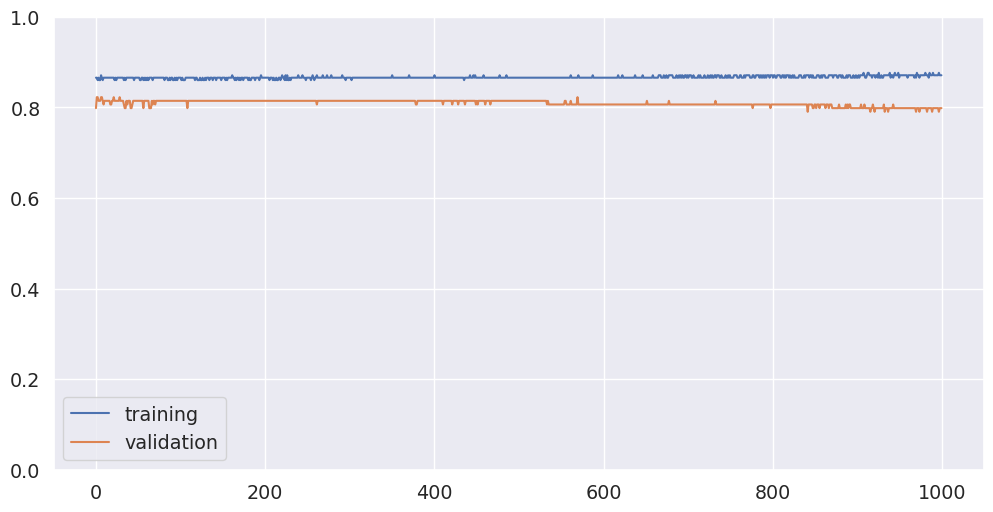

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6435 - accuracy: 0.6562

186/186 [==============================] - 0s 596us/step - loss: 0.6161 - accuracy: 0.7043 - val_loss: 0.6466 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6136 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6075 - accuracy: 0.7043 - val_loss: 0.6421 - val_accuracy: 0.6371


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5625 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.6017 - accuracy: 0.7043 - val_loss: 0.6390 - val_accuracy: 0.6371


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5585 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5969 - accuracy: 0.7043 - val_loss: 0.6365 - val_accuracy: 0.6371


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5925 - accuracy: 0.7043 - val_loss: 0.6339 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5566 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5887 - accuracy: 0.7043 - val_loss: 0.6316 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5852 - accuracy: 0.7043 - val_loss: 0.6296 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5818 - accuracy: 0.7043 - val_loss: 0.6278 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6440 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5785 - accuracy: 0.7043 - val_loss: 0.6264 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7149 - accuracy: 0.5000

186/186 [==============================] - 0s 50us/step - loss: 0.5760 - accuracy: 0.7043 - val_loss: 0.6252 - val_accuracy: 0.6371


Epoch 11/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7812

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 56us/step - loss: 0.5733 - accuracy: 0.7043 - val_loss: 0.6238 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.5709 - accuracy: 0.7043 - val_loss: 0.6227 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5686 - accuracy: 0.7043 - val_loss: 0.6218 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6044 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.5665 - accuracy: 0.7043 - val_loss: 0.6210 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5644 - accuracy: 0.7043 - val_loss: 0.6203 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5626 - accuracy: 0.7043 - val_loss: 0.6198 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5646 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5604 - accuracy: 0.7043 - val_loss: 0.6190 - val_accuracy: 0.6371


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5602 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5586 - accuracy: 0.7043 - val_loss: 0.6177 - val_accuracy: 0.6371


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5980 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.5558 - accuracy: 0.7043 - val_loss: 0.6166 - val_accuracy: 0.6371


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5527 - accuracy: 0.7043 - val_loss: 0.6156 - val_accuracy: 0.6371


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5635 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5493 - accuracy: 0.7043 - val_loss: 0.6144 - val_accuracy: 0.6371


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.5463 - accuracy: 0.7043 - val_loss: 0.6134 - val_accuracy: 0.6371


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5441 - accuracy: 0.7043 - val_loss: 0.6121 - val_accuracy: 0.6371


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6073 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5421 - accuracy: 0.7043 - val_loss: 0.6108 - val_accuracy: 0.6371


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 0.5389 - accuracy: 0.7043 - val_loss: 0.6087 - val_accuracy: 0.6371


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4842 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5369 - accuracy: 0.7043 - val_loss: 0.6073 - val_accuracy: 0.6371


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5615 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5353 - accuracy: 0.7043 - val_loss: 0.6061 - val_accuracy: 0.6371


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4893 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5322 - accuracy: 0.7043 - val_loss: 0.6035 - val_accuracy: 0.6371


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5273 - accuracy: 0.7043 - val_loss: 0.6009 - val_accuracy: 0.6371


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5227 - accuracy: 0.7043 - val_loss: 0.5986 - val_accuracy: 0.6371


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5187 - accuracy: 0.7043 - val_loss: 0.5962 - val_accuracy: 0.6371


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5160 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5133 - accuracy: 0.7043 - val_loss: 0.5954 - val_accuracy: 0.6371


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5484 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5074 - accuracy: 0.7043 - val_loss: 0.5973 - val_accuracy: 0.6371


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5026 - accuracy: 0.7043 - val_loss: 0.5972 - val_accuracy: 0.6371


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4500 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4966 - accuracy: 0.7043 - val_loss: 0.5963 - val_accuracy: 0.6371


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6577 - accuracy: 0.5312

186/186 [==============================] - 0s 47us/step - loss: 0.4905 - accuracy: 0.7043 - val_loss: 0.5959 - val_accuracy: 0.6371


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4900 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4860 - accuracy: 0.7043 - val_loss: 0.5943 - val_accuracy: 0.6371


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4830 - accuracy: 0.7043 - val_loss: 0.5923 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4469 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4806 - accuracy: 0.7043 - val_loss: 0.5903 - val_accuracy: 0.6371


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4464 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.4787 - accuracy: 0.7043 - val_loss: 0.5879 - val_accuracy: 0.6371


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4766 - accuracy: 0.7043 - val_loss: 0.5857 - val_accuracy: 0.6371


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4648 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4739 - accuracy: 0.7043 - val_loss: 0.5846 - val_accuracy: 0.6371


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5743 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.4712 - accuracy: 0.7043 - val_loss: 0.5835 - val_accuracy: 0.6371


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4423 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4692 - accuracy: 0.7043 - val_loss: 0.5820 - val_accuracy: 0.6371


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4985 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4675 - accuracy: 0.7043 - val_loss: 0.5811 - val_accuracy: 0.6371


Epoch 46/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4661 - accuracy: 0.7043 - val_loss: 0.5806 - val_accuracy: 0.6371


Epoch 47/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6234 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 0.4635 - accuracy: 0.7043 - val_loss: 0.5804 - val_accuracy: 0.6371


Epoch 48/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4526 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.4609 - accuracy: 0.7043 - val_loss: 0.5801 - val_accuracy: 0.6371


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4583 - accuracy: 0.7043 - val_loss: 0.5796 - val_accuracy: 0.6371


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4666 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4561 - accuracy: 0.7043 - val_loss: 0.5792 - val_accuracy: 0.6371


Epoch 51/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5163 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.4541 - accuracy: 0.7043 - val_loss: 0.5785 - val_accuracy: 0.6371


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4528 - accuracy: 0.7043 - val_loss: 0.5782 - val_accuracy: 0.6371


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4840 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4520 - accuracy: 0.7043 - val_loss: 0.5767 - val_accuracy: 0.6371


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.4505 - accuracy: 0.7043 - val_loss: 0.5754 - val_accuracy: 0.6371


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4495 - accuracy: 0.7043 - val_loss: 0.5751 - val_accuracy: 0.6371


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4488 - accuracy: 0.7043 - val_loss: 0.5740 - val_accuracy: 0.6371


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5430 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.4477 - accuracy: 0.7043 - val_loss: 0.5732 - val_accuracy: 0.6371


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4475 - accuracy: 0.7043 - val_loss: 0.5720 - val_accuracy: 0.6371


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4464 - accuracy: 0.7043 - val_loss: 0.5708 - val_accuracy: 0.6371


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4918 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.4459 - accuracy: 0.7043 - val_loss: 0.5698 - val_accuracy: 0.6371


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.4450 - accuracy: 0.7043 - val_loss: 0.5695 - val_accuracy: 0.6371


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5783 - accuracy: 0.4688

186/186 [==============================] - 0s 47us/step - loss: 0.4452 - accuracy: 0.7043 - val_loss: 0.5686 - val_accuracy: 0.6371


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.4437 - accuracy: 0.7043 - val_loss: 0.5674 - val_accuracy: 0.6371


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4421 - accuracy: 0.7043 - val_loss: 0.5672 - val_accuracy: 0.6371


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4416 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4412 - accuracy: 0.7043 - val_loss: 0.5663 - val_accuracy: 0.6371


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5440 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.4402 - accuracy: 0.7043 - val_loss: 0.5654 - val_accuracy: 0.6371


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4735 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.4390 - accuracy: 0.7043 - val_loss: 0.5649 - val_accuracy: 0.6371


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4264 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4383 - accuracy: 0.7043 - val_loss: 0.5640 - val_accuracy: 0.6371


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.4374 - accuracy: 0.7043 - val_loss: 0.5639 - val_accuracy: 0.6371


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4755 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4360 - accuracy: 0.7043 - val_loss: 0.5631 - val_accuracy: 0.6371


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4049 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.4356 - accuracy: 0.7043 - val_loss: 0.5625 - val_accuracy: 0.6371


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4345 - accuracy: 0.7043 - val_loss: 0.5616 - val_accuracy: 0.6371


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5111 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4336 - accuracy: 0.7043 - val_loss: 0.5615 - val_accuracy: 0.6371


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4335 - accuracy: 0.7043 - val_loss: 0.5605 - val_accuracy: 0.6371


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4325 - accuracy: 0.7043 - val_loss: 0.5598 - val_accuracy: 0.6371


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4313 - accuracy: 0.7043 - val_loss: 0.5599 - val_accuracy: 0.6371


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4266 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4315 - accuracy: 0.7043 - val_loss: 0.5590 - val_accuracy: 0.6371


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4198 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4304 - accuracy: 0.7043 - val_loss: 0.5584 - val_accuracy: 0.6371


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4294 - accuracy: 0.7043 - val_loss: 0.5581 - val_accuracy: 0.6371


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5000 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4289 - accuracy: 0.7043 - val_loss: 0.5572 - val_accuracy: 0.6371


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5073 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.4286 - accuracy: 0.7043 - val_loss: 0.5565 - val_accuracy: 0.6371


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4282 - accuracy: 0.7043 - val_loss: 0.5562 - val_accuracy: 0.6371


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4225 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4273 - accuracy: 0.7043 - val_loss: 0.5558 - val_accuracy: 0.6371


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4270 - accuracy: 0.7043 - val_loss: 0.5551 - val_accuracy: 0.6371


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4257 - accuracy: 0.7043 - val_loss: 0.5551 - val_accuracy: 0.6371


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5075 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.4259 - accuracy: 0.7043 - val_loss: 0.5541 - val_accuracy: 0.6371


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4086 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4247 - accuracy: 0.7043 - val_loss: 0.5528 - val_accuracy: 0.6371


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4250 - accuracy: 0.7043 - val_loss: 0.5517 - val_accuracy: 0.6371


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4230 - accuracy: 0.7043 - val_loss: 0.5509 - val_accuracy: 0.6371


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4226 - accuracy: 0.7043 - val_loss: 0.5502 - val_accuracy: 0.6371


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4686 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4214 - accuracy: 0.7043 - val_loss: 0.5495 - val_accuracy: 0.6371


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5025 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.4212 - accuracy: 0.7043 - val_loss: 0.5487 - val_accuracy: 0.6371


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4190 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4202 - accuracy: 0.7043 - val_loss: 0.5478 - val_accuracy: 0.6371


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.4203 - accuracy: 0.7043 - val_loss: 0.5469 - val_accuracy: 0.6371


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4187 - accuracy: 0.7043 - val_loss: 0.5462 - val_accuracy: 0.6371


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4189 - accuracy: 0.7043 - val_loss: 0.5453 - val_accuracy: 0.6371


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4417 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4186 - accuracy: 0.7043 - val_loss: 0.5446 - val_accuracy: 0.6371


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4176 - accuracy: 0.7043 - val_loss: 0.5440 - val_accuracy: 0.6290


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4169 - accuracy: 0.7043 - val_loss: 0.5431 - val_accuracy: 0.6290


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5080 - accuracy: 0.5000

186/186 [==============================] - 0s 45us/step - loss: 0.4166 - accuracy: 0.7043 - val_loss: 0.5426 - val_accuracy: 0.6290


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4842 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.4161 - accuracy: 0.7043 - val_loss: 0.5417 - val_accuracy: 0.6290


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.7188

186/186 [==============================] - 0s 94us/step - loss: 0.4156 - accuracy: 0.7043 - val_loss: 0.5411 - val_accuracy: 0.6290


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.6875



186/186 [==============================] - 0s 44us/step - loss: 0.4154 - accuracy: 0.7043 - val_loss: 0.5407 - val_accuracy: 0.6290


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4142 - accuracy: 0.7043 - val_loss: 0.5402 - val_accuracy: 0.6290


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.4136 - accuracy: 0.7043 - val_loss: 0.5401 - val_accuracy: 0.6290


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.4129 - accuracy: 0.7043 - val_loss: 0.5403 - val_accuracy: 0.6290


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.4129 - accuracy: 0.7043 - val_loss: 0.5393 - val_accuracy: 0.6290


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4401 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.4122 - accuracy: 0.7097 - val_loss: 0.5386 - val_accuracy: 0.6290


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4120 - accuracy: 0.7151 - val_loss: 0.5382 - val_accuracy: 0.6290


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4113 - accuracy: 0.7151 - val_loss: 0.5383 - val_accuracy: 0.6371


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4104 - accuracy: 0.7151 - val_loss: 0.5380 - val_accuracy: 0.6371


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4102 - accuracy: 0.7151 - val_loss: 0.5376 - val_accuracy: 0.6371


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4098 - accuracy: 0.7151 - val_loss: 0.5375 - val_accuracy: 0.6452


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4088 - accuracy: 0.7151 - val_loss: 0.5383 - val_accuracy: 0.6452


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4082 - accuracy: 0.7204 - val_loss: 0.5377 - val_accuracy: 0.6452


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4073 - accuracy: 0.7204 - val_loss: 0.5381 - val_accuracy: 0.6452


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4393 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4059 - accuracy: 0.7204 - val_loss: 0.5381 - val_accuracy: 0.6371


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4040 - accuracy: 0.7204 - val_loss: 0.5381 - val_accuracy: 0.6452


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4343 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4030 - accuracy: 0.7204 - val_loss: 0.5373 - val_accuracy: 0.6532


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 0.4021 - accuracy: 0.7204 - val_loss: 0.5371 - val_accuracy: 0.6532


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.4005 - accuracy: 0.7258 - val_loss: 0.5367 - val_accuracy: 0.6532


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3998 - accuracy: 0.7258 - val_loss: 0.5365 - val_accuracy: 0.6371


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5179 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.3990 - accuracy: 0.7312 - val_loss: 0.5364 - val_accuracy: 0.6532


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3987 - accuracy: 0.7366 - val_loss: 0.5361 - val_accuracy: 0.6452


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3983 - accuracy: 0.7366 - val_loss: 0.5360 - val_accuracy: 0.6290


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4954 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.3973 - accuracy: 0.7366 - val_loss: 0.5359 - val_accuracy: 0.6371


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4736 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3965 - accuracy: 0.7419 - val_loss: 0.5354 - val_accuracy: 0.6452


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3963 - accuracy: 0.7419 - val_loss: 0.5348 - val_accuracy: 0.6613


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3956 - accuracy: 0.7473 - val_loss: 0.5348 - val_accuracy: 0.6613


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4823 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3953 - accuracy: 0.7366 - val_loss: 0.5345 - val_accuracy: 0.6774


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3950 - accuracy: 0.7419 - val_loss: 0.5336 - val_accuracy: 0.6613


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4464 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3942 - accuracy: 0.7473 - val_loss: 0.5337 - val_accuracy: 0.6613


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3937 - accuracy: 0.7527 - val_loss: 0.5341 - val_accuracy: 0.6452


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4805 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.3934 - accuracy: 0.7527 - val_loss: 0.5333 - val_accuracy: 0.6129


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3925 - accuracy: 0.7527 - val_loss: 0.5324 - val_accuracy: 0.6129


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4764 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3930 - accuracy: 0.7527 - val_loss: 0.5322 - val_accuracy: 0.6371


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4866 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.3915 - accuracy: 0.7634 - val_loss: 0.5327 - val_accuracy: 0.6452


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3912 - accuracy: 0.7634 - val_loss: 0.5327 - val_accuracy: 0.6532


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4199 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3914 - accuracy: 0.7688 - val_loss: 0.5320 - val_accuracy: 0.6532


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3911 - accuracy: 0.7742 - val_loss: 0.5311 - val_accuracy: 0.6774


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3901 - accuracy: 0.7688 - val_loss: 0.5314 - val_accuracy: 0.6774


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3901 - accuracy: 0.7688 - val_loss: 0.5312 - val_accuracy: 0.6774


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3892 - accuracy: 0.7742 - val_loss: 0.5310 - val_accuracy: 0.6855


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3971 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3891 - accuracy: 0.7742 - val_loss: 0.5303 - val_accuracy: 0.6855


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3892 - accuracy: 0.7742 - val_loss: 0.5307 - val_accuracy: 0.6935


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3889 - accuracy: 0.7957 - val_loss: 0.5301 - val_accuracy: 0.7177


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3882 - accuracy: 0.8065 - val_loss: 0.5301 - val_accuracy: 0.7097


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3881 - accuracy: 0.8011 - val_loss: 0.5299 - val_accuracy: 0.7097


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3882 - accuracy: 0.7957 - val_loss: 0.5299 - val_accuracy: 0.7016


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3879 - accuracy: 0.8011 - val_loss: 0.5295 - val_accuracy: 0.7016


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4389 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3874 - accuracy: 0.8065 - val_loss: 0.5299 - val_accuracy: 0.7016


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3874 - accuracy: 0.8011 - val_loss: 0.5292 - val_accuracy: 0.6935


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3866 - accuracy: 0.8011 - val_loss: 0.5291 - val_accuracy: 0.6935


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3865 - accuracy: 0.8172 - val_loss: 0.5285 - val_accuracy: 0.6774


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3865 - accuracy: 0.8118 - val_loss: 0.5284 - val_accuracy: 0.6774


Epoch 156/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3291 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3863 - accuracy: 0.8065 - val_loss: 0.5284 - val_accuracy: 0.6774


Epoch 157/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3865 - accuracy: 0.8011 - val_loss: 0.5282 - val_accuracy: 0.6774


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3851 - accuracy: 0.8065 - val_loss: 0.5278 - val_accuracy: 0.6774


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3858 - accuracy: 0.8172 - val_loss: 0.5280 - val_accuracy: 0.6694


Epoch 160/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4280 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3854 - accuracy: 0.8118 - val_loss: 0.5280 - val_accuracy: 0.6613


Epoch 161/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4191 - accuracy: 0.6875



186/186 [==============================] - 0s 51us/step - loss: 0.3844 - accuracy: 0.8226 - val_loss: 0.5285 - val_accuracy: 0.6613


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3816 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3844 - accuracy: 0.8118 - val_loss: 0.5279 - val_accuracy: 0.6694


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3841 - accuracy: 0.8118 - val_loss: 0.5274 - val_accuracy: 0.6855


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3833 - accuracy: 0.8333 - val_loss: 0.5265 - val_accuracy: 0.6855


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3825 - accuracy: 0.8118 - val_loss: 0.5270 - val_accuracy: 0.6855


Epoch 166/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3828 - accuracy: 0.8226 - val_loss: 0.5274 - val_accuracy: 0.6935


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4672 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3826 - accuracy: 0.8172 - val_loss: 0.5266 - val_accuracy: 0.6935


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3825 - accuracy: 0.8172 - val_loss: 0.5261 - val_accuracy: 0.7177


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8125



186/186 [==============================] - 0s 43us/step - loss: 0.3816 - accuracy: 0.7957 - val_loss: 0.5264 - val_accuracy: 0.7177


Epoch 170/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4863 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3813 - accuracy: 0.7796 - val_loss: 0.5265 - val_accuracy: 0.7177


Epoch 171/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3813 - accuracy: 0.7796 - val_loss: 0.5268 - val_accuracy: 0.7177


Epoch 172/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4386 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3811 - accuracy: 0.7903 - val_loss: 0.5257 - val_accuracy: 0.7177


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3805 - accuracy: 0.7849 - val_loss: 0.5257 - val_accuracy: 0.7177


Epoch 174/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4768 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.3804 - accuracy: 0.7796 - val_loss: 0.5259 - val_accuracy: 0.7097


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3802 - accuracy: 0.7796 - val_loss: 0.5260 - val_accuracy: 0.7097


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3803 - accuracy: 0.7742 - val_loss: 0.5264 - val_accuracy: 0.7177


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3796 - accuracy: 0.7742 - val_loss: 0.5264 - val_accuracy: 0.7258


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4439 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3798 - accuracy: 0.7742 - val_loss: 0.5256 - val_accuracy: 0.7177


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3796 - accuracy: 0.7796 - val_loss: 0.5261 - val_accuracy: 0.7177


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3798 - accuracy: 0.7903 - val_loss: 0.5257 - val_accuracy: 0.7177


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4384 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3791 - accuracy: 0.7796 - val_loss: 0.5255 - val_accuracy: 0.7177


Epoch 182/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.3785 - accuracy: 0.7849 - val_loss: 0.5255 - val_accuracy: 0.7177


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.3785 - accuracy: 0.7849 - val_loss: 0.5253 - val_accuracy: 0.7097


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3785 - accuracy: 0.7796 - val_loss: 0.5254 - val_accuracy: 0.7097


Epoch 185/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3787 - accuracy: 0.7796 - val_loss: 0.5249 - val_accuracy: 0.7016


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4530 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3779 - accuracy: 0.7796 - val_loss: 0.5244 - val_accuracy: 0.6935


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3779 - accuracy: 0.7849 - val_loss: 0.5243 - val_accuracy: 0.6935


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3774 - accuracy: 0.7849 - val_loss: 0.5256 - val_accuracy: 0.6935


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3781 - accuracy: 0.7796 - val_loss: 0.5255 - val_accuracy: 0.6935


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3773 - accuracy: 0.7796 - val_loss: 0.5259 - val_accuracy: 0.6935


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3774 - accuracy: 0.7796 - val_loss: 0.5260 - val_accuracy: 0.6935


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3609 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3771 - accuracy: 0.7849 - val_loss: 0.5254 - val_accuracy: 0.6935


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3761 - accuracy: 0.7849 - val_loss: 0.5266 - val_accuracy: 0.6935


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3768 - accuracy: 0.7796 - val_loss: 0.5256 - val_accuracy: 0.6935


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3761 - accuracy: 0.7796 - val_loss: 0.5258 - val_accuracy: 0.6935


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4115 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3763 - accuracy: 0.7796 - val_loss: 0.5256 - val_accuracy: 0.6935


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3758 - accuracy: 0.7796 - val_loss: 0.5253 - val_accuracy: 0.6935


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3757 - accuracy: 0.7796 - val_loss: 0.5253 - val_accuracy: 0.6935


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3758 - accuracy: 0.7849 - val_loss: 0.5256 - val_accuracy: 0.6935


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3754 - accuracy: 0.7849 - val_loss: 0.5268 - val_accuracy: 0.6935


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3835 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3758 - accuracy: 0.7849 - val_loss: 0.5271 - val_accuracy: 0.6935


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3748 - accuracy: 0.7796 - val_loss: 0.5268 - val_accuracy: 0.6935


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3748 - accuracy: 0.7849 - val_loss: 0.5268 - val_accuracy: 0.6935


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3751 - accuracy: 0.7796 - val_loss: 0.5266 - val_accuracy: 0.6935


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3746 - accuracy: 0.7849 - val_loss: 0.5279 - val_accuracy: 0.6935


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3749 - accuracy: 0.7796 - val_loss: 0.5276 - val_accuracy: 0.6935


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.3738 - accuracy: 0.7849 - val_loss: 0.5288 - val_accuracy: 0.6935


Epoch 208/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3747 - accuracy: 0.7796 - val_loss: 0.5279 - val_accuracy: 0.6935


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3744 - accuracy: 0.7796 - val_loss: 0.5280 - val_accuracy: 0.6935


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3930 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3736 - accuracy: 0.7796 - val_loss: 0.5278 - val_accuracy: 0.6935


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3733 - accuracy: 0.7903 - val_loss: 0.5286 - val_accuracy: 0.6935


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3735 - accuracy: 0.7849 - val_loss: 0.5284 - val_accuracy: 0.6935


Epoch 213/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3732 - accuracy: 0.7849 - val_loss: 0.5293 - val_accuracy: 0.6935


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3730 - accuracy: 0.7796 - val_loss: 0.5293 - val_accuracy: 0.6935


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3162 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3728 - accuracy: 0.7849 - val_loss: 0.5300 - val_accuracy: 0.6935


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3741 - accuracy: 0.7849 - val_loss: 0.5307 - val_accuracy: 0.6935


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3917 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3720 - accuracy: 0.7957 - val_loss: 0.5324 - val_accuracy: 0.6935


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3716 - accuracy: 0.7903 - val_loss: 0.5313 - val_accuracy: 0.6935


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3707 - accuracy: 0.7957 - val_loss: 0.5337 - val_accuracy: 0.6935


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3721 - accuracy: 0.7796 - val_loss: 0.5313 - val_accuracy: 0.6935


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3710 - accuracy: 0.7903 - val_loss: 0.5315 - val_accuracy: 0.6935


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3705 - accuracy: 0.7849 - val_loss: 0.5314 - val_accuracy: 0.6935


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3701 - accuracy: 0.7849 - val_loss: 0.5305 - val_accuracy: 0.6935


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3698 - accuracy: 0.8011 - val_loss: 0.5330 - val_accuracy: 0.6935


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3701 - accuracy: 0.7903 - val_loss: 0.5321 - val_accuracy: 0.6935


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3704 - accuracy: 0.7849 - val_loss: 0.5312 - val_accuracy: 0.6935


Epoch 227/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3694 - accuracy: 0.7957 - val_loss: 0.5320 - val_accuracy: 0.6935


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3696 - accuracy: 0.7849 - val_loss: 0.5317 - val_accuracy: 0.6935


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3689 - accuracy: 0.7849 - val_loss: 0.5310 - val_accuracy: 0.6935


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3687 - accuracy: 0.7957 - val_loss: 0.5321 - val_accuracy: 0.6935


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3693 - accuracy: 0.7849 - val_loss: 0.5315 - val_accuracy: 0.6935


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3688 - accuracy: 0.8011 - val_loss: 0.5335 - val_accuracy: 0.6935


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3685 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3685 - accuracy: 0.7849 - val_loss: 0.5328 - val_accuracy: 0.6935


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3684 - accuracy: 0.7903 - val_loss: 0.5322 - val_accuracy: 0.6935


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3686 - accuracy: 0.7957 - val_loss: 0.5327 - val_accuracy: 0.6935


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3681 - accuracy: 0.7903 - val_loss: 0.5336 - val_accuracy: 0.6935


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5124 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3678 - accuracy: 0.7903 - val_loss: 0.5322 - val_accuracy: 0.6935


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3683 - accuracy: 0.7957 - val_loss: 0.5332 - val_accuracy: 0.6935


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3680 - accuracy: 0.7849 - val_loss: 0.5327 - val_accuracy: 0.6935


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3676 - accuracy: 0.8011 - val_loss: 0.5349 - val_accuracy: 0.6935


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3675 - accuracy: 0.8011 - val_loss: 0.5359 - val_accuracy: 0.6935


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3678 - accuracy: 0.7903 - val_loss: 0.5347 - val_accuracy: 0.6935


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3672 - accuracy: 0.7849 - val_loss: 0.5334 - val_accuracy: 0.6935


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3667 - accuracy: 0.8065 - val_loss: 0.5350 - val_accuracy: 0.6935


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4649 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3670 - accuracy: 0.7957 - val_loss: 0.5345 - val_accuracy: 0.6935


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3662 - accuracy: 0.7957 - val_loss: 0.5365 - val_accuracy: 0.6935


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3668 - accuracy: 0.7849 - val_loss: 0.5339 - val_accuracy: 0.6935


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3670 - accuracy: 0.7903 - val_loss: 0.5344 - val_accuracy: 0.6935


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3661 - accuracy: 0.8011 - val_loss: 0.5357 - val_accuracy: 0.6935


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3663 - accuracy: 0.7903 - val_loss: 0.5344 - val_accuracy: 0.6935


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4071 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3666 - accuracy: 0.7903 - val_loss: 0.5343 - val_accuracy: 0.6935


Epoch 252/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3657 - accuracy: 0.7957 - val_loss: 0.5358 - val_accuracy: 0.6935


Epoch 253/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3654 - accuracy: 0.8011 - val_loss: 0.5378 - val_accuracy: 0.7016


Epoch 254/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3676 - accuracy: 0.7796 - val_loss: 0.5361 - val_accuracy: 0.6935


Epoch 255/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3926 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3658 - accuracy: 0.7957 - val_loss: 0.5357 - val_accuracy: 0.6935


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3657 - accuracy: 0.7903 - val_loss: 0.5362 - val_accuracy: 0.6935


Epoch 257/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1951 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3654 - accuracy: 0.7903 - val_loss: 0.5368 - val_accuracy: 0.6935


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3657 - accuracy: 0.7849 - val_loss: 0.5352 - val_accuracy: 0.6935


Epoch 259/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3654 - accuracy: 0.7903 - val_loss: 0.5352 - val_accuracy: 0.6935


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3653 - accuracy: 0.7957 - val_loss: 0.5357 - val_accuracy: 0.6935


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3926 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3648 - accuracy: 0.7957 - val_loss: 0.5358 - val_accuracy: 0.6935


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3652 - accuracy: 0.7903 - val_loss: 0.5348 - val_accuracy: 0.6935


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3652 - accuracy: 0.7957 - val_loss: 0.5347 - val_accuracy: 0.6935


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3650 - accuracy: 0.8011 - val_loss: 0.5370 - val_accuracy: 0.6935


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3650 - accuracy: 0.7957 - val_loss: 0.5367 - val_accuracy: 0.6935


Epoch 266/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3647 - accuracy: 0.7849 - val_loss: 0.5361 - val_accuracy: 0.6935


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4447 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3646 - accuracy: 0.8011 - val_loss: 0.5379 - val_accuracy: 0.6935


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3647 - accuracy: 0.8011 - val_loss: 0.5379 - val_accuracy: 0.7016


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3646 - accuracy: 0.7903 - val_loss: 0.5381 - val_accuracy: 0.6935


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3643 - accuracy: 0.7903 - val_loss: 0.5361 - val_accuracy: 0.6935


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3639 - accuracy: 0.8011 - val_loss: 0.5388 - val_accuracy: 0.6935


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4588 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.3649 - accuracy: 0.7903 - val_loss: 0.5378 - val_accuracy: 0.6935


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4445 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3640 - accuracy: 0.7903 - val_loss: 0.5378 - val_accuracy: 0.7016


Epoch 274/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4201 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3636 - accuracy: 0.7957 - val_loss: 0.5389 - val_accuracy: 0.7016


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3648 - accuracy: 0.7903 - val_loss: 0.5379 - val_accuracy: 0.6935


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3634 - accuracy: 0.8011 - val_loss: 0.5382 - val_accuracy: 0.7016


Epoch 277/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3636 - accuracy: 0.7957 - val_loss: 0.5374 - val_accuracy: 0.6935


Epoch 278/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3246 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3638 - accuracy: 0.7957 - val_loss: 0.5376 - val_accuracy: 0.7016


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3727 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.3634 - accuracy: 0.7957 - val_loss: 0.5383 - val_accuracy: 0.7016


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3636 - accuracy: 0.7957 - val_loss: 0.5374 - val_accuracy: 0.6935


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3631 - accuracy: 0.7957 - val_loss: 0.5381 - val_accuracy: 0.7016


Epoch 282/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3629 - accuracy: 0.8011 - val_loss: 0.5399 - val_accuracy: 0.7097


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3644 - accuracy: 0.7903 - val_loss: 0.5385 - val_accuracy: 0.7097


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3630 - accuracy: 0.8011 - val_loss: 0.5388 - val_accuracy: 0.7016


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3630 - accuracy: 0.7957 - val_loss: 0.5389 - val_accuracy: 0.7097


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3631 - accuracy: 0.7957 - val_loss: 0.5383 - val_accuracy: 0.7097


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3623 - accuracy: 0.8011 - val_loss: 0.5390 - val_accuracy: 0.7016


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3589 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3628 - accuracy: 0.7903 - val_loss: 0.5381 - val_accuracy: 0.7016


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3628 - accuracy: 0.8065 - val_loss: 0.5397 - val_accuracy: 0.7097


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4485 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3633 - accuracy: 0.7903 - val_loss: 0.5380 - val_accuracy: 0.6935


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3626 - accuracy: 0.8011 - val_loss: 0.5390 - val_accuracy: 0.7016


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3625 - accuracy: 0.7903 - val_loss: 0.5383 - val_accuracy: 0.6935


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3617 - accuracy: 0.8065 - val_loss: 0.5392 - val_accuracy: 0.6935


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3624 - accuracy: 0.8011 - val_loss: 0.5393 - val_accuracy: 0.7097


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3621 - accuracy: 0.7957 - val_loss: 0.5389 - val_accuracy: 0.7097


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.3615 - accuracy: 0.8065 - val_loss: 0.5411 - val_accuracy: 0.7097


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4039 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3625 - accuracy: 0.7849 - val_loss: 0.5386 - val_accuracy: 0.7097


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3902 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3619 - accuracy: 0.8011 - val_loss: 0.5389 - val_accuracy: 0.7097


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3613 - accuracy: 0.8011 - val_loss: 0.5392 - val_accuracy: 0.7097


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3630 - accuracy: 0.7903 - val_loss: 0.5387 - val_accuracy: 0.7097


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3615 - accuracy: 0.8011 - val_loss: 0.5394 - val_accuracy: 0.7097


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4285 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3616 - accuracy: 0.8011 - val_loss: 0.5402 - val_accuracy: 0.7097


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3616 - accuracy: 0.7957 - val_loss: 0.5397 - val_accuracy: 0.7097


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3616 - accuracy: 0.7957 - val_loss: 0.5386 - val_accuracy: 0.7016


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3606 - accuracy: 0.8065 - val_loss: 0.5412 - val_accuracy: 0.7097


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3615 - accuracy: 0.7903 - val_loss: 0.5387 - val_accuracy: 0.7097


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3616 - accuracy: 0.8011 - val_loss: 0.5402 - val_accuracy: 0.7097


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3618 - accuracy: 0.7957 - val_loss: 0.5387 - val_accuracy: 0.7097


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3609 - accuracy: 0.8011 - val_loss: 0.5398 - val_accuracy: 0.7097


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3607 - accuracy: 0.8011 - val_loss: 0.5419 - val_accuracy: 0.7097


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3547 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3616 - accuracy: 0.7796 - val_loss: 0.5384 - val_accuracy: 0.7097


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3603 - accuracy: 0.8065 - val_loss: 0.5405 - val_accuracy: 0.7097


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3611 - accuracy: 0.7957 - val_loss: 0.5389 - val_accuracy: 0.7097


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3604 - accuracy: 0.8011 - val_loss: 0.5400 - val_accuracy: 0.7097


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3618 - accuracy: 0.7849 - val_loss: 0.5392 - val_accuracy: 0.7097


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3604 - accuracy: 0.7957 - val_loss: 0.5396 - val_accuracy: 0.7097


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3607 - accuracy: 0.7903 - val_loss: 0.5387 - val_accuracy: 0.7097


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3602 - accuracy: 0.8065 - val_loss: 0.5401 - val_accuracy: 0.7097


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3606 - accuracy: 0.8011 - val_loss: 0.5393 - val_accuracy: 0.7097


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3597 - accuracy: 0.8065 - val_loss: 0.5414 - val_accuracy: 0.7097


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3617 - accuracy: 0.7903 - val_loss: 0.5402 - val_accuracy: 0.7097


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4450 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3605 - accuracy: 0.7903 - val_loss: 0.5390 - val_accuracy: 0.7097


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3603 - accuracy: 0.8011 - val_loss: 0.5388 - val_accuracy: 0.7097


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3602 - accuracy: 0.8011 - val_loss: 0.5397 - val_accuracy: 0.7097


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3597 - accuracy: 0.8011 - val_loss: 0.5414 - val_accuracy: 0.7097


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3596 - accuracy: 0.7957 - val_loss: 0.5384 - val_accuracy: 0.7097


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3598 - accuracy: 0.8011 - val_loss: 0.5394 - val_accuracy: 0.7097


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3598 - accuracy: 0.8011 - val_loss: 0.5404 - val_accuracy: 0.7097


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3597 - accuracy: 0.8011 - val_loss: 0.5421 - val_accuracy: 0.7097


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3600 - accuracy: 0.7957 - val_loss: 0.5414 - val_accuracy: 0.7097


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3600 - accuracy: 0.8011 - val_loss: 0.5410 - val_accuracy: 0.7097


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3595 - accuracy: 0.8011 - val_loss: 0.5405 - val_accuracy: 0.7097


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3593 - accuracy: 0.8011 - val_loss: 0.5404 - val_accuracy: 0.7097


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3596 - accuracy: 0.8011 - val_loss: 0.5420 - val_accuracy: 0.7097


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4275 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3598 - accuracy: 0.7957 - val_loss: 0.5400 - val_accuracy: 0.7097


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4445 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3589 - accuracy: 0.8011 - val_loss: 0.5413 - val_accuracy: 0.7097


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3598 - accuracy: 0.7957 - val_loss: 0.5415 - val_accuracy: 0.7097


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3591 - accuracy: 0.8011 - val_loss: 0.5401 - val_accuracy: 0.7097


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3596 - accuracy: 0.7957 - val_loss: 0.5401 - val_accuracy: 0.7097


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3587 - accuracy: 0.8011 - val_loss: 0.5407 - val_accuracy: 0.7097


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3604 - accuracy: 0.7849 - val_loss: 0.5397 - val_accuracy: 0.7097


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3589 - accuracy: 0.8065 - val_loss: 0.5408 - val_accuracy: 0.7097


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3590 - accuracy: 0.7957 - val_loss: 0.5405 - val_accuracy: 0.7097


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3584 - accuracy: 0.8011 - val_loss: 0.5403 - val_accuracy: 0.7097


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3588 - accuracy: 0.8011 - val_loss: 0.5416 - val_accuracy: 0.7097


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3585 - accuracy: 0.7957 - val_loss: 0.5402 - val_accuracy: 0.7097


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3531 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3588 - accuracy: 0.7957 - val_loss: 0.5402 - val_accuracy: 0.7097


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3034 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3587 - accuracy: 0.8011 - val_loss: 0.5411 - val_accuracy: 0.7097


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3586 - accuracy: 0.8011 - val_loss: 0.5409 - val_accuracy: 0.7097


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3583 - accuracy: 0.8011 - val_loss: 0.5409 - val_accuracy: 0.7097


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3584 - accuracy: 0.8011 - val_loss: 0.5419 - val_accuracy: 0.7097


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3583 - accuracy: 0.7849 - val_loss: 0.5404 - val_accuracy: 0.7097


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3582 - accuracy: 0.8011 - val_loss: 0.5417 - val_accuracy: 0.7097


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3590 - accuracy: 0.7957 - val_loss: 0.5422 - val_accuracy: 0.7097


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3582 - accuracy: 0.8011 - val_loss: 0.5424 - val_accuracy: 0.7097


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3578 - accuracy: 0.8011 - val_loss: 0.5420 - val_accuracy: 0.7097


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4223 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3579 - accuracy: 0.8011 - val_loss: 0.5404 - val_accuracy: 0.7097


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3579 - accuracy: 0.8065 - val_loss: 0.5434 - val_accuracy: 0.7097


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3584 - accuracy: 0.7957 - val_loss: 0.5406 - val_accuracy: 0.7097


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3577 - accuracy: 0.8011 - val_loss: 0.5420 - val_accuracy: 0.7097


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3581 - accuracy: 0.8011 - val_loss: 0.5435 - val_accuracy: 0.7097


Epoch 362/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3583 - accuracy: 0.8011 - val_loss: 0.5424 - val_accuracy: 0.7097


Epoch 363/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3575 - accuracy: 0.8011 - val_loss: 0.5439 - val_accuracy: 0.7097


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3586 - accuracy: 0.7903 - val_loss: 0.5419 - val_accuracy: 0.7097


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3573 - accuracy: 0.8011 - val_loss: 0.5432 - val_accuracy: 0.7097


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3580 - accuracy: 0.8011 - val_loss: 0.5417 - val_accuracy: 0.7097


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3572 - accuracy: 0.8011 - val_loss: 0.5414 - val_accuracy: 0.7097


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3571 - accuracy: 0.8065 - val_loss: 0.5434 - val_accuracy: 0.7097


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3573 - accuracy: 0.7957 - val_loss: 0.5433 - val_accuracy: 0.7097


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3584 - accuracy: 0.7903 - val_loss: 0.5420 - val_accuracy: 0.7097


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3571 - accuracy: 0.7957 - val_loss: 0.5416 - val_accuracy: 0.7097


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3576 - accuracy: 0.8011 - val_loss: 0.5414 - val_accuracy: 0.7097


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3990 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3569 - accuracy: 0.8065 - val_loss: 0.5431 - val_accuracy: 0.7097


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3574 - accuracy: 0.8011 - val_loss: 0.5429 - val_accuracy: 0.7097


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3573 - accuracy: 0.8011 - val_loss: 0.5442 - val_accuracy: 0.7097


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3572 - accuracy: 0.7903 - val_loss: 0.5423 - val_accuracy: 0.7097


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3567 - accuracy: 0.8065 - val_loss: 0.5436 - val_accuracy: 0.7097


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3571 - accuracy: 0.7849 - val_loss: 0.5411 - val_accuracy: 0.7097


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3570 - accuracy: 0.8065 - val_loss: 0.5436 - val_accuracy: 0.7097


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3567 - accuracy: 0.7957 - val_loss: 0.5418 - val_accuracy: 0.7097


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3569 - accuracy: 0.7957 - val_loss: 0.5418 - val_accuracy: 0.7097


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3571 - accuracy: 0.7957 - val_loss: 0.5426 - val_accuracy: 0.7097


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4495 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3565 - accuracy: 0.8065 - val_loss: 0.5437 - val_accuracy: 0.7097


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3567 - accuracy: 0.7957 - val_loss: 0.5424 - val_accuracy: 0.7097


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3877 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3565 - accuracy: 0.8011 - val_loss: 0.5431 - val_accuracy: 0.7097


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3571 - accuracy: 0.8011 - val_loss: 0.5438 - val_accuracy: 0.7097


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4617 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.3570 - accuracy: 0.8011 - val_loss: 0.5425 - val_accuracy: 0.7097


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3570 - accuracy: 0.8011 - val_loss: 0.5425 - val_accuracy: 0.7097


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4234 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3565 - accuracy: 0.8065 - val_loss: 0.5444 - val_accuracy: 0.7097


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3569 - accuracy: 0.7903 - val_loss: 0.5433 - val_accuracy: 0.7097


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3564 - accuracy: 0.8011 - val_loss: 0.5444 - val_accuracy: 0.7097


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3563 - accuracy: 0.8011 - val_loss: 0.5457 - val_accuracy: 0.7097


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3564 - accuracy: 0.7957 - val_loss: 0.5442 - val_accuracy: 0.7097


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3559 - accuracy: 0.8011 - val_loss: 0.5443 - val_accuracy: 0.7097


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1849 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3563 - accuracy: 0.7957 - val_loss: 0.5423 - val_accuracy: 0.7097


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4349 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3565 - accuracy: 0.8011 - val_loss: 0.5441 - val_accuracy: 0.7097


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3562 - accuracy: 0.8011 - val_loss: 0.5455 - val_accuracy: 0.7097


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3560 - accuracy: 0.8065 - val_loss: 0.5449 - val_accuracy: 0.7097


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3566 - accuracy: 0.7957 - val_loss: 0.5433 - val_accuracy: 0.7097


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3561 - accuracy: 0.8011 - val_loss: 0.5450 - val_accuracy: 0.7097


Epoch 401/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.3561 - accuracy: 0.8011 - val_loss: 0.5444 - val_accuracy: 0.7097


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3564 - accuracy: 0.7957 - val_loss: 0.5442 - val_accuracy: 0.7097


Epoch 403/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3558 - accuracy: 0.8011 - val_loss: 0.5450 - val_accuracy: 0.7097


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3559 - accuracy: 0.8065 - val_loss: 0.5450 - val_accuracy: 0.7097


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3559 - accuracy: 0.7957 - val_loss: 0.5445 - val_accuracy: 0.7097


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3553 - accuracy: 0.8011 - val_loss: 0.5448 - val_accuracy: 0.7097


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3563 - accuracy: 0.7957 - val_loss: 0.5450 - val_accuracy: 0.7097


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3555 - accuracy: 0.8011 - val_loss: 0.5459 - val_accuracy: 0.7097


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3558 - accuracy: 0.7957 - val_loss: 0.5446 - val_accuracy: 0.7097


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4342 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3551 - accuracy: 0.8011 - val_loss: 0.5453 - val_accuracy: 0.7097


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3551 - accuracy: 0.8065 - val_loss: 0.5471 - val_accuracy: 0.7097


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3565 - accuracy: 0.7903 - val_loss: 0.5459 - val_accuracy: 0.7097


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3558 - accuracy: 0.7957 - val_loss: 0.5453 - val_accuracy: 0.7097


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3555 - accuracy: 0.7957 - val_loss: 0.5449 - val_accuracy: 0.7097


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3555 - accuracy: 0.8011 - val_loss: 0.5461 - val_accuracy: 0.7097


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3550 - accuracy: 0.7957 - val_loss: 0.5442 - val_accuracy: 0.7097


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3560 - accuracy: 0.7957 - val_loss: 0.5444 - val_accuracy: 0.7097


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3553 - accuracy: 0.8011 - val_loss: 0.5455 - val_accuracy: 0.7097


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3547 - accuracy: 0.8011 - val_loss: 0.5451 - val_accuracy: 0.7097


Epoch 420/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3549 - accuracy: 0.8065 - val_loss: 0.5452 - val_accuracy: 0.7097


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3552 - accuracy: 0.8011 - val_loss: 0.5477 - val_accuracy: 0.7097


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4137 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3558 - accuracy: 0.7903 - val_loss: 0.5465 - val_accuracy: 0.7097


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1967 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3545 - accuracy: 0.8011 - val_loss: 0.5465 - val_accuracy: 0.7097


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3551 - accuracy: 0.7957 - val_loss: 0.5463 - val_accuracy: 0.7097


Epoch 425/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3551 - accuracy: 0.7957 - val_loss: 0.5450 - val_accuracy: 0.7097


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3548 - accuracy: 0.8065 - val_loss: 0.5474 - val_accuracy: 0.7097


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3550 - accuracy: 0.7903 - val_loss: 0.5448 - val_accuracy: 0.7097


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3548 - accuracy: 0.8065 - val_loss: 0.5453 - val_accuracy: 0.7097


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3545 - accuracy: 0.8011 - val_loss: 0.5459 - val_accuracy: 0.7097


Epoch 430/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3544 - accuracy: 0.8011 - val_loss: 0.5457 - val_accuracy: 0.7097


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3548 - accuracy: 0.8011 - val_loss: 0.5476 - val_accuracy: 0.7097


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3543 - accuracy: 0.7903 - val_loss: 0.5452 - val_accuracy: 0.7097


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4019 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3549 - accuracy: 0.8065 - val_loss: 0.5468 - val_accuracy: 0.7097


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3550 - accuracy: 0.7903 - val_loss: 0.5463 - val_accuracy: 0.7097


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3546 - accuracy: 0.8011 - val_loss: 0.5474 - val_accuracy: 0.7097


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3543 - accuracy: 0.7957 - val_loss: 0.5474 - val_accuracy: 0.7097


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3545 - accuracy: 0.8011 - val_loss: 0.5481 - val_accuracy: 0.7097


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3544 - accuracy: 0.7957 - val_loss: 0.5453 - val_accuracy: 0.7097


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3548 - accuracy: 0.8011 - val_loss: 0.5473 - val_accuracy: 0.7097


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3543 - accuracy: 0.7957 - val_loss: 0.5458 - val_accuracy: 0.7097


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3541 - accuracy: 0.8011 - val_loss: 0.5449 - val_accuracy: 0.7097


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3544 - accuracy: 0.8065 - val_loss: 0.5476 - val_accuracy: 0.7097


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3541 - accuracy: 0.8011 - val_loss: 0.5483 - val_accuracy: 0.7097


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3539 - accuracy: 0.7957 - val_loss: 0.5465 - val_accuracy: 0.7097


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.3546 - accuracy: 0.7903 - val_loss: 0.5459 - val_accuracy: 0.7097


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3539 - accuracy: 0.8065 - val_loss: 0.5485 - val_accuracy: 0.7097


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3540 - accuracy: 0.8011 - val_loss: 0.5484 - val_accuracy: 0.7097


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3544 - accuracy: 0.7849 - val_loss: 0.5467 - val_accuracy: 0.7097


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3537 - accuracy: 0.8065 - val_loss: 0.5490 - val_accuracy: 0.7097


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3542 - accuracy: 0.7957 - val_loss: 0.5473 - val_accuracy: 0.7097


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3534 - accuracy: 0.8011 - val_loss: 0.5489 - val_accuracy: 0.7097


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3379 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3550 - accuracy: 0.7903 - val_loss: 0.5478 - val_accuracy: 0.7097


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3539 - accuracy: 0.7957 - val_loss: 0.5469 - val_accuracy: 0.7097


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3540 - accuracy: 0.8011 - val_loss: 0.5482 - val_accuracy: 0.7097


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3533 - accuracy: 0.8011 - val_loss: 0.5494 - val_accuracy: 0.7097


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3532 - accuracy: 0.8011 - val_loss: 0.5475 - val_accuracy: 0.7097


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3532 - accuracy: 0.8065 - val_loss: 0.5497 - val_accuracy: 0.7097


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3539 - accuracy: 0.7957 - val_loss: 0.5489 - val_accuracy: 0.7097


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3539 - accuracy: 0.8011 - val_loss: 0.5487 - val_accuracy: 0.7097


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5047 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.3536 - accuracy: 0.8011 - val_loss: 0.5485 - val_accuracy: 0.7097


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3534 - accuracy: 0.7957 - val_loss: 0.5478 - val_accuracy: 0.7097


Epoch 462/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3517 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3543 - accuracy: 0.7957 - val_loss: 0.5477 - val_accuracy: 0.7097


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3535 - accuracy: 0.8011 - val_loss: 0.5483 - val_accuracy: 0.7097


Epoch 464/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3534 - accuracy: 0.7957 - val_loss: 0.5487 - val_accuracy: 0.7097


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3531 - accuracy: 0.8065 - val_loss: 0.5503 - val_accuracy: 0.7097


Epoch 466/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3366 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3537 - accuracy: 0.7957 - val_loss: 0.5491 - val_accuracy: 0.7097


Epoch 467/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3458 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3533 - accuracy: 0.8011 - val_loss: 0.5502 - val_accuracy: 0.7097


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3533 - accuracy: 0.7849 - val_loss: 0.5487 - val_accuracy: 0.7097


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4631 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3532 - accuracy: 0.7903 - val_loss: 0.5493 - val_accuracy: 0.7097


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3542 - accuracy: 0.7903 - val_loss: 0.5476 - val_accuracy: 0.7097


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3588 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3533 - accuracy: 0.8065 - val_loss: 0.5496 - val_accuracy: 0.7097


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3529 - accuracy: 0.7849 - val_loss: 0.5494 - val_accuracy: 0.7097


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3531 - accuracy: 0.7849 - val_loss: 0.5481 - val_accuracy: 0.7097


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3531 - accuracy: 0.8065 - val_loss: 0.5508 - val_accuracy: 0.7097


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3527 - accuracy: 0.7903 - val_loss: 0.5488 - val_accuracy: 0.7097


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3531 - accuracy: 0.7957 - val_loss: 0.5499 - val_accuracy: 0.7097


Epoch 477/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4228 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3531 - accuracy: 0.7849 - val_loss: 0.5488 - val_accuracy: 0.7097


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3530 - accuracy: 0.7957 - val_loss: 0.5478 - val_accuracy: 0.7097


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3529 - accuracy: 0.8011 - val_loss: 0.5500 - val_accuracy: 0.7097


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3948 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3528 - accuracy: 0.7903 - val_loss: 0.5488 - val_accuracy: 0.7097


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3529 - accuracy: 0.7957 - val_loss: 0.5501 - val_accuracy: 0.7097


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.3528 - accuracy: 0.7957 - val_loss: 0.5517 - val_accuracy: 0.7097


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4314 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.3533 - accuracy: 0.7849 - val_loss: 0.5497 - val_accuracy: 0.7097


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4765 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3519 - accuracy: 0.7957 - val_loss: 0.5529 - val_accuracy: 0.7258


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3530 - accuracy: 0.7903 - val_loss: 0.5488 - val_accuracy: 0.7097


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3534 - accuracy: 0.7903 - val_loss: 0.5486 - val_accuracy: 0.7177


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3527 - accuracy: 0.7903 - val_loss: 0.5494 - val_accuracy: 0.7097


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3526 - accuracy: 0.7903 - val_loss: 0.5503 - val_accuracy: 0.7097


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3524 - accuracy: 0.7849 - val_loss: 0.5501 - val_accuracy: 0.7097


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3524 - accuracy: 0.7903 - val_loss: 0.5517 - val_accuracy: 0.7097


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3524 - accuracy: 0.7957 - val_loss: 0.5504 - val_accuracy: 0.7097


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3527 - accuracy: 0.7957 - val_loss: 0.5488 - val_accuracy: 0.7097


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3523 - accuracy: 0.7903 - val_loss: 0.5496 - val_accuracy: 0.7097


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3523 - accuracy: 0.7957 - val_loss: 0.5489 - val_accuracy: 0.7097


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3531 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3519 - accuracy: 0.7903 - val_loss: 0.5501 - val_accuracy: 0.7097


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3523 - accuracy: 0.7957 - val_loss: 0.5506 - val_accuracy: 0.7177


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3523 - accuracy: 0.7903 - val_loss: 0.5526 - val_accuracy: 0.7177


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3522 - accuracy: 0.7849 - val_loss: 0.5499 - val_accuracy: 0.7258


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3522 - accuracy: 0.7957 - val_loss: 0.5514 - val_accuracy: 0.7258


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4209 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3524 - accuracy: 0.7849 - val_loss: 0.5508 - val_accuracy: 0.7258


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3521 - accuracy: 0.7849 - val_loss: 0.5517 - val_accuracy: 0.7258


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3519 - accuracy: 0.7903 - val_loss: 0.5537 - val_accuracy: 0.7258


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3529 - accuracy: 0.7796 - val_loss: 0.5514 - val_accuracy: 0.7258


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3518 - accuracy: 0.7903 - val_loss: 0.5504 - val_accuracy: 0.7258


Epoch 505/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3515 - accuracy: 0.7849 - val_loss: 0.5512 - val_accuracy: 0.7258


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3589 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3522 - accuracy: 0.7903 - val_loss: 0.5501 - val_accuracy: 0.7258


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3521 - accuracy: 0.7903 - val_loss: 0.5512 - val_accuracy: 0.7258


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3514 - accuracy: 0.7849 - val_loss: 0.5511 - val_accuracy: 0.7258


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3519 - accuracy: 0.7903 - val_loss: 0.5529 - val_accuracy: 0.7258


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3553 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3516 - accuracy: 0.7903 - val_loss: 0.5549 - val_accuracy: 0.7258


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3528 - accuracy: 0.7796 - val_loss: 0.5525 - val_accuracy: 0.7258


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3518 - accuracy: 0.7849 - val_loss: 0.5513 - val_accuracy: 0.7258


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.3517 - accuracy: 0.7849 - val_loss: 0.5504 - val_accuracy: 0.7258


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3517 - accuracy: 0.7903 - val_loss: 0.5532 - val_accuracy: 0.7258


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3510 - accuracy: 0.7903 - val_loss: 0.5533 - val_accuracy: 0.7258


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3517 - accuracy: 0.7903 - val_loss: 0.5527 - val_accuracy: 0.7258


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2952 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3518 - accuracy: 0.7903 - val_loss: 0.5534 - val_accuracy: 0.7258


Epoch 518/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.3514 - accuracy: 0.7903 - val_loss: 0.5523 - val_accuracy: 0.7258


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3513 - accuracy: 0.7903 - val_loss: 0.5528 - val_accuracy: 0.7258


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3515 - accuracy: 0.7849 - val_loss: 0.5525 - val_accuracy: 0.7258


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3514 - accuracy: 0.7849 - val_loss: 0.5515 - val_accuracy: 0.7258


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.3509 - accuracy: 0.7849 - val_loss: 0.5534 - val_accuracy: 0.7258


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3510 - accuracy: 0.7903 - val_loss: 0.5536 - val_accuracy: 0.7339


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3705 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3528 - accuracy: 0.7849 - val_loss: 0.5523 - val_accuracy: 0.7258


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3512 - accuracy: 0.7903 - val_loss: 0.5539 - val_accuracy: 0.7339


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3512 - accuracy: 0.7903 - val_loss: 0.5544 - val_accuracy: 0.7339


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3513 - accuracy: 0.7849 - val_loss: 0.5523 - val_accuracy: 0.7339


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3513 - accuracy: 0.7903 - val_loss: 0.5524 - val_accuracy: 0.7339


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3511 - accuracy: 0.7796 - val_loss: 0.5524 - val_accuracy: 0.7339


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3511 - accuracy: 0.7903 - val_loss: 0.5527 - val_accuracy: 0.7339


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3506 - accuracy: 0.7903 - val_loss: 0.5539 - val_accuracy: 0.7339


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.6875



186/186 [==============================] - 0s 48us/step - loss: 0.3508 - accuracy: 0.7849 - val_loss: 0.5526 - val_accuracy: 0.7339


Epoch 533/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3877 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3512 - accuracy: 0.7849 - val_loss: 0.5525 - val_accuracy: 0.7339


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3508 - accuracy: 0.7903 - val_loss: 0.5539 - val_accuracy: 0.7339


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3509 - accuracy: 0.7849 - val_loss: 0.5541 - val_accuracy: 0.7339


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3506 - accuracy: 0.7849 - val_loss: 0.5535 - val_accuracy: 0.7339


Epoch 537/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2234 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3504 - accuracy: 0.7903 - val_loss: 0.5537 - val_accuracy: 0.7339


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3506 - accuracy: 0.7849 - val_loss: 0.5555 - val_accuracy: 0.7339


Epoch 539/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.3512 - accuracy: 0.7849 - val_loss: 0.5533 - val_accuracy: 0.7339


Epoch 540/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3508 - accuracy: 0.7849 - val_loss: 0.5522 - val_accuracy: 0.7339


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3506 - accuracy: 0.7849 - val_loss: 0.5529 - val_accuracy: 0.7339


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.3514 - accuracy: 0.7849 - val_loss: 0.5527 - val_accuracy: 0.7339


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3503 - accuracy: 0.7903 - val_loss: 0.5539 - val_accuracy: 0.7339


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3509 - accuracy: 0.7796 - val_loss: 0.5523 - val_accuracy: 0.7339


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3503 - accuracy: 0.7849 - val_loss: 0.5532 - val_accuracy: 0.7339


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3507 - accuracy: 0.7903 - val_loss: 0.5531 - val_accuracy: 0.7339


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4813 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3507 - accuracy: 0.7957 - val_loss: 0.5543 - val_accuracy: 0.7339


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3499 - accuracy: 0.7903 - val_loss: 0.5566 - val_accuracy: 0.7339


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3875 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.3507 - accuracy: 0.7849 - val_loss: 0.5554 - val_accuracy: 0.7339


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3509 - accuracy: 0.7849 - val_loss: 0.5534 - val_accuracy: 0.7339


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3504 - accuracy: 0.7903 - val_loss: 0.5542 - val_accuracy: 0.7339


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3498 - accuracy: 0.7903 - val_loss: 0.5572 - val_accuracy: 0.7339


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3504 - accuracy: 0.7796 - val_loss: 0.5545 - val_accuracy: 0.7339


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3506 - accuracy: 0.7903 - val_loss: 0.5538 - val_accuracy: 0.7339


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3499 - accuracy: 0.7903 - val_loss: 0.5570 - val_accuracy: 0.7339


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3501 - accuracy: 0.7849 - val_loss: 0.5552 - val_accuracy: 0.7339


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3500 - accuracy: 0.7849 - val_loss: 0.5552 - val_accuracy: 0.7339


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3505 - accuracy: 0.7903 - val_loss: 0.5556 - val_accuracy: 0.7339


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3501 - accuracy: 0.7903 - val_loss: 0.5572 - val_accuracy: 0.7339


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3503 - accuracy: 0.7796 - val_loss: 0.5538 - val_accuracy: 0.7339


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3496 - accuracy: 0.7903 - val_loss: 0.5550 - val_accuracy: 0.7339


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3497 - accuracy: 0.7903 - val_loss: 0.5525 - val_accuracy: 0.7339


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3500 - accuracy: 0.7903 - val_loss: 0.5566 - val_accuracy: 0.7339


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3504 - accuracy: 0.7796 - val_loss: 0.5562 - val_accuracy: 0.7339


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3504 - accuracy: 0.7903 - val_loss: 0.5537 - val_accuracy: 0.7339


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3499 - accuracy: 0.7903 - val_loss: 0.5544 - val_accuracy: 0.7339


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3501 - accuracy: 0.7903 - val_loss: 0.5547 - val_accuracy: 0.7339


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3501 - accuracy: 0.7903 - val_loss: 0.5553 - val_accuracy: 0.7339


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3497 - accuracy: 0.7903 - val_loss: 0.5569 - val_accuracy: 0.7339


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3499 - accuracy: 0.7903 - val_loss: 0.5559 - val_accuracy: 0.7339


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3494 - accuracy: 0.7903 - val_loss: 0.5566 - val_accuracy: 0.7339


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3504 - accuracy: 0.7742 - val_loss: 0.5564 - val_accuracy: 0.7339


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3501 - accuracy: 0.7903 - val_loss: 0.5555 - val_accuracy: 0.7339


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3496 - accuracy: 0.7903 - val_loss: 0.5567 - val_accuracy: 0.7339


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3499 - accuracy: 0.7796 - val_loss: 0.5567 - val_accuracy: 0.7339


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4272 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3495 - accuracy: 0.7849 - val_loss: 0.5580 - val_accuracy: 0.7339


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3498 - accuracy: 0.7742 - val_loss: 0.5538 - val_accuracy: 0.7339


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3496 - accuracy: 0.7903 - val_loss: 0.5562 - val_accuracy: 0.7339


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3495 - accuracy: 0.7849 - val_loss: 0.5578 - val_accuracy: 0.7339


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.3497 - accuracy: 0.7796 - val_loss: 0.5569 - val_accuracy: 0.7339


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3492 - accuracy: 0.7796 - val_loss: 0.5544 - val_accuracy: 0.7339


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3496 - accuracy: 0.7903 - val_loss: 0.5572 - val_accuracy: 0.7339


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3493 - accuracy: 0.7796 - val_loss: 0.5584 - val_accuracy: 0.7339


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3492 - accuracy: 0.7849 - val_loss: 0.5573 - val_accuracy: 0.7339


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3495 - accuracy: 0.7796 - val_loss: 0.5564 - val_accuracy: 0.7339


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4300 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3491 - accuracy: 0.7688 - val_loss: 0.5587 - val_accuracy: 0.7339


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3496 - accuracy: 0.7742 - val_loss: 0.5582 - val_accuracy: 0.7339


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3490 - accuracy: 0.7688 - val_loss: 0.5573 - val_accuracy: 0.7339


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3816 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3491 - accuracy: 0.7742 - val_loss: 0.5583 - val_accuracy: 0.7339


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3487 - accuracy: 0.7796 - val_loss: 0.5571 - val_accuracy: 0.7339


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3494 - accuracy: 0.7849 - val_loss: 0.5578 - val_accuracy: 0.7339


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3490 - accuracy: 0.7742 - val_loss: 0.5594 - val_accuracy: 0.7339


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3486 - accuracy: 0.7796 - val_loss: 0.5581 - val_accuracy: 0.7339


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3487 - accuracy: 0.7796 - val_loss: 0.5562 - val_accuracy: 0.7339


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3491 - accuracy: 0.7796 - val_loss: 0.5567 - val_accuracy: 0.7339


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3495 - accuracy: 0.7688 - val_loss: 0.5570 - val_accuracy: 0.7339


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3489 - accuracy: 0.7742 - val_loss: 0.5584 - val_accuracy: 0.7339


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3490 - accuracy: 0.7688 - val_loss: 0.5574 - val_accuracy: 0.7339


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3488 - accuracy: 0.7742 - val_loss: 0.5588 - val_accuracy: 0.7339


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3489 - accuracy: 0.7688 - val_loss: 0.5586 - val_accuracy: 0.7339


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3489 - accuracy: 0.7742 - val_loss: 0.5581 - val_accuracy: 0.7339


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3490 - accuracy: 0.7742 - val_loss: 0.5570 - val_accuracy: 0.7339


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3488 - accuracy: 0.7688 - val_loss: 0.5567 - val_accuracy: 0.7339


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3487 - accuracy: 0.7742 - val_loss: 0.5572 - val_accuracy: 0.7339


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3482 - accuracy: 0.7742 - val_loss: 0.5574 - val_accuracy: 0.7339


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3487 - accuracy: 0.7742 - val_loss: 0.5586 - val_accuracy: 0.7339


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3483 - accuracy: 0.7742 - val_loss: 0.5607 - val_accuracy: 0.7339


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3493 - accuracy: 0.7688 - val_loss: 0.5574 - val_accuracy: 0.7339


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3487 - accuracy: 0.7742 - val_loss: 0.5589 - val_accuracy: 0.7339


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3485 - accuracy: 0.7796 - val_loss: 0.5601 - val_accuracy: 0.7339


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3486 - accuracy: 0.7688 - val_loss: 0.5569 - val_accuracy: 0.7339


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1993 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3485 - accuracy: 0.7742 - val_loss: 0.5582 - val_accuracy: 0.7339


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4640 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3487 - accuracy: 0.7688 - val_loss: 0.5584 - val_accuracy: 0.7339


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3485 - accuracy: 0.7742 - val_loss: 0.5590 - val_accuracy: 0.7339


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3479 - accuracy: 0.7688 - val_loss: 0.5609 - val_accuracy: 0.7339


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3482 - accuracy: 0.7688 - val_loss: 0.5579 - val_accuracy: 0.7339


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3490 - accuracy: 0.7742 - val_loss: 0.5576 - val_accuracy: 0.7339


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3481 - accuracy: 0.7688 - val_loss: 0.5577 - val_accuracy: 0.7339


Epoch 619/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3483 - accuracy: 0.7742 - val_loss: 0.5592 - val_accuracy: 0.7339


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3484 - accuracy: 0.7742 - val_loss: 0.5587 - val_accuracy: 0.7339


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3479 - accuracy: 0.7742 - val_loss: 0.5592 - val_accuracy: 0.7339


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3479 - accuracy: 0.7688 - val_loss: 0.5581 - val_accuracy: 0.7339


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.3477 - accuracy: 0.7688 - val_loss: 0.5616 - val_accuracy: 0.7339


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2111 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3484 - accuracy: 0.7688 - val_loss: 0.5590 - val_accuracy: 0.7339


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3479 - accuracy: 0.7742 - val_loss: 0.5601 - val_accuracy: 0.7339


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3480 - accuracy: 0.7688 - val_loss: 0.5610 - val_accuracy: 0.7258


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3479 - accuracy: 0.7688 - val_loss: 0.5612 - val_accuracy: 0.7258


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3487 - accuracy: 0.7742 - val_loss: 0.5591 - val_accuracy: 0.7258


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3480 - accuracy: 0.7688 - val_loss: 0.5599 - val_accuracy: 0.7258


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3476 - accuracy: 0.7688 - val_loss: 0.5598 - val_accuracy: 0.7258


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3479 - accuracy: 0.7742 - val_loss: 0.5593 - val_accuracy: 0.7258


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3480 - accuracy: 0.7688 - val_loss: 0.5604 - val_accuracy: 0.7258


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3479 - accuracy: 0.7688 - val_loss: 0.5617 - val_accuracy: 0.7258


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3475 - accuracy: 0.7688 - val_loss: 0.5609 - val_accuracy: 0.7258


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3472 - accuracy: 0.7742 - val_loss: 0.5578 - val_accuracy: 0.7258


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3477 - accuracy: 0.7742 - val_loss: 0.5622 - val_accuracy: 0.7258


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.6562



186/186 [==============================] - 0s 49us/step - loss: 0.3479 - accuracy: 0.7742 - val_loss: 0.5630 - val_accuracy: 0.7258


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3473 - accuracy: 0.7688 - val_loss: 0.5635 - val_accuracy: 0.7258


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3476 - accuracy: 0.7742 - val_loss: 0.5600 - val_accuracy: 0.7258


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3471 - accuracy: 0.7796 - val_loss: 0.5603 - val_accuracy: 0.7258


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3481 - accuracy: 0.7742 - val_loss: 0.5602 - val_accuracy: 0.7258


Epoch 642/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3223 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3468 - accuracy: 0.7796 - val_loss: 0.5640 - val_accuracy: 0.7258


Epoch 643/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3481 - accuracy: 0.7849 - val_loss: 0.5615 - val_accuracy: 0.7258


Epoch 644/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3470 - accuracy: 0.7742 - val_loss: 0.5635 - val_accuracy: 0.7258


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3472 - accuracy: 0.7742 - val_loss: 0.5608 - val_accuracy: 0.7258


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3475 - accuracy: 0.7796 - val_loss: 0.5622 - val_accuracy: 0.7258


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3469 - accuracy: 0.7849 - val_loss: 0.5603 - val_accuracy: 0.7258


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 0.3474 - accuracy: 0.7796 - val_loss: 0.5623 - val_accuracy: 0.7258


Epoch 649/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3483 - accuracy: 0.7849 - val_loss: 0.5610 - val_accuracy: 0.7258


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3465 - accuracy: 0.7796 - val_loss: 0.5638 - val_accuracy: 0.7258


Epoch 651/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3472 - accuracy: 0.7849 - val_loss: 0.5605 - val_accuracy: 0.7258


Epoch 652/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3479 - accuracy: 0.7849 - val_loss: 0.5613 - val_accuracy: 0.7258


Epoch 653/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4770 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3475 - accuracy: 0.7849 - val_loss: 0.5617 - val_accuracy: 0.7258


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3466 - accuracy: 0.7796 - val_loss: 0.5644 - val_accuracy: 0.7258


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3480 - accuracy: 0.7849 - val_loss: 0.5630 - val_accuracy: 0.7258


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3463 - accuracy: 0.7849 - val_loss: 0.5608 - val_accuracy: 0.7258


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3466 - accuracy: 0.7849 - val_loss: 0.5642 - val_accuracy: 0.7258


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3472 - accuracy: 0.7903 - val_loss: 0.5618 - val_accuracy: 0.7258


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3470 - accuracy: 0.7849 - val_loss: 0.5618 - val_accuracy: 0.7258


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3464 - accuracy: 0.7849 - val_loss: 0.5632 - val_accuracy: 0.7258


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3465 - accuracy: 0.7796 - val_loss: 0.5644 - val_accuracy: 0.7258


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3469 - accuracy: 0.7849 - val_loss: 0.5629 - val_accuracy: 0.7258


Epoch 663/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3470 - accuracy: 0.7849 - val_loss: 0.5634 - val_accuracy: 0.7258


Epoch 664/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3466 - accuracy: 0.7903 - val_loss: 0.5624 - val_accuracy: 0.7258


Epoch 665/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3469 - accuracy: 0.7903 - val_loss: 0.5633 - val_accuracy: 0.7258


Epoch 666/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3469 - accuracy: 0.7849 - val_loss: 0.5645 - val_accuracy: 0.7258


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3459 - accuracy: 0.7849 - val_loss: 0.5650 - val_accuracy: 0.7258


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3465 - accuracy: 0.7849 - val_loss: 0.5658 - val_accuracy: 0.7258


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4436 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.3464 - accuracy: 0.7903 - val_loss: 0.5637 - val_accuracy: 0.7258


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3473 - accuracy: 0.7903 - val_loss: 0.5620 - val_accuracy: 0.7258


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3462 - accuracy: 0.7903 - val_loss: 0.5637 - val_accuracy: 0.7258


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3463 - accuracy: 0.7903 - val_loss: 0.5638 - val_accuracy: 0.7258


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3460 - accuracy: 0.7903 - val_loss: 0.5647 - val_accuracy: 0.7258


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3461 - accuracy: 0.7903 - val_loss: 0.5654 - val_accuracy: 0.7258


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3463 - accuracy: 0.7903 - val_loss: 0.5651 - val_accuracy: 0.7258


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3459 - accuracy: 0.7849 - val_loss: 0.5656 - val_accuracy: 0.7258


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4824 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.3458 - accuracy: 0.7903 - val_loss: 0.5665 - val_accuracy: 0.7258


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3467 - accuracy: 0.7903 - val_loss: 0.5637 - val_accuracy: 0.7258


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3461 - accuracy: 0.7849 - val_loss: 0.5655 - val_accuracy: 0.7258


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3457 - accuracy: 0.7903 - val_loss: 0.5631 - val_accuracy: 0.7258


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3455 - accuracy: 0.7849 - val_loss: 0.5662 - val_accuracy: 0.7258


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3459 - accuracy: 0.7903 - val_loss: 0.5631 - val_accuracy: 0.7258


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3452 - accuracy: 0.7903 - val_loss: 0.5658 - val_accuracy: 0.7258


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3451 - accuracy: 0.7849 - val_loss: 0.5659 - val_accuracy: 0.7258


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3461 - accuracy: 0.7903 - val_loss: 0.5668 - val_accuracy: 0.7339


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3461 - accuracy: 0.7903 - val_loss: 0.5644 - val_accuracy: 0.7258


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3454 - accuracy: 0.7849 - val_loss: 0.5660 - val_accuracy: 0.7258


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3457 - accuracy: 0.7903 - val_loss: 0.5629 - val_accuracy: 0.7258


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3452 - accuracy: 0.7903 - val_loss: 0.5663 - val_accuracy: 0.7258


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3459 - accuracy: 0.7903 - val_loss: 0.5664 - val_accuracy: 0.7258


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3468 - accuracy: 0.7849 - val_loss: 0.5666 - val_accuracy: 0.7258


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3455 - accuracy: 0.7903 - val_loss: 0.5646 - val_accuracy: 0.7258


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3467 - accuracy: 0.7849 - val_loss: 0.5652 - val_accuracy: 0.7258


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3450 - accuracy: 0.7849 - val_loss: 0.5666 - val_accuracy: 0.7258


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3452 - accuracy: 0.7849 - val_loss: 0.5647 - val_accuracy: 0.7258


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3617 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3450 - accuracy: 0.7903 - val_loss: 0.5650 - val_accuracy: 0.7258


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3457 - accuracy: 0.7849 - val_loss: 0.5657 - val_accuracy: 0.7258


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3450 - accuracy: 0.7849 - val_loss: 0.5648 - val_accuracy: 0.7258


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3450 - accuracy: 0.7903 - val_loss: 0.5674 - val_accuracy: 0.7258


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.3458 - accuracy: 0.7903 - val_loss: 0.5647 - val_accuracy: 0.7258


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3563 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3466 - accuracy: 0.7903 - val_loss: 0.5657 - val_accuracy: 0.7258


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3447 - accuracy: 0.7903 - val_loss: 0.5654 - val_accuracy: 0.7258


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4031 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3454 - accuracy: 0.7903 - val_loss: 0.5661 - val_accuracy: 0.7258


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3449 - accuracy: 0.7957 - val_loss: 0.5648 - val_accuracy: 0.7339


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.3448 - accuracy: 0.7903 - val_loss: 0.5666 - val_accuracy: 0.7339


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3551 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3446 - accuracy: 0.7957 - val_loss: 0.5668 - val_accuracy: 0.7339


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3444 - accuracy: 0.7957 - val_loss: 0.5668 - val_accuracy: 0.7258


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3444 - accuracy: 0.7957 - val_loss: 0.5647 - val_accuracy: 0.7258


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3448 - accuracy: 0.7957 - val_loss: 0.5646 - val_accuracy: 0.7258


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3448 - accuracy: 0.7957 - val_loss: 0.5660 - val_accuracy: 0.7258


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2783 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3443 - accuracy: 0.7903 - val_loss: 0.5664 - val_accuracy: 0.7258


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3444 - accuracy: 0.7957 - val_loss: 0.5659 - val_accuracy: 0.7258


Epoch 713/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3438 - accuracy: 0.7957 - val_loss: 0.5680 - val_accuracy: 0.7339


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3444 - accuracy: 0.7957 - val_loss: 0.5689 - val_accuracy: 0.7339


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3445 - accuracy: 0.7957 - val_loss: 0.5673 - val_accuracy: 0.7258


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3438 - accuracy: 0.7957 - val_loss: 0.5684 - val_accuracy: 0.7339


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3440 - accuracy: 0.7957 - val_loss: 0.5688 - val_accuracy: 0.7339


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3437 - accuracy: 0.7957 - val_loss: 0.5693 - val_accuracy: 0.7339


Epoch 719/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2964 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3444 - accuracy: 0.7957 - val_loss: 0.5671 - val_accuracy: 0.7339


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3433 - accuracy: 0.7957 - val_loss: 0.5696 - val_accuracy: 0.7339


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3439 - accuracy: 0.7957 - val_loss: 0.5705 - val_accuracy: 0.7339


Epoch 722/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3438 - accuracy: 0.7957 - val_loss: 0.5678 - val_accuracy: 0.7339


Epoch 723/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3437 - accuracy: 0.7957 - val_loss: 0.5685 - val_accuracy: 0.7339


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3434 - accuracy: 0.7957 - val_loss: 0.5688 - val_accuracy: 0.7339


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3434 - accuracy: 0.7957 - val_loss: 0.5686 - val_accuracy: 0.7339


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3433 - accuracy: 0.7957 - val_loss: 0.5688 - val_accuracy: 0.7339


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3426 - accuracy: 0.7957 - val_loss: 0.5712 - val_accuracy: 0.7339


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3445 - accuracy: 0.7957 - val_loss: 0.5687 - val_accuracy: 0.7339


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3433 - accuracy: 0.7957 - val_loss: 0.5701 - val_accuracy: 0.7339


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3430 - accuracy: 0.7957 - val_loss: 0.5698 - val_accuracy: 0.7339


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3430 - accuracy: 0.7957 - val_loss: 0.5662 - val_accuracy: 0.7339


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3428 - accuracy: 0.7957 - val_loss: 0.5686 - val_accuracy: 0.7339


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3425 - accuracy: 0.7957 - val_loss: 0.5682 - val_accuracy: 0.7339


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3428 - accuracy: 0.7957 - val_loss: 0.5686 - val_accuracy: 0.7339


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3424 - accuracy: 0.7957 - val_loss: 0.5706 - val_accuracy: 0.7339


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3440 - accuracy: 0.8011 - val_loss: 0.5700 - val_accuracy: 0.7339


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3422 - accuracy: 0.8011 - val_loss: 0.5692 - val_accuracy: 0.7339


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3422 - accuracy: 0.8011 - val_loss: 0.5684 - val_accuracy: 0.7339


Epoch 739/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3420 - accuracy: 0.8011 - val_loss: 0.5691 - val_accuracy: 0.7339


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3431 - accuracy: 0.7957 - val_loss: 0.5685 - val_accuracy: 0.7339


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3416 - accuracy: 0.8011 - val_loss: 0.5678 - val_accuracy: 0.7339


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3413 - accuracy: 0.8011 - val_loss: 0.5702 - val_accuracy: 0.7339


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3423 - accuracy: 0.7957 - val_loss: 0.5683 - val_accuracy: 0.7339


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3415 - accuracy: 0.8011 - val_loss: 0.5680 - val_accuracy: 0.7339


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3404 - accuracy: 0.8011 - val_loss: 0.5697 - val_accuracy: 0.7339


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3407 - accuracy: 0.8011 - val_loss: 0.5661 - val_accuracy: 0.7339


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3403 - accuracy: 0.8011 - val_loss: 0.5695 - val_accuracy: 0.7339


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3408 - accuracy: 0.8011 - val_loss: 0.5671 - val_accuracy: 0.7339


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3405 - accuracy: 0.8011 - val_loss: 0.5683 - val_accuracy: 0.7339


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3411 - accuracy: 0.8011 - val_loss: 0.5665 - val_accuracy: 0.7339


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3399 - accuracy: 0.8011 - val_loss: 0.5672 - val_accuracy: 0.7339


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3405 - accuracy: 0.8011 - val_loss: 0.5651 - val_accuracy: 0.7339


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3404 - accuracy: 0.8011 - val_loss: 0.5661 - val_accuracy: 0.7339


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3399 - accuracy: 0.8011 - val_loss: 0.5679 - val_accuracy: 0.7339


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3398 - accuracy: 0.7957 - val_loss: 0.5659 - val_accuracy: 0.7339


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3396 - accuracy: 0.8011 - val_loss: 0.5672 - val_accuracy: 0.7339


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3396 - accuracy: 0.8011 - val_loss: 0.5657 - val_accuracy: 0.7339


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3398 - accuracy: 0.8011 - val_loss: 0.5666 - val_accuracy: 0.7339


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3394 - accuracy: 0.7957 - val_loss: 0.5674 - val_accuracy: 0.7339


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2176 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3401 - accuracy: 0.8011 - val_loss: 0.5657 - val_accuracy: 0.7339


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3390 - accuracy: 0.8011 - val_loss: 0.5646 - val_accuracy: 0.7339


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3384 - accuracy: 0.8011 - val_loss: 0.5685 - val_accuracy: 0.7339


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2230 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3394 - accuracy: 0.8011 - val_loss: 0.5653 - val_accuracy: 0.7339


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3387 - accuracy: 0.8011 - val_loss: 0.5649 - val_accuracy: 0.7339


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3387 - accuracy: 0.7957 - val_loss: 0.5652 - val_accuracy: 0.7339


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.3389 - accuracy: 0.7957 - val_loss: 0.5666 - val_accuracy: 0.7339


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3389 - accuracy: 0.8011 - val_loss: 0.5649 - val_accuracy: 0.7339


Epoch 768/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.3388 - accuracy: 0.8011 - val_loss: 0.5630 - val_accuracy: 0.7339


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3382 - accuracy: 0.8011 - val_loss: 0.5645 - val_accuracy: 0.7339


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.3377 - accuracy: 0.7957 - val_loss: 0.5658 - val_accuracy: 0.7339


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3384 - accuracy: 0.8011 - val_loss: 0.5654 - val_accuracy: 0.7339


Epoch 772/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3388 - accuracy: 0.7957 - val_loss: 0.5639 - val_accuracy: 0.7339


Epoch 773/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3377 - accuracy: 0.7957 - val_loss: 0.5664 - val_accuracy: 0.7339


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3376 - accuracy: 0.7957 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3376 - accuracy: 0.7957 - val_loss: 0.5663 - val_accuracy: 0.7339


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3383 - accuracy: 0.8011 - val_loss: 0.5629 - val_accuracy: 0.7339


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3379 - accuracy: 0.7957 - val_loss: 0.5620 - val_accuracy: 0.7339


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3377 - accuracy: 0.7957 - val_loss: 0.5657 - val_accuracy: 0.7339


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3794 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3374 - accuracy: 0.8011 - val_loss: 0.5656 - val_accuracy: 0.7339


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3377 - accuracy: 0.8011 - val_loss: 0.5634 - val_accuracy: 0.7339


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3374 - accuracy: 0.8011 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3377 - accuracy: 0.8011 - val_loss: 0.5619 - val_accuracy: 0.7339


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.3368 - accuracy: 0.8011 - val_loss: 0.5654 - val_accuracy: 0.7339


Epoch 784/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3371 - accuracy: 0.7957 - val_loss: 0.5671 - val_accuracy: 0.7339


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3381 - accuracy: 0.8011 - val_loss: 0.5653 - val_accuracy: 0.7339


Epoch 786/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3364 - accuracy: 0.7957 - val_loss: 0.5639 - val_accuracy: 0.7339


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3364 - accuracy: 0.8011 - val_loss: 0.5662 - val_accuracy: 0.7339


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3378 - accuracy: 0.8011 - val_loss: 0.5649 - val_accuracy: 0.7339


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3367 - accuracy: 0.8011 - val_loss: 0.5617 - val_accuracy: 0.7339


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3365 - accuracy: 0.8011 - val_loss: 0.5653 - val_accuracy: 0.7339


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3372 - accuracy: 0.8011 - val_loss: 0.5631 - val_accuracy: 0.7339


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3359 - accuracy: 0.7957 - val_loss: 0.5669 - val_accuracy: 0.7339


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3369 - accuracy: 0.8011 - val_loss: 0.5633 - val_accuracy: 0.7339


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3356 - accuracy: 0.8011 - val_loss: 0.5651 - val_accuracy: 0.7339


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3361 - accuracy: 0.8011 - val_loss: 0.5631 - val_accuracy: 0.7339


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3357 - accuracy: 0.8011 - val_loss: 0.5653 - val_accuracy: 0.7339


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3365 - accuracy: 0.7957 - val_loss: 0.5652 - val_accuracy: 0.7339


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5008 - accuracy: 0.5312

186/186 [==============================] - 0s 46us/step - loss: 0.3359 - accuracy: 0.8011 - val_loss: 0.5665 - val_accuracy: 0.7339


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3359 - accuracy: 0.7957 - val_loss: 0.5666 - val_accuracy: 0.7339


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3358 - accuracy: 0.8011 - val_loss: 0.5671 - val_accuracy: 0.7339


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3254 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3369 - accuracy: 0.8011 - val_loss: 0.5622 - val_accuracy: 0.7339


Epoch 802/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3358 - accuracy: 0.8011 - val_loss: 0.5628 - val_accuracy: 0.7339


Epoch 803/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3354 - accuracy: 0.8011 - val_loss: 0.5649 - val_accuracy: 0.7339


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3354 - accuracy: 0.7957 - val_loss: 0.5632 - val_accuracy: 0.7339


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3357 - accuracy: 0.7957 - val_loss: 0.5653 - val_accuracy: 0.7339


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3355 - accuracy: 0.7957 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4206 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3356 - accuracy: 0.7957 - val_loss: 0.5649 - val_accuracy: 0.7339


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3358 - accuracy: 0.7957 - val_loss: 0.5634 - val_accuracy: 0.7339


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3353 - accuracy: 0.8011 - val_loss: 0.5639 - val_accuracy: 0.7339


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3354 - accuracy: 0.7957 - val_loss: 0.5640 - val_accuracy: 0.7339


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3352 - accuracy: 0.8011 - val_loss: 0.5627 - val_accuracy: 0.7339


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3342 - accuracy: 0.7957 - val_loss: 0.5671 - val_accuracy: 0.7339


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3351 - accuracy: 0.7957 - val_loss: 0.5626 - val_accuracy: 0.7339


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3351 - accuracy: 0.7957 - val_loss: 0.5638 - val_accuracy: 0.7339


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3349 - accuracy: 0.7957 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3354 - accuracy: 0.8011 - val_loss: 0.5625 - val_accuracy: 0.7339


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3348 - accuracy: 0.8011 - val_loss: 0.5655 - val_accuracy: 0.7339


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3349 - accuracy: 0.8011 - val_loss: 0.5652 - val_accuracy: 0.7339


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3423 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3349 - accuracy: 0.8011 - val_loss: 0.5613 - val_accuracy: 0.7339


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3344 - accuracy: 0.7957 - val_loss: 0.5630 - val_accuracy: 0.7339


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3351 - accuracy: 0.8011 - val_loss: 0.5613 - val_accuracy: 0.7339


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3348 - accuracy: 0.8011 - val_loss: 0.5631 - val_accuracy: 0.7339


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3340 - accuracy: 0.7957 - val_loss: 0.5660 - val_accuracy: 0.7339


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3349 - accuracy: 0.8011 - val_loss: 0.5624 - val_accuracy: 0.7339


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2814 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3346 - accuracy: 0.8011 - val_loss: 0.5631 - val_accuracy: 0.7339


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3340 - accuracy: 0.8011 - val_loss: 0.5659 - val_accuracy: 0.7339


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3343 - accuracy: 0.8011 - val_loss: 0.5619 - val_accuracy: 0.7339


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4245 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3346 - accuracy: 0.8011 - val_loss: 0.5626 - val_accuracy: 0.7339


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3340 - accuracy: 0.8065 - val_loss: 0.5628 - val_accuracy: 0.7339


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3346 - accuracy: 0.8011 - val_loss: 0.5636 - val_accuracy: 0.7339


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3340 - accuracy: 0.8011 - val_loss: 0.5657 - val_accuracy: 0.7339


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3347 - accuracy: 0.8065 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3942 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3338 - accuracy: 0.8011 - val_loss: 0.5637 - val_accuracy: 0.7339


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3342 - accuracy: 0.8011 - val_loss: 0.5621 - val_accuracy: 0.7339


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3333 - accuracy: 0.8011 - val_loss: 0.5642 - val_accuracy: 0.7339


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3730 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3333 - accuracy: 0.8011 - val_loss: 0.5628 - val_accuracy: 0.7339


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3339 - accuracy: 0.8011 - val_loss: 0.5621 - val_accuracy: 0.7339


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3335 - accuracy: 0.8011 - val_loss: 0.5634 - val_accuracy: 0.7339


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3340 - accuracy: 0.8011 - val_loss: 0.5628 - val_accuracy: 0.7339


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3331 - accuracy: 0.8011 - val_loss: 0.5649 - val_accuracy: 0.7339


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3340 - accuracy: 0.8011 - val_loss: 0.5626 - val_accuracy: 0.7339


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3336 - accuracy: 0.8011 - val_loss: 0.5629 - val_accuracy: 0.7339


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3330 - accuracy: 0.8011 - val_loss: 0.5619 - val_accuracy: 0.7339


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3334 - accuracy: 0.8011 - val_loss: 0.5632 - val_accuracy: 0.7339


Epoch 845/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3334 - accuracy: 0.8011 - val_loss: 0.5623 - val_accuracy: 0.7339


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3331 - accuracy: 0.8011 - val_loss: 0.5613 - val_accuracy: 0.7339


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3324 - accuracy: 0.8011 - val_loss: 0.5648 - val_accuracy: 0.7339


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3343 - accuracy: 0.8065 - val_loss: 0.5616 - val_accuracy: 0.7339


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4820 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 0.3337 - accuracy: 0.8011 - val_loss: 0.5615 - val_accuracy: 0.7339


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3331 - accuracy: 0.8011 - val_loss: 0.5620 - val_accuracy: 0.7339


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3325 - accuracy: 0.8011 - val_loss: 0.5645 - val_accuracy: 0.7339


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3335 - accuracy: 0.8011 - val_loss: 0.5611 - val_accuracy: 0.7339


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3327 - accuracy: 0.8172 - val_loss: 0.5634 - val_accuracy: 0.7339


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3323 - accuracy: 0.8011 - val_loss: 0.5614 - val_accuracy: 0.7339


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4245 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3331 - accuracy: 0.8172 - val_loss: 0.5635 - val_accuracy: 0.7339


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3327 - accuracy: 0.8065 - val_loss: 0.5630 - val_accuracy: 0.7339


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3331 - accuracy: 0.8065 - val_loss: 0.5636 - val_accuracy: 0.7339


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3328 - accuracy: 0.8118 - val_loss: 0.5631 - val_accuracy: 0.7339


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4196 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.3331 - accuracy: 0.8011 - val_loss: 0.5609 - val_accuracy: 0.7339


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3325 - accuracy: 0.8065 - val_loss: 0.5633 - val_accuracy: 0.7339


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3329 - accuracy: 0.8118 - val_loss: 0.5606 - val_accuracy: 0.7339


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3329 - accuracy: 0.8172 - val_loss: 0.5605 - val_accuracy: 0.7339


Epoch 863/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3311 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3324 - accuracy: 0.8172 - val_loss: 0.5622 - val_accuracy: 0.7339


Epoch 864/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.6875



186/186 [==============================] - 0s 52us/step - loss: 0.3327 - accuracy: 0.8172 - val_loss: 0.5604 - val_accuracy: 0.7339


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3323 - accuracy: 0.8118 - val_loss: 0.5625 - val_accuracy: 0.7339


Epoch 866/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3330 - accuracy: 0.8172 - val_loss: 0.5622 - val_accuracy: 0.7339


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3325 - accuracy: 0.8226 - val_loss: 0.5634 - val_accuracy: 0.7339


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3325 - accuracy: 0.8011 - val_loss: 0.5628 - val_accuracy: 0.7339


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3327 - accuracy: 0.8065 - val_loss: 0.5603 - val_accuracy: 0.7339


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3325 - accuracy: 0.8118 - val_loss: 0.5621 - val_accuracy: 0.7339


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3318 - accuracy: 0.8172 - val_loss: 0.5647 - val_accuracy: 0.7339


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3324 - accuracy: 0.8118 - val_loss: 0.5611 - val_accuracy: 0.7339


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3322 - accuracy: 0.8118 - val_loss: 0.5619 - val_accuracy: 0.7339


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3317 - accuracy: 0.8172 - val_loss: 0.5588 - val_accuracy: 0.7339


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3325 - accuracy: 0.8226 - val_loss: 0.5611 - val_accuracy: 0.7339


Epoch 876/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3324 - accuracy: 0.8226 - val_loss: 0.5616 - val_accuracy: 0.7339


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3323 - accuracy: 0.8172 - val_loss: 0.5615 - val_accuracy: 0.7339


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3327 - accuracy: 0.8065 - val_loss: 0.5599 - val_accuracy: 0.7339


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2622 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3318 - accuracy: 0.8226 - val_loss: 0.5621 - val_accuracy: 0.7339


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3319 - accuracy: 0.8172 - val_loss: 0.5615 - val_accuracy: 0.7339


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4120 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3317 - accuracy: 0.8226 - val_loss: 0.5623 - val_accuracy: 0.7339


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3317 - accuracy: 0.8118 - val_loss: 0.5625 - val_accuracy: 0.7339


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3315 - accuracy: 0.8172 - val_loss: 0.5621 - val_accuracy: 0.7339


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3317 - accuracy: 0.8118 - val_loss: 0.5619 - val_accuracy: 0.7339


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3319 - accuracy: 0.8118 - val_loss: 0.5597 - val_accuracy: 0.7339


Epoch 886/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3311 - accuracy: 0.8226 - val_loss: 0.5636 - val_accuracy: 0.7339


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3325 - accuracy: 0.8172 - val_loss: 0.5610 - val_accuracy: 0.7339


Epoch 888/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3320 - accuracy: 0.8118 - val_loss: 0.5614 - val_accuracy: 0.7339


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2613 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3317 - accuracy: 0.8172 - val_loss: 0.5617 - val_accuracy: 0.7339


Epoch 890/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3311 - accuracy: 0.8118 - val_loss: 0.5634 - val_accuracy: 0.7339


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3311 - accuracy: 0.8118 - val_loss: 0.5639 - val_accuracy: 0.7339


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.3319 - accuracy: 0.8065 - val_loss: 0.5610 - val_accuracy: 0.7339


Epoch 893/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3307 - accuracy: 0.8118 - val_loss: 0.5609 - val_accuracy: 0.7339


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3307 - accuracy: 0.8065 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3312 - accuracy: 0.8065 - val_loss: 0.5625 - val_accuracy: 0.7339


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3312 - accuracy: 0.8172 - val_loss: 0.5622 - val_accuracy: 0.7339


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3302 - accuracy: 0.8172 - val_loss: 0.5648 - val_accuracy: 0.7339


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3310 - accuracy: 0.8118 - val_loss: 0.5625 - val_accuracy: 0.7339


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3306 - accuracy: 0.8172 - val_loss: 0.5623 - val_accuracy: 0.7339


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3301 - accuracy: 0.8226 - val_loss: 0.5597 - val_accuracy: 0.7339


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3301 - accuracy: 0.8226 - val_loss: 0.5621 - val_accuracy: 0.7339


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3311 - accuracy: 0.8118 - val_loss: 0.5619 - val_accuracy: 0.7339


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3297 - accuracy: 0.8226 - val_loss: 0.5639 - val_accuracy: 0.7339


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3295 - accuracy: 0.8118 - val_loss: 0.5612 - val_accuracy: 0.7339


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3293 - accuracy: 0.8172 - val_loss: 0.5637 - val_accuracy: 0.7339


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3300 - accuracy: 0.8226 - val_loss: 0.5641 - val_accuracy: 0.7339


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3293 - accuracy: 0.8172 - val_loss: 0.5633 - val_accuracy: 0.7339


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3303 - accuracy: 0.8172 - val_loss: 0.5621 - val_accuracy: 0.7339


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3299 - accuracy: 0.8118 - val_loss: 0.5619 - val_accuracy: 0.7339


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3295 - accuracy: 0.8118 - val_loss: 0.5617 - val_accuracy: 0.7339


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3295 - accuracy: 0.8118 - val_loss: 0.5584 - val_accuracy: 0.7419


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3295 - accuracy: 0.8280 - val_loss: 0.5606 - val_accuracy: 0.7419


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3296 - accuracy: 0.8172 - val_loss: 0.5600 - val_accuracy: 0.7419


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3288 - accuracy: 0.8226 - val_loss: 0.5627 - val_accuracy: 0.7419


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3293 - accuracy: 0.8172 - val_loss: 0.5621 - val_accuracy: 0.7419


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4632 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3292 - accuracy: 0.8118 - val_loss: 0.5614 - val_accuracy: 0.7419


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3287 - accuracy: 0.8172 - val_loss: 0.5638 - val_accuracy: 0.7419


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3290 - accuracy: 0.8226 - val_loss: 0.5645 - val_accuracy: 0.7419


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4088 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3292 - accuracy: 0.8172 - val_loss: 0.5618 - val_accuracy: 0.7419


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3290 - accuracy: 0.8226 - val_loss: 0.5620 - val_accuracy: 0.7419


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3278 - accuracy: 0.8172 - val_loss: 0.5613 - val_accuracy: 0.7419


Epoch 922/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3288 - accuracy: 0.8118 - val_loss: 0.5608 - val_accuracy: 0.7419


Epoch 923/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1581 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3276 - accuracy: 0.8172 - val_loss: 0.5637 - val_accuracy: 0.7500


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3290 - accuracy: 0.8172 - val_loss: 0.5625 - val_accuracy: 0.7500


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4524 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3276 - accuracy: 0.8226 - val_loss: 0.5630 - val_accuracy: 0.7419


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3288 - accuracy: 0.8172 - val_loss: 0.5618 - val_accuracy: 0.7419


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3282 - accuracy: 0.8172 - val_loss: 0.5588 - val_accuracy: 0.7419


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3280 - accuracy: 0.8226 - val_loss: 0.5620 - val_accuracy: 0.7419


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3276 - accuracy: 0.8172 - val_loss: 0.5596 - val_accuracy: 0.7339


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3280 - accuracy: 0.8065 - val_loss: 0.5612 - val_accuracy: 0.7419


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3277 - accuracy: 0.8226 - val_loss: 0.5615 - val_accuracy: 0.7419


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3272 - accuracy: 0.8226 - val_loss: 0.5653 - val_accuracy: 0.7419


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3293 - accuracy: 0.8118 - val_loss: 0.5608 - val_accuracy: 0.7339


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3269 - accuracy: 0.8226 - val_loss: 0.5637 - val_accuracy: 0.7419


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4162 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3279 - accuracy: 0.8118 - val_loss: 0.5597 - val_accuracy: 0.7419


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3474 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3276 - accuracy: 0.8172 - val_loss: 0.5604 - val_accuracy: 0.7419


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3278 - accuracy: 0.8172 - val_loss: 0.5594 - val_accuracy: 0.7419


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3273 - accuracy: 0.8172 - val_loss: 0.5621 - val_accuracy: 0.7419


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3269 - accuracy: 0.8118 - val_loss: 0.5582 - val_accuracy: 0.7339


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3275 - accuracy: 0.8172 - val_loss: 0.5610 - val_accuracy: 0.7419


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3271 - accuracy: 0.8118 - val_loss: 0.5603 - val_accuracy: 0.7419


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3271 - accuracy: 0.8226 - val_loss: 0.5603 - val_accuracy: 0.7419


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3273 - accuracy: 0.8172 - val_loss: 0.5590 - val_accuracy: 0.7419


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3265 - accuracy: 0.8226 - val_loss: 0.5617 - val_accuracy: 0.7419


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2316 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3277 - accuracy: 0.8172 - val_loss: 0.5611 - val_accuracy: 0.7419


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3279 - accuracy: 0.8226 - val_loss: 0.5593 - val_accuracy: 0.7419


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4619 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3267 - accuracy: 0.8226 - val_loss: 0.5593 - val_accuracy: 0.7419


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2128 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3275 - accuracy: 0.8226 - val_loss: 0.5590 - val_accuracy: 0.7419


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3370 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3267 - accuracy: 0.8172 - val_loss: 0.5607 - val_accuracy: 0.7419


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3259 - accuracy: 0.8172 - val_loss: 0.5627 - val_accuracy: 0.7339


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3269 - accuracy: 0.8118 - val_loss: 0.5583 - val_accuracy: 0.7419


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3262 - accuracy: 0.8226 - val_loss: 0.5613 - val_accuracy: 0.7339


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3269 - accuracy: 0.8172 - val_loss: 0.5603 - val_accuracy: 0.7419


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3259 - accuracy: 0.8172 - val_loss: 0.5590 - val_accuracy: 0.7419


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3263 - accuracy: 0.8280 - val_loss: 0.5614 - val_accuracy: 0.7419


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3260 - accuracy: 0.8172 - val_loss: 0.5610 - val_accuracy: 0.7339


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3262 - accuracy: 0.8226 - val_loss: 0.5608 - val_accuracy: 0.7339


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3258 - accuracy: 0.8226 - val_loss: 0.5598 - val_accuracy: 0.7419


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3261 - accuracy: 0.8280 - val_loss: 0.5593 - val_accuracy: 0.7419


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3258 - accuracy: 0.8226 - val_loss: 0.5614 - val_accuracy: 0.7339


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3266 - accuracy: 0.8333 - val_loss: 0.5577 - val_accuracy: 0.7419


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3259 - accuracy: 0.8280 - val_loss: 0.5592 - val_accuracy: 0.7339


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3257 - accuracy: 0.8333 - val_loss: 0.5592 - val_accuracy: 0.7339


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3256 - accuracy: 0.8280 - val_loss: 0.5591 - val_accuracy: 0.7339


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3259 - accuracy: 0.8280 - val_loss: 0.5592 - val_accuracy: 0.7339


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3257 - accuracy: 0.8333 - val_loss: 0.5595 - val_accuracy: 0.7419


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3254 - accuracy: 0.8333 - val_loss: 0.5599 - val_accuracy: 0.7419


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3261 - accuracy: 0.8280 - val_loss: 0.5604 - val_accuracy: 0.7339


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3253 - accuracy: 0.8387 - val_loss: 0.5596 - val_accuracy: 0.7339


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3256 - accuracy: 0.8280 - val_loss: 0.5592 - val_accuracy: 0.7339


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3254 - accuracy: 0.8280 - val_loss: 0.5574 - val_accuracy: 0.7339


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3254 - accuracy: 0.8387 - val_loss: 0.5606 - val_accuracy: 0.7339


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3249 - accuracy: 0.8441 - val_loss: 0.5580 - val_accuracy: 0.7339


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3251 - accuracy: 0.8441 - val_loss: 0.5596 - val_accuracy: 0.7339


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3247 - accuracy: 0.8333 - val_loss: 0.5580 - val_accuracy: 0.7339


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3251 - accuracy: 0.8441 - val_loss: 0.5579 - val_accuracy: 0.7339


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3246 - accuracy: 0.8387 - val_loss: 0.5620 - val_accuracy: 0.7339


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3251 - accuracy: 0.8333 - val_loss: 0.5586 - val_accuracy: 0.7339


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3250 - accuracy: 0.8441 - val_loss: 0.5584 - val_accuracy: 0.7339


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.9375



186/186 [==============================] - 0s 48us/step - loss: 0.3247 - accuracy: 0.8441 - val_loss: 0.5608 - val_accuracy: 0.7339


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3246 - accuracy: 0.8387 - val_loss: 0.5574 - val_accuracy: 0.7339


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3245 - accuracy: 0.8387 - val_loss: 0.5589 - val_accuracy: 0.7339


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3240 - accuracy: 0.8441 - val_loss: 0.5581 - val_accuracy: 0.7339


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3245 - accuracy: 0.8387 - val_loss: 0.5573 - val_accuracy: 0.7339


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3244 - accuracy: 0.8387 - val_loss: 0.5614 - val_accuracy: 0.7339


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3509 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3236 - accuracy: 0.8387 - val_loss: 0.5573 - val_accuracy: 0.7339


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3243 - accuracy: 0.8441 - val_loss: 0.5607 - val_accuracy: 0.7339


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3240 - accuracy: 0.8387 - val_loss: 0.5580 - val_accuracy: 0.7339


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3244 - accuracy: 0.8387 - val_loss: 0.5585 - val_accuracy: 0.7339


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3240 - accuracy: 0.8387 - val_loss: 0.5594 - val_accuracy: 0.7339


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3241 - accuracy: 0.8333 - val_loss: 0.5578 - val_accuracy: 0.7339


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3252 - accuracy: 0.8441 - val_loss: 0.5568 - val_accuracy: 0.7339


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3238 - accuracy: 0.8441 - val_loss: 0.5593 - val_accuracy: 0.7339


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3239 - accuracy: 0.8495 - val_loss: 0.5580 - val_accuracy: 0.7339


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3236 - accuracy: 0.8495 - val_loss: 0.5578 - val_accuracy: 0.7339


Epoch 996/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3239 - accuracy: 0.8495 - val_loss: 0.5588 - val_accuracy: 0.7339


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3234 - accuracy: 0.8387 - val_loss: 0.5605 - val_accuracy: 0.7339


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3243 - accuracy: 0.8441 - val_loss: 0.5580 - val_accuracy: 0.7339


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3231 - accuracy: 0.8495 - val_loss: 0.5607 - val_accuracy: 0.7339


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3241 - accuracy: 0.8495 - val_loss: 0.5593 - val_accuracy: 0.7339


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.